# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

2023-02-08 15:24:15.844065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading data

We'll begin by loading the Fashion MNIST data:

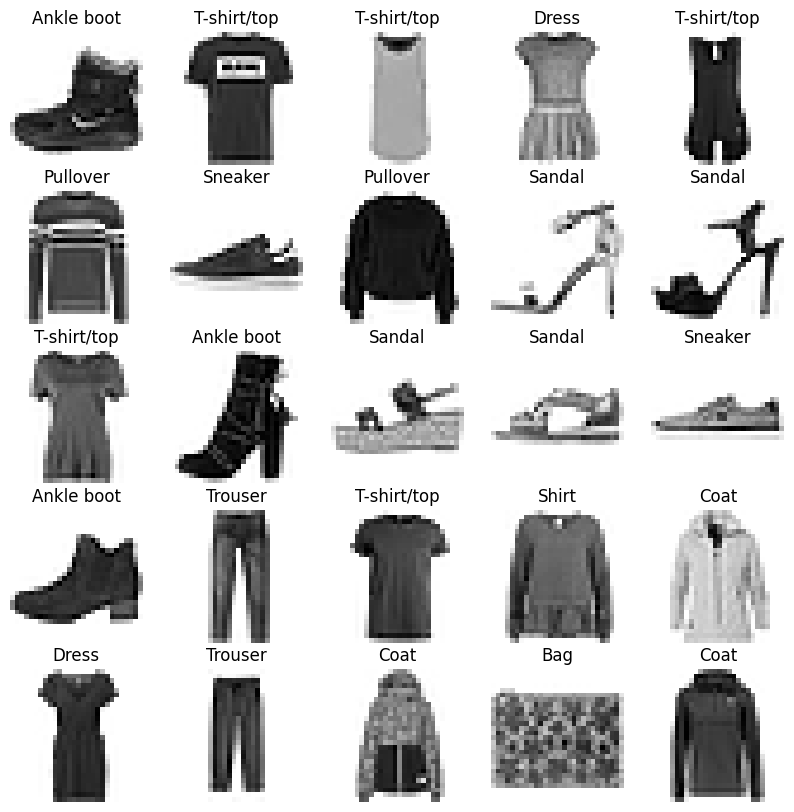

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

2023-02-08 15:24:26.266706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 15:24:26.849011: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10784 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Epoch 1/10


   1/1875 [..............................] - ETA: 18:24 - loss: 3.0562 - accuracy: 0.0312

  32/1875 [..............................] - ETA: 2s - loss: 1.3881 - accuracy: 0.5391   

  65/1875 [>.............................] - ETA: 2s - loss: 1.0847 - accuracy: 0.6380

  97/1875 [>.............................] - ETA: 2s - loss: 0.9711 - accuracy: 0.6746

 124/1875 [>.............................] - ETA: 2s - loss: 0.8927 - accuracy: 0.7019

 150/1875 [=>............................] - ETA: 2s - loss: 0.8496 - accuracy: 0.7169

 181/1875 [=>............................] - ETA: 2s - loss: 0.8188 - accuracy: 0.7248

 210/1875 [==>...........................] - ETA: 2s - loss: 0.7940 - accuracy: 0.7345

 237/1875 [==>...........................] - ETA: 2s - loss: 0.7705 - accuracy: 0.7430

 270/1875 [===>..........................] - ETA: 2s - loss: 0.7468 - accuracy: 0.7508

 303/1875 [===>..........................] - ETA: 2s - loss: 0.7282 - accuracy: 0.7568

 333/1875 [====>.........................] - ETA: 2s - loss: 0.7169 - accuracy: 0.7610

 359/1875 [====>.........................] - ETA: 2s - loss: 0.7004 - accuracy: 0.7659

 392/1875 [=====>........................] - ETA: 2s - loss: 0.6869 - accuracy: 0.7700

 425/1875 [=====>........................] - ETA: 2s - loss: 0.6744 - accuracy: 0.7751

 454/1875 [======>.......................] - ETA: 2s - loss: 0.6648 - accuracy: 0.7781

 486/1875 [======>.......................] - ETA: 2s - loss: 0.6526 - accuracy: 0.7809

 519/1875 [=======>......................] - ETA: 2s - loss: 0.6462 - accuracy: 0.7817

 552/1875 [=======>......................] - ETA: 2s - loss: 0.6370 - accuracy: 0.7844

 582/1875 [========>.....................] - ETA: 2s - loss: 0.6273 - accuracy: 0.7881

 614/1875 [========>.....................] - ETA: 2s - loss: 0.6199 - accuracy: 0.7899

 646/1875 [=========>....................] - ETA: 2s - loss: 0.6133 - accuracy: 0.7921

 673/1875 [=========>....................] - ETA: 2s - loss: 0.6075 - accuracy: 0.7941

 703/1875 [==========>...................] - ETA: 1s - loss: 0.6030 - accuracy: 0.7959

 735/1875 [==========>...................] - ETA: 1s - loss: 0.5976 - accuracy: 0.7972

 767/1875 [===========>..................] - ETA: 1s - loss: 0.5918 - accuracy: 0.7988

 795/1875 [===========>..................] - ETA: 1s - loss: 0.5888 - accuracy: 0.7996

 827/1875 [============>.................] - ETA: 1s - loss: 0.5851 - accuracy: 0.8003

 858/1875 [============>.................] - ETA: 1s - loss: 0.5806 - accuracy: 0.8016

 885/1875 [=============>................] - ETA: 1s - loss: 0.5780 - accuracy: 0.8024

 908/1875 [=============>................] - ETA: 1s - loss: 0.5763 - accuracy: 0.8027

 940/1875 [==============>...............] - ETA: 1s - loss: 0.5730 - accuracy: 0.8036

 972/1875 [==============>...............] - ETA: 1s - loss: 0.5703 - accuracy: 0.8045

1002/1875 [===============>..............] - ETA: 1s - loss: 0.5664 - accuracy: 0.8060

1028/1875 [===============>..............] - ETA: 1s - loss: 0.5640 - accuracy: 0.8068

1060/1875 [===============>..............] - ETA: 1s - loss: 0.5604 - accuracy: 0.8078

1092/1875 [================>.............] - ETA: 1s - loss: 0.5574 - accuracy: 0.8087

1123/1875 [================>.............] - ETA: 1s - loss: 0.5544 - accuracy: 0.8097

1155/1875 [=================>............] - ETA: 1s - loss: 0.5513 - accuracy: 0.8111

1187/1875 [=================>............] - ETA: 1s - loss: 0.5487 - accuracy: 0.8117

1219/1875 [==================>...........] - ETA: 1s - loss: 0.5458 - accuracy: 0.8127

1249/1875 [==================>...........] - ETA: 1s - loss: 0.5429 - accuracy: 0.8135

1278/1875 [===================>..........] - ETA: 0s - loss: 0.5397 - accuracy: 0.8145

1310/1875 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.8154

1339/1875 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.8159

1361/1875 [====================>.........] - ETA: 0s - loss: 0.5316 - accuracy: 0.8165

1393/1875 [=====================>........] - ETA: 0s - loss: 0.5300 - accuracy: 0.8167

1425/1875 [=====================>........] - ETA: 0s - loss: 0.5289 - accuracy: 0.8166

1453/1875 [======================>.......] - ETA: 0s - loss: 0.5263 - accuracy: 0.8174

1482/1875 [======================>.......] - ETA: 0s - loss: 0.5257 - accuracy: 0.8175

1514/1875 [=======================>......] - ETA: 0s - loss: 0.5224 - accuracy: 0.8185

1545/1875 [=======================>......] - ETA: 0s - loss: 0.5205 - accuracy: 0.8190

1575/1875 [========================>.....] - ETA: 0s - loss: 0.5193 - accuracy: 0.8193

1606/1875 [========================>.....] - ETA: 0s - loss: 0.5172 - accuracy: 0.8200

1638/1875 [=========================>....] - ETA: 0s - loss: 0.5152 - accuracy: 0.8208

1664/1875 [=========================>....] - ETA: 0s - loss: 0.5138 - accuracy: 0.8213

1696/1875 [==========================>...] - ETA: 0s - loss: 0.5127 - accuracy: 0.8216

1728/1875 [==========================>...] - ETA: 0s - loss: 0.5105 - accuracy: 0.8223

1760/1875 [===========================>..] - ETA: 0s - loss: 0.5090 - accuracy: 0.8228

1788/1875 [===========================>..] - ETA: 0s - loss: 0.5077 - accuracy: 0.8232

1818/1875 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8235

1848/1875 [============================>.] - ETA: 0s - loss: 0.5041 - accuracy: 0.8243

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8243


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2763 - accuracy: 0.8438

  23/1875 [..............................] - ETA: 4s - loss: 0.4006 - accuracy: 0.8465

  55/1875 [..............................] - ETA: 3s - loss: 0.3989 - accuracy: 0.8506

  87/1875 [>.............................] - ETA: 3s - loss: 0.3841 - accuracy: 0.8588

 117/1875 [>.............................] - ETA: 3s - loss: 0.3965 - accuracy: 0.8550

 148/1875 [=>............................] - ETA: 2s - loss: 0.4020 - accuracy: 0.8545

 180/1875 [=>............................] - ETA: 2s - loss: 0.3997 - accuracy: 0.8552

 212/1875 [==>...........................] - ETA: 2s - loss: 0.3979 - accuracy: 0.8567

 242/1875 [==>...........................] - ETA: 2s - loss: 0.3997 - accuracy: 0.8569

 273/1875 [===>..........................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8595

 305/1875 [===>..........................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8600

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3941 - accuracy: 0.8604

 364/1875 [====>.........................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8598

 376/1875 [=====>........................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8602

 408/1875 [=====>........................] - ETA: 2s - loss: 0.3910 - accuracy: 0.8613

 434/1875 [=====>........................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8609

 461/1875 [======>.......................] - ETA: 2s - loss: 0.3928 - accuracy: 0.8612

 493/1875 [======>.......................] - ETA: 2s - loss: 0.3939 - accuracy: 0.8604

 525/1875 [=======>......................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8605

 553/1875 [=======>......................] - ETA: 2s - loss: 0.3930 - accuracy: 0.8605

 583/1875 [========>.....................] - ETA: 2s - loss: 0.3938 - accuracy: 0.8605

 615/1875 [========>.....................] - ETA: 2s - loss: 0.3926 - accuracy: 0.8605

 647/1875 [=========>....................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8606

 667/1875 [=========>....................] - ETA: 2s - loss: 0.3910 - accuracy: 0.8611

 696/1875 [==========>...................] - ETA: 2s - loss: 0.3881 - accuracy: 0.8622

 728/1875 [==========>...................] - ETA: 2s - loss: 0.3871 - accuracy: 0.8622

 752/1875 [===========>..................] - ETA: 2s - loss: 0.3863 - accuracy: 0.8627

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3863 - accuracy: 0.8627

 815/1875 [============>.................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8627

 844/1875 [============>.................] - ETA: 1s - loss: 0.3878 - accuracy: 0.8622

 870/1875 [============>.................] - ETA: 1s - loss: 0.3880 - accuracy: 0.8621

 900/1875 [=============>................] - ETA: 1s - loss: 0.3868 - accuracy: 0.8619

 930/1875 [=============>................] - ETA: 1s - loss: 0.3857 - accuracy: 0.8625

 961/1875 [==============>...............] - ETA: 1s - loss: 0.3857 - accuracy: 0.8624

 991/1875 [==============>...............] - ETA: 1s - loss: 0.3853 - accuracy: 0.8625

1019/1875 [===============>..............] - ETA: 1s - loss: 0.3846 - accuracy: 0.8625

1051/1875 [===============>..............] - ETA: 1s - loss: 0.3843 - accuracy: 0.8625

1078/1875 [================>.............] - ETA: 1s - loss: 0.3839 - accuracy: 0.8624

1105/1875 [================>.............] - ETA: 1s - loss: 0.3838 - accuracy: 0.8625

1137/1875 [=================>............] - ETA: 1s - loss: 0.3831 - accuracy: 0.8630

1169/1875 [=================>............] - ETA: 1s - loss: 0.3833 - accuracy: 0.8628

1198/1875 [==================>...........] - ETA: 1s - loss: 0.3829 - accuracy: 0.8628

1230/1875 [==================>...........] - ETA: 1s - loss: 0.3815 - accuracy: 0.8633

1258/1875 [===================>..........] - ETA: 1s - loss: 0.3814 - accuracy: 0.8633

1289/1875 [===================>..........] - ETA: 1s - loss: 0.3813 - accuracy: 0.8633

1317/1875 [====================>.........] - ETA: 0s - loss: 0.3814 - accuracy: 0.8632

1345/1875 [====================>.........] - ETA: 0s - loss: 0.3823 - accuracy: 0.8628

1377/1875 [=====================>........] - ETA: 0s - loss: 0.3818 - accuracy: 0.8631

1403/1875 [=====================>........] - ETA: 0s - loss: 0.3816 - accuracy: 0.8632

1433/1875 [=====================>........] - ETA: 0s - loss: 0.3809 - accuracy: 0.8634

1465/1875 [======================>.......] - ETA: 0s - loss: 0.3802 - accuracy: 0.8636

1497/1875 [======================>.......] - ETA: 0s - loss: 0.3807 - accuracy: 0.8636

1526/1875 [=======================>......] - ETA: 0s - loss: 0.3806 - accuracy: 0.8638

1553/1875 [=======================>......] - ETA: 0s - loss: 0.3806 - accuracy: 0.8637

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3799 - accuracy: 0.8640

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3793 - accuracy: 0.8642

1646/1875 [=========================>....] - ETA: 0s - loss: 0.3793 - accuracy: 0.8641

1677/1875 [=========================>....] - ETA: 0s - loss: 0.3787 - accuracy: 0.8645

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3785 - accuracy: 0.8646

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3778 - accuracy: 0.8648

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3772 - accuracy: 0.8651

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3770 - accuracy: 0.8652

1825/1875 [============================>.] - ETA: 0s - loss: 0.3768 - accuracy: 0.8654

1856/1875 [============================>.] - ETA: 0s - loss: 0.3761 - accuracy: 0.8657

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8656


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4574 - accuracy: 0.9375

  33/1875 [..............................] - ETA: 2s - loss: 0.3265 - accuracy: 0.8873

  65/1875 [>.............................] - ETA: 2s - loss: 0.3496 - accuracy: 0.8736

  95/1875 [>.............................] - ETA: 2s - loss: 0.3389 - accuracy: 0.8789

 122/1875 [>.............................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8801

 152/1875 [=>............................] - ETA: 2s - loss: 0.3325 - accuracy: 0.8820

 183/1875 [=>............................] - ETA: 2s - loss: 0.3384 - accuracy: 0.8784

 212/1875 [==>...........................] - ETA: 2s - loss: 0.3383 - accuracy: 0.8772

 244/1875 [==>...........................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8790

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3445 - accuracy: 0.8765

 308/1875 [===>..........................] - ETA: 2s - loss: 0.3472 - accuracy: 0.8749

 336/1875 [====>.........................] - ETA: 2s - loss: 0.3481 - accuracy: 0.8750

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3484 - accuracy: 0.8745

 400/1875 [=====>........................] - ETA: 2s - loss: 0.3495 - accuracy: 0.8734

 430/1875 [=====>........................] - ETA: 2s - loss: 0.3480 - accuracy: 0.8733

 454/1875 [======>.......................] - ETA: 2s - loss: 0.3458 - accuracy: 0.8738

 484/1875 [======>.......................] - ETA: 2s - loss: 0.3424 - accuracy: 0.8756

 516/1875 [=======>......................] - ETA: 2s - loss: 0.3409 - accuracy: 0.8763

 545/1875 [=======>......................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8762

 573/1875 [========>.....................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8761

 604/1875 [========>.....................] - ETA: 2s - loss: 0.3429 - accuracy: 0.8756

 636/1875 [=========>....................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8755

 664/1875 [=========>....................] - ETA: 2s - loss: 0.3429 - accuracy: 0.8752

 689/1875 [==========>...................] - ETA: 2s - loss: 0.3451 - accuracy: 0.8746

 719/1875 [==========>...................] - ETA: 1s - loss: 0.3465 - accuracy: 0.8737

 749/1875 [==========>...................] - ETA: 1s - loss: 0.3445 - accuracy: 0.8746

 778/1875 [===========>..................] - ETA: 1s - loss: 0.3424 - accuracy: 0.8752

 808/1875 [===========>..................] - ETA: 1s - loss: 0.3406 - accuracy: 0.8760

 839/1875 [============>.................] - ETA: 1s - loss: 0.3422 - accuracy: 0.8755

 858/1875 [============>.................] - ETA: 1s - loss: 0.3425 - accuracy: 0.8754

 889/1875 [=============>................] - ETA: 1s - loss: 0.3408 - accuracy: 0.8759

 921/1875 [=============>................] - ETA: 1s - loss: 0.3405 - accuracy: 0.8760

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3409 - accuracy: 0.8758

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3395 - accuracy: 0.8764

1007/1875 [===============>..............] - ETA: 1s - loss: 0.3396 - accuracy: 0.8761

1040/1875 [===============>..............] - ETA: 1s - loss: 0.3397 - accuracy: 0.8762

1065/1875 [================>.............] - ETA: 1s - loss: 0.3399 - accuracy: 0.8764

1097/1875 [================>.............] - ETA: 1s - loss: 0.3398 - accuracy: 0.8764

1129/1875 [=================>............] - ETA: 1s - loss: 0.3396 - accuracy: 0.8762

1161/1875 [=================>............] - ETA: 1s - loss: 0.3393 - accuracy: 0.8763

1191/1875 [==================>...........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8758

1223/1875 [==================>...........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8759

1255/1875 [===================>..........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8760

1283/1875 [===================>..........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8760

1299/1875 [===================>..........] - ETA: 0s - loss: 0.3400 - accuracy: 0.8762

1331/1875 [====================>.........] - ETA: 0s - loss: 0.3389 - accuracy: 0.8765

1363/1875 [====================>.........] - ETA: 0s - loss: 0.3397 - accuracy: 0.8763

1393/1875 [=====================>........] - ETA: 0s - loss: 0.3406 - accuracy: 0.8760

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3417 - accuracy: 0.8760

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3411 - accuracy: 0.8762

1489/1875 [======================>.......] - ETA: 0s - loss: 0.3406 - accuracy: 0.8766

1517/1875 [=======================>......] - ETA: 0s - loss: 0.3403 - accuracy: 0.8765

1549/1875 [=======================>......] - ETA: 0s - loss: 0.3395 - accuracy: 0.8767

1581/1875 [========================>.....] - ETA: 0s - loss: 0.3395 - accuracy: 0.8766

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3395 - accuracy: 0.8766

1641/1875 [=========================>....] - ETA: 0s - loss: 0.3392 - accuracy: 0.8768

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3389 - accuracy: 0.8768

1704/1875 [==========================>...] - ETA: 0s - loss: 0.3384 - accuracy: 0.8769

1730/1875 [==========================>...] - ETA: 0s - loss: 0.3383 - accuracy: 0.8768

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3386 - accuracy: 0.8768

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3387 - accuracy: 0.8768

1826/1875 [============================>.] - ETA: 0s - loss: 0.3371 - accuracy: 0.8774

1855/1875 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8775

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8774


Epoch 4/10


   1/1875 [..............................] - ETA: 6s - loss: 0.3924 - accuracy: 0.9375

  33/1875 [..............................] - ETA: 2s - loss: 0.3319 - accuracy: 0.8902

  64/1875 [>.............................] - ETA: 2s - loss: 0.3343 - accuracy: 0.8882

  95/1875 [>.............................] - ETA: 2s - loss: 0.3285 - accuracy: 0.8862

 127/1875 [=>............................] - ETA: 2s - loss: 0.3318 - accuracy: 0.8841

 159/1875 [=>............................] - ETA: 2s - loss: 0.3342 - accuracy: 0.8835

 187/1875 [=>............................] - ETA: 2s - loss: 0.3267 - accuracy: 0.8840

 219/1875 [==>...........................] - ETA: 2s - loss: 0.3195 - accuracy: 0.8857

 250/1875 [===>..........................] - ETA: 2s - loss: 0.3184 - accuracy: 0.8866

 281/1875 [===>..........................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8855

 311/1875 [===>..........................] - ETA: 2s - loss: 0.3218 - accuracy: 0.8848

 341/1875 [====>.........................] - ETA: 2s - loss: 0.3234 - accuracy: 0.8831

 373/1875 [====>.........................] - ETA: 2s - loss: 0.3249 - accuracy: 0.8829

 404/1875 [=====>........................] - ETA: 2s - loss: 0.3232 - accuracy: 0.8831

 430/1875 [=====>........................] - ETA: 2s - loss: 0.3204 - accuracy: 0.8843

 462/1875 [======>.......................] - ETA: 2s - loss: 0.3227 - accuracy: 0.8832

 493/1875 [======>.......................] - ETA: 2s - loss: 0.3218 - accuracy: 0.8835

 522/1875 [=======>......................] - ETA: 2s - loss: 0.3224 - accuracy: 0.8831

 554/1875 [=======>......................] - ETA: 2s - loss: 0.3208 - accuracy: 0.8830

 586/1875 [========>.....................] - ETA: 2s - loss: 0.3180 - accuracy: 0.8839

 618/1875 [========>.....................] - ETA: 2s - loss: 0.3178 - accuracy: 0.8834

 649/1875 [=========>....................] - ETA: 2s - loss: 0.3191 - accuracy: 0.8838

 680/1875 [=========>....................] - ETA: 1s - loss: 0.3185 - accuracy: 0.8842

 712/1875 [==========>...................] - ETA: 1s - loss: 0.3178 - accuracy: 0.8844

 738/1875 [==========>...................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8846

 769/1875 [===========>..................] - ETA: 1s - loss: 0.3184 - accuracy: 0.8845

 801/1875 [===========>..................] - ETA: 1s - loss: 0.3184 - accuracy: 0.8847

 833/1875 [============>.................] - ETA: 1s - loss: 0.3183 - accuracy: 0.8847

 863/1875 [============>.................] - ETA: 1s - loss: 0.3183 - accuracy: 0.8845

 895/1875 [=============>................] - ETA: 1s - loss: 0.3175 - accuracy: 0.8848

 927/1875 [=============>................] - ETA: 1s - loss: 0.3165 - accuracy: 0.8853

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3172 - accuracy: 0.8851

 981/1875 [==============>...............] - ETA: 1s - loss: 0.3166 - accuracy: 0.8855

1013/1875 [===============>..............] - ETA: 1s - loss: 0.3162 - accuracy: 0.8854

1045/1875 [===============>..............] - ETA: 1s - loss: 0.3157 - accuracy: 0.8852

1074/1875 [================>.............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8854

1094/1875 [================>.............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8855

1121/1875 [================>.............] - ETA: 1s - loss: 0.3157 - accuracy: 0.8851

1153/1875 [=================>............] - ETA: 1s - loss: 0.3152 - accuracy: 0.8853

1180/1875 [=================>............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8855

1211/1875 [==================>...........] - ETA: 1s - loss: 0.3145 - accuracy: 0.8853

1243/1875 [==================>...........] - ETA: 1s - loss: 0.3142 - accuracy: 0.8851

1275/1875 [===================>..........] - ETA: 1s - loss: 0.3125 - accuracy: 0.8858

1303/1875 [===================>..........] - ETA: 0s - loss: 0.3128 - accuracy: 0.8855

1335/1875 [====================>.........] - ETA: 0s - loss: 0.3128 - accuracy: 0.8853

1367/1875 [====================>.........] - ETA: 0s - loss: 0.3132 - accuracy: 0.8853

1399/1875 [=====================>........] - ETA: 0s - loss: 0.3136 - accuracy: 0.8852

1429/1875 [=====================>........] - ETA: 0s - loss: 0.3133 - accuracy: 0.8854

1461/1875 [======================>.......] - ETA: 0s - loss: 0.3133 - accuracy: 0.8856

1493/1875 [======================>.......] - ETA: 0s - loss: 0.3131 - accuracy: 0.8856

1518/1875 [=======================>......] - ETA: 0s - loss: 0.3124 - accuracy: 0.8857

1546/1875 [=======================>......] - ETA: 0s - loss: 0.3130 - accuracy: 0.8856

1577/1875 [========================>.....] - ETA: 0s - loss: 0.3131 - accuracy: 0.8856

1609/1875 [========================>.....] - ETA: 0s - loss: 0.3134 - accuracy: 0.8854

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3125 - accuracy: 0.8856

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8857

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3134 - accuracy: 0.8854

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3139 - accuracy: 0.8853

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8854

1781/1875 [===========================>..] - ETA: 0s - loss: 0.3140 - accuracy: 0.8854

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3139 - accuracy: 0.8852

1842/1875 [============================>.] - ETA: 0s - loss: 0.3136 - accuracy: 0.8854

1871/1875 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.8851

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8851


Epoch 5/10


   1/1875 [..............................] - ETA: 3s - loss: 0.1483 - accuracy: 0.9375

  33/1875 [..............................] - ETA: 2s - loss: 0.3261 - accuracy: 0.8741

  64/1875 [>.............................] - ETA: 2s - loss: 0.3175 - accuracy: 0.8857

  95/1875 [>.............................] - ETA: 2s - loss: 0.3036 - accuracy: 0.8921

 127/1875 [=>............................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8905

 159/1875 [=>............................] - ETA: 2s - loss: 0.3002 - accuracy: 0.8905

 187/1875 [=>............................] - ETA: 2s - loss: 0.2957 - accuracy: 0.8904

 219/1875 [==>...........................] - ETA: 2s - loss: 0.2962 - accuracy: 0.8916

 247/1875 [==>...........................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8901

 279/1875 [===>..........................] - ETA: 2s - loss: 0.2989 - accuracy: 0.8902

 311/1875 [===>..........................] - ETA: 2s - loss: 0.2976 - accuracy: 0.8900

 342/1875 [====>.........................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8888

 374/1875 [====>.........................] - ETA: 2s - loss: 0.2973 - accuracy: 0.8905

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8897

 438/1875 [======>.......................] - ETA: 2s - loss: 0.2994 - accuracy: 0.8898

 470/1875 [======>.......................] - ETA: 2s - loss: 0.2968 - accuracy: 0.8906

 502/1875 [=======>......................] - ETA: 2s - loss: 0.2959 - accuracy: 0.8907

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2978 - accuracy: 0.8902

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2986 - accuracy: 0.8902

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2979 - accuracy: 0.8903

 630/1875 [=========>....................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8914

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2963 - accuracy: 0.8910

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2966 - accuracy: 0.8910

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8912

 758/1875 [===========>..................] - ETA: 1s - loss: 0.2970 - accuracy: 0.8906

 790/1875 [===========>..................] - ETA: 1s - loss: 0.2975 - accuracy: 0.8903

 822/1875 [============>.................] - ETA: 1s - loss: 0.2968 - accuracy: 0.8913

 854/1875 [============>.................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8914

 886/1875 [=============>................] - ETA: 1s - loss: 0.2950 - accuracy: 0.8915

 918/1875 [=============>................] - ETA: 1s - loss: 0.2953 - accuracy: 0.8909

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2955 - accuracy: 0.8911

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2959 - accuracy: 0.8911

1014/1875 [===============>..............] - ETA: 1s - loss: 0.2968 - accuracy: 0.8910

1046/1875 [===============>..............] - ETA: 1s - loss: 0.2958 - accuracy: 0.8913

1078/1875 [================>.............] - ETA: 1s - loss: 0.2961 - accuracy: 0.8910

1110/1875 [================>.............] - ETA: 1s - loss: 0.2963 - accuracy: 0.8910

1142/1875 [=================>............] - ETA: 1s - loss: 0.2960 - accuracy: 0.8911

1174/1875 [=================>............] - ETA: 1s - loss: 0.2958 - accuracy: 0.8911

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2947 - accuracy: 0.8914

1238/1875 [==================>...........] - ETA: 1s - loss: 0.2963 - accuracy: 0.8911

1266/1875 [===================>..........] - ETA: 0s - loss: 0.2966 - accuracy: 0.8909

1296/1875 [===================>..........] - ETA: 0s - loss: 0.2967 - accuracy: 0.8909

1328/1875 [====================>.........] - ETA: 0s - loss: 0.2963 - accuracy: 0.8911

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2980 - accuracy: 0.8903

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2978 - accuracy: 0.8904

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2975 - accuracy: 0.8903

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2975 - accuracy: 0.8902

1484/1875 [======================>.......] - ETA: 0s - loss: 0.2969 - accuracy: 0.8904

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2975 - accuracy: 0.8902

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2970 - accuracy: 0.8904

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2969 - accuracy: 0.8905

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2969 - accuracy: 0.8906

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2972 - accuracy: 0.8905

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2967 - accuracy: 0.8908

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2974 - accuracy: 0.8906

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2976 - accuracy: 0.8907

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2980 - accuracy: 0.8907

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8904

1824/1875 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8906

1856/1875 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8905

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8906


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1828 - accuracy: 0.9375

  31/1875 [..............................] - ETA: 3s - loss: 0.2961 - accuracy: 0.9032

  63/1875 [>.............................] - ETA: 2s - loss: 0.2874 - accuracy: 0.9058

  95/1875 [>.............................] - ETA: 2s - loss: 0.2871 - accuracy: 0.9026

 127/1875 [=>............................] - ETA: 2s - loss: 0.2888 - accuracy: 0.9023

 155/1875 [=>............................] - ETA: 2s - loss: 0.2869 - accuracy: 0.9022

 182/1875 [=>............................] - ETA: 2s - loss: 0.2883 - accuracy: 0.8999

 200/1875 [==>...........................] - ETA: 3s - loss: 0.2865 - accuracy: 0.8997

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2848 - accuracy: 0.9001

 257/1875 [===>..........................] - ETA: 2s - loss: 0.2860 - accuracy: 0.9003

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2845 - accuracy: 0.9003

 318/1875 [====>.........................] - ETA: 2s - loss: 0.2855 - accuracy: 0.9004

 350/1875 [====>.........................] - ETA: 2s - loss: 0.2892 - accuracy: 0.8983

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2913 - accuracy: 0.8981

 414/1875 [=====>........................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8966

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2921 - accuracy: 0.8969

 477/1875 [======>.......................] - ETA: 2s - loss: 0.2919 - accuracy: 0.8967

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2917 - accuracy: 0.8971

 540/1875 [=======>......................] - ETA: 2s - loss: 0.2911 - accuracy: 0.8969

 571/1875 [========>.....................] - ETA: 2s - loss: 0.2914 - accuracy: 0.8970

 601/1875 [========>.....................] - ETA: 2s - loss: 0.2908 - accuracy: 0.8965

 633/1875 [=========>....................] - ETA: 2s - loss: 0.2898 - accuracy: 0.8972

 665/1875 [=========>....................] - ETA: 2s - loss: 0.2903 - accuracy: 0.8971

 696/1875 [==========>...................] - ETA: 1s - loss: 0.2900 - accuracy: 0.8974

 728/1875 [==========>...................] - ETA: 1s - loss: 0.2894 - accuracy: 0.8975

 760/1875 [===========>..................] - ETA: 1s - loss: 0.2889 - accuracy: 0.8975

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2872 - accuracy: 0.8979

 821/1875 [============>.................] - ETA: 1s - loss: 0.2851 - accuracy: 0.8989

 853/1875 [============>.................] - ETA: 1s - loss: 0.2848 - accuracy: 0.8991

 885/1875 [=============>................] - ETA: 1s - loss: 0.2828 - accuracy: 0.8996

 915/1875 [=============>................] - ETA: 1s - loss: 0.2836 - accuracy: 0.8987

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2829 - accuracy: 0.8987

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2841 - accuracy: 0.8982

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2835 - accuracy: 0.8985

1032/1875 [===============>..............] - ETA: 1s - loss: 0.2839 - accuracy: 0.8984

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2833 - accuracy: 0.8986

1088/1875 [================>.............] - ETA: 1s - loss: 0.2822 - accuracy: 0.8990

1118/1875 [================>.............] - ETA: 1s - loss: 0.2824 - accuracy: 0.8990

1146/1875 [=================>............] - ETA: 1s - loss: 0.2826 - accuracy: 0.8990

1172/1875 [=================>............] - ETA: 1s - loss: 0.2830 - accuracy: 0.8986

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2829 - accuracy: 0.8989

1228/1875 [==================>...........] - ETA: 1s - loss: 0.2821 - accuracy: 0.8991

1256/1875 [===================>..........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8991

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2811 - accuracy: 0.8992

1303/1875 [===================>..........] - ETA: 0s - loss: 0.2816 - accuracy: 0.8988

1335/1875 [====================>.........] - ETA: 0s - loss: 0.2812 - accuracy: 0.8988

1362/1875 [====================>.........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8990

1386/1875 [=====================>........] - ETA: 0s - loss: 0.2807 - accuracy: 0.8989

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2816 - accuracy: 0.8985

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2817 - accuracy: 0.8983

1475/1875 [======================>.......] - ETA: 0s - loss: 0.2813 - accuracy: 0.8984

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2811 - accuracy: 0.8985

1534/1875 [=======================>......] - ETA: 0s - loss: 0.2812 - accuracy: 0.8983

1563/1875 [========================>.....] - ETA: 0s - loss: 0.2819 - accuracy: 0.8982

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2812 - accuracy: 0.8985

1623/1875 [========================>.....] - ETA: 0s - loss: 0.2805 - accuracy: 0.8985

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2802 - accuracy: 0.8986

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2805 - accuracy: 0.8982

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8979

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2811 - accuracy: 0.8978

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2815 - accuracy: 0.8976

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2818 - accuracy: 0.8974

1842/1875 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8974

1873/1875 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8974

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.8974


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3308 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.2568 - accuracy: 0.9053

  61/1875 [..............................] - ETA: 3s - loss: 0.2533 - accuracy: 0.9103

  92/1875 [>.............................] - ETA: 3s - loss: 0.2594 - accuracy: 0.9073

 124/1875 [>.............................] - ETA: 2s - loss: 0.2617 - accuracy: 0.9047

 156/1875 [=>............................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9024

 184/1875 [=>............................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9023

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2631 - accuracy: 0.9013

 248/1875 [==>...........................] - ETA: 2s - loss: 0.2679 - accuracy: 0.9005

 280/1875 [===>..........................] - ETA: 2s - loss: 0.2684 - accuracy: 0.9001

 312/1875 [===>..........................] - ETA: 2s - loss: 0.2728 - accuracy: 0.8985

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8977

 376/1875 [=====>........................] - ETA: 2s - loss: 0.2732 - accuracy: 0.8985

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2743 - accuracy: 0.8979

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2754 - accuracy: 0.8978

 468/1875 [======>.......................] - ETA: 2s - loss: 0.2740 - accuracy: 0.8987

 496/1875 [======>.......................] - ETA: 2s - loss: 0.2754 - accuracy: 0.8977

 524/1875 [=======>......................] - ETA: 2s - loss: 0.2750 - accuracy: 0.8978

 556/1875 [=======>......................] - ETA: 2s - loss: 0.2732 - accuracy: 0.8987

 587/1875 [========>.....................] - ETA: 2s - loss: 0.2712 - accuracy: 0.8994

 618/1875 [========>.....................] - ETA: 2s - loss: 0.2726 - accuracy: 0.8992

 650/1875 [=========>....................] - ETA: 2s - loss: 0.2732 - accuracy: 0.8987

 681/1875 [=========>....................] - ETA: 1s - loss: 0.2731 - accuracy: 0.8991

 711/1875 [==========>...................] - ETA: 1s - loss: 0.2711 - accuracy: 0.9004

 742/1875 [==========>...................] - ETA: 1s - loss: 0.2714 - accuracy: 0.9001

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2711 - accuracy: 0.9004

 805/1875 [===========>..................] - ETA: 1s - loss: 0.2711 - accuracy: 0.9004

 837/1875 [============>.................] - ETA: 1s - loss: 0.2707 - accuracy: 0.9005

 870/1875 [============>.................] - ETA: 1s - loss: 0.2698 - accuracy: 0.9011

 903/1875 [=============>................] - ETA: 1s - loss: 0.2705 - accuracy: 0.9007

 935/1875 [=============>................] - ETA: 1s - loss: 0.2706 - accuracy: 0.9003

 963/1875 [==============>...............] - ETA: 1s - loss: 0.2699 - accuracy: 0.9007

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2691 - accuracy: 0.9010

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9008

1060/1875 [===============>..............] - ETA: 1s - loss: 0.2691 - accuracy: 0.9008

1091/1875 [================>.............] - ETA: 1s - loss: 0.2693 - accuracy: 0.9005

1123/1875 [================>.............] - ETA: 1s - loss: 0.2703 - accuracy: 0.8999

1155/1875 [=================>............] - ETA: 1s - loss: 0.2700 - accuracy: 0.9001

1187/1875 [=================>............] - ETA: 1s - loss: 0.2693 - accuracy: 0.9001

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2691 - accuracy: 0.9002

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2692 - accuracy: 0.8997

1283/1875 [===================>..........] - ETA: 0s - loss: 0.2691 - accuracy: 0.8995

1315/1875 [====================>.........] - ETA: 0s - loss: 0.2689 - accuracy: 0.8997

1347/1875 [====================>.........] - ETA: 0s - loss: 0.2687 - accuracy: 0.8997

1379/1875 [=====================>........] - ETA: 0s - loss: 0.2693 - accuracy: 0.8994

1411/1875 [=====================>........] - ETA: 0s - loss: 0.2699 - accuracy: 0.8994

1443/1875 [======================>.......] - ETA: 0s - loss: 0.2697 - accuracy: 0.8994

1475/1875 [======================>.......] - ETA: 0s - loss: 0.2703 - accuracy: 0.8990

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2707 - accuracy: 0.8988

1538/1875 [=======================>......] - ETA: 0s - loss: 0.2707 - accuracy: 0.8990

1570/1875 [========================>.....] - ETA: 0s - loss: 0.2712 - accuracy: 0.8991

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2715 - accuracy: 0.8990

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2712 - accuracy: 0.8989

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2710 - accuracy: 0.8989

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2708 - accuracy: 0.8992

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2715 - accuracy: 0.8991

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2710 - accuracy: 0.8993

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2715 - accuracy: 0.8990

1824/1875 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.8990

1854/1875 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.8990

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.8990


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2306 - accuracy: 0.9205

  65/1875 [>.............................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9125

  96/1875 [>.............................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9102

 128/1875 [=>............................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9092

 160/1875 [=>............................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9070

 192/1875 [==>...........................] - ETA: 2s - loss: 0.2448 - accuracy: 0.9092

 223/1875 [==>...........................] - ETA: 2s - loss: 0.2464 - accuracy: 0.9077

 255/1875 [===>..........................] - ETA: 2s - loss: 0.2531 - accuracy: 0.9060

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2544 - accuracy: 0.9052

 317/1875 [====>.........................] - ETA: 2s - loss: 0.2532 - accuracy: 0.9050

 349/1875 [====>.........................] - ETA: 2s - loss: 0.2542 - accuracy: 0.9054

 377/1875 [=====>........................] - ETA: 2s - loss: 0.2555 - accuracy: 0.9045

 407/1875 [=====>........................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9033

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2575 - accuracy: 0.9032

 469/1875 [======>.......................] - ETA: 2s - loss: 0.2572 - accuracy: 0.9035

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9039

 533/1875 [=======>......................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9040

 564/1875 [========>.....................] - ETA: 2s - loss: 0.2548 - accuracy: 0.9048

 596/1875 [========>.....................] - ETA: 2s - loss: 0.2553 - accuracy: 0.9049

 627/1875 [=========>....................] - ETA: 2s - loss: 0.2566 - accuracy: 0.9044

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2570 - accuracy: 0.9045

 690/1875 [==========>...................] - ETA: 1s - loss: 0.2580 - accuracy: 0.9044

 722/1875 [==========>...................] - ETA: 1s - loss: 0.2579 - accuracy: 0.9044

 754/1875 [===========>..................] - ETA: 1s - loss: 0.2581 - accuracy: 0.9045

 786/1875 [===========>..................] - ETA: 1s - loss: 0.2578 - accuracy: 0.9041

 818/1875 [============>.................] - ETA: 1s - loss: 0.2581 - accuracy: 0.9037

 850/1875 [============>.................] - ETA: 1s - loss: 0.2582 - accuracy: 0.9037

 882/1875 [=============>................] - ETA: 1s - loss: 0.2590 - accuracy: 0.9031

 914/1875 [=============>................] - ETA: 1s - loss: 0.2590 - accuracy: 0.9032

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2590 - accuracy: 0.9034

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2609 - accuracy: 0.9029

1010/1875 [===============>..............] - ETA: 1s - loss: 0.2628 - accuracy: 0.9025

1042/1875 [===============>..............] - ETA: 1s - loss: 0.2639 - accuracy: 0.9020

1073/1875 [================>.............] - ETA: 1s - loss: 0.2637 - accuracy: 0.9023

1104/1875 [================>.............] - ETA: 1s - loss: 0.2637 - accuracy: 0.9022

1132/1875 [=================>............] - ETA: 1s - loss: 0.2632 - accuracy: 0.9025

1164/1875 [=================>............] - ETA: 1s - loss: 0.2633 - accuracy: 0.9025

1190/1875 [==================>...........] - ETA: 1s - loss: 0.2638 - accuracy: 0.9026

1220/1875 [==================>...........] - ETA: 1s - loss: 0.2639 - accuracy: 0.9023

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2644 - accuracy: 0.9022

1280/1875 [===================>..........] - ETA: 0s - loss: 0.2646 - accuracy: 0.9021

1310/1875 [===================>..........] - ETA: 0s - loss: 0.2641 - accuracy: 0.9021

1341/1875 [====================>.........] - ETA: 0s - loss: 0.2639 - accuracy: 0.9021

1369/1875 [====================>.........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9021

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2639 - accuracy: 0.9021

1427/1875 [=====================>........] - ETA: 0s - loss: 0.2641 - accuracy: 0.9021

1455/1875 [======================>.......] - ETA: 0s - loss: 0.2640 - accuracy: 0.9021

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2635 - accuracy: 0.9023

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2629 - accuracy: 0.9026

1549/1875 [=======================>......] - ETA: 0s - loss: 0.2623 - accuracy: 0.9028

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2616 - accuracy: 0.9028

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2611 - accuracy: 0.9031

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2609 - accuracy: 0.9031

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2615 - accuracy: 0.9029

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2612 - accuracy: 0.9029

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2611 - accuracy: 0.9030

1773/1875 [===========================>..] - ETA: 0s - loss: 0.2614 - accuracy: 0.9028

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2620 - accuracy: 0.9027

1837/1875 [============================>.] - ETA: 0s - loss: 0.2617 - accuracy: 0.9028

1869/1875 [============================>.] - ETA: 0s - loss: 0.2626 - accuracy: 0.9027

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2626 - accuracy: 0.9027


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2456 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2332 - accuracy: 0.9138

  65/1875 [>.............................] - ETA: 2s - loss: 0.2383 - accuracy: 0.9115

  97/1875 [>.............................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9114

 129/1875 [=>............................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9128

 161/1875 [=>............................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9130

 193/1875 [==>...........................] - ETA: 2s - loss: 0.2347 - accuracy: 0.9129

 225/1875 [==>...........................] - ETA: 2s - loss: 0.2313 - accuracy: 0.9144

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9130

 290/1875 [===>..........................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9109

 322/1875 [====>.........................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9103

 354/1875 [====>.........................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9108

 386/1875 [=====>........................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9092

 418/1875 [=====>........................] - ETA: 2s - loss: 0.2458 - accuracy: 0.9080

 448/1875 [======>.......................] - ETA: 2s - loss: 0.2454 - accuracy: 0.9085

 478/1875 [======>.......................] - ETA: 2s - loss: 0.2448 - accuracy: 0.9083

 510/1875 [=======>......................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9082

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9076

 572/1875 [========>.....................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9079

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9082

 635/1875 [=========>....................] - ETA: 1s - loss: 0.2466 - accuracy: 0.9087

 667/1875 [=========>....................] - ETA: 1s - loss: 0.2477 - accuracy: 0.9084

 699/1875 [==========>...................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9077

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2479 - accuracy: 0.9077

 763/1875 [===========>..................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9078

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2474 - accuracy: 0.9079

 827/1875 [============>.................] - ETA: 1s - loss: 0.2465 - accuracy: 0.9080

 859/1875 [============>.................] - ETA: 1s - loss: 0.2473 - accuracy: 0.9077

 891/1875 [=============>................] - ETA: 1s - loss: 0.2472 - accuracy: 0.9080

 923/1875 [=============>................] - ETA: 1s - loss: 0.2470 - accuracy: 0.9080

 955/1875 [==============>...............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9078

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9074

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2503 - accuracy: 0.9070

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2496 - accuracy: 0.9073

1083/1875 [================>.............] - ETA: 1s - loss: 0.2497 - accuracy: 0.9072

1115/1875 [================>.............] - ETA: 1s - loss: 0.2496 - accuracy: 0.9071

1147/1875 [=================>............] - ETA: 1s - loss: 0.2495 - accuracy: 0.9071

1179/1875 [=================>............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9075

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2496 - accuracy: 0.9073

1238/1875 [==================>...........] - ETA: 1s - loss: 0.2487 - accuracy: 0.9074

1268/1875 [===================>..........] - ETA: 0s - loss: 0.2483 - accuracy: 0.9078

1297/1875 [===================>..........] - ETA: 0s - loss: 0.2474 - accuracy: 0.9080

1328/1875 [====================>.........] - ETA: 0s - loss: 0.2461 - accuracy: 0.9085

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2461 - accuracy: 0.9085

1391/1875 [=====================>........] - ETA: 0s - loss: 0.2466 - accuracy: 0.9082

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2474 - accuracy: 0.9080

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2476 - accuracy: 0.9078

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2483 - accuracy: 0.9074

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2486 - accuracy: 0.9074

1548/1875 [=======================>......] - ETA: 0s - loss: 0.2492 - accuracy: 0.9072

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2497 - accuracy: 0.9069

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2492 - accuracy: 0.9072

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2488 - accuracy: 0.9075

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2490 - accuracy: 0.9073

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2493 - accuracy: 0.9072

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2496 - accuracy: 0.9071

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2498 - accuracy: 0.9070

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2507 - accuracy: 0.9068

1829/1875 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.9067

1861/1875 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.9068

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2501 - accuracy: 0.9069


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1161 - accuracy: 1.0000

  33/1875 [..............................] - ETA: 2s - loss: 0.2291 - accuracy: 0.9148

  65/1875 [>.............................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9062

  97/1875 [>.............................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9114

 129/1875 [=>............................] - ETA: 2s - loss: 0.2313 - accuracy: 0.9140

 160/1875 [=>............................] - ETA: 2s - loss: 0.2323 - accuracy: 0.9125

 192/1875 [==>...........................] - ETA: 2s - loss: 0.2311 - accuracy: 0.9139

 224/1875 [==>...........................] - ETA: 2s - loss: 0.2276 - accuracy: 0.9136

 256/1875 [===>..........................] - ETA: 2s - loss: 0.2281 - accuracy: 0.9127

 287/1875 [===>..........................] - ETA: 2s - loss: 0.2287 - accuracy: 0.9120

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2280 - accuracy: 0.9126

 351/1875 [====>.........................] - ETA: 2s - loss: 0.2314 - accuracy: 0.9118

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9114

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9116

 447/1875 [======>.......................] - ETA: 2s - loss: 0.2309 - accuracy: 0.9125

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9132

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2291 - accuracy: 0.9135

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9133

 574/1875 [========>.....................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9129

 606/1875 [========>.....................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9126

 638/1875 [=========>....................] - ETA: 1s - loss: 0.2316 - accuracy: 0.9127

 667/1875 [=========>....................] - ETA: 1s - loss: 0.2333 - accuracy: 0.9124

 699/1875 [==========>...................] - ETA: 1s - loss: 0.2336 - accuracy: 0.9125

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2326 - accuracy: 0.9132

 763/1875 [===========>..................] - ETA: 1s - loss: 0.2327 - accuracy: 0.9133

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2351 - accuracy: 0.9127

 827/1875 [============>.................] - ETA: 1s - loss: 0.2365 - accuracy: 0.9118

 859/1875 [============>.................] - ETA: 1s - loss: 0.2358 - accuracy: 0.9119

 891/1875 [=============>................] - ETA: 1s - loss: 0.2361 - accuracy: 0.9121

 922/1875 [=============>................] - ETA: 1s - loss: 0.2362 - accuracy: 0.9122

 953/1875 [==============>...............] - ETA: 1s - loss: 0.2373 - accuracy: 0.9114

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9113

1017/1875 [===============>..............] - ETA: 1s - loss: 0.2375 - accuracy: 0.9110

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2362 - accuracy: 0.9115

1081/1875 [================>.............] - ETA: 1s - loss: 0.2357 - accuracy: 0.9119

1113/1875 [================>.............] - ETA: 1s - loss: 0.2363 - accuracy: 0.9117

1139/1875 [=================>............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9113

1169/1875 [=================>............] - ETA: 1s - loss: 0.2381 - accuracy: 0.9109

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2386 - accuracy: 0.9107

1232/1875 [==================>...........] - ETA: 1s - loss: 0.2385 - accuracy: 0.9107

1263/1875 [===================>..........] - ETA: 0s - loss: 0.2388 - accuracy: 0.9104

1295/1875 [===================>..........] - ETA: 0s - loss: 0.2386 - accuracy: 0.9104

1327/1875 [====================>.........] - ETA: 0s - loss: 0.2380 - accuracy: 0.9106

1359/1875 [====================>.........] - ETA: 0s - loss: 0.2376 - accuracy: 0.9107

1391/1875 [=====================>........] - ETA: 0s - loss: 0.2373 - accuracy: 0.9111

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2370 - accuracy: 0.9114

1450/1875 [======================>.......] - ETA: 0s - loss: 0.2374 - accuracy: 0.9114

1482/1875 [======================>.......] - ETA: 0s - loss: 0.2387 - accuracy: 0.9110

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2383 - accuracy: 0.9112

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2394 - accuracy: 0.9109

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2395 - accuracy: 0.9108

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2400 - accuracy: 0.9107

1641/1875 [=========================>....] - ETA: 0s - loss: 0.2404 - accuracy: 0.9106

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2406 - accuracy: 0.9105

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2417 - accuracy: 0.9104

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2417 - accuracy: 0.9103

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2411 - accuracy: 0.9104

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2420 - accuracy: 0.9101

1829/1875 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.9101

1860/1875 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9102

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2414 - accuracy: 0.9102


313/313 - 1s - loss: 0.3637 - accuracy: 0.8741 - 572ms/epoch - 2ms/step



Test accuracy: 0.8741000294685364


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 18:36 - loss: 2.3887 - accuracy: 0.0625

  15/1875 [..............................] - ETA: 6s - loss: 1.7379 - accuracy: 0.4062   

  28/1875 [..............................] - ETA: 7s - loss: 1.4108 - accuracy: 0.5212

  42/1875 [..............................] - ETA: 6s - loss: 1.2327 - accuracy: 0.5781

  57/1875 [..............................] - ETA: 6s - loss: 1.1338 - accuracy: 0.6064

  72/1875 [>.............................] - ETA: 6s - loss: 1.0405 - accuracy: 0.6454

  87/1875 [>.............................] - ETA: 6s - loss: 0.9914 - accuracy: 0.6595

 101/1875 [>.............................] - ETA: 6s - loss: 0.9581 - accuracy: 0.6705

 116/1875 [>.............................] - ETA: 6s - loss: 0.9168 - accuracy: 0.6853

 130/1875 [=>............................] - ETA: 6s - loss: 0.8858 - accuracy: 0.6959

 145/1875 [=>............................] - ETA: 6s - loss: 0.8619 - accuracy: 0.7058

 159/1875 [=>............................] - ETA: 6s - loss: 0.8439 - accuracy: 0.7107

 174/1875 [=>............................] - ETA: 6s - loss: 0.8313 - accuracy: 0.7135

 188/1875 [==>...........................] - ETA: 6s - loss: 0.8244 - accuracy: 0.7159

 203/1875 [==>...........................] - ETA: 6s - loss: 0.8074 - accuracy: 0.7231

 218/1875 [==>...........................] - ETA: 5s - loss: 0.7941 - accuracy: 0.7284

 233/1875 [==>...........................] - ETA: 5s - loss: 0.7800 - accuracy: 0.7334

 248/1875 [==>...........................] - ETA: 5s - loss: 0.7665 - accuracy: 0.7382

 261/1875 [===>..........................] - ETA: 5s - loss: 0.7581 - accuracy: 0.7427

 274/1875 [===>..........................] - ETA: 5s - loss: 0.7515 - accuracy: 0.7438

 288/1875 [===>..........................] - ETA: 5s - loss: 0.7406 - accuracy: 0.7473

 302/1875 [===>..........................] - ETA: 5s - loss: 0.7348 - accuracy: 0.7491

 316/1875 [====>.........................] - ETA: 5s - loss: 0.7284 - accuracy: 0.7513

 330/1875 [====>.........................] - ETA: 5s - loss: 0.7253 - accuracy: 0.7534

 343/1875 [====>.........................] - ETA: 5s - loss: 0.7171 - accuracy: 0.7559

 357/1875 [====>.........................] - ETA: 5s - loss: 0.7083 - accuracy: 0.7586

 371/1875 [====>.........................] - ETA: 5s - loss: 0.7036 - accuracy: 0.7601

 386/1875 [=====>........................] - ETA: 5s - loss: 0.6975 - accuracy: 0.7626

 400/1875 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.7653

 415/1875 [=====>........................] - ETA: 5s - loss: 0.6833 - accuracy: 0.7676

 429/1875 [=====>........................] - ETA: 5s - loss: 0.6782 - accuracy: 0.7700

 444/1875 [======>.......................] - ETA: 5s - loss: 0.6734 - accuracy: 0.7714

 456/1875 [======>.......................] - ETA: 5s - loss: 0.6687 - accuracy: 0.7725

 470/1875 [======>.......................] - ETA: 5s - loss: 0.6638 - accuracy: 0.7736

 484/1875 [======>.......................] - ETA: 5s - loss: 0.6585 - accuracy: 0.7746

 499/1875 [======>.......................] - ETA: 5s - loss: 0.6548 - accuracy: 0.7755

 514/1875 [=======>......................] - ETA: 4s - loss: 0.6526 - accuracy: 0.7761

 528/1875 [=======>......................] - ETA: 4s - loss: 0.6482 - accuracy: 0.7775

 543/1875 [=======>......................] - ETA: 4s - loss: 0.6432 - accuracy: 0.7794

 558/1875 [=======>......................] - ETA: 4s - loss: 0.6391 - accuracy: 0.7807

 573/1875 [========>.....................] - ETA: 4s - loss: 0.6343 - accuracy: 0.7823

 587/1875 [========>.....................] - ETA: 4s - loss: 0.6318 - accuracy: 0.7835

 602/1875 [========>.....................] - ETA: 4s - loss: 0.6280 - accuracy: 0.7848

 617/1875 [========>.....................] - ETA: 4s - loss: 0.6237 - accuracy: 0.7859

 631/1875 [=========>....................] - ETA: 4s - loss: 0.6205 - accuracy: 0.7869

 645/1875 [=========>....................] - ETA: 4s - loss: 0.6180 - accuracy: 0.7881

 660/1875 [=========>....................] - ETA: 4s - loss: 0.6138 - accuracy: 0.7896

 674/1875 [=========>....................] - ETA: 4s - loss: 0.6110 - accuracy: 0.7905

 686/1875 [=========>....................] - ETA: 4s - loss: 0.6092 - accuracy: 0.7915

 700/1875 [==========>...................] - ETA: 4s - loss: 0.6074 - accuracy: 0.7920

 715/1875 [==========>...................] - ETA: 4s - loss: 0.6040 - accuracy: 0.7928

 730/1875 [==========>...................] - ETA: 4s - loss: 0.6021 - accuracy: 0.7933

 745/1875 [==========>...................] - ETA: 4s - loss: 0.5984 - accuracy: 0.7944

 759/1875 [===========>..................] - ETA: 4s - loss: 0.5969 - accuracy: 0.7944

 773/1875 [===========>..................] - ETA: 4s - loss: 0.5939 - accuracy: 0.7952

 786/1875 [===========>..................] - ETA: 3s - loss: 0.5927 - accuracy: 0.7957

 800/1875 [===========>..................] - ETA: 3s - loss: 0.5913 - accuracy: 0.7959

 814/1875 [============>.................] - ETA: 3s - loss: 0.5889 - accuracy: 0.7964

 829/1875 [============>.................] - ETA: 3s - loss: 0.5882 - accuracy: 0.7965

 843/1875 [============>.................] - ETA: 3s - loss: 0.5855 - accuracy: 0.7975

 858/1875 [============>.................] - ETA: 3s - loss: 0.5837 - accuracy: 0.7983

 873/1875 [============>.................] - ETA: 3s - loss: 0.5822 - accuracy: 0.7988

 887/1875 [=============>................] - ETA: 3s - loss: 0.5810 - accuracy: 0.7990

 901/1875 [=============>................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7993

 916/1875 [=============>................] - ETA: 3s - loss: 0.5793 - accuracy: 0.7999

 929/1875 [=============>................] - ETA: 3s - loss: 0.5769 - accuracy: 0.8007

 943/1875 [==============>...............] - ETA: 3s - loss: 0.5748 - accuracy: 0.8014

 958/1875 [==============>...............] - ETA: 3s - loss: 0.5736 - accuracy: 0.8018

 973/1875 [==============>...............] - ETA: 3s - loss: 0.5722 - accuracy: 0.8022

 987/1875 [==============>...............] - ETA: 3s - loss: 0.5702 - accuracy: 0.8030

1001/1875 [===============>..............] - ETA: 3s - loss: 0.5689 - accuracy: 0.8035

1015/1875 [===============>..............] - ETA: 3s - loss: 0.5672 - accuracy: 0.8040

1029/1875 [===============>..............] - ETA: 3s - loss: 0.5658 - accuracy: 0.8047

1043/1875 [===============>..............] - ETA: 3s - loss: 0.5647 - accuracy: 0.8050

1057/1875 [===============>..............] - ETA: 2s - loss: 0.5629 - accuracy: 0.8056

1072/1875 [================>.............] - ETA: 2s - loss: 0.5613 - accuracy: 0.8061

1086/1875 [================>.............] - ETA: 2s - loss: 0.5597 - accuracy: 0.8067

1100/1875 [================>.............] - ETA: 2s - loss: 0.5586 - accuracy: 0.8070

1115/1875 [================>.............] - ETA: 2s - loss: 0.5568 - accuracy: 0.8077

1130/1875 [=================>............] - ETA: 2s - loss: 0.5556 - accuracy: 0.8081

1143/1875 [=================>............] - ETA: 2s - loss: 0.5542 - accuracy: 0.8086

1156/1875 [=================>............] - ETA: 2s - loss: 0.5530 - accuracy: 0.8091

1170/1875 [=================>............] - ETA: 2s - loss: 0.5511 - accuracy: 0.8095

1184/1875 [=================>............] - ETA: 2s - loss: 0.5507 - accuracy: 0.8098

1197/1875 [==================>...........] - ETA: 2s - loss: 0.5492 - accuracy: 0.8104

1211/1875 [==================>...........] - ETA: 2s - loss: 0.5483 - accuracy: 0.8109

1226/1875 [==================>...........] - ETA: 2s - loss: 0.5461 - accuracy: 0.8118

1241/1875 [==================>...........] - ETA: 2s - loss: 0.5452 - accuracy: 0.8122

1255/1875 [===================>..........] - ETA: 2s - loss: 0.5439 - accuracy: 0.8123

1269/1875 [===================>..........] - ETA: 2s - loss: 0.5422 - accuracy: 0.8128

1283/1875 [===================>..........] - ETA: 2s - loss: 0.5410 - accuracy: 0.8132

1297/1875 [===================>..........] - ETA: 2s - loss: 0.5394 - accuracy: 0.8135

1311/1875 [===================>..........] - ETA: 2s - loss: 0.5373 - accuracy: 0.8143

1326/1875 [====================>.........] - ETA: 2s - loss: 0.5356 - accuracy: 0.8147

1341/1875 [====================>.........] - ETA: 1s - loss: 0.5350 - accuracy: 0.8146

1355/1875 [====================>.........] - ETA: 1s - loss: 0.5338 - accuracy: 0.8149

1370/1875 [====================>.........] - ETA: 1s - loss: 0.5323 - accuracy: 0.8154

1384/1875 [=====================>........] - ETA: 1s - loss: 0.5316 - accuracy: 0.8155

1399/1875 [=====================>........] - ETA: 1s - loss: 0.5312 - accuracy: 0.8152

1414/1875 [=====================>........] - ETA: 1s - loss: 0.5302 - accuracy: 0.8156

1428/1875 [=====================>........] - ETA: 1s - loss: 0.5300 - accuracy: 0.8156

1443/1875 [======================>.......] - ETA: 1s - loss: 0.5286 - accuracy: 0.8160

1457/1875 [======================>.......] - ETA: 1s - loss: 0.5272 - accuracy: 0.8165

1471/1875 [======================>.......] - ETA: 1s - loss: 0.5272 - accuracy: 0.8166

1485/1875 [======================>.......] - ETA: 1s - loss: 0.5265 - accuracy: 0.8168

1499/1875 [======================>.......] - ETA: 1s - loss: 0.5248 - accuracy: 0.8173

1513/1875 [=======================>......] - ETA: 1s - loss: 0.5236 - accuracy: 0.8177

1528/1875 [=======================>......] - ETA: 1s - loss: 0.5224 - accuracy: 0.8180

1543/1875 [=======================>......] - ETA: 1s - loss: 0.5217 - accuracy: 0.8184

1557/1875 [=======================>......] - ETA: 1s - loss: 0.5206 - accuracy: 0.8188

1572/1875 [========================>.....] - ETA: 1s - loss: 0.5201 - accuracy: 0.8189

1587/1875 [========================>.....] - ETA: 1s - loss: 0.5194 - accuracy: 0.8192

1602/1875 [========================>.....] - ETA: 0s - loss: 0.5182 - accuracy: 0.8196

1616/1875 [========================>.....] - ETA: 0s - loss: 0.5169 - accuracy: 0.8202

1630/1875 [=========================>....] - ETA: 0s - loss: 0.5163 - accuracy: 0.8205

1645/1875 [=========================>....] - ETA: 0s - loss: 0.5152 - accuracy: 0.8207

1658/1875 [=========================>....] - ETA: 0s - loss: 0.5145 - accuracy: 0.8209

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5140 - accuracy: 0.8211

1687/1875 [=========================>....] - ETA: 0s - loss: 0.5135 - accuracy: 0.8213

1701/1875 [==========================>...] - ETA: 0s - loss: 0.5126 - accuracy: 0.8215

1716/1875 [==========================>...] - ETA: 0s - loss: 0.5116 - accuracy: 0.8219

1728/1875 [==========================>...] - ETA: 0s - loss: 0.5109 - accuracy: 0.8220

1742/1875 [==========================>...] - ETA: 0s - loss: 0.5103 - accuracy: 0.8222

1754/1875 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.8223

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5085 - accuracy: 0.8226

1783/1875 [===========================>..] - ETA: 0s - loss: 0.5074 - accuracy: 0.8229

1797/1875 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8231

1811/1875 [===========================>..] - ETA: 0s - loss: 0.5066 - accuracy: 0.8233

1825/1875 [============================>.] - ETA: 0s - loss: 0.5059 - accuracy: 0.8233

1840/1875 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.8238

1855/1875 [============================>.] - ETA: 0s - loss: 0.5037 - accuracy: 0.8242

1868/1875 [============================>.] - ETA: 0s - loss: 0.5038 - accuracy: 0.8240

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5034 - accuracy: 0.8242


Epoch 2/10


   1/1875 [..............................] - ETA: 7s - loss: 0.3252 - accuracy: 0.8125

  15/1875 [..............................] - ETA: 6s - loss: 0.3947 - accuracy: 0.8458

  29/1875 [..............................] - ETA: 6s - loss: 0.4279 - accuracy: 0.8362

  44/1875 [..............................] - ETA: 6s - loss: 0.4146 - accuracy: 0.8409

  58/1875 [..............................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8454

  73/1875 [>.............................] - ETA: 6s - loss: 0.3979 - accuracy: 0.8489

  88/1875 [>.............................] - ETA: 6s - loss: 0.3898 - accuracy: 0.8526

 103/1875 [>.............................] - ETA: 6s - loss: 0.3966 - accuracy: 0.8501

 118/1875 [>.............................] - ETA: 6s - loss: 0.3976 - accuracy: 0.8512

 133/1875 [=>............................] - ETA: 6s - loss: 0.3994 - accuracy: 0.8534

 147/1875 [=>............................] - ETA: 6s - loss: 0.4017 - accuracy: 0.8520

 162/1875 [=>............................] - ETA: 6s - loss: 0.4019 - accuracy: 0.8515

 176/1875 [=>............................] - ETA: 6s - loss: 0.3997 - accuracy: 0.8525

 191/1875 [==>...........................] - ETA: 6s - loss: 0.4012 - accuracy: 0.8518

 206/1875 [==>...........................] - ETA: 5s - loss: 0.4008 - accuracy: 0.8524

 221/1875 [==>...........................] - ETA: 5s - loss: 0.3982 - accuracy: 0.8551

 236/1875 [==>...........................] - ETA: 5s - loss: 0.3984 - accuracy: 0.8537

 251/1875 [===>..........................] - ETA: 5s - loss: 0.3981 - accuracy: 0.8535

 264/1875 [===>..........................] - ETA: 5s - loss: 0.3954 - accuracy: 0.8554

 279/1875 [===>..........................] - ETA: 5s - loss: 0.3926 - accuracy: 0.8565

 293/1875 [===>..........................] - ETA: 5s - loss: 0.3912 - accuracy: 0.8581

 308/1875 [===>..........................] - ETA: 5s - loss: 0.3946 - accuracy: 0.8566

 322/1875 [====>.........................] - ETA: 5s - loss: 0.3964 - accuracy: 0.8568

 337/1875 [====>.........................] - ETA: 5s - loss: 0.3955 - accuracy: 0.8567

 352/1875 [====>.........................] - ETA: 5s - loss: 0.3948 - accuracy: 0.8572

 367/1875 [====>.........................] - ETA: 5s - loss: 0.3959 - accuracy: 0.8568

 381/1875 [=====>........................] - ETA: 5s - loss: 0.3949 - accuracy: 0.8570

 395/1875 [=====>........................] - ETA: 5s - loss: 0.3935 - accuracy: 0.8575

 410/1875 [=====>........................] - ETA: 5s - loss: 0.3921 - accuracy: 0.8583

 424/1875 [=====>........................] - ETA: 5s - loss: 0.3949 - accuracy: 0.8575

 439/1875 [======>.......................] - ETA: 5s - loss: 0.3926 - accuracy: 0.8586

 453/1875 [======>.......................] - ETA: 5s - loss: 0.3924 - accuracy: 0.8587

 468/1875 [======>.......................] - ETA: 5s - loss: 0.3944 - accuracy: 0.8584

 483/1875 [======>.......................] - ETA: 4s - loss: 0.3954 - accuracy: 0.8578

 498/1875 [======>.......................] - ETA: 4s - loss: 0.3944 - accuracy: 0.8576

 512/1875 [=======>......................] - ETA: 4s - loss: 0.3945 - accuracy: 0.8571

 527/1875 [=======>......................] - ETA: 4s - loss: 0.3945 - accuracy: 0.8569

 542/1875 [=======>......................] - ETA: 4s - loss: 0.3949 - accuracy: 0.8567

 557/1875 [=======>......................] - ETA: 4s - loss: 0.3948 - accuracy: 0.8568

 572/1875 [========>.....................] - ETA: 4s - loss: 0.3949 - accuracy: 0.8570

 587/1875 [========>.....................] - ETA: 4s - loss: 0.3946 - accuracy: 0.8571

 601/1875 [========>.....................] - ETA: 4s - loss: 0.3943 - accuracy: 0.8570

 616/1875 [========>.....................] - ETA: 4s - loss: 0.3937 - accuracy: 0.8570

 631/1875 [=========>....................] - ETA: 4s - loss: 0.3940 - accuracy: 0.8570

 646/1875 [=========>....................] - ETA: 4s - loss: 0.3925 - accuracy: 0.8578

 660/1875 [=========>....................] - ETA: 4s - loss: 0.3917 - accuracy: 0.8581

 674/1875 [=========>....................] - ETA: 4s - loss: 0.3903 - accuracy: 0.8586

 689/1875 [==========>...................] - ETA: 4s - loss: 0.3895 - accuracy: 0.8590

 704/1875 [==========>...................] - ETA: 4s - loss: 0.3890 - accuracy: 0.8589

 717/1875 [==========>...................] - ETA: 4s - loss: 0.3885 - accuracy: 0.8590

 731/1875 [==========>...................] - ETA: 4s - loss: 0.3878 - accuracy: 0.8595

 745/1875 [==========>...................] - ETA: 4s - loss: 0.3876 - accuracy: 0.8595

 759/1875 [===========>..................] - ETA: 3s - loss: 0.3871 - accuracy: 0.8596

 773/1875 [===========>..................] - ETA: 3s - loss: 0.3869 - accuracy: 0.8599

 785/1875 [===========>..................] - ETA: 3s - loss: 0.3867 - accuracy: 0.8601

 796/1875 [===========>..................] - ETA: 3s - loss: 0.3866 - accuracy: 0.8600

 810/1875 [===========>..................] - ETA: 3s - loss: 0.3872 - accuracy: 0.8602

 822/1875 [============>.................] - ETA: 3s - loss: 0.3879 - accuracy: 0.8600

 835/1875 [============>.................] - ETA: 3s - loss: 0.3881 - accuracy: 0.8598

 849/1875 [============>.................] - ETA: 3s - loss: 0.3891 - accuracy: 0.8595

 863/1875 [============>.................] - ETA: 3s - loss: 0.3889 - accuracy: 0.8595

 877/1875 [=============>................] - ETA: 3s - loss: 0.3884 - accuracy: 0.8596

 890/1875 [=============>................] - ETA: 3s - loss: 0.3882 - accuracy: 0.8597

 905/1875 [=============>................] - ETA: 3s - loss: 0.3870 - accuracy: 0.8600

 919/1875 [=============>................] - ETA: 3s - loss: 0.3865 - accuracy: 0.8604

 933/1875 [=============>................] - ETA: 3s - loss: 0.3861 - accuracy: 0.8608

 946/1875 [==============>...............] - ETA: 3s - loss: 0.3867 - accuracy: 0.8605

 961/1875 [==============>...............] - ETA: 3s - loss: 0.3860 - accuracy: 0.8606

 975/1875 [==============>...............] - ETA: 3s - loss: 0.3864 - accuracy: 0.8606

 990/1875 [==============>...............] - ETA: 3s - loss: 0.3858 - accuracy: 0.8608

1005/1875 [===============>..............] - ETA: 3s - loss: 0.3849 - accuracy: 0.8609

1020/1875 [===============>..............] - ETA: 3s - loss: 0.3851 - accuracy: 0.8608

1035/1875 [===============>..............] - ETA: 3s - loss: 0.3848 - accuracy: 0.8609

1049/1875 [===============>..............] - ETA: 2s - loss: 0.3847 - accuracy: 0.8608

1063/1875 [================>.............] - ETA: 2s - loss: 0.3841 - accuracy: 0.8610

1077/1875 [================>.............] - ETA: 2s - loss: 0.3843 - accuracy: 0.8608

1092/1875 [================>.............] - ETA: 2s - loss: 0.3848 - accuracy: 0.8608

1106/1875 [================>.............] - ETA: 2s - loss: 0.3841 - accuracy: 0.8611

1121/1875 [================>.............] - ETA: 2s - loss: 0.3837 - accuracy: 0.8612

1136/1875 [=================>............] - ETA: 2s - loss: 0.3834 - accuracy: 0.8615

1151/1875 [=================>............] - ETA: 2s - loss: 0.3833 - accuracy: 0.8615

1165/1875 [=================>............] - ETA: 2s - loss: 0.3838 - accuracy: 0.8612

1178/1875 [=================>............] - ETA: 2s - loss: 0.3837 - accuracy: 0.8614

1192/1875 [==================>...........] - ETA: 2s - loss: 0.3831 - accuracy: 0.8616

1206/1875 [==================>...........] - ETA: 2s - loss: 0.3828 - accuracy: 0.8616

1220/1875 [==================>...........] - ETA: 2s - loss: 0.3825 - accuracy: 0.8617

1235/1875 [==================>...........] - ETA: 2s - loss: 0.3817 - accuracy: 0.8620

1249/1875 [==================>...........] - ETA: 2s - loss: 0.3821 - accuracy: 0.8620

1264/1875 [===================>..........] - ETA: 2s - loss: 0.3817 - accuracy: 0.8619

1279/1875 [===================>..........] - ETA: 2s - loss: 0.3818 - accuracy: 0.8620

1294/1875 [===================>..........] - ETA: 2s - loss: 0.3816 - accuracy: 0.8620

1308/1875 [===================>..........] - ETA: 2s - loss: 0.3817 - accuracy: 0.8619

1323/1875 [====================>.........] - ETA: 1s - loss: 0.3818 - accuracy: 0.8619

1337/1875 [====================>.........] - ETA: 1s - loss: 0.3823 - accuracy: 0.8619

1351/1875 [====================>.........] - ETA: 1s - loss: 0.3829 - accuracy: 0.8617

1366/1875 [====================>.........] - ETA: 1s - loss: 0.3825 - accuracy: 0.8621

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3820 - accuracy: 0.8622

1394/1875 [=====================>........] - ETA: 1s - loss: 0.3820 - accuracy: 0.8621

1407/1875 [=====================>........] - ETA: 1s - loss: 0.3819 - accuracy: 0.8621

1422/1875 [=====================>........] - ETA: 1s - loss: 0.3812 - accuracy: 0.8623

1436/1875 [=====================>........] - ETA: 1s - loss: 0.3809 - accuracy: 0.8624

1449/1875 [======================>.......] - ETA: 1s - loss: 0.3807 - accuracy: 0.8626

1464/1875 [======================>.......] - ETA: 1s - loss: 0.3805 - accuracy: 0.8626

1479/1875 [======================>.......] - ETA: 1s - loss: 0.3807 - accuracy: 0.8625

1494/1875 [======================>.......] - ETA: 1s - loss: 0.3807 - accuracy: 0.8627

1509/1875 [=======================>......] - ETA: 1s - loss: 0.3807 - accuracy: 0.8627

1524/1875 [=======================>......] - ETA: 1s - loss: 0.3807 - accuracy: 0.8627

1538/1875 [=======================>......] - ETA: 1s - loss: 0.3810 - accuracy: 0.8625

1553/1875 [=======================>......] - ETA: 1s - loss: 0.3814 - accuracy: 0.8624

1567/1875 [========================>.....] - ETA: 1s - loss: 0.3814 - accuracy: 0.8625

1581/1875 [========================>.....] - ETA: 1s - loss: 0.3811 - accuracy: 0.8627

1596/1875 [========================>.....] - ETA: 1s - loss: 0.3806 - accuracy: 0.8628

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3801 - accuracy: 0.8630

1626/1875 [=========================>....] - ETA: 0s - loss: 0.3804 - accuracy: 0.8629

1640/1875 [=========================>....] - ETA: 0s - loss: 0.3802 - accuracy: 0.8628

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3796 - accuracy: 0.8631

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3794 - accuracy: 0.8633

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3799 - accuracy: 0.8633

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3800 - accuracy: 0.8631

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3794 - accuracy: 0.8633

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3788 - accuracy: 0.8636

1741/1875 [==========================>...] - ETA: 0s - loss: 0.3788 - accuracy: 0.8636

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3787 - accuracy: 0.8638

1769/1875 [===========================>..] - ETA: 0s - loss: 0.3783 - accuracy: 0.8639

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3780 - accuracy: 0.8639

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3783 - accuracy: 0.8639

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3784 - accuracy: 0.8638

1826/1875 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8639

1841/1875 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8641

1855/1875 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8642

1870/1875 [============================>.] - ETA: 0s - loss: 0.3774 - accuracy: 0.8642

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8642


Epoch 3/10


   1/1875 [..............................] - ETA: 7s - loss: 0.4434 - accuracy: 0.9062

  15/1875 [..............................] - ETA: 6s - loss: 0.3293 - accuracy: 0.8708

  30/1875 [..............................] - ETA: 6s - loss: 0.3343 - accuracy: 0.8813

  45/1875 [..............................] - ETA: 6s - loss: 0.3401 - accuracy: 0.8778

  60/1875 [..............................] - ETA: 6s - loss: 0.3579 - accuracy: 0.8698

  75/1875 [>.............................] - ETA: 6s - loss: 0.3494 - accuracy: 0.8729

  88/1875 [>.............................] - ETA: 6s - loss: 0.3449 - accuracy: 0.8739

 103/1875 [>.............................] - ETA: 6s - loss: 0.3420 - accuracy: 0.8756

 117/1875 [>.............................] - ETA: 6s - loss: 0.3395 - accuracy: 0.8755

 132/1875 [=>............................] - ETA: 6s - loss: 0.3412 - accuracy: 0.8757

 146/1875 [=>............................] - ETA: 6s - loss: 0.3360 - accuracy: 0.8774

 161/1875 [=>............................] - ETA: 6s - loss: 0.3374 - accuracy: 0.8771

 175/1875 [=>............................] - ETA: 6s - loss: 0.3414 - accuracy: 0.8737

 190/1875 [==>...........................] - ETA: 6s - loss: 0.3466 - accuracy: 0.8742

 205/1875 [==>...........................] - ETA: 5s - loss: 0.3421 - accuracy: 0.8753

 220/1875 [==>...........................] - ETA: 5s - loss: 0.3407 - accuracy: 0.8750

 234/1875 [==>...........................] - ETA: 5s - loss: 0.3391 - accuracy: 0.8759

 249/1875 [==>...........................] - ETA: 5s - loss: 0.3393 - accuracy: 0.8765

 260/1875 [===>..........................] - ETA: 5s - loss: 0.3415 - accuracy: 0.8764

 275/1875 [===>..........................] - ETA: 5s - loss: 0.3487 - accuracy: 0.8747

 289/1875 [===>..........................] - ETA: 5s - loss: 0.3484 - accuracy: 0.8747

 304/1875 [===>..........................] - ETA: 5s - loss: 0.3501 - accuracy: 0.8742

 316/1875 [====>.........................] - ETA: 5s - loss: 0.3521 - accuracy: 0.8730

 331/1875 [====>.........................] - ETA: 5s - loss: 0.3512 - accuracy: 0.8740

 345/1875 [====>.........................] - ETA: 5s - loss: 0.3523 - accuracy: 0.8736

 360/1875 [====>.........................] - ETA: 5s - loss: 0.3513 - accuracy: 0.8738

 375/1875 [=====>........................] - ETA: 5s - loss: 0.3526 - accuracy: 0.8735

 390/1875 [=====>........................] - ETA: 5s - loss: 0.3520 - accuracy: 0.8736

 404/1875 [=====>........................] - ETA: 5s - loss: 0.3520 - accuracy: 0.8733

 419/1875 [=====>........................] - ETA: 5s - loss: 0.3521 - accuracy: 0.8726

 434/1875 [=====>........................] - ETA: 5s - loss: 0.3522 - accuracy: 0.8733

 448/1875 [======>.......................] - ETA: 5s - loss: 0.3508 - accuracy: 0.8732

 462/1875 [======>.......................] - ETA: 5s - loss: 0.3494 - accuracy: 0.8739

 476/1875 [======>.......................] - ETA: 5s - loss: 0.3476 - accuracy: 0.8745

 491/1875 [======>.......................] - ETA: 5s - loss: 0.3450 - accuracy: 0.8749

 504/1875 [=======>......................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8746

 519/1875 [=======>......................] - ETA: 4s - loss: 0.3453 - accuracy: 0.8749

 534/1875 [=======>......................] - ETA: 4s - loss: 0.3449 - accuracy: 0.8751

 548/1875 [=======>......................] - ETA: 4s - loss: 0.3460 - accuracy: 0.8748

 562/1875 [=======>......................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8749

 577/1875 [========>.....................] - ETA: 4s - loss: 0.3464 - accuracy: 0.8742

 592/1875 [========>.....................] - ETA: 4s - loss: 0.3483 - accuracy: 0.8730

 607/1875 [========>.....................] - ETA: 4s - loss: 0.3480 - accuracy: 0.8731

 621/1875 [========>.....................] - ETA: 4s - loss: 0.3482 - accuracy: 0.8731

 635/1875 [=========>....................] - ETA: 4s - loss: 0.3473 - accuracy: 0.8732

 650/1875 [=========>....................] - ETA: 4s - loss: 0.3478 - accuracy: 0.8727

 664/1875 [=========>....................] - ETA: 4s - loss: 0.3479 - accuracy: 0.8730

 678/1875 [=========>....................] - ETA: 4s - loss: 0.3483 - accuracy: 0.8729

 692/1875 [==========>...................] - ETA: 4s - loss: 0.3503 - accuracy: 0.8723

 706/1875 [==========>...................] - ETA: 4s - loss: 0.3505 - accuracy: 0.8720

 721/1875 [==========>...................] - ETA: 4s - loss: 0.3503 - accuracy: 0.8718

 736/1875 [==========>...................] - ETA: 4s - loss: 0.3501 - accuracy: 0.8718

 748/1875 [==========>...................] - ETA: 4s - loss: 0.3488 - accuracy: 0.8723

 762/1875 [===========>..................] - ETA: 4s - loss: 0.3477 - accuracy: 0.8726

 776/1875 [===========>..................] - ETA: 3s - loss: 0.3463 - accuracy: 0.8732

 789/1875 [===========>..................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8735

 804/1875 [===========>..................] - ETA: 3s - loss: 0.3442 - accuracy: 0.8739

 819/1875 [============>.................] - ETA: 3s - loss: 0.3443 - accuracy: 0.8739

 832/1875 [============>.................] - ETA: 3s - loss: 0.3449 - accuracy: 0.8737

 847/1875 [============>.................] - ETA: 3s - loss: 0.3457 - accuracy: 0.8734

 862/1875 [============>.................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8735

 877/1875 [=============>................] - ETA: 3s - loss: 0.3445 - accuracy: 0.8740

 891/1875 [=============>................] - ETA: 3s - loss: 0.3438 - accuracy: 0.8741

 906/1875 [=============>................] - ETA: 3s - loss: 0.3437 - accuracy: 0.8739

 921/1875 [=============>................] - ETA: 3s - loss: 0.3444 - accuracy: 0.8735

 936/1875 [=============>................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8735

 950/1875 [==============>...............] - ETA: 3s - loss: 0.3446 - accuracy: 0.8736

 965/1875 [==============>...............] - ETA: 3s - loss: 0.3439 - accuracy: 0.8742

 979/1875 [==============>...............] - ETA: 3s - loss: 0.3433 - accuracy: 0.8742

 993/1875 [==============>...............] - ETA: 3s - loss: 0.3435 - accuracy: 0.8742

1007/1875 [===============>..............] - ETA: 3s - loss: 0.3440 - accuracy: 0.8741

1021/1875 [===============>..............] - ETA: 3s - loss: 0.3437 - accuracy: 0.8743

1036/1875 [===============>..............] - ETA: 3s - loss: 0.3445 - accuracy: 0.8740

1050/1875 [===============>..............] - ETA: 3s - loss: 0.3443 - accuracy: 0.8740

1063/1875 [================>.............] - ETA: 2s - loss: 0.3446 - accuracy: 0.8740

1077/1875 [================>.............] - ETA: 2s - loss: 0.3442 - accuracy: 0.8742

1091/1875 [================>.............] - ETA: 2s - loss: 0.3439 - accuracy: 0.8743

1106/1875 [================>.............] - ETA: 2s - loss: 0.3444 - accuracy: 0.8741

1121/1875 [================>.............] - ETA: 2s - loss: 0.3438 - accuracy: 0.8741

1136/1875 [=================>............] - ETA: 2s - loss: 0.3435 - accuracy: 0.8741

1151/1875 [=================>............] - ETA: 2s - loss: 0.3434 - accuracy: 0.8743

1165/1875 [=================>............] - ETA: 2s - loss: 0.3432 - accuracy: 0.8743

1180/1875 [=================>............] - ETA: 2s - loss: 0.3433 - accuracy: 0.8742

1194/1875 [==================>...........] - ETA: 2s - loss: 0.3435 - accuracy: 0.8740

1209/1875 [==================>...........] - ETA: 2s - loss: 0.3435 - accuracy: 0.8739

1223/1875 [==================>...........] - ETA: 2s - loss: 0.3432 - accuracy: 0.8741

1237/1875 [==================>...........] - ETA: 2s - loss: 0.3435 - accuracy: 0.8742

1250/1875 [===================>..........] - ETA: 2s - loss: 0.3431 - accuracy: 0.8743

1264/1875 [===================>..........] - ETA: 2s - loss: 0.3438 - accuracy: 0.8740

1277/1875 [===================>..........] - ETA: 2s - loss: 0.3433 - accuracy: 0.8741

1291/1875 [===================>..........] - ETA: 2s - loss: 0.3433 - accuracy: 0.8743

1306/1875 [===================>..........] - ETA: 2s - loss: 0.3428 - accuracy: 0.8748

1320/1875 [====================>.........] - ETA: 2s - loss: 0.3424 - accuracy: 0.8747

1335/1875 [====================>.........] - ETA: 1s - loss: 0.3423 - accuracy: 0.8746

1349/1875 [====================>.........] - ETA: 1s - loss: 0.3432 - accuracy: 0.8743

1363/1875 [====================>.........] - ETA: 1s - loss: 0.3428 - accuracy: 0.8744

1378/1875 [=====================>........] - ETA: 1s - loss: 0.3436 - accuracy: 0.8743

1393/1875 [=====================>........] - ETA: 1s - loss: 0.3435 - accuracy: 0.8742

1408/1875 [=====================>........] - ETA: 1s - loss: 0.3440 - accuracy: 0.8742

1423/1875 [=====================>........] - ETA: 1s - loss: 0.3445 - accuracy: 0.8743

1437/1875 [=====================>........] - ETA: 1s - loss: 0.3442 - accuracy: 0.8744

1452/1875 [======================>.......] - ETA: 1s - loss: 0.3442 - accuracy: 0.8744

1464/1875 [======================>.......] - ETA: 1s - loss: 0.3439 - accuracy: 0.8746

1476/1875 [======================>.......] - ETA: 1s - loss: 0.3440 - accuracy: 0.8747

1489/1875 [======================>.......] - ETA: 1s - loss: 0.3435 - accuracy: 0.8748

1504/1875 [=======================>......] - ETA: 1s - loss: 0.3432 - accuracy: 0.8749

1519/1875 [=======================>......] - ETA: 1s - loss: 0.3430 - accuracy: 0.8749

1533/1875 [=======================>......] - ETA: 1s - loss: 0.3427 - accuracy: 0.8749

1545/1875 [=======================>......] - ETA: 1s - loss: 0.3426 - accuracy: 0.8750

1559/1875 [=======================>......] - ETA: 1s - loss: 0.3423 - accuracy: 0.8752

1571/1875 [========================>.....] - ETA: 1s - loss: 0.3424 - accuracy: 0.8752

1582/1875 [========================>.....] - ETA: 1s - loss: 0.3427 - accuracy: 0.8751

1596/1875 [========================>.....] - ETA: 1s - loss: 0.3426 - accuracy: 0.8752

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3429 - accuracy: 0.8750

1626/1875 [=========================>....] - ETA: 0s - loss: 0.3426 - accuracy: 0.8752

1641/1875 [=========================>....] - ETA: 0s - loss: 0.3426 - accuracy: 0.8751

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3427 - accuracy: 0.8750

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3423 - accuracy: 0.8750

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3422 - accuracy: 0.8752

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3420 - accuracy: 0.8753

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3414 - accuracy: 0.8755

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3417 - accuracy: 0.8754

1742/1875 [==========================>...] - ETA: 0s - loss: 0.3415 - accuracy: 0.8753

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3419 - accuracy: 0.8752

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3420 - accuracy: 0.8752

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3422 - accuracy: 0.8751

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3422 - accuracy: 0.8751

1813/1875 [============================>.] - ETA: 0s - loss: 0.3416 - accuracy: 0.8754

1828/1875 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8756

1842/1875 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8758

1857/1875 [============================>.] - ETA: 0s - loss: 0.3403 - accuracy: 0.8758

1871/1875 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8757

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3402 - accuracy: 0.8757


Epoch 4/10


   1/1875 [..............................] - ETA: 7s - loss: 0.4170 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 6s - loss: 0.3217 - accuracy: 0.8809

  26/1875 [..............................] - ETA: 7s - loss: 0.3458 - accuracy: 0.8774

  40/1875 [..............................] - ETA: 7s - loss: 0.3306 - accuracy: 0.8820

  52/1875 [..............................] - ETA: 7s - loss: 0.3291 - accuracy: 0.8834

  67/1875 [>.............................] - ETA: 7s - loss: 0.3300 - accuracy: 0.8834

  82/1875 [>.............................] - ETA: 6s - loss: 0.3222 - accuracy: 0.8872

  96/1875 [>.............................] - ETA: 6s - loss: 0.3253 - accuracy: 0.8848

 110/1875 [>.............................] - ETA: 6s - loss: 0.3273 - accuracy: 0.8830

 122/1875 [>.............................] - ETA: 6s - loss: 0.3259 - accuracy: 0.8832

 136/1875 [=>............................] - ETA: 6s - loss: 0.3312 - accuracy: 0.8821

 150/1875 [=>............................] - ETA: 6s - loss: 0.3333 - accuracy: 0.8819

 164/1875 [=>............................] - ETA: 6s - loss: 0.3339 - accuracy: 0.8821

 175/1875 [=>............................] - ETA: 6s - loss: 0.3318 - accuracy: 0.8816

 187/1875 [=>............................] - ETA: 6s - loss: 0.3259 - accuracy: 0.8837

 200/1875 [==>...........................] - ETA: 6s - loss: 0.3234 - accuracy: 0.8842

 214/1875 [==>...........................] - ETA: 6s - loss: 0.3198 - accuracy: 0.8857

 227/1875 [==>...........................] - ETA: 6s - loss: 0.3174 - accuracy: 0.8870

 241/1875 [==>...........................] - ETA: 6s - loss: 0.3174 - accuracy: 0.8876

 254/1875 [===>..........................] - ETA: 6s - loss: 0.3190 - accuracy: 0.8875

 268/1875 [===>..........................] - ETA: 6s - loss: 0.3185 - accuracy: 0.8868

 281/1875 [===>..........................] - ETA: 6s - loss: 0.3200 - accuracy: 0.8848

 295/1875 [===>..........................] - ETA: 6s - loss: 0.3235 - accuracy: 0.8847

 309/1875 [===>..........................] - ETA: 6s - loss: 0.3235 - accuracy: 0.8849

 324/1875 [====>.........................] - ETA: 5s - loss: 0.3223 - accuracy: 0.8849

 338/1875 [====>.........................] - ETA: 5s - loss: 0.3236 - accuracy: 0.8834

 352/1875 [====>.........................] - ETA: 5s - loss: 0.3253 - accuracy: 0.8825

 366/1875 [====>.........................] - ETA: 5s - loss: 0.3250 - accuracy: 0.8823

 380/1875 [=====>........................] - ETA: 5s - loss: 0.3246 - accuracy: 0.8822

 394/1875 [=====>........................] - ETA: 5s - loss: 0.3228 - accuracy: 0.8827

 408/1875 [=====>........................] - ETA: 5s - loss: 0.3227 - accuracy: 0.8830

 423/1875 [=====>........................] - ETA: 5s - loss: 0.3219 - accuracy: 0.8837

 437/1875 [=====>........................] - ETA: 5s - loss: 0.3208 - accuracy: 0.8837

 451/1875 [======>.......................] - ETA: 5s - loss: 0.3227 - accuracy: 0.8830

 465/1875 [======>.......................] - ETA: 5s - loss: 0.3219 - accuracy: 0.8832

 478/1875 [======>.......................] - ETA: 5s - loss: 0.3216 - accuracy: 0.8836

 492/1875 [======>.......................] - ETA: 5s - loss: 0.3213 - accuracy: 0.8836

 506/1875 [=======>......................] - ETA: 5s - loss: 0.3218 - accuracy: 0.8834

 517/1875 [=======>......................] - ETA: 5s - loss: 0.3213 - accuracy: 0.8838

 531/1875 [=======>......................] - ETA: 5s - loss: 0.3219 - accuracy: 0.8836

 545/1875 [=======>......................] - ETA: 5s - loss: 0.3224 - accuracy: 0.8832

 560/1875 [=======>......................] - ETA: 4s - loss: 0.3205 - accuracy: 0.8835

 574/1875 [========>.....................] - ETA: 4s - loss: 0.3193 - accuracy: 0.8839

 589/1875 [========>.....................] - ETA: 4s - loss: 0.3189 - accuracy: 0.8842

 602/1875 [========>.....................] - ETA: 4s - loss: 0.3194 - accuracy: 0.8839

 616/1875 [========>.....................] - ETA: 4s - loss: 0.3187 - accuracy: 0.8840

 631/1875 [=========>....................] - ETA: 4s - loss: 0.3190 - accuracy: 0.8841

 645/1875 [=========>....................] - ETA: 4s - loss: 0.3193 - accuracy: 0.8840

 659/1875 [=========>....................] - ETA: 4s - loss: 0.3200 - accuracy: 0.8839

 673/1875 [=========>....................] - ETA: 4s - loss: 0.3201 - accuracy: 0.8841

 688/1875 [==========>...................] - ETA: 4s - loss: 0.3187 - accuracy: 0.8844

 702/1875 [==========>...................] - ETA: 4s - loss: 0.3183 - accuracy: 0.8845

 717/1875 [==========>...................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8848

 731/1875 [==========>...................] - ETA: 4s - loss: 0.3189 - accuracy: 0.8844

 745/1875 [==========>...................] - ETA: 4s - loss: 0.3182 - accuracy: 0.8846

 759/1875 [===========>..................] - ETA: 4s - loss: 0.3180 - accuracy: 0.8848

 773/1875 [===========>..................] - ETA: 4s - loss: 0.3192 - accuracy: 0.8843

 787/1875 [===========>..................] - ETA: 4s - loss: 0.3187 - accuracy: 0.8845

 801/1875 [===========>..................] - ETA: 4s - loss: 0.3186 - accuracy: 0.8845

 815/1875 [============>.................] - ETA: 3s - loss: 0.3193 - accuracy: 0.8842

 828/1875 [============>.................] - ETA: 3s - loss: 0.3194 - accuracy: 0.8844

 841/1875 [============>.................] - ETA: 3s - loss: 0.3181 - accuracy: 0.8850

 855/1875 [============>.................] - ETA: 3s - loss: 0.3187 - accuracy: 0.8848

 869/1875 [============>.................] - ETA: 3s - loss: 0.3181 - accuracy: 0.8852

 883/1875 [=============>................] - ETA: 3s - loss: 0.3179 - accuracy: 0.8852

 896/1875 [=============>................] - ETA: 3s - loss: 0.3176 - accuracy: 0.8853

 911/1875 [=============>................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8854

 926/1875 [=============>................] - ETA: 3s - loss: 0.3170 - accuracy: 0.8854

 941/1875 [==============>...............] - ETA: 3s - loss: 0.3166 - accuracy: 0.8856

 955/1875 [==============>...............] - ETA: 3s - loss: 0.3172 - accuracy: 0.8854

 969/1875 [==============>...............] - ETA: 3s - loss: 0.3172 - accuracy: 0.8854

 984/1875 [==============>...............] - ETA: 3s - loss: 0.3164 - accuracy: 0.8858

 999/1875 [==============>...............] - ETA: 3s - loss: 0.3168 - accuracy: 0.8857

1012/1875 [===============>..............] - ETA: 3s - loss: 0.3164 - accuracy: 0.8857

1026/1875 [===============>..............] - ETA: 3s - loss: 0.3157 - accuracy: 0.8861

1040/1875 [===============>..............] - ETA: 3s - loss: 0.3155 - accuracy: 0.8859

1054/1875 [===============>..............] - ETA: 3s - loss: 0.3147 - accuracy: 0.8861

1069/1875 [================>.............] - ETA: 3s - loss: 0.3146 - accuracy: 0.8863

1084/1875 [================>.............] - ETA: 2s - loss: 0.3148 - accuracy: 0.8862

1099/1875 [================>.............] - ETA: 2s - loss: 0.3145 - accuracy: 0.8862

1113/1875 [================>.............] - ETA: 2s - loss: 0.3140 - accuracy: 0.8863

1128/1875 [=================>............] - ETA: 2s - loss: 0.3159 - accuracy: 0.8856

1143/1875 [=================>............] - ETA: 2s - loss: 0.3160 - accuracy: 0.8854

1157/1875 [=================>............] - ETA: 2s - loss: 0.3154 - accuracy: 0.8858

1170/1875 [=================>............] - ETA: 2s - loss: 0.3150 - accuracy: 0.8860

1185/1875 [=================>............] - ETA: 2s - loss: 0.3145 - accuracy: 0.8859

1200/1875 [==================>...........] - ETA: 2s - loss: 0.3146 - accuracy: 0.8859

1215/1875 [==================>...........] - ETA: 2s - loss: 0.3145 - accuracy: 0.8858

1228/1875 [==================>...........] - ETA: 2s - loss: 0.3141 - accuracy: 0.8859

1242/1875 [==================>...........] - ETA: 2s - loss: 0.3145 - accuracy: 0.8858

1257/1875 [===================>..........] - ETA: 2s - loss: 0.3135 - accuracy: 0.8863

1269/1875 [===================>..........] - ETA: 2s - loss: 0.3132 - accuracy: 0.8865

1283/1875 [===================>..........] - ETA: 2s - loss: 0.3127 - accuracy: 0.8866

1297/1875 [===================>..........] - ETA: 2s - loss: 0.3128 - accuracy: 0.8865

1309/1875 [===================>..........] - ETA: 2s - loss: 0.3131 - accuracy: 0.8863

1323/1875 [====================>.........] - ETA: 2s - loss: 0.3131 - accuracy: 0.8863

1338/1875 [====================>.........] - ETA: 1s - loss: 0.3130 - accuracy: 0.8863

1352/1875 [====================>.........] - ETA: 1s - loss: 0.3133 - accuracy: 0.8860

1366/1875 [====================>.........] - ETA: 1s - loss: 0.3136 - accuracy: 0.8860

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3142 - accuracy: 0.8858

1394/1875 [=====================>........] - ETA: 1s - loss: 0.3141 - accuracy: 0.8858

1409/1875 [=====================>........] - ETA: 1s - loss: 0.3141 - accuracy: 0.8859

1423/1875 [=====================>........] - ETA: 1s - loss: 0.3137 - accuracy: 0.8861

1438/1875 [======================>.......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8859

1453/1875 [======================>.......] - ETA: 1s - loss: 0.3136 - accuracy: 0.8862

1467/1875 [======================>.......] - ETA: 1s - loss: 0.3136 - accuracy: 0.8861

1482/1875 [======================>.......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8858

1497/1875 [======================>.......] - ETA: 1s - loss: 0.3137 - accuracy: 0.8860

1512/1875 [=======================>......] - ETA: 1s - loss: 0.3135 - accuracy: 0.8861

1526/1875 [=======================>......] - ETA: 1s - loss: 0.3133 - accuracy: 0.8861

1541/1875 [=======================>......] - ETA: 1s - loss: 0.3136 - accuracy: 0.8859

1553/1875 [=======================>......] - ETA: 1s - loss: 0.3131 - accuracy: 0.8862

1567/1875 [========================>.....] - ETA: 1s - loss: 0.3135 - accuracy: 0.8861

1581/1875 [========================>.....] - ETA: 1s - loss: 0.3136 - accuracy: 0.8860

1595/1875 [========================>.....] - ETA: 1s - loss: 0.3134 - accuracy: 0.8860

1610/1875 [========================>.....] - ETA: 0s - loss: 0.3137 - accuracy: 0.8858

1624/1875 [========================>.....] - ETA: 0s - loss: 0.3130 - accuracy: 0.8861

1639/1875 [=========================>....] - ETA: 0s - loss: 0.3125 - accuracy: 0.8861

1653/1875 [=========================>....] - ETA: 0s - loss: 0.3125 - accuracy: 0.8862

1667/1875 [=========================>....] - ETA: 0s - loss: 0.3123 - accuracy: 0.8863

1681/1875 [=========================>....] - ETA: 0s - loss: 0.3127 - accuracy: 0.8862

1695/1875 [==========================>...] - ETA: 0s - loss: 0.3132 - accuracy: 0.8862

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3132 - accuracy: 0.8863

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3134 - accuracy: 0.8861

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3137 - accuracy: 0.8859

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8858

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8859

1780/1875 [===========================>..] - ETA: 0s - loss: 0.3141 - accuracy: 0.8859

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3139 - accuracy: 0.8860

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8859

1822/1875 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8859

1836/1875 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8859

1850/1875 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8859

1864/1875 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8860

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8860


Epoch 5/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1219 - accuracy: 0.9688

  14/1875 [..............................] - ETA: 7s - loss: 0.3171 - accuracy: 0.8728

  25/1875 [..............................] - ETA: 8s - loss: 0.3139 - accuracy: 0.8788

  38/1875 [..............................] - ETA: 7s - loss: 0.3304 - accuracy: 0.8775

  52/1875 [..............................] - ETA: 7s - loss: 0.3243 - accuracy: 0.8804

  65/1875 [>.............................] - ETA: 7s - loss: 0.3198 - accuracy: 0.8865

  80/1875 [>.............................] - ETA: 7s - loss: 0.3064 - accuracy: 0.8918

  95/1875 [>.............................] - ETA: 6s - loss: 0.3085 - accuracy: 0.8921

 110/1875 [>.............................] - ETA: 6s - loss: 0.3033 - accuracy: 0.8932

 124/1875 [>.............................] - ETA: 6s - loss: 0.3069 - accuracy: 0.8906

 138/1875 [=>............................] - ETA: 6s - loss: 0.3053 - accuracy: 0.8899

 153/1875 [=>............................] - ETA: 6s - loss: 0.3040 - accuracy: 0.8905

 168/1875 [=>............................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8919

 182/1875 [=>............................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8903

 196/1875 [==>...........................] - ETA: 6s - loss: 0.2986 - accuracy: 0.8905

 211/1875 [==>...........................] - ETA: 6s - loss: 0.2993 - accuracy: 0.8906

 225/1875 [==>...........................] - ETA: 6s - loss: 0.3022 - accuracy: 0.8893

 239/1875 [==>...........................] - ETA: 6s - loss: 0.3031 - accuracy: 0.8891

 253/1875 [===>..........................] - ETA: 5s - loss: 0.3020 - accuracy: 0.8897

 266/1875 [===>..........................] - ETA: 5s - loss: 0.3015 - accuracy: 0.8893

 281/1875 [===>..........................] - ETA: 5s - loss: 0.3018 - accuracy: 0.8893

 295/1875 [===>..........................] - ETA: 5s - loss: 0.3001 - accuracy: 0.8889

 310/1875 [===>..........................] - ETA: 5s - loss: 0.3004 - accuracy: 0.8887

 324/1875 [====>.........................] - ETA: 5s - loss: 0.3021 - accuracy: 0.8881

 338/1875 [====>.........................] - ETA: 5s - loss: 0.3023 - accuracy: 0.8879

 353/1875 [====>.........................] - ETA: 5s - loss: 0.3011 - accuracy: 0.8880

 367/1875 [====>.........................] - ETA: 5s - loss: 0.2986 - accuracy: 0.8890

 381/1875 [=====>........................] - ETA: 5s - loss: 0.2984 - accuracy: 0.8892

 394/1875 [=====>........................] - ETA: 5s - loss: 0.2992 - accuracy: 0.8886

 408/1875 [=====>........................] - ETA: 5s - loss: 0.2998 - accuracy: 0.8883

 423/1875 [=====>........................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8884

 438/1875 [======>.......................] - ETA: 5s - loss: 0.3010 - accuracy: 0.8878

 453/1875 [======>.......................] - ETA: 5s - loss: 0.2996 - accuracy: 0.8885

 465/1875 [======>.......................] - ETA: 5s - loss: 0.2994 - accuracy: 0.8887

 480/1875 [======>.......................] - ETA: 5s - loss: 0.2977 - accuracy: 0.8889

 494/1875 [======>.......................] - ETA: 5s - loss: 0.2983 - accuracy: 0.8881

 509/1875 [=======>......................] - ETA: 5s - loss: 0.2979 - accuracy: 0.8881

 523/1875 [=======>......................] - ETA: 4s - loss: 0.2996 - accuracy: 0.8874

 538/1875 [=======>......................] - ETA: 4s - loss: 0.3011 - accuracy: 0.8867

 553/1875 [=======>......................] - ETA: 4s - loss: 0.3001 - accuracy: 0.8871

 568/1875 [========>.....................] - ETA: 4s - loss: 0.3010 - accuracy: 0.8869

 583/1875 [========>.....................] - ETA: 4s - loss: 0.3010 - accuracy: 0.8868

 598/1875 [========>.....................] - ETA: 4s - loss: 0.3003 - accuracy: 0.8875

 613/1875 [========>.....................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8883

 628/1875 [=========>....................] - ETA: 4s - loss: 0.2976 - accuracy: 0.8879

 643/1875 [=========>....................] - ETA: 4s - loss: 0.2979 - accuracy: 0.8877

 658/1875 [=========>....................] - ETA: 4s - loss: 0.2983 - accuracy: 0.8879

 673/1875 [=========>....................] - ETA: 4s - loss: 0.2983 - accuracy: 0.8878

 687/1875 [=========>....................] - ETA: 4s - loss: 0.2988 - accuracy: 0.8879

 701/1875 [==========>...................] - ETA: 4s - loss: 0.2987 - accuracy: 0.8882

 716/1875 [==========>...................] - ETA: 4s - loss: 0.2979 - accuracy: 0.8884

 731/1875 [==========>...................] - ETA: 4s - loss: 0.2981 - accuracy: 0.8882

 746/1875 [==========>...................] - ETA: 4s - loss: 0.2987 - accuracy: 0.8880

 760/1875 [===========>..................] - ETA: 4s - loss: 0.2992 - accuracy: 0.8880

 774/1875 [===========>..................] - ETA: 4s - loss: 0.2994 - accuracy: 0.8879

 789/1875 [===========>..................] - ETA: 3s - loss: 0.2988 - accuracy: 0.8881

 803/1875 [===========>..................] - ETA: 3s - loss: 0.2985 - accuracy: 0.8884

 818/1875 [============>.................] - ETA: 3s - loss: 0.2982 - accuracy: 0.8888

 833/1875 [============>.................] - ETA: 3s - loss: 0.2979 - accuracy: 0.8889

 847/1875 [============>.................] - ETA: 3s - loss: 0.2972 - accuracy: 0.8891

 862/1875 [============>.................] - ETA: 3s - loss: 0.2969 - accuracy: 0.8891

 877/1875 [=============>................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8891

 892/1875 [=============>................] - ETA: 3s - loss: 0.2957 - accuracy: 0.8891

 906/1875 [=============>................] - ETA: 3s - loss: 0.2961 - accuracy: 0.8888

 921/1875 [=============>................] - ETA: 3s - loss: 0.2963 - accuracy: 0.8885

 936/1875 [=============>................] - ETA: 3s - loss: 0.2955 - accuracy: 0.8889

 951/1875 [==============>...............] - ETA: 3s - loss: 0.2961 - accuracy: 0.8891

 966/1875 [==============>...............] - ETA: 3s - loss: 0.2968 - accuracy: 0.8890

 981/1875 [==============>...............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8890

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2979 - accuracy: 0.8884

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2971 - accuracy: 0.8890

1026/1875 [===============>..............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8892

1041/1875 [===============>..............] - ETA: 3s - loss: 0.2961 - accuracy: 0.8893

1055/1875 [===============>..............] - ETA: 2s - loss: 0.2968 - accuracy: 0.8894

1069/1875 [================>.............] - ETA: 2s - loss: 0.2966 - accuracy: 0.8894

1082/1875 [================>.............] - ETA: 2s - loss: 0.2965 - accuracy: 0.8895

1096/1875 [================>.............] - ETA: 2s - loss: 0.2965 - accuracy: 0.8896

1110/1875 [================>.............] - ETA: 2s - loss: 0.2969 - accuracy: 0.8893

1124/1875 [================>.............] - ETA: 2s - loss: 0.2973 - accuracy: 0.8893

1139/1875 [=================>............] - ETA: 2s - loss: 0.2968 - accuracy: 0.8893

1154/1875 [=================>............] - ETA: 2s - loss: 0.2967 - accuracy: 0.8892

1168/1875 [=================>............] - ETA: 2s - loss: 0.2971 - accuracy: 0.8891

1183/1875 [=================>............] - ETA: 2s - loss: 0.2970 - accuracy: 0.8891

1193/1875 [==================>...........] - ETA: 2s - loss: 0.2967 - accuracy: 0.8892

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2963 - accuracy: 0.8894

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2971 - accuracy: 0.8892

1237/1875 [==================>...........] - ETA: 2s - loss: 0.2981 - accuracy: 0.8888

1252/1875 [===================>..........] - ETA: 2s - loss: 0.2982 - accuracy: 0.8887

1267/1875 [===================>..........] - ETA: 2s - loss: 0.2981 - accuracy: 0.8889

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2980 - accuracy: 0.8890

1296/1875 [===================>..........] - ETA: 2s - loss: 0.2982 - accuracy: 0.8889

1310/1875 [===================>..........] - ETA: 2s - loss: 0.2977 - accuracy: 0.8890

1325/1875 [====================>.........] - ETA: 1s - loss: 0.2976 - accuracy: 0.8891

1340/1875 [====================>.........] - ETA: 1s - loss: 0.2976 - accuracy: 0.8891

1355/1875 [====================>.........] - ETA: 1s - loss: 0.2986 - accuracy: 0.8887

1370/1875 [====================>.........] - ETA: 1s - loss: 0.2990 - accuracy: 0.8887

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2990 - accuracy: 0.8888

1400/1875 [=====================>........] - ETA: 1s - loss: 0.2988 - accuracy: 0.8888

1414/1875 [=====================>........] - ETA: 1s - loss: 0.2983 - accuracy: 0.8889

1429/1875 [=====================>........] - ETA: 1s - loss: 0.2984 - accuracy: 0.8888

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2985 - accuracy: 0.8889

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2981 - accuracy: 0.8889

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2977 - accuracy: 0.8890

1489/1875 [======================>.......] - ETA: 1s - loss: 0.2978 - accuracy: 0.8890

1503/1875 [=======================>......] - ETA: 1s - loss: 0.2983 - accuracy: 0.8888

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2986 - accuracy: 0.8889

1533/1875 [=======================>......] - ETA: 1s - loss: 0.2985 - accuracy: 0.8889

1548/1875 [=======================>......] - ETA: 1s - loss: 0.2981 - accuracy: 0.8889

1563/1875 [========================>.....] - ETA: 1s - loss: 0.2982 - accuracy: 0.8889

1578/1875 [========================>.....] - ETA: 1s - loss: 0.2982 - accuracy: 0.8890

1592/1875 [========================>.....] - ETA: 1s - loss: 0.2982 - accuracy: 0.8891

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2982 - accuracy: 0.8891

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2984 - accuracy: 0.8890

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2986 - accuracy: 0.8890

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2986 - accuracy: 0.8890

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2981 - accuracy: 0.8893

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8892

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2985 - accuracy: 0.8891

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2986 - accuracy: 0.8891

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2983 - accuracy: 0.8892

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2983 - accuracy: 0.8893

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2987 - accuracy: 0.8893

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2989 - accuracy: 0.8893

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2986 - accuracy: 0.8893

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2985 - accuracy: 0.8893

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2984 - accuracy: 0.8894

1826/1875 [============================>.] - ETA: 0s - loss: 0.2981 - accuracy: 0.8895

1840/1875 [============================>.] - ETA: 0s - loss: 0.2978 - accuracy: 0.8896

1854/1875 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8895

1868/1875 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8894

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979 - accuracy: 0.8895


Epoch 6/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1603 - accuracy: 0.9688

  16/1875 [..............................] - ETA: 6s - loss: 0.2795 - accuracy: 0.9160

  30/1875 [..............................] - ETA: 6s - loss: 0.2919 - accuracy: 0.9062

  44/1875 [..............................] - ETA: 6s - loss: 0.2729 - accuracy: 0.9126

  58/1875 [..............................] - ETA: 6s - loss: 0.2788 - accuracy: 0.9116

  73/1875 [>.............................] - ETA: 6s - loss: 0.2887 - accuracy: 0.9062

  87/1875 [>.............................] - ETA: 6s - loss: 0.2857 - accuracy: 0.9027

 102/1875 [>.............................] - ETA: 6s - loss: 0.2801 - accuracy: 0.9032

 117/1875 [>.............................] - ETA: 6s - loss: 0.2832 - accuracy: 0.9017

 132/1875 [=>............................] - ETA: 6s - loss: 0.2855 - accuracy: 0.9006

 147/1875 [=>............................] - ETA: 6s - loss: 0.2824 - accuracy: 0.9026

 162/1875 [=>............................] - ETA: 6s - loss: 0.2839 - accuracy: 0.9024

 176/1875 [=>............................] - ETA: 6s - loss: 0.2835 - accuracy: 0.9016

 191/1875 [==>...........................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8991

 205/1875 [==>...........................] - ETA: 5s - loss: 0.2851 - accuracy: 0.9003

 220/1875 [==>...........................] - ETA: 5s - loss: 0.2838 - accuracy: 0.9007

 235/1875 [==>...........................] - ETA: 5s - loss: 0.2812 - accuracy: 0.9016

 250/1875 [===>..........................] - ETA: 5s - loss: 0.2816 - accuracy: 0.9020

 265/1875 [===>..........................] - ETA: 5s - loss: 0.2797 - accuracy: 0.9028

 280/1875 [===>..........................] - ETA: 5s - loss: 0.2805 - accuracy: 0.9018

 295/1875 [===>..........................] - ETA: 5s - loss: 0.2817 - accuracy: 0.9013

 310/1875 [===>..........................] - ETA: 5s - loss: 0.2814 - accuracy: 0.9017

 325/1875 [====>.........................] - ETA: 5s - loss: 0.2831 - accuracy: 0.9003

 340/1875 [====>.........................] - ETA: 5s - loss: 0.2830 - accuracy: 0.8997

 354/1875 [====>.........................] - ETA: 5s - loss: 0.2845 - accuracy: 0.8993

 368/1875 [====>.........................] - ETA: 5s - loss: 0.2852 - accuracy: 0.8989

 383/1875 [=====>........................] - ETA: 5s - loss: 0.2865 - accuracy: 0.8982

 398/1875 [=====>........................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8974

 413/1875 [=====>........................] - ETA: 5s - loss: 0.2890 - accuracy: 0.8963

 428/1875 [=====>........................] - ETA: 5s - loss: 0.2886 - accuracy: 0.8961

 440/1875 [======>.......................] - ETA: 5s - loss: 0.2880 - accuracy: 0.8962

 454/1875 [======>.......................] - ETA: 5s - loss: 0.2881 - accuracy: 0.8961

 468/1875 [======>.......................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8962

 482/1875 [======>.......................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8962

 497/1875 [======>.......................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8964

 511/1875 [=======>......................] - ETA: 4s - loss: 0.2881 - accuracy: 0.8961

 526/1875 [=======>......................] - ETA: 4s - loss: 0.2891 - accuracy: 0.8953

 539/1875 [=======>......................] - ETA: 4s - loss: 0.2875 - accuracy: 0.8956

 553/1875 [=======>......................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8958

 568/1875 [========>.....................] - ETA: 4s - loss: 0.2881 - accuracy: 0.8954

 582/1875 [========>.....................] - ETA: 4s - loss: 0.2878 - accuracy: 0.8953

 596/1875 [========>.....................] - ETA: 4s - loss: 0.2879 - accuracy: 0.8952

 609/1875 [========>.....................] - ETA: 4s - loss: 0.2880 - accuracy: 0.8952

 620/1875 [========>.....................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8957

 633/1875 [=========>....................] - ETA: 4s - loss: 0.2865 - accuracy: 0.8960

 648/1875 [=========>....................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8957

 662/1875 [=========>....................] - ETA: 4s - loss: 0.2874 - accuracy: 0.8956

 677/1875 [=========>....................] - ETA: 4s - loss: 0.2883 - accuracy: 0.8956

 692/1875 [==========>...................] - ETA: 4s - loss: 0.2873 - accuracy: 0.8960

 707/1875 [==========>...................] - ETA: 4s - loss: 0.2866 - accuracy: 0.8960

 721/1875 [==========>...................] - ETA: 4s - loss: 0.2875 - accuracy: 0.8956

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2868 - accuracy: 0.8957

 749/1875 [==========>...................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8954

 764/1875 [===========>..................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8955

 779/1875 [===========>..................] - ETA: 3s - loss: 0.2867 - accuracy: 0.8959

 794/1875 [===========>..................] - ETA: 3s - loss: 0.2855 - accuracy: 0.8962

 808/1875 [===========>..................] - ETA: 3s - loss: 0.2844 - accuracy: 0.8969

 823/1875 [============>.................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8973

 836/1875 [============>.................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8976

 851/1875 [============>.................] - ETA: 3s - loss: 0.2835 - accuracy: 0.8977

 865/1875 [============>.................] - ETA: 3s - loss: 0.2823 - accuracy: 0.8983

 880/1875 [=============>................] - ETA: 3s - loss: 0.2816 - accuracy: 0.8984

 894/1875 [=============>................] - ETA: 3s - loss: 0.2821 - accuracy: 0.8982

 909/1875 [=============>................] - ETA: 3s - loss: 0.2823 - accuracy: 0.8979

 923/1875 [=============>................] - ETA: 3s - loss: 0.2821 - accuracy: 0.8979

 938/1875 [==============>...............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8979

 953/1875 [==============>...............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8979

 967/1875 [==============>...............] - ETA: 3s - loss: 0.2828 - accuracy: 0.8975

 982/1875 [==============>...............] - ETA: 3s - loss: 0.2830 - accuracy: 0.8974

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2830 - accuracy: 0.8972

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2828 - accuracy: 0.8972

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2828 - accuracy: 0.8973

1039/1875 [===============>..............] - ETA: 3s - loss: 0.2832 - accuracy: 0.8971

1054/1875 [===============>..............] - ETA: 2s - loss: 0.2831 - accuracy: 0.8972

1069/1875 [================>.............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8974

1084/1875 [================>.............] - ETA: 2s - loss: 0.2822 - accuracy: 0.8974

1099/1875 [================>.............] - ETA: 2s - loss: 0.2822 - accuracy: 0.8974

1113/1875 [================>.............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8975

1126/1875 [=================>............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8976

1140/1875 [=================>............] - ETA: 2s - loss: 0.2824 - accuracy: 0.8975

1154/1875 [=================>............] - ETA: 2s - loss: 0.2826 - accuracy: 0.8976

1169/1875 [=================>............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8975

1184/1875 [=================>............] - ETA: 2s - loss: 0.2828 - accuracy: 0.8973

1199/1875 [==================>...........] - ETA: 2s - loss: 0.2825 - accuracy: 0.8975

1213/1875 [==================>...........] - ETA: 2s - loss: 0.2823 - accuracy: 0.8976

1228/1875 [==================>...........] - ETA: 2s - loss: 0.2817 - accuracy: 0.8978

1243/1875 [==================>...........] - ETA: 2s - loss: 0.2814 - accuracy: 0.8979

1258/1875 [===================>..........] - ETA: 2s - loss: 0.2813 - accuracy: 0.8979

1273/1875 [===================>..........] - ETA: 2s - loss: 0.2809 - accuracy: 0.8981

1288/1875 [===================>..........] - ETA: 2s - loss: 0.2808 - accuracy: 0.8980

1301/1875 [===================>..........] - ETA: 2s - loss: 0.2810 - accuracy: 0.8978

1316/1875 [====================>.........] - ETA: 2s - loss: 0.2810 - accuracy: 0.8979

1330/1875 [====================>.........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8980

1345/1875 [====================>.........] - ETA: 1s - loss: 0.2808 - accuracy: 0.8979

1358/1875 [====================>.........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8981

1371/1875 [====================>.........] - ETA: 1s - loss: 0.2810 - accuracy: 0.8979

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8980

1400/1875 [=====================>........] - ETA: 1s - loss: 0.2808 - accuracy: 0.8979

1415/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8976

1430/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8974

1445/1875 [======================>.......] - ETA: 1s - loss: 0.2818 - accuracy: 0.8972

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2810 - accuracy: 0.8975

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8975

1488/1875 [======================>.......] - ETA: 1s - loss: 0.2807 - accuracy: 0.8974

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8974

1514/1875 [=======================>......] - ETA: 1s - loss: 0.2805 - accuracy: 0.8975

1529/1875 [=======================>......] - ETA: 1s - loss: 0.2806 - accuracy: 0.8973

1543/1875 [=======================>......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8971

1558/1875 [=======================>......] - ETA: 1s - loss: 0.2815 - accuracy: 0.8971

1572/1875 [========================>.....] - ETA: 1s - loss: 0.2811 - accuracy: 0.8972

1587/1875 [========================>.....] - ETA: 1s - loss: 0.2813 - accuracy: 0.8971

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2806 - accuracy: 0.8972

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2806 - accuracy: 0.8971

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2802 - accuracy: 0.8972

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2802 - accuracy: 0.8971

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2803 - accuracy: 0.8970

1674/1875 [=========================>....] - ETA: 0s - loss: 0.2807 - accuracy: 0.8968

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2807 - accuracy: 0.8966

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8966

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8965

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2810 - accuracy: 0.8964

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2809 - accuracy: 0.8965

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2815 - accuracy: 0.8963

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2816 - accuracy: 0.8961

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2816 - accuracy: 0.8960

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2813 - accuracy: 0.8960

1815/1875 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8959

1830/1875 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.8960

1845/1875 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.8959

1860/1875 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.8957

1875/1875 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.8957

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2816 - accuracy: 0.8957


Epoch 7/10


   1/1875 [..............................] - ETA: 7s - loss: 0.2523 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 6s - loss: 0.2510 - accuracy: 0.9043

  31/1875 [..............................] - ETA: 6s - loss: 0.2517 - accuracy: 0.9083

  46/1875 [..............................] - ETA: 6s - loss: 0.2611 - accuracy: 0.9069

  61/1875 [..............................] - ETA: 6s - loss: 0.2583 - accuracy: 0.9083

  73/1875 [>.............................] - ETA: 6s - loss: 0.2611 - accuracy: 0.9067

  88/1875 [>.............................] - ETA: 6s - loss: 0.2639 - accuracy: 0.9077

 102/1875 [>.............................] - ETA: 6s - loss: 0.2648 - accuracy: 0.9069

 116/1875 [>.............................] - ETA: 6s - loss: 0.2638 - accuracy: 0.9049

 131/1875 [=>............................] - ETA: 6s - loss: 0.2633 - accuracy: 0.9053

 145/1875 [=>............................] - ETA: 6s - loss: 0.2651 - accuracy: 0.9045

 160/1875 [=>............................] - ETA: 6s - loss: 0.2658 - accuracy: 0.9043

 174/1875 [=>............................] - ETA: 6s - loss: 0.2637 - accuracy: 0.9055

 189/1875 [==>...........................] - ETA: 6s - loss: 0.2633 - accuracy: 0.9048

 204/1875 [==>...........................] - ETA: 6s - loss: 0.2612 - accuracy: 0.9043

 219/1875 [==>...........................] - ETA: 5s - loss: 0.2591 - accuracy: 0.9051

 234/1875 [==>...........................] - ETA: 5s - loss: 0.2609 - accuracy: 0.9041

 249/1875 [==>...........................] - ETA: 5s - loss: 0.2621 - accuracy: 0.9039

 264/1875 [===>..........................] - ETA: 5s - loss: 0.2621 - accuracy: 0.9034

 279/1875 [===>..........................] - ETA: 5s - loss: 0.2634 - accuracy: 0.9028

 294/1875 [===>..........................] - ETA: 5s - loss: 0.2635 - accuracy: 0.9027

 309/1875 [===>..........................] - ETA: 5s - loss: 0.2675 - accuracy: 0.9019

 324/1875 [====>.........................] - ETA: 5s - loss: 0.2673 - accuracy: 0.9016

 339/1875 [====>.........................] - ETA: 5s - loss: 0.2673 - accuracy: 0.9019

 353/1875 [====>.........................] - ETA: 5s - loss: 0.2676 - accuracy: 0.9015

 366/1875 [====>.........................] - ETA: 5s - loss: 0.2670 - accuracy: 0.9020

 380/1875 [=====>........................] - ETA: 5s - loss: 0.2675 - accuracy: 0.9021

 394/1875 [=====>........................] - ETA: 5s - loss: 0.2682 - accuracy: 0.9021

 408/1875 [=====>........................] - ETA: 5s - loss: 0.2691 - accuracy: 0.9020

 422/1875 [=====>........................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9021

 437/1875 [=====>........................] - ETA: 5s - loss: 0.2703 - accuracy: 0.9014

 451/1875 [======>.......................] - ETA: 5s - loss: 0.2696 - accuracy: 0.9014

 466/1875 [======>.......................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9017

 481/1875 [======>.......................] - ETA: 4s - loss: 0.2694 - accuracy: 0.9013

 496/1875 [======>.......................] - ETA: 4s - loss: 0.2707 - accuracy: 0.9008

 511/1875 [=======>......................] - ETA: 4s - loss: 0.2703 - accuracy: 0.9008

 526/1875 [=======>......................] - ETA: 4s - loss: 0.2709 - accuracy: 0.9008

 540/1875 [=======>......................] - ETA: 4s - loss: 0.2695 - accuracy: 0.9015

 555/1875 [=======>......................] - ETA: 4s - loss: 0.2698 - accuracy: 0.9017

 570/1875 [========>.....................] - ETA: 4s - loss: 0.2705 - accuracy: 0.9009

 585/1875 [========>.....................] - ETA: 4s - loss: 0.2686 - accuracy: 0.9017

 600/1875 [========>.....................] - ETA: 4s - loss: 0.2693 - accuracy: 0.9014

 615/1875 [========>.....................] - ETA: 4s - loss: 0.2698 - accuracy: 0.9008

 630/1875 [=========>....................] - ETA: 4s - loss: 0.2695 - accuracy: 0.9003

 644/1875 [=========>....................] - ETA: 4s - loss: 0.2706 - accuracy: 0.8995

 659/1875 [=========>....................] - ETA: 4s - loss: 0.2710 - accuracy: 0.8993

 674/1875 [=========>....................] - ETA: 4s - loss: 0.2714 - accuracy: 0.8992

 689/1875 [==========>...................] - ETA: 4s - loss: 0.2713 - accuracy: 0.8993

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2707 - accuracy: 0.8997

 719/1875 [==========>...................] - ETA: 4s - loss: 0.2700 - accuracy: 0.8999

 733/1875 [==========>...................] - ETA: 4s - loss: 0.2697 - accuracy: 0.9001

 748/1875 [==========>...................] - ETA: 4s - loss: 0.2697 - accuracy: 0.9000

 763/1875 [===========>..................] - ETA: 3s - loss: 0.2703 - accuracy: 0.8998

 777/1875 [===========>..................] - ETA: 3s - loss: 0.2697 - accuracy: 0.9000

 792/1875 [===========>..................] - ETA: 3s - loss: 0.2698 - accuracy: 0.9003

 807/1875 [===========>..................] - ETA: 3s - loss: 0.2697 - accuracy: 0.9004

 822/1875 [============>.................] - ETA: 3s - loss: 0.2697 - accuracy: 0.9004

 836/1875 [============>.................] - ETA: 3s - loss: 0.2694 - accuracy: 0.9006

 846/1875 [============>.................] - ETA: 3s - loss: 0.2699 - accuracy: 0.9005

 858/1875 [============>.................] - ETA: 3s - loss: 0.2694 - accuracy: 0.9006

 871/1875 [============>.................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9008

 884/1875 [=============>................] - ETA: 3s - loss: 0.2685 - accuracy: 0.9011

 898/1875 [=============>................] - ETA: 3s - loss: 0.2693 - accuracy: 0.9007

 911/1875 [=============>................] - ETA: 3s - loss: 0.2698 - accuracy: 0.9005

 926/1875 [=============>................] - ETA: 3s - loss: 0.2699 - accuracy: 0.9005

 940/1875 [==============>...............] - ETA: 3s - loss: 0.2695 - accuracy: 0.9009

 955/1875 [==============>...............] - ETA: 3s - loss: 0.2691 - accuracy: 0.9010

 969/1875 [==============>...............] - ETA: 3s - loss: 0.2689 - accuracy: 0.9011

 983/1875 [==============>...............] - ETA: 3s - loss: 0.2682 - accuracy: 0.9014

 997/1875 [==============>...............] - ETA: 3s - loss: 0.2678 - accuracy: 0.9015

1012/1875 [===============>..............] - ETA: 3s - loss: 0.2681 - accuracy: 0.9014

1027/1875 [===============>..............] - ETA: 3s - loss: 0.2681 - accuracy: 0.9014

1042/1875 [===============>..............] - ETA: 3s - loss: 0.2675 - accuracy: 0.9015

1057/1875 [===============>..............] - ETA: 2s - loss: 0.2672 - accuracy: 0.9015

1072/1875 [================>.............] - ETA: 2s - loss: 0.2669 - accuracy: 0.9016

1086/1875 [================>.............] - ETA: 2s - loss: 0.2675 - accuracy: 0.9013

1101/1875 [================>.............] - ETA: 2s - loss: 0.2677 - accuracy: 0.9011

1116/1875 [================>.............] - ETA: 2s - loss: 0.2680 - accuracy: 0.9008

1131/1875 [=================>............] - ETA: 2s - loss: 0.2688 - accuracy: 0.9004

1146/1875 [=================>............] - ETA: 2s - loss: 0.2689 - accuracy: 0.9004

1161/1875 [=================>............] - ETA: 2s - loss: 0.2680 - accuracy: 0.9006

1176/1875 [=================>............] - ETA: 2s - loss: 0.2678 - accuracy: 0.9005

1190/1875 [==================>...........] - ETA: 2s - loss: 0.2678 - accuracy: 0.9003

1204/1875 [==================>...........] - ETA: 2s - loss: 0.2676 - accuracy: 0.9004

1218/1875 [==================>...........] - ETA: 2s - loss: 0.2674 - accuracy: 0.9005

1232/1875 [==================>...........] - ETA: 2s - loss: 0.2674 - accuracy: 0.9004

1246/1875 [==================>...........] - ETA: 2s - loss: 0.2675 - accuracy: 0.9002

1260/1875 [===================>..........] - ETA: 2s - loss: 0.2674 - accuracy: 0.9001

1267/1875 [===================>..........] - ETA: 2s - loss: 0.2678 - accuracy: 0.8998

1280/1875 [===================>..........] - ETA: 2s - loss: 0.2676 - accuracy: 0.8999

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2674 - accuracy: 0.8999

1309/1875 [===================>..........] - ETA: 2s - loss: 0.2671 - accuracy: 0.9001

1323/1875 [====================>.........] - ETA: 2s - loss: 0.2668 - accuracy: 0.9003

1337/1875 [====================>.........] - ETA: 1s - loss: 0.2669 - accuracy: 0.9002

1352/1875 [====================>.........] - ETA: 1s - loss: 0.2671 - accuracy: 0.9000

1367/1875 [====================>.........] - ETA: 1s - loss: 0.2679 - accuracy: 0.8998

1382/1875 [=====================>........] - ETA: 1s - loss: 0.2682 - accuracy: 0.8996

1394/1875 [=====================>........] - ETA: 1s - loss: 0.2687 - accuracy: 0.8994

1405/1875 [=====================>........] - ETA: 1s - loss: 0.2687 - accuracy: 0.8994

1419/1875 [=====================>........] - ETA: 1s - loss: 0.2686 - accuracy: 0.8993

1433/1875 [=====================>........] - ETA: 1s - loss: 0.2687 - accuracy: 0.8993

1448/1875 [======================>.......] - ETA: 1s - loss: 0.2687 - accuracy: 0.8993

1461/1875 [======================>.......] - ETA: 1s - loss: 0.2690 - accuracy: 0.8991

1472/1875 [======================>.......] - ETA: 1s - loss: 0.2692 - accuracy: 0.8989

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2693 - accuracy: 0.8987

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2697 - accuracy: 0.8986

1515/1875 [=======================>......] - ETA: 1s - loss: 0.2696 - accuracy: 0.8988

1530/1875 [=======================>......] - ETA: 1s - loss: 0.2695 - accuracy: 0.8989

1544/1875 [=======================>......] - ETA: 1s - loss: 0.2692 - accuracy: 0.8990

1559/1875 [=======================>......] - ETA: 1s - loss: 0.2697 - accuracy: 0.8991

1574/1875 [========================>.....] - ETA: 1s - loss: 0.2703 - accuracy: 0.8989

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2705 - accuracy: 0.8989

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2706 - accuracy: 0.8988

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2705 - accuracy: 0.8987

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2700 - accuracy: 0.8989

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2698 - accuracy: 0.8990

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2700 - accuracy: 0.8989

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2702 - accuracy: 0.8989

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2702 - accuracy: 0.8990

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2702 - accuracy: 0.8991

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2703 - accuracy: 0.8991

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2705 - accuracy: 0.8991

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2704 - accuracy: 0.8990

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2703 - accuracy: 0.8990

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2700 - accuracy: 0.8991

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2706 - accuracy: 0.8989

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2711 - accuracy: 0.8987

1821/1875 [============================>.] - ETA: 0s - loss: 0.2710 - accuracy: 0.8987

1835/1875 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.8987

1849/1875 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.8985

1863/1875 [============================>.] - ETA: 0s - loss: 0.2718 - accuracy: 0.8986

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2717 - accuracy: 0.8986


Epoch 8/10


   1/1875 [..............................] - ETA: 7s - loss: 0.2230 - accuracy: 0.9062

  15/1875 [..............................] - ETA: 6s - loss: 0.2346 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 6s - loss: 0.2312 - accuracy: 0.9138

  43/1875 [..............................] - ETA: 6s - loss: 0.2342 - accuracy: 0.9092

  57/1875 [..............................] - ETA: 6s - loss: 0.2338 - accuracy: 0.9073

  71/1875 [>.............................] - ETA: 6s - loss: 0.2343 - accuracy: 0.9098

  85/1875 [>.............................] - ETA: 6s - loss: 0.2435 - accuracy: 0.9044

 100/1875 [>.............................] - ETA: 6s - loss: 0.2398 - accuracy: 0.9044

 115/1875 [>.............................] - ETA: 6s - loss: 0.2395 - accuracy: 0.9041

 128/1875 [=>............................] - ETA: 6s - loss: 0.2396 - accuracy: 0.9045

 142/1875 [=>............................] - ETA: 6s - loss: 0.2454 - accuracy: 0.9034

 157/1875 [=>............................] - ETA: 6s - loss: 0.2465 - accuracy: 0.9041

 171/1875 [=>............................] - ETA: 6s - loss: 0.2419 - accuracy: 0.9046

 181/1875 [=>............................] - ETA: 6s - loss: 0.2393 - accuracy: 0.9061

 196/1875 [==>...........................] - ETA: 6s - loss: 0.2406 - accuracy: 0.9062

 210/1875 [==>...........................] - ETA: 6s - loss: 0.2411 - accuracy: 0.9057

 222/1875 [==>...........................] - ETA: 6s - loss: 0.2427 - accuracy: 0.9058

 237/1875 [==>...........................] - ETA: 6s - loss: 0.2462 - accuracy: 0.9053

 252/1875 [===>..........................] - ETA: 6s - loss: 0.2465 - accuracy: 0.9053

 267/1875 [===>..........................] - ETA: 5s - loss: 0.2468 - accuracy: 0.9054

 281/1875 [===>..........................] - ETA: 5s - loss: 0.2482 - accuracy: 0.9049

 296/1875 [===>..........................] - ETA: 5s - loss: 0.2492 - accuracy: 0.9050

 311/1875 [===>..........................] - ETA: 5s - loss: 0.2480 - accuracy: 0.9051

 325/1875 [====>.........................] - ETA: 5s - loss: 0.2471 - accuracy: 0.9055

 339/1875 [====>.........................] - ETA: 5s - loss: 0.2465 - accuracy: 0.9061

 354/1875 [====>.........................] - ETA: 5s - loss: 0.2487 - accuracy: 0.9054

 368/1875 [====>.........................] - ETA: 5s - loss: 0.2498 - accuracy: 0.9052

 382/1875 [=====>........................] - ETA: 5s - loss: 0.2506 - accuracy: 0.9049

 396/1875 [=====>........................] - ETA: 5s - loss: 0.2512 - accuracy: 0.9043

 411/1875 [=====>........................] - ETA: 5s - loss: 0.2526 - accuracy: 0.9040

 425/1875 [=====>........................] - ETA: 5s - loss: 0.2524 - accuracy: 0.9038

 438/1875 [======>.......................] - ETA: 5s - loss: 0.2533 - accuracy: 0.9033

 453/1875 [======>.......................] - ETA: 5s - loss: 0.2533 - accuracy: 0.9034

 468/1875 [======>.......................] - ETA: 5s - loss: 0.2535 - accuracy: 0.9033

 483/1875 [======>.......................] - ETA: 5s - loss: 0.2515 - accuracy: 0.9042

 497/1875 [======>.......................] - ETA: 5s - loss: 0.2523 - accuracy: 0.9040

 512/1875 [=======>......................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9038

 527/1875 [=======>......................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9038

 541/1875 [=======>......................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9034

 556/1875 [=======>......................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9037

 571/1875 [========>.....................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9035

 585/1875 [========>.....................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9034

 599/1875 [========>.....................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9034

 614/1875 [========>.....................] - ETA: 4s - loss: 0.2536 - accuracy: 0.9032

 629/1875 [=========>....................] - ETA: 4s - loss: 0.2543 - accuracy: 0.9032

 643/1875 [=========>....................] - ETA: 4s - loss: 0.2545 - accuracy: 0.9031

 658/1875 [=========>....................] - ETA: 4s - loss: 0.2548 - accuracy: 0.9031

 672/1875 [=========>....................] - ETA: 4s - loss: 0.2555 - accuracy: 0.9031

 686/1875 [=========>....................] - ETA: 4s - loss: 0.2563 - accuracy: 0.9031

 700/1875 [==========>...................] - ETA: 4s - loss: 0.2562 - accuracy: 0.9033

 715/1875 [==========>...................] - ETA: 4s - loss: 0.2566 - accuracy: 0.9030

 729/1875 [==========>...................] - ETA: 4s - loss: 0.2568 - accuracy: 0.9029

 743/1875 [==========>...................] - ETA: 4s - loss: 0.2572 - accuracy: 0.9029

 758/1875 [===========>..................] - ETA: 4s - loss: 0.2564 - accuracy: 0.9034

 773/1875 [===========>..................] - ETA: 4s - loss: 0.2561 - accuracy: 0.9037

 788/1875 [===========>..................] - ETA: 3s - loss: 0.2571 - accuracy: 0.9035

 802/1875 [===========>..................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9036

 816/1875 [============>.................] - ETA: 3s - loss: 0.2567 - accuracy: 0.9033

 831/1875 [============>.................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9035

 845/1875 [============>.................] - ETA: 3s - loss: 0.2567 - accuracy: 0.9035

 859/1875 [============>.................] - ETA: 3s - loss: 0.2569 - accuracy: 0.9033

 874/1875 [============>.................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9031

 889/1875 [=============>................] - ETA: 3s - loss: 0.2574 - accuracy: 0.9028

 903/1875 [=============>................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9028

 917/1875 [=============>................] - ETA: 3s - loss: 0.2573 - accuracy: 0.9030

 932/1875 [=============>................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9030

 947/1875 [==============>...............] - ETA: 3s - loss: 0.2578 - accuracy: 0.9030

 961/1875 [==============>...............] - ETA: 3s - loss: 0.2590 - accuracy: 0.9026

 975/1875 [==============>...............] - ETA: 3s - loss: 0.2593 - accuracy: 0.9026

 987/1875 [==============>...............] - ETA: 3s - loss: 0.2597 - accuracy: 0.9026

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2608 - accuracy: 0.9024

1015/1875 [===============>..............] - ETA: 3s - loss: 0.2615 - accuracy: 0.9021

1029/1875 [===============>..............] - ETA: 3s - loss: 0.2624 - accuracy: 0.9019

1042/1875 [===============>..............] - ETA: 3s - loss: 0.2625 - accuracy: 0.9020

1056/1875 [===============>..............] - ETA: 2s - loss: 0.2628 - accuracy: 0.9019

1070/1875 [================>.............] - ETA: 2s - loss: 0.2627 - accuracy: 0.9018

1085/1875 [================>.............] - ETA: 2s - loss: 0.2625 - accuracy: 0.9017

1100/1875 [================>.............] - ETA: 2s - loss: 0.2622 - accuracy: 0.9017

1115/1875 [================>.............] - ETA: 2s - loss: 0.2616 - accuracy: 0.9020

1130/1875 [=================>............] - ETA: 2s - loss: 0.2615 - accuracy: 0.9022

1145/1875 [=================>............] - ETA: 2s - loss: 0.2618 - accuracy: 0.9022

1160/1875 [=================>............] - ETA: 2s - loss: 0.2614 - accuracy: 0.9022

1175/1875 [=================>............] - ETA: 2s - loss: 0.2618 - accuracy: 0.9020

1190/1875 [==================>...........] - ETA: 2s - loss: 0.2617 - accuracy: 0.9022

1205/1875 [==================>...........] - ETA: 2s - loss: 0.2619 - accuracy: 0.9021

1219/1875 [==================>...........] - ETA: 2s - loss: 0.2619 - accuracy: 0.9022

1233/1875 [==================>...........] - ETA: 2s - loss: 0.2622 - accuracy: 0.9023

1248/1875 [==================>...........] - ETA: 2s - loss: 0.2620 - accuracy: 0.9024

1263/1875 [===================>..........] - ETA: 2s - loss: 0.2624 - accuracy: 0.9022

1277/1875 [===================>..........] - ETA: 2s - loss: 0.2623 - accuracy: 0.9021

1292/1875 [===================>..........] - ETA: 2s - loss: 0.2621 - accuracy: 0.9021

1307/1875 [===================>..........] - ETA: 2s - loss: 0.2618 - accuracy: 0.9022

1322/1875 [====================>.........] - ETA: 2s - loss: 0.2613 - accuracy: 0.9023

1336/1875 [====================>.........] - ETA: 1s - loss: 0.2612 - accuracy: 0.9025

1351/1875 [====================>.........] - ETA: 1s - loss: 0.2613 - accuracy: 0.9025

1366/1875 [====================>.........] - ETA: 1s - loss: 0.2617 - accuracy: 0.9024

1381/1875 [=====================>........] - ETA: 1s - loss: 0.2614 - accuracy: 0.9026

1395/1875 [=====================>........] - ETA: 1s - loss: 0.2616 - accuracy: 0.9025

1410/1875 [=====================>........] - ETA: 1s - loss: 0.2618 - accuracy: 0.9025

1425/1875 [=====================>........] - ETA: 1s - loss: 0.2618 - accuracy: 0.9025

1440/1875 [======================>.......] - ETA: 1s - loss: 0.2623 - accuracy: 0.9022

1455/1875 [======================>.......] - ETA: 1s - loss: 0.2618 - accuracy: 0.9024

1470/1875 [======================>.......] - ETA: 1s - loss: 0.2616 - accuracy: 0.9026

1484/1875 [======================>.......] - ETA: 1s - loss: 0.2614 - accuracy: 0.9026

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2615 - accuracy: 0.9026

1514/1875 [=======================>......] - ETA: 1s - loss: 0.2609 - accuracy: 0.9029

1529/1875 [=======================>......] - ETA: 1s - loss: 0.2605 - accuracy: 0.9030

1544/1875 [=======================>......] - ETA: 1s - loss: 0.2607 - accuracy: 0.9031

1559/1875 [=======================>......] - ETA: 1s - loss: 0.2605 - accuracy: 0.9031

1574/1875 [========================>.....] - ETA: 1s - loss: 0.2602 - accuracy: 0.9033

1588/1875 [========================>.....] - ETA: 1s - loss: 0.2596 - accuracy: 0.9034

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2595 - accuracy: 0.9035

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2595 - accuracy: 0.9034

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2594 - accuracy: 0.9033

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2592 - accuracy: 0.9034

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2594 - accuracy: 0.9033

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2596 - accuracy: 0.9032

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2594 - accuracy: 0.9033

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2591 - accuracy: 0.9035

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2592 - accuracy: 0.9035

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2588 - accuracy: 0.9038

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2590 - accuracy: 0.9038

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2593 - accuracy: 0.9036

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2596 - accuracy: 0.9035

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2601 - accuracy: 0.9034

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2599 - accuracy: 0.9036

1822/1875 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9036

1837/1875 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.9038

1852/1875 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9037

1866/1875 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.9035

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2603 - accuracy: 0.9037


Epoch 9/10


   1/1875 [..............................] - ETA: 7s - loss: 0.2581 - accuracy: 0.9062

  15/1875 [..............................] - ETA: 6s - loss: 0.2407 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 6s - loss: 0.2432 - accuracy: 0.9095

  42/1875 [..............................] - ETA: 6s - loss: 0.2414 - accuracy: 0.9055

  57/1875 [..............................] - ETA: 6s - loss: 0.2390 - accuracy: 0.9041

  72/1875 [>.............................] - ETA: 6s - loss: 0.2474 - accuracy: 0.9049

  87/1875 [>.............................] - ETA: 6s - loss: 0.2468 - accuracy: 0.9077

 101/1875 [>.............................] - ETA: 6s - loss: 0.2517 - accuracy: 0.9041

 116/1875 [>.............................] - ETA: 6s - loss: 0.2476 - accuracy: 0.9046

 131/1875 [=>............................] - ETA: 6s - loss: 0.2426 - accuracy: 0.9077

 146/1875 [=>............................] - ETA: 6s - loss: 0.2373 - accuracy: 0.9088

 161/1875 [=>............................] - ETA: 6s - loss: 0.2367 - accuracy: 0.9092

 175/1875 [=>............................] - ETA: 6s - loss: 0.2347 - accuracy: 0.9102

 190/1875 [==>...........................] - ETA: 6s - loss: 0.2354 - accuracy: 0.9090

 203/1875 [==>...........................] - ETA: 6s - loss: 0.2333 - accuracy: 0.9106

 218/1875 [==>...........................] - ETA: 5s - loss: 0.2321 - accuracy: 0.9116

 233/1875 [==>...........................] - ETA: 5s - loss: 0.2314 - accuracy: 0.9120

 247/1875 [==>...........................] - ETA: 5s - loss: 0.2340 - accuracy: 0.9111

 262/1875 [===>..........................] - ETA: 5s - loss: 0.2363 - accuracy: 0.9105

 276/1875 [===>..........................] - ETA: 5s - loss: 0.2389 - accuracy: 0.9099

 290/1875 [===>..........................] - ETA: 5s - loss: 0.2402 - accuracy: 0.9097

 305/1875 [===>..........................] - ETA: 5s - loss: 0.2407 - accuracy: 0.9095

 319/1875 [====>.........................] - ETA: 5s - loss: 0.2421 - accuracy: 0.9091

 333/1875 [====>.........................] - ETA: 5s - loss: 0.2414 - accuracy: 0.9095

 347/1875 [====>.........................] - ETA: 5s - loss: 0.2409 - accuracy: 0.9099

 362/1875 [====>.........................] - ETA: 5s - loss: 0.2414 - accuracy: 0.9099

 377/1875 [=====>........................] - ETA: 5s - loss: 0.2441 - accuracy: 0.9084

 392/1875 [=====>........................] - ETA: 5s - loss: 0.2438 - accuracy: 0.9086

 407/1875 [=====>........................] - ETA: 5s - loss: 0.2434 - accuracy: 0.9089

 422/1875 [=====>........................] - ETA: 5s - loss: 0.2455 - accuracy: 0.9085

 436/1875 [=====>........................] - ETA: 5s - loss: 0.2439 - accuracy: 0.9091

 451/1875 [======>.......................] - ETA: 5s - loss: 0.2452 - accuracy: 0.9084

 464/1875 [======>.......................] - ETA: 5s - loss: 0.2449 - accuracy: 0.9081

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2439 - accuracy: 0.9084

 491/1875 [======>.......................] - ETA: 5s - loss: 0.2440 - accuracy: 0.9084

 506/1875 [=======>......................] - ETA: 4s - loss: 0.2448 - accuracy: 0.9081

 521/1875 [=======>......................] - ETA: 4s - loss: 0.2445 - accuracy: 0.9083

 535/1875 [=======>......................] - ETA: 4s - loss: 0.2449 - accuracy: 0.9082

 549/1875 [=======>......................] - ETA: 4s - loss: 0.2449 - accuracy: 0.9084

 563/1875 [========>.....................] - ETA: 4s - loss: 0.2439 - accuracy: 0.9087

 578/1875 [========>.....................] - ETA: 4s - loss: 0.2447 - accuracy: 0.9085

 592/1875 [========>.....................] - ETA: 4s - loss: 0.2448 - accuracy: 0.9084

 607/1875 [========>.....................] - ETA: 4s - loss: 0.2445 - accuracy: 0.9089

 622/1875 [========>.....................] - ETA: 4s - loss: 0.2447 - accuracy: 0.9092

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2443 - accuracy: 0.9096

 652/1875 [=========>....................] - ETA: 4s - loss: 0.2446 - accuracy: 0.9095

 667/1875 [=========>....................] - ETA: 4s - loss: 0.2458 - accuracy: 0.9088

 682/1875 [=========>....................] - ETA: 4s - loss: 0.2466 - accuracy: 0.9084

 697/1875 [==========>...................] - ETA: 4s - loss: 0.2465 - accuracy: 0.9082

 712/1875 [==========>...................] - ETA: 4s - loss: 0.2471 - accuracy: 0.9081

 727/1875 [==========>...................] - ETA: 4s - loss: 0.2469 - accuracy: 0.9081

 741/1875 [==========>...................] - ETA: 4s - loss: 0.2468 - accuracy: 0.9083

 755/1875 [===========>..................] - ETA: 4s - loss: 0.2470 - accuracy: 0.9080

 769/1875 [===========>..................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9081

 784/1875 [===========>..................] - ETA: 3s - loss: 0.2463 - accuracy: 0.9085

 799/1875 [===========>..................] - ETA: 3s - loss: 0.2466 - accuracy: 0.9083

 814/1875 [============>.................] - ETA: 3s - loss: 0.2462 - accuracy: 0.9083

 829/1875 [============>.................] - ETA: 3s - loss: 0.2457 - accuracy: 0.9085

 843/1875 [============>.................] - ETA: 3s - loss: 0.2465 - accuracy: 0.9083

 858/1875 [============>.................] - ETA: 3s - loss: 0.2474 - accuracy: 0.9080

 872/1875 [============>.................] - ETA: 3s - loss: 0.2474 - accuracy: 0.9081

 886/1875 [=============>................] - ETA: 3s - loss: 0.2471 - accuracy: 0.9080

 900/1875 [=============>................] - ETA: 3s - loss: 0.2475 - accuracy: 0.9080

 915/1875 [=============>................] - ETA: 3s - loss: 0.2476 - accuracy: 0.9082

 929/1875 [=============>................] - ETA: 3s - loss: 0.2475 - accuracy: 0.9083

 943/1875 [==============>...............] - ETA: 3s - loss: 0.2479 - accuracy: 0.9082

 956/1875 [==============>...............] - ETA: 3s - loss: 0.2480 - accuracy: 0.9082

 971/1875 [==============>...............] - ETA: 3s - loss: 0.2478 - accuracy: 0.9082

 984/1875 [==============>...............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9081

 999/1875 [==============>...............] - ETA: 3s - loss: 0.2490 - accuracy: 0.9080

1007/1875 [===============>..............] - ETA: 3s - loss: 0.2493 - accuracy: 0.9079

1021/1875 [===============>..............] - ETA: 3s - loss: 0.2502 - accuracy: 0.9074

1035/1875 [===============>..............] - ETA: 3s - loss: 0.2502 - accuracy: 0.9073

1049/1875 [===============>..............] - ETA: 2s - loss: 0.2496 - accuracy: 0.9076

1064/1875 [================>.............] - ETA: 2s - loss: 0.2495 - accuracy: 0.9076

1079/1875 [================>.............] - ETA: 2s - loss: 0.2495 - accuracy: 0.9075

1093/1875 [================>.............] - ETA: 2s - loss: 0.2497 - accuracy: 0.9074

1107/1875 [================>.............] - ETA: 2s - loss: 0.2496 - accuracy: 0.9075

1119/1875 [================>.............] - ETA: 2s - loss: 0.2498 - accuracy: 0.9076

1131/1875 [=================>............] - ETA: 2s - loss: 0.2501 - accuracy: 0.9077

1143/1875 [=================>............] - ETA: 2s - loss: 0.2499 - accuracy: 0.9077

1157/1875 [=================>............] - ETA: 2s - loss: 0.2496 - accuracy: 0.9077

1172/1875 [=================>............] - ETA: 2s - loss: 0.2497 - accuracy: 0.9078

1187/1875 [=================>............] - ETA: 2s - loss: 0.2502 - accuracy: 0.9076

1201/1875 [==================>...........] - ETA: 2s - loss: 0.2501 - accuracy: 0.9076

1216/1875 [==================>...........] - ETA: 2s - loss: 0.2507 - accuracy: 0.9074

1231/1875 [==================>...........] - ETA: 2s - loss: 0.2499 - accuracy: 0.9076

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2495 - accuracy: 0.9078

1260/1875 [===================>..........] - ETA: 2s - loss: 0.2491 - accuracy: 0.9079

1275/1875 [===================>..........] - ETA: 2s - loss: 0.2485 - accuracy: 0.9081

1290/1875 [===================>..........] - ETA: 2s - loss: 0.2479 - accuracy: 0.9084

1305/1875 [===================>..........] - ETA: 2s - loss: 0.2477 - accuracy: 0.9084

1320/1875 [====================>.........] - ETA: 2s - loss: 0.2470 - accuracy: 0.9086

1335/1875 [====================>.........] - ETA: 1s - loss: 0.2465 - accuracy: 0.9088

1350/1875 [====================>.........] - ETA: 1s - loss: 0.2467 - accuracy: 0.9085

1365/1875 [====================>.........] - ETA: 1s - loss: 0.2464 - accuracy: 0.9087

1380/1875 [=====================>........] - ETA: 1s - loss: 0.2466 - accuracy: 0.9085

1394/1875 [=====================>........] - ETA: 1s - loss: 0.2469 - accuracy: 0.9084

1409/1875 [=====================>........] - ETA: 1s - loss: 0.2474 - accuracy: 0.9082

1424/1875 [=====================>........] - ETA: 1s - loss: 0.2474 - accuracy: 0.9081

1438/1875 [======================>.......] - ETA: 1s - loss: 0.2475 - accuracy: 0.9080

1453/1875 [======================>.......] - ETA: 1s - loss: 0.2472 - accuracy: 0.9081

1468/1875 [======================>.......] - ETA: 1s - loss: 0.2476 - accuracy: 0.9079

1483/1875 [======================>.......] - ETA: 1s - loss: 0.2479 - accuracy: 0.9079

1498/1875 [======================>.......] - ETA: 1s - loss: 0.2480 - accuracy: 0.9078

1513/1875 [=======================>......] - ETA: 1s - loss: 0.2485 - accuracy: 0.9077

1527/1875 [=======================>......] - ETA: 1s - loss: 0.2484 - accuracy: 0.9076

1542/1875 [=======================>......] - ETA: 1s - loss: 0.2488 - accuracy: 0.9074

1556/1875 [=======================>......] - ETA: 1s - loss: 0.2493 - accuracy: 0.9073

1570/1875 [========================>.....] - ETA: 1s - loss: 0.2494 - accuracy: 0.9072

1585/1875 [========================>.....] - ETA: 1s - loss: 0.2493 - accuracy: 0.9073

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2490 - accuracy: 0.9074

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9073

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2487 - accuracy: 0.9074

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2484 - accuracy: 0.9075

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2482 - accuracy: 0.9075

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2480 - accuracy: 0.9075

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2483 - accuracy: 0.9074

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2486 - accuracy: 0.9073

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2486 - accuracy: 0.9073

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2484 - accuracy: 0.9073

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2489 - accuracy: 0.9071

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2488 - accuracy: 0.9072

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2492 - accuracy: 0.9071

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9071

1795/1875 [===========================>..] - ETA: 0s - loss: 0.2500 - accuracy: 0.9069

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2497 - accuracy: 0.9070

1825/1875 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9070

1840/1875 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9071

1854/1875 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9071

1868/1875 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.9071

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2493 - accuracy: 0.9072


Epoch 10/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1446 - accuracy: 0.9688

  15/1875 [..............................] - ETA: 6s - loss: 0.2486 - accuracy: 0.9021

  29/1875 [..............................] - ETA: 6s - loss: 0.2316 - accuracy: 0.9073

  42/1875 [..............................] - ETA: 6s - loss: 0.2395 - accuracy: 0.9025

  55/1875 [..............................] - ETA: 6s - loss: 0.2343 - accuracy: 0.9085

  69/1875 [>.............................] - ETA: 6s - loss: 0.2339 - accuracy: 0.9117

  84/1875 [>.............................] - ETA: 6s - loss: 0.2330 - accuracy: 0.9141

  98/1875 [>.............................] - ETA: 6s - loss: 0.2304 - accuracy: 0.9161

 113/1875 [>.............................] - ETA: 6s - loss: 0.2290 - accuracy: 0.9157

 127/1875 [=>............................] - ETA: 6s - loss: 0.2278 - accuracy: 0.9154

 142/1875 [=>............................] - ETA: 6s - loss: 0.2321 - accuracy: 0.9146

 157/1875 [=>............................] - ETA: 6s - loss: 0.2313 - accuracy: 0.9142

 172/1875 [=>............................] - ETA: 6s - loss: 0.2304 - accuracy: 0.9139

 187/1875 [=>............................] - ETA: 6s - loss: 0.2278 - accuracy: 0.9141

 202/1875 [==>...........................] - ETA: 6s - loss: 0.2280 - accuracy: 0.9144

 216/1875 [==>...........................] - ETA: 5s - loss: 0.2273 - accuracy: 0.9144

 231/1875 [==>...........................] - ETA: 5s - loss: 0.2285 - accuracy: 0.9137

 246/1875 [==>...........................] - ETA: 5s - loss: 0.2275 - accuracy: 0.9137

 261/1875 [===>..........................] - ETA: 5s - loss: 0.2288 - accuracy: 0.9133

 275/1875 [===>..........................] - ETA: 5s - loss: 0.2295 - accuracy: 0.9134

 290/1875 [===>..........................] - ETA: 5s - loss: 0.2304 - accuracy: 0.9129

 303/1875 [===>..........................] - ETA: 5s - loss: 0.2290 - accuracy: 0.9133

 317/1875 [====>.........................] - ETA: 5s - loss: 0.2291 - accuracy: 0.9136

 332/1875 [====>.........................] - ETA: 5s - loss: 0.2286 - accuracy: 0.9143

 346/1875 [====>.........................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9134

 361/1875 [====>.........................] - ETA: 5s - loss: 0.2319 - accuracy: 0.9127

 376/1875 [=====>........................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9134

 391/1875 [=====>........................] - ETA: 5s - loss: 0.2335 - accuracy: 0.9122

 406/1875 [=====>........................] - ETA: 5s - loss: 0.2333 - accuracy: 0.9123

 421/1875 [=====>........................] - ETA: 5s - loss: 0.2343 - accuracy: 0.9118

 435/1875 [=====>........................] - ETA: 5s - loss: 0.2343 - accuracy: 0.9116

 450/1875 [======>.......................] - ETA: 5s - loss: 0.2328 - accuracy: 0.9122

 462/1875 [======>.......................] - ETA: 5s - loss: 0.2316 - accuracy: 0.9125

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2312 - accuracy: 0.9130

 491/1875 [======>.......................] - ETA: 4s - loss: 0.2307 - accuracy: 0.9132

 506/1875 [=======>......................] - ETA: 4s - loss: 0.2297 - accuracy: 0.9135

 521/1875 [=======>......................] - ETA: 4s - loss: 0.2310 - accuracy: 0.9128

 536/1875 [=======>......................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9126

 551/1875 [=======>......................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9126

 566/1875 [========>.....................] - ETA: 4s - loss: 0.2329 - accuracy: 0.9119

 581/1875 [========>.....................] - ETA: 4s - loss: 0.2328 - accuracy: 0.9121

 595/1875 [========>.....................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9122

 609/1875 [========>.....................] - ETA: 4s - loss: 0.2318 - accuracy: 0.9126

 622/1875 [========>.....................] - ETA: 4s - loss: 0.2315 - accuracy: 0.9127

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2317 - accuracy: 0.9125

 651/1875 [=========>....................] - ETA: 4s - loss: 0.2330 - accuracy: 0.9123

 665/1875 [=========>....................] - ETA: 4s - loss: 0.2342 - accuracy: 0.9119

 677/1875 [=========>....................] - ETA: 4s - loss: 0.2345 - accuracy: 0.9117

 691/1875 [==========>...................] - ETA: 4s - loss: 0.2346 - accuracy: 0.9117

 706/1875 [==========>...................] - ETA: 4s - loss: 0.2335 - accuracy: 0.9122

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2332 - accuracy: 0.9120

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2333 - accuracy: 0.9120

 749/1875 [==========>...................] - ETA: 4s - loss: 0.2342 - accuracy: 0.9114

 763/1875 [===========>..................] - ETA: 4s - loss: 0.2335 - accuracy: 0.9117

 778/1875 [===========>..................] - ETA: 3s - loss: 0.2348 - accuracy: 0.9116

 792/1875 [===========>..................] - ETA: 3s - loss: 0.2358 - accuracy: 0.9113

 806/1875 [===========>..................] - ETA: 3s - loss: 0.2362 - accuracy: 0.9110

 821/1875 [============>.................] - ETA: 3s - loss: 0.2364 - accuracy: 0.9109

 836/1875 [============>.................] - ETA: 3s - loss: 0.2369 - accuracy: 0.9110

 851/1875 [============>.................] - ETA: 3s - loss: 0.2362 - accuracy: 0.9110

 866/1875 [============>.................] - ETA: 3s - loss: 0.2369 - accuracy: 0.9108

 881/1875 [=============>................] - ETA: 3s - loss: 0.2362 - accuracy: 0.9112

 896/1875 [=============>................] - ETA: 3s - loss: 0.2359 - accuracy: 0.9113

 911/1875 [=============>................] - ETA: 3s - loss: 0.2364 - accuracy: 0.9113

 926/1875 [=============>................] - ETA: 3s - loss: 0.2363 - accuracy: 0.9112

 940/1875 [==============>...............] - ETA: 3s - loss: 0.2365 - accuracy: 0.9109

 954/1875 [==============>...............] - ETA: 3s - loss: 0.2372 - accuracy: 0.9107

 969/1875 [==============>...............] - ETA: 3s - loss: 0.2371 - accuracy: 0.9106

 984/1875 [==============>...............] - ETA: 3s - loss: 0.2371 - accuracy: 0.9106

 999/1875 [==============>...............] - ETA: 3s - loss: 0.2378 - accuracy: 0.9105

1013/1875 [===============>..............] - ETA: 3s - loss: 0.2375 - accuracy: 0.9105

1028/1875 [===============>..............] - ETA: 3s - loss: 0.2369 - accuracy: 0.9108

1043/1875 [===============>..............] - ETA: 2s - loss: 0.2367 - accuracy: 0.9110

1057/1875 [===============>..............] - ETA: 2s - loss: 0.2357 - accuracy: 0.9114

1072/1875 [================>.............] - ETA: 2s - loss: 0.2356 - accuracy: 0.9114

1087/1875 [================>.............] - ETA: 2s - loss: 0.2353 - accuracy: 0.9117

1101/1875 [================>.............] - ETA: 2s - loss: 0.2355 - accuracy: 0.9117

1116/1875 [================>.............] - ETA: 2s - loss: 0.2358 - accuracy: 0.9116

1131/1875 [=================>............] - ETA: 2s - loss: 0.2368 - accuracy: 0.9111

1146/1875 [=================>............] - ETA: 2s - loss: 0.2375 - accuracy: 0.9110

1159/1875 [=================>............] - ETA: 2s - loss: 0.2381 - accuracy: 0.9106

1174/1875 [=================>............] - ETA: 2s - loss: 0.2383 - accuracy: 0.9106

1188/1875 [==================>...........] - ETA: 2s - loss: 0.2385 - accuracy: 0.9104

1202/1875 [==================>...........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9105

1216/1875 [==================>...........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9105

1230/1875 [==================>...........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9105

1241/1875 [==================>...........] - ETA: 2s - loss: 0.2388 - accuracy: 0.9103

1252/1875 [===================>..........] - ETA: 2s - loss: 0.2386 - accuracy: 0.9103

1266/1875 [===================>..........] - ETA: 2s - loss: 0.2388 - accuracy: 0.9103

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2389 - accuracy: 0.9103

1295/1875 [===================>..........] - ETA: 2s - loss: 0.2387 - accuracy: 0.9104

1309/1875 [===================>..........] - ETA: 2s - loss: 0.2382 - accuracy: 0.9105

1322/1875 [====================>.........] - ETA: 1s - loss: 0.2380 - accuracy: 0.9105

1336/1875 [====================>.........] - ETA: 1s - loss: 0.2377 - accuracy: 0.9106

1350/1875 [====================>.........] - ETA: 1s - loss: 0.2376 - accuracy: 0.9107

1364/1875 [====================>.........] - ETA: 1s - loss: 0.2380 - accuracy: 0.9106

1379/1875 [=====================>........] - ETA: 1s - loss: 0.2378 - accuracy: 0.9107

1394/1875 [=====================>........] - ETA: 1s - loss: 0.2375 - accuracy: 0.9108

1409/1875 [=====================>........] - ETA: 1s - loss: 0.2377 - accuracy: 0.9108

1422/1875 [=====================>........] - ETA: 1s - loss: 0.2373 - accuracy: 0.9109

1436/1875 [=====================>........] - ETA: 1s - loss: 0.2382 - accuracy: 0.9107

1448/1875 [======================>.......] - ETA: 1s - loss: 0.2382 - accuracy: 0.9108

1462/1875 [======================>.......] - ETA: 1s - loss: 0.2385 - accuracy: 0.9108

1477/1875 [======================>.......] - ETA: 1s - loss: 0.2387 - accuracy: 0.9106

1491/1875 [======================>.......] - ETA: 1s - loss: 0.2390 - accuracy: 0.9105

1506/1875 [=======================>......] - ETA: 1s - loss: 0.2386 - accuracy: 0.9107

1520/1875 [=======================>......] - ETA: 1s - loss: 0.2388 - accuracy: 0.9106

1535/1875 [=======================>......] - ETA: 1s - loss: 0.2393 - accuracy: 0.9105

1550/1875 [=======================>......] - ETA: 1s - loss: 0.2398 - accuracy: 0.9104

1565/1875 [========================>.....] - ETA: 1s - loss: 0.2398 - accuracy: 0.9104

1579/1875 [========================>.....] - ETA: 1s - loss: 0.2396 - accuracy: 0.9104

1593/1875 [========================>.....] - ETA: 1s - loss: 0.2396 - accuracy: 0.9104

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2397 - accuracy: 0.9104

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2402 - accuracy: 0.9103

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2403 - accuracy: 0.9102

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2405 - accuracy: 0.9102

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2404 - accuracy: 0.9104

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9102

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2415 - accuracy: 0.9102

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2415 - accuracy: 0.9101

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2418 - accuracy: 0.9100

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2420 - accuracy: 0.9098

1754/1875 [===========================>..] - ETA: 0s - loss: 0.2418 - accuracy: 0.9098

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.9100

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2416 - accuracy: 0.9099

1799/1875 [===========================>..] - ETA: 0s - loss: 0.2421 - accuracy: 0.9099

1814/1875 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9098

1829/1875 [============================>.] - ETA: 0s - loss: 0.2424 - accuracy: 0.9096

1844/1875 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9096

1859/1875 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9096

1874/1875 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9097

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2420 - accuracy: 0.9097


313/313 - 1s - loss: 11.6119 - accuracy: 0.1902 - 929ms/epoch - 3ms/step



Test accuracy: 0.19020000100135803


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        f"Spike rate per neuron (Hz): min={np.min(rates):.2f} "
        f"mean={np.mean(rates):.2f} max={np.max(rates):.2f}"
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

  1/313 [..............................] - ETA: 1:41

 24/313 [=>............................] - ETA: 0s  

 47/313 [===>..........................] - ETA: 0s

 71/313 [=====>........................] - ETA: 0s

 94/313 [========>.....................] - ETA: 0s

116/313 [==========>...................] - ETA: 0s

139/313 [============>.................] - ETA: 0s

162/313 [==============>...............] - ETA: 0s

185/313 [================>.............] - ETA: 0s

208/313 [==================>...........] - ETA: 0s

231/313 [=====================>........] - ETA: 0s

254/313 [=======================>......] - ETA: 0s

277/313 [=========================>....] - ETA: 0s

301/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 19.02%
Spike rate per neuron (Hz): min=0.00 mean=0.58 max=100.00


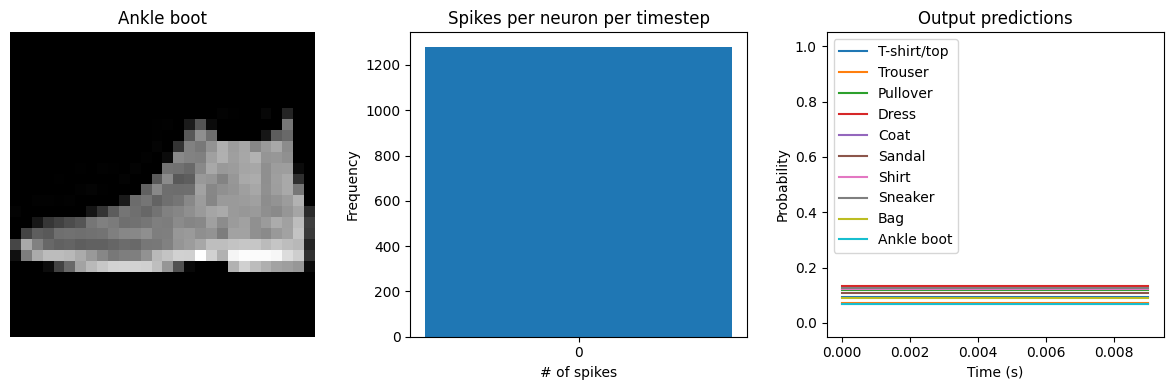

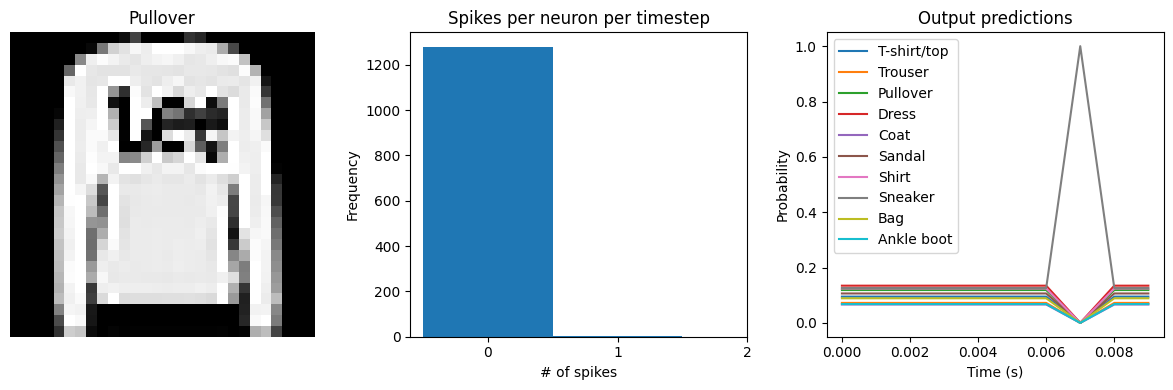

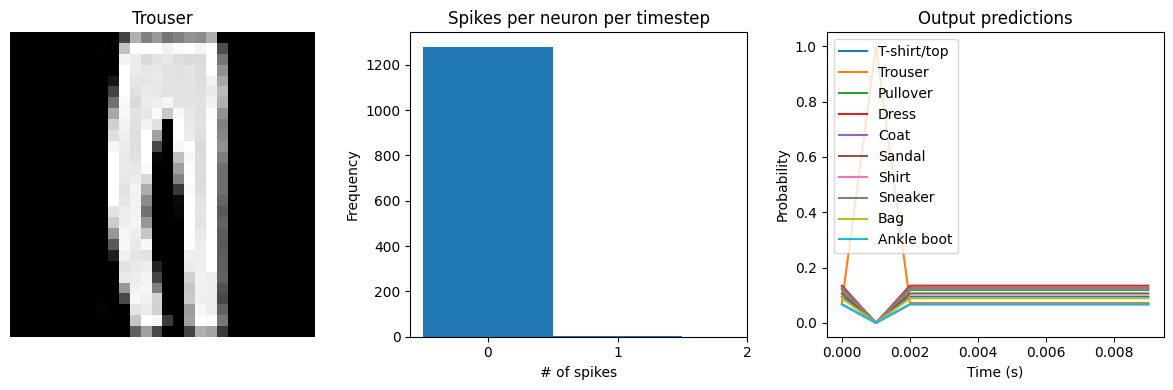

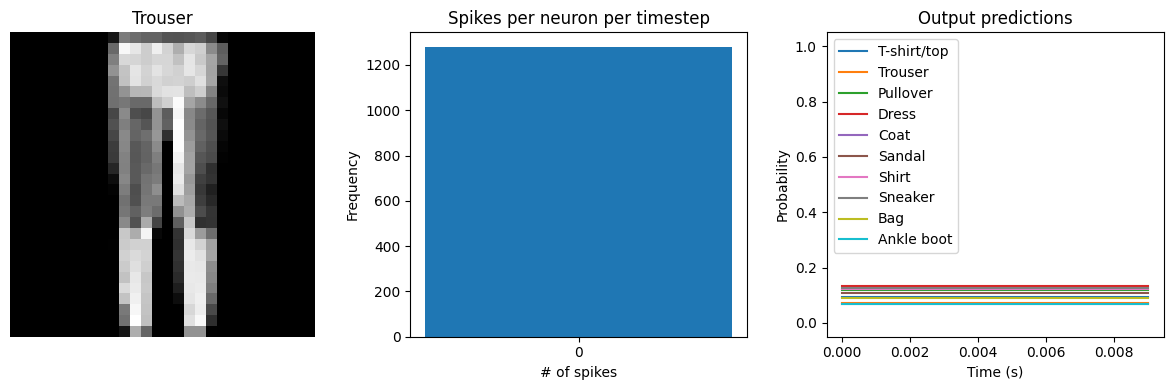

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

  1/313 [..............................] - ETA: 49s

 24/313 [=>............................] - ETA: 0s 

 46/313 [===>..........................] - ETA: 0s

 69/313 [=====>........................] - ETA: 0s

 92/313 [=======>......................] - ETA: 0s

115/313 [==========>...................] - ETA: 0s

136/313 [============>.................] - ETA: 0s

159/313 [==============>...............] - ETA: 0s

182/313 [================>.............] - ETA: 0s

204/313 [==================>...........] - ETA: 0s

227/313 [====================>.........] - ETA: 0s

250/313 [======================>.......] - ETA: 0s

273/313 [=========================>....] - ETA: 0s

296/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 64.72%
Spike rate per neuron (Hz): min=0.00 mean=0.59 max=20.00


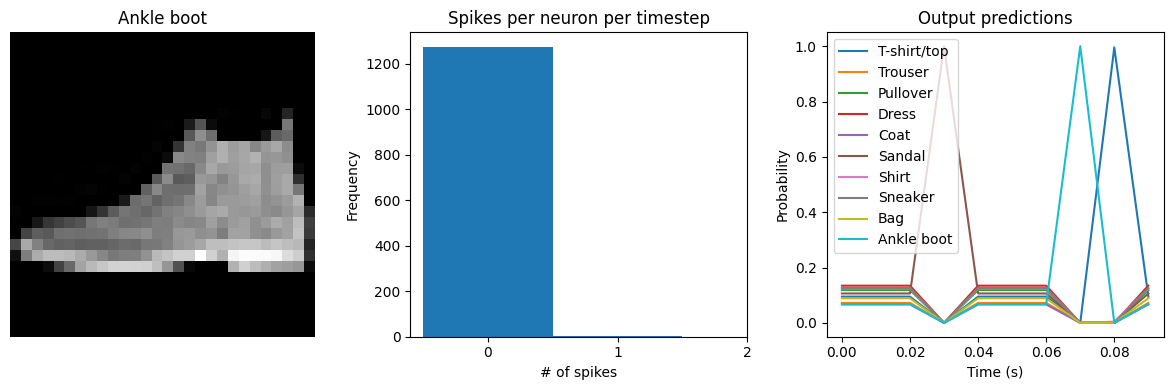

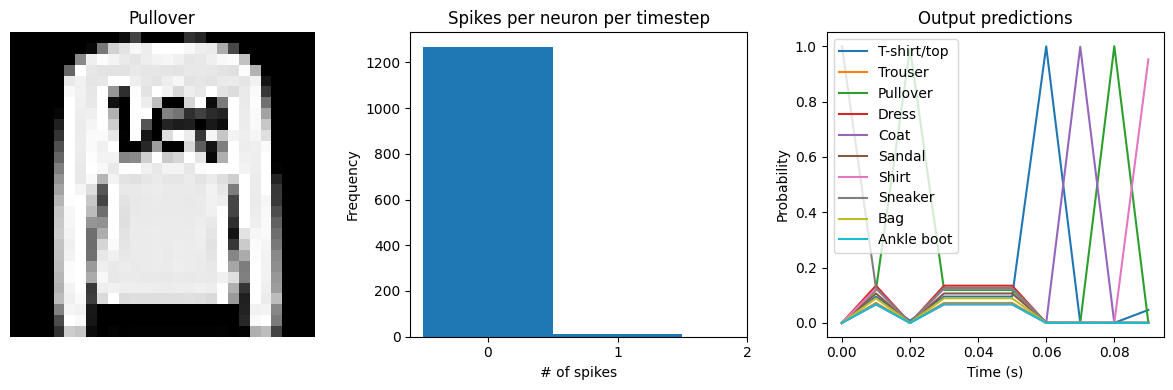

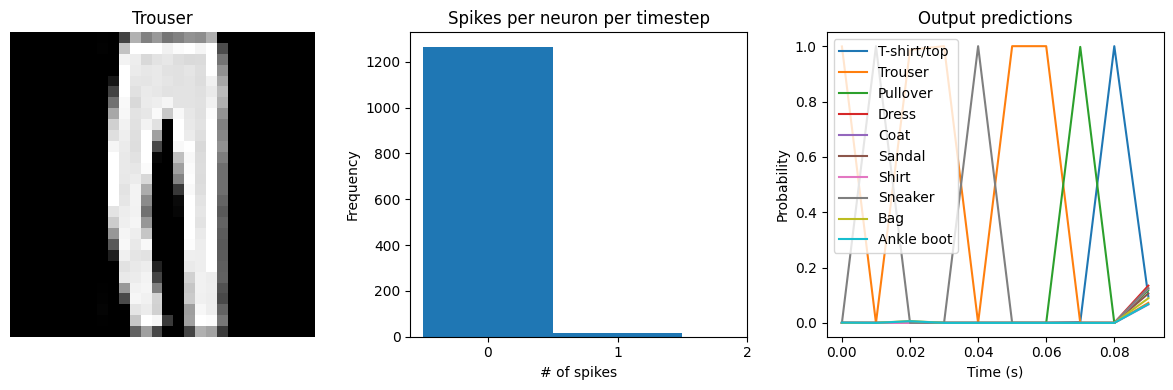

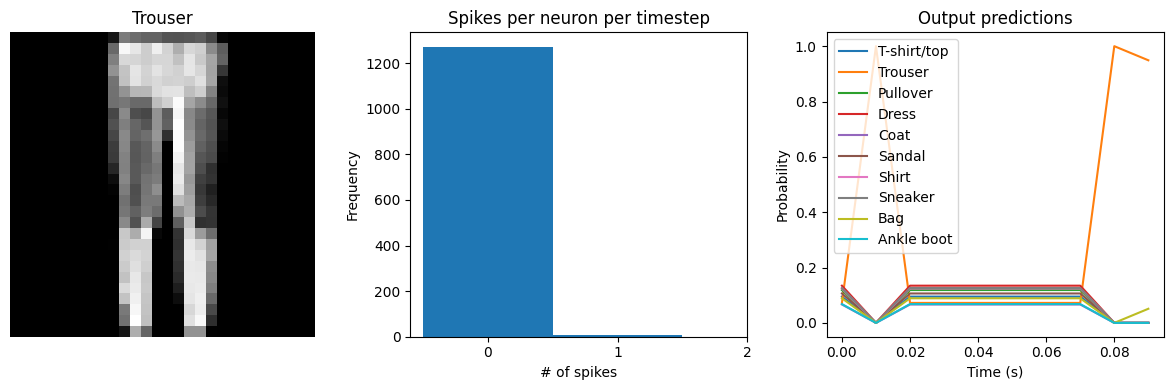

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

  1/313 [..............................] - ETA: 50s

 24/313 [=>............................] - ETA: 0s 

 44/313 [===>..........................] - ETA: 0s

 66/313 [=====>........................] - ETA: 0s

 86/313 [=======>......................] - ETA: 0s

107/313 [=========>....................] - ETA: 0s

128/313 [===========>..................] - ETA: 0s

148/313 [=============>................] - ETA: 0s

170/313 [===============>..............] - ETA: 0s

193/313 [=================>............] - ETA: 0s

214/313 [===================>..........] - ETA: 0s

237/313 [=====================>........] - ETA: 0s

259/313 [=======================>......] - ETA: 0s

282/313 [==========================>...] - ETA: 0s

305/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 88.07%
Spike rate per neuron (Hz): min=0.00 mean=0.59 max=20.00


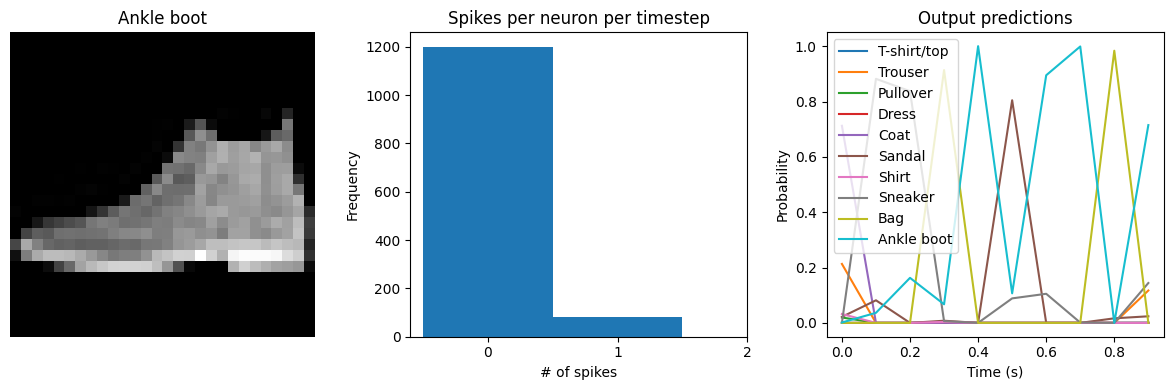

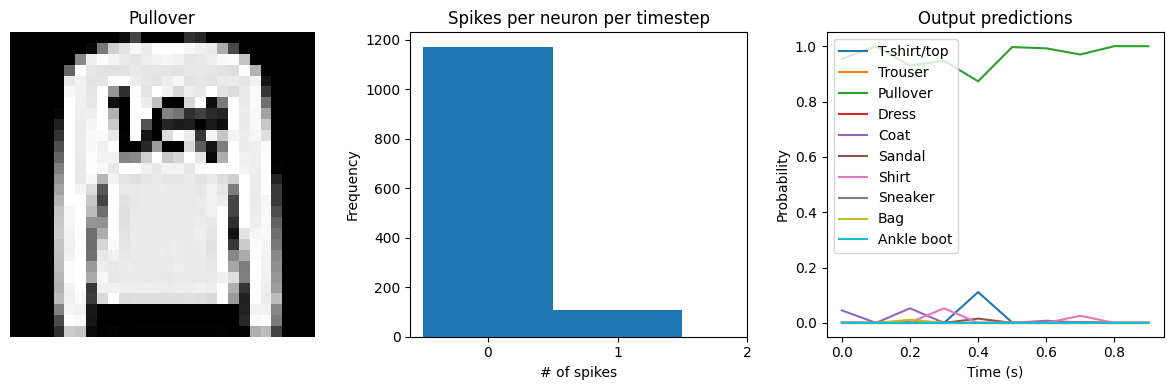

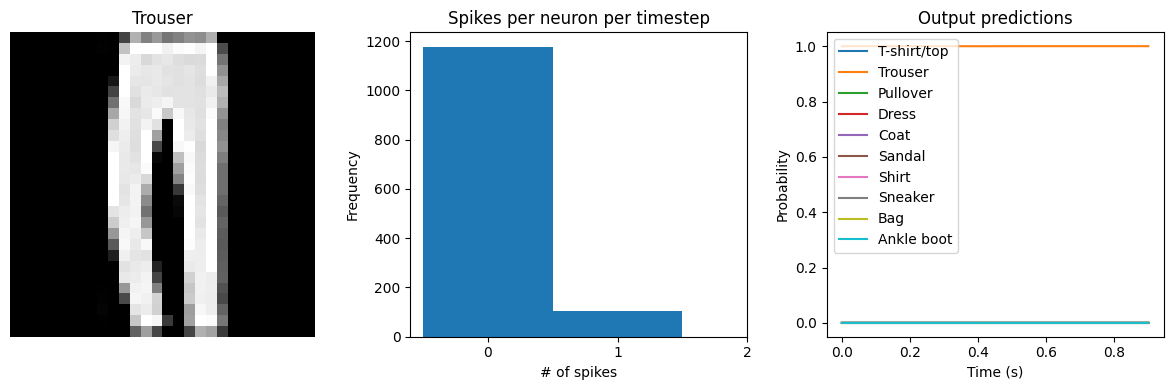

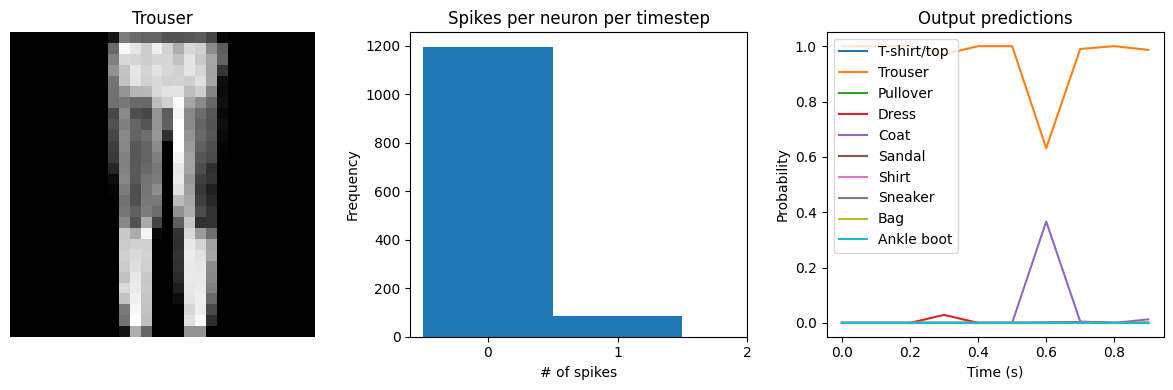

In [9]:
check_output(spiking_model, modify_dt=0.1)

  1/313 [..............................] - ETA: 49s

 25/313 [=>............................] - ETA: 0s 

 49/313 [===>..........................] - ETA: 0s

 73/313 [=====>........................] - ETA: 0s

 96/313 [========>.....................] - ETA: 0s

120/313 [==========>...................] - ETA: 0s

144/313 [============>.................] - ETA: 0s

166/313 [==============>...............] - ETA: 0s

191/313 [=================>............] - ETA: 0s

216/313 [===================>..........] - ETA: 0s

241/313 [======================>.......] - ETA: 0s

266/313 [========================>.....] - ETA: 0s

291/313 [==========================>...] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 88.31%
Spike rate per neuron (Hz): min=0.00 mean=0.59 max=19.40


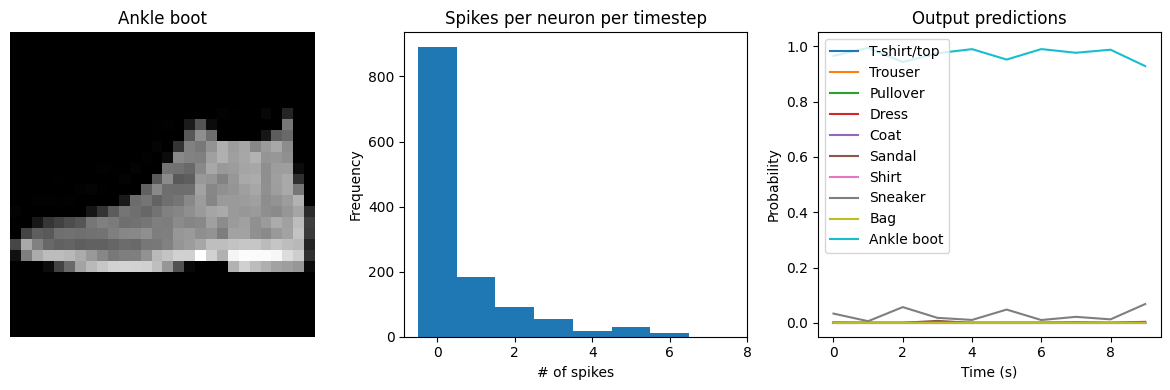

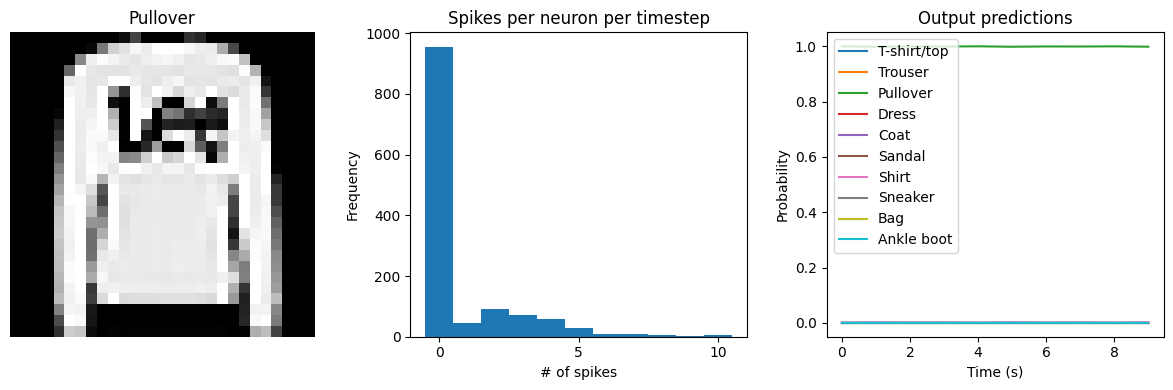

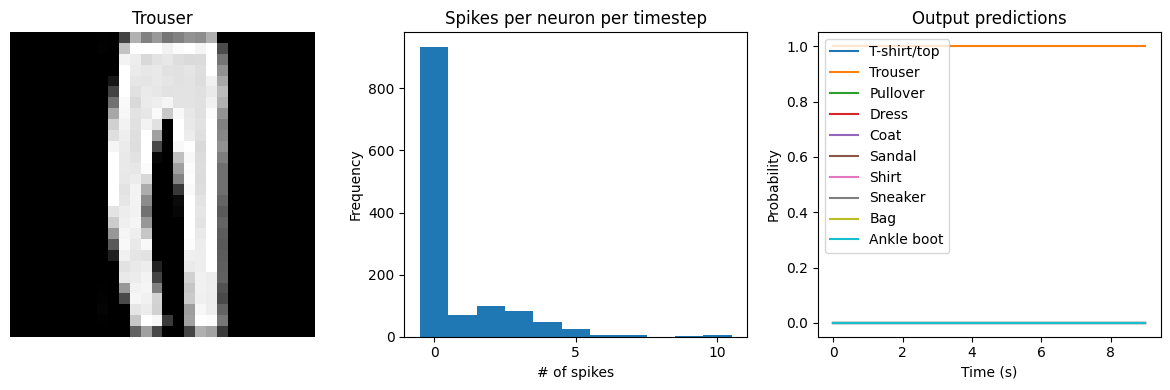

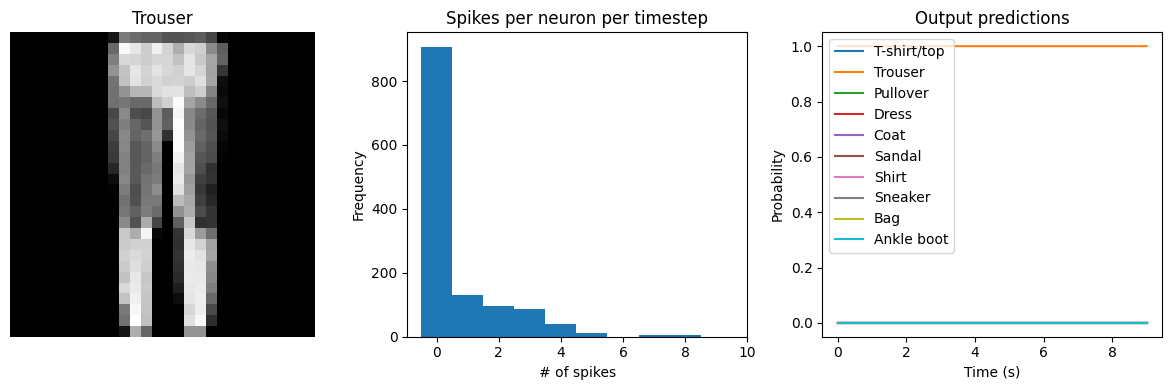

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 19:15 - loss: 3.6554 - accuracy: 0.2500

  14/1875 [..............................] - ETA: 7s - loss: 3.3021 - accuracy: 0.1674   

  27/1875 [..............................] - ETA: 7s - loss: 3.0802 - accuracy: 0.2407

  40/1875 [..............................] - ETA: 7s - loss: 2.9895 - accuracy: 0.2781

  53/1875 [..............................] - ETA: 7s - loss: 2.9705 - accuracy: 0.3119

  66/1875 [>.............................] - ETA: 7s - loss: 2.9239 - accuracy: 0.3343

  79/1875 [>.............................] - ETA: 7s - loss: 2.9200 - accuracy: 0.3517

  92/1875 [>.............................] - ETA: 7s - loss: 2.8393 - accuracy: 0.3760

 105/1875 [>.............................] - ETA: 7s - loss: 2.8110 - accuracy: 0.3908

 118/1875 [>.............................] - ETA: 6s - loss: 2.7521 - accuracy: 0.4073

 131/1875 [=>............................] - ETA: 6s - loss: 2.6929 - accuracy: 0.4220

 144/1875 [=>............................] - ETA: 6s - loss: 2.6426 - accuracy: 0.4340

 157/1875 [=>............................] - ETA: 6s - loss: 2.6061 - accuracy: 0.4427

 170/1875 [=>............................] - ETA: 6s - loss: 2.5794 - accuracy: 0.4476

 183/1875 [=>............................] - ETA: 6s - loss: 2.5731 - accuracy: 0.4547

 196/1875 [==>...........................] - ETA: 6s - loss: 2.5416 - accuracy: 0.4617

 209/1875 [==>...........................] - ETA: 6s - loss: 2.5114 - accuracy: 0.4689

 222/1875 [==>...........................] - ETA: 6s - loss: 2.4737 - accuracy: 0.4769

 235/1875 [==>...........................] - ETA: 6s - loss: 2.4455 - accuracy: 0.4843

 248/1875 [==>...........................] - ETA: 6s - loss: 2.4108 - accuracy: 0.4903

 261/1875 [===>..........................] - ETA: 6s - loss: 2.3860 - accuracy: 0.4970

 274/1875 [===>..........................] - ETA: 6s - loss: 2.3629 - accuracy: 0.5032

 287/1875 [===>..........................] - ETA: 6s - loss: 2.3289 - accuracy: 0.5093

 300/1875 [===>..........................] - ETA: 6s - loss: 2.3027 - accuracy: 0.5147

 313/1875 [====>.........................] - ETA: 6s - loss: 2.2777 - accuracy: 0.5190

 326/1875 [====>.........................] - ETA: 6s - loss: 2.2519 - accuracy: 0.5243

 339/1875 [====>.........................] - ETA: 6s - loss: 2.2302 - accuracy: 0.5287

 352/1875 [====>.........................] - ETA: 6s - loss: 2.2050 - accuracy: 0.5330

 365/1875 [====>.........................] - ETA: 6s - loss: 2.1764 - accuracy: 0.5372

 378/1875 [=====>........................] - ETA: 5s - loss: 2.1526 - accuracy: 0.5417

 391/1875 [=====>........................] - ETA: 5s - loss: 2.1264 - accuracy: 0.5455

 404/1875 [=====>........................] - ETA: 5s - loss: 2.1029 - accuracy: 0.5491

 417/1875 [=====>........................] - ETA: 5s - loss: 2.0746 - accuracy: 0.5543

 430/1875 [=====>........................] - ETA: 5s - loss: 2.0514 - accuracy: 0.5578

 443/1875 [======>.......................] - ETA: 5s - loss: 2.0356 - accuracy: 0.5605

 456/1875 [======>.......................] - ETA: 5s - loss: 2.0131 - accuracy: 0.5639

 469/1875 [======>.......................] - ETA: 5s - loss: 1.9923 - accuracy: 0.5664

 482/1875 [======>.......................] - ETA: 5s - loss: 1.9731 - accuracy: 0.5693

 495/1875 [======>.......................] - ETA: 5s - loss: 1.9553 - accuracy: 0.5717

 508/1875 [=======>......................] - ETA: 5s - loss: 1.9424 - accuracy: 0.5729

 521/1875 [=======>......................] - ETA: 5s - loss: 1.9226 - accuracy: 0.5760

 534/1875 [=======>......................] - ETA: 5s - loss: 1.9066 - accuracy: 0.5787

 547/1875 [=======>......................] - ETA: 5s - loss: 1.8857 - accuracy: 0.5820

 560/1875 [=======>......................] - ETA: 5s - loss: 1.8710 - accuracy: 0.5838

 573/1875 [========>.....................] - ETA: 5s - loss: 1.8545 - accuracy: 0.5862

 586/1875 [========>.....................] - ETA: 5s - loss: 1.8396 - accuracy: 0.5887

 599/1875 [========>.....................] - ETA: 5s - loss: 1.8259 - accuracy: 0.5902

 612/1875 [========>.....................] - ETA: 5s - loss: 1.8120 - accuracy: 0.5919

 624/1875 [========>.....................] - ETA: 4s - loss: 1.7998 - accuracy: 0.5929

 637/1875 [=========>....................] - ETA: 4s - loss: 1.7865 - accuracy: 0.5942

 649/1875 [=========>....................] - ETA: 4s - loss: 1.7761 - accuracy: 0.5955

 662/1875 [=========>....................] - ETA: 4s - loss: 1.7629 - accuracy: 0.5976

 675/1875 [=========>....................] - ETA: 4s - loss: 1.7506 - accuracy: 0.5990

 688/1875 [==========>...................] - ETA: 4s - loss: 1.7370 - accuracy: 0.6011

 701/1875 [==========>...................] - ETA: 4s - loss: 1.7230 - accuracy: 0.6033

 714/1875 [==========>...................] - ETA: 4s - loss: 1.7084 - accuracy: 0.6052

 727/1875 [==========>...................] - ETA: 4s - loss: 1.6967 - accuracy: 0.6063

 740/1875 [==========>...................] - ETA: 4s - loss: 1.6881 - accuracy: 0.6072

 753/1875 [===========>..................] - ETA: 4s - loss: 1.6765 - accuracy: 0.6091

 766/1875 [===========>..................] - ETA: 4s - loss: 1.6615 - accuracy: 0.6113

 779/1875 [===========>..................] - ETA: 4s - loss: 1.6483 - accuracy: 0.6131

 792/1875 [===========>..................] - ETA: 4s - loss: 1.6395 - accuracy: 0.6141

 805/1875 [===========>..................] - ETA: 4s - loss: 1.6291 - accuracy: 0.6150

 818/1875 [============>.................] - ETA: 4s - loss: 1.6183 - accuracy: 0.6164

 831/1875 [============>.................] - ETA: 4s - loss: 1.6113 - accuracy: 0.6168

 844/1875 [============>.................] - ETA: 4s - loss: 1.6009 - accuracy: 0.6177

 857/1875 [============>.................] - ETA: 4s - loss: 1.5903 - accuracy: 0.6187

 869/1875 [============>.................] - ETA: 4s - loss: 1.5821 - accuracy: 0.6195

 882/1875 [=============>................] - ETA: 3s - loss: 1.5710 - accuracy: 0.6211

 894/1875 [=============>................] - ETA: 3s - loss: 1.5627 - accuracy: 0.6221

 907/1875 [=============>................] - ETA: 3s - loss: 1.5524 - accuracy: 0.6232

 919/1875 [=============>................] - ETA: 3s - loss: 1.5444 - accuracy: 0.6241

 931/1875 [=============>................] - ETA: 3s - loss: 1.5358 - accuracy: 0.6256

 944/1875 [==============>...............] - ETA: 3s - loss: 1.5256 - accuracy: 0.6267

 956/1875 [==============>...............] - ETA: 3s - loss: 1.5182 - accuracy: 0.6278

 967/1875 [==============>...............] - ETA: 3s - loss: 1.5100 - accuracy: 0.6287

 980/1875 [==============>...............] - ETA: 3s - loss: 1.5025 - accuracy: 0.6296

 992/1875 [==============>...............] - ETA: 3s - loss: 1.4948 - accuracy: 0.6306

1005/1875 [===============>..............] - ETA: 3s - loss: 1.4864 - accuracy: 0.6317

1018/1875 [===============>..............] - ETA: 3s - loss: 1.4771 - accuracy: 0.6328

1031/1875 [===============>..............] - ETA: 3s - loss: 1.4675 - accuracy: 0.6343

1044/1875 [===============>..............] - ETA: 3s - loss: 1.4600 - accuracy: 0.6354

1057/1875 [===============>..............] - ETA: 3s - loss: 1.4516 - accuracy: 0.6364

1069/1875 [================>.............] - ETA: 3s - loss: 1.4433 - accuracy: 0.6375

1082/1875 [================>.............] - ETA: 3s - loss: 1.4361 - accuracy: 0.6386

1095/1875 [================>.............] - ETA: 3s - loss: 1.4299 - accuracy: 0.6390

1108/1875 [================>.............] - ETA: 3s - loss: 1.4237 - accuracy: 0.6397

1121/1875 [================>.............] - ETA: 3s - loss: 1.4165 - accuracy: 0.6408

1133/1875 [=================>............] - ETA: 3s - loss: 1.4097 - accuracy: 0.6417

1146/1875 [=================>............] - ETA: 2s - loss: 1.4035 - accuracy: 0.6427

1159/1875 [=================>............] - ETA: 2s - loss: 1.3958 - accuracy: 0.6437

1172/1875 [=================>............] - ETA: 2s - loss: 1.3891 - accuracy: 0.6445

1185/1875 [=================>............] - ETA: 2s - loss: 1.3836 - accuracy: 0.6453

1198/1875 [==================>...........] - ETA: 2s - loss: 1.3768 - accuracy: 0.6463

1211/1875 [==================>...........] - ETA: 2s - loss: 1.3703 - accuracy: 0.6471

1224/1875 [==================>...........] - ETA: 2s - loss: 1.3636 - accuracy: 0.6482

1237/1875 [==================>...........] - ETA: 2s - loss: 1.3576 - accuracy: 0.6491

1250/1875 [===================>..........] - ETA: 2s - loss: 1.3528 - accuracy: 0.6500

1263/1875 [===================>..........] - ETA: 2s - loss: 1.3470 - accuracy: 0.6504

1276/1875 [===================>..........] - ETA: 2s - loss: 1.3406 - accuracy: 0.6516

1289/1875 [===================>..........] - ETA: 2s - loss: 1.3354 - accuracy: 0.6523

1302/1875 [===================>..........] - ETA: 2s - loss: 1.3290 - accuracy: 0.6529

1314/1875 [====================>.........] - ETA: 2s - loss: 1.3226 - accuracy: 0.6539

1327/1875 [====================>.........] - ETA: 2s - loss: 1.3168 - accuracy: 0.6548

1340/1875 [====================>.........] - ETA: 2s - loss: 1.3129 - accuracy: 0.6550

1353/1875 [====================>.........] - ETA: 2s - loss: 1.3073 - accuracy: 0.6556

1366/1875 [====================>.........] - ETA: 2s - loss: 1.3008 - accuracy: 0.6566

1379/1875 [=====================>........] - ETA: 2s - loss: 1.2971 - accuracy: 0.6570

1392/1875 [=====================>........] - ETA: 1s - loss: 1.2920 - accuracy: 0.6577

1405/1875 [=====================>........] - ETA: 1s - loss: 1.2880 - accuracy: 0.6581

1418/1875 [=====================>........] - ETA: 1s - loss: 1.2840 - accuracy: 0.6589

1431/1875 [=====================>........] - ETA: 1s - loss: 1.2806 - accuracy: 0.6593

1444/1875 [======================>.......] - ETA: 1s - loss: 1.2748 - accuracy: 0.6600

1457/1875 [======================>.......] - ETA: 1s - loss: 1.2704 - accuracy: 0.6603

1470/1875 [======================>.......] - ETA: 1s - loss: 1.2663 - accuracy: 0.6607

1481/1875 [======================>.......] - ETA: 1s - loss: 1.2619 - accuracy: 0.6613

1494/1875 [======================>.......] - ETA: 1s - loss: 1.2565 - accuracy: 0.6622

1507/1875 [=======================>......] - ETA: 1s - loss: 1.2513 - accuracy: 0.6633

1519/1875 [=======================>......] - ETA: 1s - loss: 1.2470 - accuracy: 0.6640

1532/1875 [=======================>......] - ETA: 1s - loss: 1.2424 - accuracy: 0.6646

1545/1875 [=======================>......] - ETA: 1s - loss: 1.2384 - accuracy: 0.6651

1557/1875 [=======================>......] - ETA: 1s - loss: 1.2334 - accuracy: 0.6660

1570/1875 [========================>.....] - ETA: 1s - loss: 1.2303 - accuracy: 0.6664

1583/1875 [========================>.....] - ETA: 1s - loss: 1.2264 - accuracy: 0.6667

1596/1875 [========================>.....] - ETA: 1s - loss: 1.2224 - accuracy: 0.6672

1608/1875 [========================>.....] - ETA: 1s - loss: 1.2178 - accuracy: 0.6680

1621/1875 [========================>.....] - ETA: 1s - loss: 1.2136 - accuracy: 0.6688

1634/1875 [=========================>....] - ETA: 0s - loss: 1.2100 - accuracy: 0.6694

1647/1875 [=========================>....] - ETA: 0s - loss: 1.2065 - accuracy: 0.6698

1660/1875 [=========================>....] - ETA: 0s - loss: 1.2029 - accuracy: 0.6704

1672/1875 [=========================>....] - ETA: 0s - loss: 1.1999 - accuracy: 0.6706

1685/1875 [=========================>....] - ETA: 0s - loss: 1.1960 - accuracy: 0.6712

1698/1875 [==========================>...] - ETA: 0s - loss: 1.1924 - accuracy: 0.6718

1711/1875 [==========================>...] - ETA: 0s - loss: 1.1884 - accuracy: 0.6726

1724/1875 [==========================>...] - ETA: 0s - loss: 1.1850 - accuracy: 0.6730

1737/1875 [==========================>...] - ETA: 0s - loss: 1.1816 - accuracy: 0.6735

1750/1875 [===========================>..] - ETA: 0s - loss: 1.1777 - accuracy: 0.6741

1763/1875 [===========================>..] - ETA: 0s - loss: 1.1743 - accuracy: 0.6748

1775/1875 [===========================>..] - ETA: 0s - loss: 1.1717 - accuracy: 0.6751

1788/1875 [===========================>..] - ETA: 0s - loss: 1.1687 - accuracy: 0.6754

1801/1875 [===========================>..] - ETA: 0s - loss: 1.1654 - accuracy: 0.6760

1814/1875 [============================>.] - ETA: 0s - loss: 1.1618 - accuracy: 0.6766

1827/1875 [============================>.] - ETA: 0s - loss: 1.1581 - accuracy: 0.6772

1840/1875 [============================>.] - ETA: 0s - loss: 1.1540 - accuracy: 0.6780

1853/1875 [============================>.] - ETA: 0s - loss: 1.1509 - accuracy: 0.6786

1866/1875 [============================>.] - ETA: 0s - loss: 1.1490 - accuracy: 0.6786

1875/1875 [==============================] - 8s 4ms/step - loss: 1.1468 - accuracy: 0.6790


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4762 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 7s - loss: 0.8162 - accuracy: 0.6971

  26/1875 [..............................] - ETA: 7s - loss: 0.7754 - accuracy: 0.7043

  39/1875 [..............................] - ETA: 7s - loss: 0.7685 - accuracy: 0.7123

  52/1875 [..............................] - ETA: 7s - loss: 0.7688 - accuracy: 0.7181

  65/1875 [>.............................] - ETA: 7s - loss: 0.7384 - accuracy: 0.7327

  78/1875 [>.............................] - ETA: 7s - loss: 0.7255 - accuracy: 0.7372

  91/1875 [>.............................] - ETA: 7s - loss: 0.7111 - accuracy: 0.7400

 104/1875 [>.............................] - ETA: 7s - loss: 0.7090 - accuracy: 0.7440

 117/1875 [>.............................] - ETA: 7s - loss: 0.7077 - accuracy: 0.7452

 130/1875 [=>............................] - ETA: 7s - loss: 0.7081 - accuracy: 0.7437

 143/1875 [=>............................] - ETA: 7s - loss: 0.7123 - accuracy: 0.7437

 156/1875 [=>............................] - ETA: 6s - loss: 0.7065 - accuracy: 0.7458

 169/1875 [=>............................] - ETA: 6s - loss: 0.7051 - accuracy: 0.7463

 182/1875 [=>............................] - ETA: 6s - loss: 0.7033 - accuracy: 0.7457

 195/1875 [==>...........................] - ETA: 6s - loss: 0.6981 - accuracy: 0.7465

 208/1875 [==>...........................] - ETA: 6s - loss: 0.6981 - accuracy: 0.7458

 221/1875 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.7473

 234/1875 [==>...........................] - ETA: 6s - loss: 0.6875 - accuracy: 0.7492

 247/1875 [==>...........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.7482

 260/1875 [===>..........................] - ETA: 6s - loss: 0.6887 - accuracy: 0.7490

 273/1875 [===>..........................] - ETA: 6s - loss: 0.6849 - accuracy: 0.7499

 286/1875 [===>..........................] - ETA: 6s - loss: 0.6826 - accuracy: 0.7509

 299/1875 [===>..........................] - ETA: 6s - loss: 0.6839 - accuracy: 0.7494

 312/1875 [===>..........................] - ETA: 6s - loss: 0.6870 - accuracy: 0.7489

 323/1875 [====>.........................] - ETA: 6s - loss: 0.6862 - accuracy: 0.7502

 335/1875 [====>.........................] - ETA: 6s - loss: 0.6844 - accuracy: 0.7507

 348/1875 [====>.........................] - ETA: 6s - loss: 0.6813 - accuracy: 0.7517

 361/1875 [====>.........................] - ETA: 6s - loss: 0.6836 - accuracy: 0.7520

 374/1875 [====>.........................] - ETA: 6s - loss: 0.6806 - accuracy: 0.7523

 387/1875 [=====>........................] - ETA: 6s - loss: 0.6785 - accuracy: 0.7532

 400/1875 [=====>........................] - ETA: 5s - loss: 0.6808 - accuracy: 0.7532

 413/1875 [=====>........................] - ETA: 5s - loss: 0.6789 - accuracy: 0.7539

 426/1875 [=====>........................] - ETA: 5s - loss: 0.6796 - accuracy: 0.7535

 439/1875 [======>.......................] - ETA: 5s - loss: 0.6774 - accuracy: 0.7542

 452/1875 [======>.......................] - ETA: 5s - loss: 0.6761 - accuracy: 0.7548

 463/1875 [======>.......................] - ETA: 5s - loss: 0.6773 - accuracy: 0.7553

 476/1875 [======>.......................] - ETA: 5s - loss: 0.6780 - accuracy: 0.7546

 487/1875 [======>.......................] - ETA: 5s - loss: 0.6783 - accuracy: 0.7545

 500/1875 [=======>......................] - ETA: 5s - loss: 0.6776 - accuracy: 0.7550

 512/1875 [=======>......................] - ETA: 5s - loss: 0.6767 - accuracy: 0.7548

 525/1875 [=======>......................] - ETA: 5s - loss: 0.6757 - accuracy: 0.7546

 537/1875 [=======>......................] - ETA: 5s - loss: 0.6756 - accuracy: 0.7547

 550/1875 [=======>......................] - ETA: 5s - loss: 0.6741 - accuracy: 0.7552

 562/1875 [=======>......................] - ETA: 5s - loss: 0.6728 - accuracy: 0.7555

 574/1875 [========>.....................] - ETA: 5s - loss: 0.6728 - accuracy: 0.7552

 587/1875 [========>.....................] - ETA: 5s - loss: 0.6734 - accuracy: 0.7551

 600/1875 [========>.....................] - ETA: 5s - loss: 0.6734 - accuracy: 0.7552

 612/1875 [========>.....................] - ETA: 5s - loss: 0.6710 - accuracy: 0.7560

 624/1875 [========>.....................] - ETA: 5s - loss: 0.6706 - accuracy: 0.7562

 637/1875 [=========>....................] - ETA: 5s - loss: 0.6697 - accuracy: 0.7569

 649/1875 [=========>....................] - ETA: 5s - loss: 0.6703 - accuracy: 0.7567

 662/1875 [=========>....................] - ETA: 4s - loss: 0.6683 - accuracy: 0.7572

 675/1875 [=========>....................] - ETA: 4s - loss: 0.6663 - accuracy: 0.7577

 688/1875 [==========>...................] - ETA: 4s - loss: 0.6655 - accuracy: 0.7579

 701/1875 [==========>...................] - ETA: 4s - loss: 0.6642 - accuracy: 0.7582

 714/1875 [==========>...................] - ETA: 4s - loss: 0.6641 - accuracy: 0.7581

 727/1875 [==========>...................] - ETA: 4s - loss: 0.6641 - accuracy: 0.7587

 739/1875 [==========>...................] - ETA: 4s - loss: 0.6634 - accuracy: 0.7590

 752/1875 [===========>..................] - ETA: 4s - loss: 0.6623 - accuracy: 0.7598

 764/1875 [===========>..................] - ETA: 4s - loss: 0.6618 - accuracy: 0.7599

 777/1875 [===========>..................] - ETA: 4s - loss: 0.6612 - accuracy: 0.7602

 789/1875 [===========>..................] - ETA: 4s - loss: 0.6614 - accuracy: 0.7601

 802/1875 [===========>..................] - ETA: 4s - loss: 0.6614 - accuracy: 0.7604

 815/1875 [============>.................] - ETA: 4s - loss: 0.6608 - accuracy: 0.7607

 828/1875 [============>.................] - ETA: 4s - loss: 0.6616 - accuracy: 0.7607

 841/1875 [============>.................] - ETA: 4s - loss: 0.6607 - accuracy: 0.7611

 854/1875 [============>.................] - ETA: 4s - loss: 0.6616 - accuracy: 0.7613

 867/1875 [============>.................] - ETA: 4s - loss: 0.6607 - accuracy: 0.7615

 880/1875 [=============>................] - ETA: 4s - loss: 0.6589 - accuracy: 0.7619

 893/1875 [=============>................] - ETA: 4s - loss: 0.6587 - accuracy: 0.7619

 906/1875 [=============>................] - ETA: 3s - loss: 0.6573 - accuracy: 0.7622

 918/1875 [=============>................] - ETA: 3s - loss: 0.6564 - accuracy: 0.7627

 931/1875 [=============>................] - ETA: 3s - loss: 0.6556 - accuracy: 0.7634

 944/1875 [==============>...............] - ETA: 3s - loss: 0.6554 - accuracy: 0.7637

 957/1875 [==============>...............] - ETA: 3s - loss: 0.6553 - accuracy: 0.7636

 969/1875 [==============>...............] - ETA: 3s - loss: 0.6563 - accuracy: 0.7631

 982/1875 [==============>...............] - ETA: 3s - loss: 0.6571 - accuracy: 0.7633

 995/1875 [==============>...............] - ETA: 3s - loss: 0.6560 - accuracy: 0.7637

1007/1875 [===============>..............] - ETA: 3s - loss: 0.6548 - accuracy: 0.7640

1020/1875 [===============>..............] - ETA: 3s - loss: 0.6558 - accuracy: 0.7641

1033/1875 [===============>..............] - ETA: 3s - loss: 0.6546 - accuracy: 0.7643

1046/1875 [===============>..............] - ETA: 3s - loss: 0.6546 - accuracy: 0.7645

1058/1875 [===============>..............] - ETA: 3s - loss: 0.6541 - accuracy: 0.7646

1070/1875 [================>.............] - ETA: 3s - loss: 0.6534 - accuracy: 0.7650

1083/1875 [================>.............] - ETA: 3s - loss: 0.6536 - accuracy: 0.7648

1096/1875 [================>.............] - ETA: 3s - loss: 0.6541 - accuracy: 0.7651

1109/1875 [================>.............] - ETA: 3s - loss: 0.6536 - accuracy: 0.7654

1122/1875 [================>.............] - ETA: 3s - loss: 0.6526 - accuracy: 0.7656

1135/1875 [=================>............] - ETA: 3s - loss: 0.6527 - accuracy: 0.7654

1147/1875 [=================>............] - ETA: 2s - loss: 0.6521 - accuracy: 0.7656

1160/1875 [=================>............] - ETA: 2s - loss: 0.6519 - accuracy: 0.7658

1173/1875 [=================>............] - ETA: 2s - loss: 0.6516 - accuracy: 0.7658

1186/1875 [=================>............] - ETA: 2s - loss: 0.6526 - accuracy: 0.7657

1198/1875 [==================>...........] - ETA: 2s - loss: 0.6512 - accuracy: 0.7662

1211/1875 [==================>...........] - ETA: 2s - loss: 0.6501 - accuracy: 0.7663

1224/1875 [==================>...........] - ETA: 2s - loss: 0.6489 - accuracy: 0.7666

1236/1875 [==================>...........] - ETA: 2s - loss: 0.6478 - accuracy: 0.7669

1249/1875 [==================>...........] - ETA: 2s - loss: 0.6483 - accuracy: 0.7668

1262/1875 [===================>..........] - ETA: 2s - loss: 0.6476 - accuracy: 0.7672

1274/1875 [===================>..........] - ETA: 2s - loss: 0.6473 - accuracy: 0.7672

1286/1875 [===================>..........] - ETA: 2s - loss: 0.6480 - accuracy: 0.7672

1299/1875 [===================>..........] - ETA: 2s - loss: 0.6474 - accuracy: 0.7673

1311/1875 [===================>..........] - ETA: 2s - loss: 0.6475 - accuracy: 0.7672

1323/1875 [====================>.........] - ETA: 2s - loss: 0.6471 - accuracy: 0.7674

1336/1875 [====================>.........] - ETA: 2s - loss: 0.6466 - accuracy: 0.7674

1349/1875 [====================>.........] - ETA: 2s - loss: 0.6469 - accuracy: 0.7674

1361/1875 [====================>.........] - ETA: 2s - loss: 0.6467 - accuracy: 0.7675

1372/1875 [====================>.........] - ETA: 2s - loss: 0.6468 - accuracy: 0.7673

1384/1875 [=====================>........] - ETA: 2s - loss: 0.6463 - accuracy: 0.7675

1397/1875 [=====================>........] - ETA: 1s - loss: 0.6455 - accuracy: 0.7678

1410/1875 [=====================>........] - ETA: 1s - loss: 0.6455 - accuracy: 0.7677

1422/1875 [=====================>........] - ETA: 1s - loss: 0.6442 - accuracy: 0.7682

1435/1875 [=====================>........] - ETA: 1s - loss: 0.6433 - accuracy: 0.7685

1448/1875 [======================>.......] - ETA: 1s - loss: 0.6436 - accuracy: 0.7685

1460/1875 [======================>.......] - ETA: 1s - loss: 0.6436 - accuracy: 0.7685

1473/1875 [======================>.......] - ETA: 1s - loss: 0.6435 - accuracy: 0.7686

1486/1875 [======================>.......] - ETA: 1s - loss: 0.6426 - accuracy: 0.7688

1499/1875 [======================>.......] - ETA: 1s - loss: 0.6425 - accuracy: 0.7688

1511/1875 [=======================>......] - ETA: 1s - loss: 0.6422 - accuracy: 0.7691

1524/1875 [=======================>......] - ETA: 1s - loss: 0.6418 - accuracy: 0.7693

1537/1875 [=======================>......] - ETA: 1s - loss: 0.6413 - accuracy: 0.7694

1550/1875 [=======================>......] - ETA: 1s - loss: 0.6415 - accuracy: 0.7694

1561/1875 [=======================>......] - ETA: 1s - loss: 0.6406 - accuracy: 0.7697

1574/1875 [========================>.....] - ETA: 1s - loss: 0.6402 - accuracy: 0.7698

1587/1875 [========================>.....] - ETA: 1s - loss: 0.6393 - accuracy: 0.7701

1600/1875 [========================>.....] - ETA: 1s - loss: 0.6382 - accuracy: 0.7706

1613/1875 [========================>.....] - ETA: 1s - loss: 0.6385 - accuracy: 0.7705

1626/1875 [=========================>....] - ETA: 1s - loss: 0.6381 - accuracy: 0.7707

1638/1875 [=========================>....] - ETA: 0s - loss: 0.6374 - accuracy: 0.7709

1650/1875 [=========================>....] - ETA: 0s - loss: 0.6368 - accuracy: 0.7711

1663/1875 [=========================>....] - ETA: 0s - loss: 0.6361 - accuracy: 0.7714

1676/1875 [=========================>....] - ETA: 0s - loss: 0.6358 - accuracy: 0.7715

1689/1875 [==========================>...] - ETA: 0s - loss: 0.6359 - accuracy: 0.7715

1702/1875 [==========================>...] - ETA: 0s - loss: 0.6356 - accuracy: 0.7716

1715/1875 [==========================>...] - ETA: 0s - loss: 0.6348 - accuracy: 0.7719

1728/1875 [==========================>...] - ETA: 0s - loss: 0.6343 - accuracy: 0.7720

1741/1875 [==========================>...] - ETA: 0s - loss: 0.6340 - accuracy: 0.7721

1754/1875 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.7721

1766/1875 [===========================>..] - ETA: 0s - loss: 0.6332 - accuracy: 0.7723

1779/1875 [===========================>..] - ETA: 0s - loss: 0.6334 - accuracy: 0.7723

1792/1875 [===========================>..] - ETA: 0s - loss: 0.6336 - accuracy: 0.7721

1805/1875 [===========================>..] - ETA: 0s - loss: 0.6337 - accuracy: 0.7722

1817/1875 [============================>.] - ETA: 0s - loss: 0.6338 - accuracy: 0.7720

1830/1875 [============================>.] - ETA: 0s - loss: 0.6331 - accuracy: 0.7720

1841/1875 [============================>.] - ETA: 0s - loss: 0.6325 - accuracy: 0.7723

1852/1875 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.7722

1864/1875 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.7724

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6320 - accuracy: 0.7724


Epoch 3/10


   1/1875 [..............................] - ETA: 8s - loss: 0.5033 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.5017 - accuracy: 0.8147

  27/1875 [..............................] - ETA: 7s - loss: 0.5185 - accuracy: 0.8090

  40/1875 [..............................] - ETA: 7s - loss: 0.5412 - accuracy: 0.8047

  53/1875 [..............................] - ETA: 7s - loss: 0.5557 - accuracy: 0.8007

  66/1875 [>.............................] - ETA: 7s - loss: 0.5773 - accuracy: 0.7907

  79/1875 [>.............................] - ETA: 7s - loss: 0.5828 - accuracy: 0.7876

  92/1875 [>.............................] - ETA: 7s - loss: 0.5740 - accuracy: 0.7887

 104/1875 [>.............................] - ETA: 7s - loss: 0.5735 - accuracy: 0.7927

 117/1875 [>.............................] - ETA: 7s - loss: 0.5761 - accuracy: 0.7909

 130/1875 [=>............................] - ETA: 7s - loss: 0.5795 - accuracy: 0.7909

 143/1875 [=>............................] - ETA: 6s - loss: 0.5723 - accuracy: 0.7941

 156/1875 [=>............................] - ETA: 6s - loss: 0.5763 - accuracy: 0.7927

 169/1875 [=>............................] - ETA: 6s - loss: 0.5776 - accuracy: 0.7916

 182/1875 [=>............................] - ETA: 6s - loss: 0.5807 - accuracy: 0.7909

 195/1875 [==>...........................] - ETA: 6s - loss: 0.5824 - accuracy: 0.7909

 208/1875 [==>...........................] - ETA: 6s - loss: 0.5785 - accuracy: 0.7918

 221/1875 [==>...........................] - ETA: 6s - loss: 0.5786 - accuracy: 0.7904

 234/1875 [==>...........................] - ETA: 6s - loss: 0.5757 - accuracy: 0.7926

 247/1875 [==>...........................] - ETA: 6s - loss: 0.5777 - accuracy: 0.7912

 258/1875 [===>..........................] - ETA: 6s - loss: 0.5819 - accuracy: 0.7891

 266/1875 [===>..........................] - ETA: 6s - loss: 0.5819 - accuracy: 0.7899

 278/1875 [===>..........................] - ETA: 6s - loss: 0.5836 - accuracy: 0.7898

 289/1875 [===>..........................] - ETA: 6s - loss: 0.5825 - accuracy: 0.7914

 299/1875 [===>..........................] - ETA: 6s - loss: 0.5834 - accuracy: 0.7909

 309/1875 [===>..........................] - ETA: 6s - loss: 0.5835 - accuracy: 0.7897

 322/1875 [====>.........................] - ETA: 6s - loss: 0.5865 - accuracy: 0.7883

 335/1875 [====>.........................] - ETA: 6s - loss: 0.5842 - accuracy: 0.7884

 348/1875 [====>.........................] - ETA: 6s - loss: 0.5847 - accuracy: 0.7887

 361/1875 [====>.........................] - ETA: 6s - loss: 0.5837 - accuracy: 0.7884

 374/1875 [====>.........................] - ETA: 6s - loss: 0.5860 - accuracy: 0.7881

 387/1875 [=====>........................] - ETA: 6s - loss: 0.5852 - accuracy: 0.7882

 400/1875 [=====>........................] - ETA: 6s - loss: 0.5843 - accuracy: 0.7889

 411/1875 [=====>........................] - ETA: 6s - loss: 0.5843 - accuracy: 0.7892

 424/1875 [=====>........................] - ETA: 6s - loss: 0.5835 - accuracy: 0.7894

 437/1875 [=====>........................] - ETA: 6s - loss: 0.5809 - accuracy: 0.7908

 450/1875 [======>.......................] - ETA: 5s - loss: 0.5792 - accuracy: 0.7915

 463/1875 [======>.......................] - ETA: 5s - loss: 0.5774 - accuracy: 0.7923

 475/1875 [======>.......................] - ETA: 5s - loss: 0.5750 - accuracy: 0.7932

 488/1875 [======>.......................] - ETA: 5s - loss: 0.5731 - accuracy: 0.7935

 501/1875 [=======>......................] - ETA: 5s - loss: 0.5728 - accuracy: 0.7937

 514/1875 [=======>......................] - ETA: 5s - loss: 0.5728 - accuracy: 0.7939

 527/1875 [=======>......................] - ETA: 5s - loss: 0.5722 - accuracy: 0.7943

 540/1875 [=======>......................] - ETA: 5s - loss: 0.5720 - accuracy: 0.7944

 553/1875 [=======>......................] - ETA: 5s - loss: 0.5722 - accuracy: 0.7940

 566/1875 [========>.....................] - ETA: 5s - loss: 0.5726 - accuracy: 0.7937

 579/1875 [========>.....................] - ETA: 5s - loss: 0.5713 - accuracy: 0.7941

 592/1875 [========>.....................] - ETA: 5s - loss: 0.5722 - accuracy: 0.7936

 605/1875 [========>.....................] - ETA: 5s - loss: 0.5710 - accuracy: 0.7944

 618/1875 [========>.....................] - ETA: 5s - loss: 0.5705 - accuracy: 0.7951

 631/1875 [=========>....................] - ETA: 5s - loss: 0.5696 - accuracy: 0.7949

 644/1875 [=========>....................] - ETA: 5s - loss: 0.5705 - accuracy: 0.7943

 657/1875 [=========>....................] - ETA: 5s - loss: 0.5714 - accuracy: 0.7939

 669/1875 [=========>....................] - ETA: 4s - loss: 0.5711 - accuracy: 0.7938

 681/1875 [=========>....................] - ETA: 4s - loss: 0.5713 - accuracy: 0.7936

 694/1875 [==========>...................] - ETA: 4s - loss: 0.5740 - accuracy: 0.7927

 707/1875 [==========>...................] - ETA: 4s - loss: 0.5735 - accuracy: 0.7932

 720/1875 [==========>...................] - ETA: 4s - loss: 0.5732 - accuracy: 0.7936

 732/1875 [==========>...................] - ETA: 4s - loss: 0.5735 - accuracy: 0.7934

 745/1875 [==========>...................] - ETA: 4s - loss: 0.5732 - accuracy: 0.7935

 758/1875 [===========>..................] - ETA: 4s - loss: 0.5720 - accuracy: 0.7940

 771/1875 [===========>..................] - ETA: 4s - loss: 0.5713 - accuracy: 0.7938

 784/1875 [===========>..................] - ETA: 4s - loss: 0.5701 - accuracy: 0.7940

 797/1875 [===========>..................] - ETA: 4s - loss: 0.5689 - accuracy: 0.7943

 810/1875 [===========>..................] - ETA: 4s - loss: 0.5688 - accuracy: 0.7944

 823/1875 [============>.................] - ETA: 4s - loss: 0.5685 - accuracy: 0.7947

 836/1875 [============>.................] - ETA: 4s - loss: 0.5692 - accuracy: 0.7944

 849/1875 [============>.................] - ETA: 4s - loss: 0.5691 - accuracy: 0.7946

 862/1875 [============>.................] - ETA: 4s - loss: 0.5684 - accuracy: 0.7946

 875/1875 [=============>................] - ETA: 4s - loss: 0.5666 - accuracy: 0.7949

 888/1875 [=============>................] - ETA: 4s - loss: 0.5671 - accuracy: 0.7946

 901/1875 [=============>................] - ETA: 4s - loss: 0.5663 - accuracy: 0.7948

 914/1875 [=============>................] - ETA: 3s - loss: 0.5677 - accuracy: 0.7946

 927/1875 [=============>................] - ETA: 3s - loss: 0.5683 - accuracy: 0.7945

 939/1875 [==============>...............] - ETA: 3s - loss: 0.5683 - accuracy: 0.7947

 952/1875 [==============>...............] - ETA: 3s - loss: 0.5678 - accuracy: 0.7952

 965/1875 [==============>...............] - ETA: 3s - loss: 0.5662 - accuracy: 0.7955

 978/1875 [==============>...............] - ETA: 3s - loss: 0.5653 - accuracy: 0.7957

 991/1875 [==============>...............] - ETA: 3s - loss: 0.5642 - accuracy: 0.7962

1004/1875 [===============>..............] - ETA: 3s - loss: 0.5638 - accuracy: 0.7965

1017/1875 [===============>..............] - ETA: 3s - loss: 0.5637 - accuracy: 0.7963

1030/1875 [===============>..............] - ETA: 3s - loss: 0.5631 - accuracy: 0.7965

1043/1875 [===============>..............] - ETA: 3s - loss: 0.5630 - accuracy: 0.7967

1056/1875 [===============>..............] - ETA: 3s - loss: 0.5638 - accuracy: 0.7967

1069/1875 [================>.............] - ETA: 3s - loss: 0.5634 - accuracy: 0.7968

1082/1875 [================>.............] - ETA: 3s - loss: 0.5618 - accuracy: 0.7971

1095/1875 [================>.............] - ETA: 3s - loss: 0.5615 - accuracy: 0.7971

1108/1875 [================>.............] - ETA: 3s - loss: 0.5619 - accuracy: 0.7969

1121/1875 [================>.............] - ETA: 3s - loss: 0.5607 - accuracy: 0.7973

1134/1875 [=================>............] - ETA: 3s - loss: 0.5605 - accuracy: 0.7973

1147/1875 [=================>............] - ETA: 2s - loss: 0.5603 - accuracy: 0.7974

1160/1875 [=================>............] - ETA: 2s - loss: 0.5596 - accuracy: 0.7978

1173/1875 [=================>............] - ETA: 2s - loss: 0.5599 - accuracy: 0.7977

1186/1875 [=================>............] - ETA: 2s - loss: 0.5597 - accuracy: 0.7978

1199/1875 [==================>...........] - ETA: 2s - loss: 0.5607 - accuracy: 0.7976

1212/1875 [==================>...........] - ETA: 2s - loss: 0.5596 - accuracy: 0.7981

1225/1875 [==================>...........] - ETA: 2s - loss: 0.5593 - accuracy: 0.7980

1238/1875 [==================>...........] - ETA: 2s - loss: 0.5596 - accuracy: 0.7981

1251/1875 [===================>..........] - ETA: 2s - loss: 0.5591 - accuracy: 0.7983

1264/1875 [===================>..........] - ETA: 2s - loss: 0.5603 - accuracy: 0.7980

1277/1875 [===================>..........] - ETA: 2s - loss: 0.5594 - accuracy: 0.7982

1290/1875 [===================>..........] - ETA: 2s - loss: 0.5589 - accuracy: 0.7985

1303/1875 [===================>..........] - ETA: 2s - loss: 0.5578 - accuracy: 0.7990

1316/1875 [====================>.........] - ETA: 2s - loss: 0.5562 - accuracy: 0.7995

1329/1875 [====================>.........] - ETA: 2s - loss: 0.5559 - accuracy: 0.7995

1342/1875 [====================>.........] - ETA: 2s - loss: 0.5561 - accuracy: 0.7994

1355/1875 [====================>.........] - ETA: 2s - loss: 0.5562 - accuracy: 0.7995

1368/1875 [====================>.........] - ETA: 2s - loss: 0.5562 - accuracy: 0.7994

1380/1875 [=====================>........] - ETA: 2s - loss: 0.5565 - accuracy: 0.7993

1393/1875 [=====================>........] - ETA: 1s - loss: 0.5560 - accuracy: 0.7993

1406/1875 [=====================>........] - ETA: 1s - loss: 0.5565 - accuracy: 0.7992

1419/1875 [=====================>........] - ETA: 1s - loss: 0.5561 - accuracy: 0.7993

1432/1875 [=====================>........] - ETA: 1s - loss: 0.5555 - accuracy: 0.7996

1445/1875 [======================>.......] - ETA: 1s - loss: 0.5550 - accuracy: 0.7998

1454/1875 [======================>.......] - ETA: 1s - loss: 0.5548 - accuracy: 0.7998

1467/1875 [======================>.......] - ETA: 1s - loss: 0.5545 - accuracy: 0.8001

1480/1875 [======================>.......] - ETA: 1s - loss: 0.5544 - accuracy: 0.8004

1493/1875 [======================>.......] - ETA: 1s - loss: 0.5542 - accuracy: 0.8004

1506/1875 [=======================>......] - ETA: 1s - loss: 0.5538 - accuracy: 0.8006

1519/1875 [=======================>......] - ETA: 1s - loss: 0.5536 - accuracy: 0.8007

1532/1875 [=======================>......] - ETA: 1s - loss: 0.5536 - accuracy: 0.8007

1545/1875 [=======================>......] - ETA: 1s - loss: 0.5533 - accuracy: 0.8008

1558/1875 [=======================>......] - ETA: 1s - loss: 0.5533 - accuracy: 0.8009

1570/1875 [========================>.....] - ETA: 1s - loss: 0.5534 - accuracy: 0.8008

1583/1875 [========================>.....] - ETA: 1s - loss: 0.5538 - accuracy: 0.8008

1596/1875 [========================>.....] - ETA: 1s - loss: 0.5537 - accuracy: 0.8009

1608/1875 [========================>.....] - ETA: 1s - loss: 0.5541 - accuracy: 0.8007

1620/1875 [========================>.....] - ETA: 1s - loss: 0.5538 - accuracy: 0.8008

1633/1875 [=========================>....] - ETA: 0s - loss: 0.5534 - accuracy: 0.8009

1646/1875 [=========================>....] - ETA: 0s - loss: 0.5538 - accuracy: 0.8008

1659/1875 [=========================>....] - ETA: 0s - loss: 0.5538 - accuracy: 0.8008

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5532 - accuracy: 0.8010

1685/1875 [=========================>....] - ETA: 0s - loss: 0.5530 - accuracy: 0.8011

1698/1875 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.8009

1711/1875 [==========================>...] - ETA: 0s - loss: 0.5523 - accuracy: 0.8012

1724/1875 [==========================>...] - ETA: 0s - loss: 0.5522 - accuracy: 0.8012

1737/1875 [==========================>...] - ETA: 0s - loss: 0.5521 - accuracy: 0.8011

1750/1875 [===========================>..] - ETA: 0s - loss: 0.5522 - accuracy: 0.8012

1763/1875 [===========================>..] - ETA: 0s - loss: 0.5529 - accuracy: 0.8010

1776/1875 [===========================>..] - ETA: 0s - loss: 0.5529 - accuracy: 0.8008

1789/1875 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.8010

1802/1875 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.8010

1815/1875 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.8013

1828/1875 [============================>.] - ETA: 0s - loss: 0.5513 - accuracy: 0.8016

1841/1875 [============================>.] - ETA: 0s - loss: 0.5513 - accuracy: 0.8015

1854/1875 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.8017

1867/1875 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.8016

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5509 - accuracy: 0.8016


Epoch 4/10


   1/1875 [..............................] - ETA: 8s - loss: 0.6387 - accuracy: 0.7500

  14/1875 [..............................] - ETA: 7s - loss: 0.5251 - accuracy: 0.8058

  27/1875 [..............................] - ETA: 7s - loss: 0.5439 - accuracy: 0.8032

  40/1875 [..............................] - ETA: 7s - loss: 0.5278 - accuracy: 0.8164

  53/1875 [..............................] - ETA: 7s - loss: 0.5348 - accuracy: 0.8113

  66/1875 [>.............................] - ETA: 7s - loss: 0.5369 - accuracy: 0.8082

  79/1875 [>.............................] - ETA: 7s - loss: 0.5388 - accuracy: 0.8085

  91/1875 [>.............................] - ETA: 7s - loss: 0.5465 - accuracy: 0.8067

 104/1875 [>.............................] - ETA: 7s - loss: 0.5384 - accuracy: 0.8089

 116/1875 [>.............................] - ETA: 7s - loss: 0.5345 - accuracy: 0.8090

 127/1875 [=>............................] - ETA: 7s - loss: 0.5425 - accuracy: 0.8071

 139/1875 [=>............................] - ETA: 7s - loss: 0.5421 - accuracy: 0.8062

 151/1875 [=>............................] - ETA: 7s - loss: 0.5445 - accuracy: 0.8065

 164/1875 [=>............................] - ETA: 7s - loss: 0.5466 - accuracy: 0.8062

 177/1875 [=>............................] - ETA: 7s - loss: 0.5440 - accuracy: 0.8065

 189/1875 [==>...........................] - ETA: 7s - loss: 0.5374 - accuracy: 0.8085

 202/1875 [==>...........................] - ETA: 6s - loss: 0.5334 - accuracy: 0.8082

 215/1875 [==>...........................] - ETA: 6s - loss: 0.5310 - accuracy: 0.8090

 228/1875 [==>...........................] - ETA: 6s - loss: 0.5281 - accuracy: 0.8100

 241/1875 [==>...........................] - ETA: 6s - loss: 0.5267 - accuracy: 0.8096

 254/1875 [===>..........................] - ETA: 6s - loss: 0.5245 - accuracy: 0.8104

 267/1875 [===>..........................] - ETA: 6s - loss: 0.5245 - accuracy: 0.8110

 280/1875 [===>..........................] - ETA: 6s - loss: 0.5288 - accuracy: 0.8094

 293/1875 [===>..........................] - ETA: 6s - loss: 0.5315 - accuracy: 0.8088

 305/1875 [===>..........................] - ETA: 6s - loss: 0.5300 - accuracy: 0.8096

 318/1875 [====>.........................] - ETA: 6s - loss: 0.5304 - accuracy: 0.8088

 331/1875 [====>.........................] - ETA: 6s - loss: 0.5269 - accuracy: 0.8096

 344/1875 [====>.........................] - ETA: 6s - loss: 0.5296 - accuracy: 0.8087

 357/1875 [====>.........................] - ETA: 6s - loss: 0.5291 - accuracy: 0.8084

 370/1875 [====>.........................] - ETA: 6s - loss: 0.5289 - accuracy: 0.8082

 383/1875 [=====>........................] - ETA: 6s - loss: 0.5298 - accuracy: 0.8078

 396/1875 [=====>........................] - ETA: 6s - loss: 0.5294 - accuracy: 0.8078

 409/1875 [=====>........................] - ETA: 5s - loss: 0.5288 - accuracy: 0.8087

 422/1875 [=====>........................] - ETA: 5s - loss: 0.5282 - accuracy: 0.8092

 435/1875 [=====>........................] - ETA: 5s - loss: 0.5271 - accuracy: 0.8096

 448/1875 [======>.......................] - ETA: 5s - loss: 0.5270 - accuracy: 0.8095

 460/1875 [======>.......................] - ETA: 5s - loss: 0.5260 - accuracy: 0.8104

 473/1875 [======>.......................] - ETA: 5s - loss: 0.5252 - accuracy: 0.8109

 486/1875 [======>.......................] - ETA: 5s - loss: 0.5262 - accuracy: 0.8107

 499/1875 [======>.......................] - ETA: 5s - loss: 0.5255 - accuracy: 0.8109

 512/1875 [=======>......................] - ETA: 5s - loss: 0.5255 - accuracy: 0.8107

 525/1875 [=======>......................] - ETA: 5s - loss: 0.5257 - accuracy: 0.8110

 538/1875 [=======>......................] - ETA: 5s - loss: 0.5259 - accuracy: 0.8105

 551/1875 [=======>......................] - ETA: 5s - loss: 0.5255 - accuracy: 0.8106

 564/1875 [========>.....................] - ETA: 5s - loss: 0.5232 - accuracy: 0.8116

 577/1875 [========>.....................] - ETA: 5s - loss: 0.5220 - accuracy: 0.8122

 590/1875 [========>.....................] - ETA: 5s - loss: 0.5213 - accuracy: 0.8124

 602/1875 [========>.....................] - ETA: 5s - loss: 0.5220 - accuracy: 0.8121

 615/1875 [========>.....................] - ETA: 5s - loss: 0.5219 - accuracy: 0.8120

 628/1875 [=========>....................] - ETA: 5s - loss: 0.5211 - accuracy: 0.8120

 641/1875 [=========>....................] - ETA: 5s - loss: 0.5217 - accuracy: 0.8116

 654/1875 [=========>....................] - ETA: 4s - loss: 0.5231 - accuracy: 0.8116

 667/1875 [=========>....................] - ETA: 4s - loss: 0.5229 - accuracy: 0.8119

 680/1875 [=========>....................] - ETA: 4s - loss: 0.5211 - accuracy: 0.8123

 693/1875 [==========>...................] - ETA: 4s - loss: 0.5211 - accuracy: 0.8124

 706/1875 [==========>...................] - ETA: 4s - loss: 0.5206 - accuracy: 0.8126

 719/1875 [==========>...................] - ETA: 4s - loss: 0.5203 - accuracy: 0.8126

 732/1875 [==========>...................] - ETA: 4s - loss: 0.5203 - accuracy: 0.8127

 745/1875 [==========>...................] - ETA: 4s - loss: 0.5200 - accuracy: 0.8127

 758/1875 [===========>..................] - ETA: 4s - loss: 0.5198 - accuracy: 0.8128

 771/1875 [===========>..................] - ETA: 4s - loss: 0.5212 - accuracy: 0.8125

 784/1875 [===========>..................] - ETA: 4s - loss: 0.5218 - accuracy: 0.8123

 797/1875 [===========>..................] - ETA: 4s - loss: 0.5224 - accuracy: 0.8121

 810/1875 [===========>..................] - ETA: 4s - loss: 0.5227 - accuracy: 0.8118

 823/1875 [============>.................] - ETA: 4s - loss: 0.5224 - accuracy: 0.8122

 836/1875 [============>.................] - ETA: 4s - loss: 0.5210 - accuracy: 0.8125

 849/1875 [============>.................] - ETA: 4s - loss: 0.5206 - accuracy: 0.8126

 862/1875 [============>.................] - ETA: 4s - loss: 0.5201 - accuracy: 0.8128

 875/1875 [=============>................] - ETA: 4s - loss: 0.5194 - accuracy: 0.8130

 888/1875 [=============>................] - ETA: 3s - loss: 0.5203 - accuracy: 0.8129

 901/1875 [=============>................] - ETA: 3s - loss: 0.5205 - accuracy: 0.8130

 914/1875 [=============>................] - ETA: 3s - loss: 0.5203 - accuracy: 0.8130

 927/1875 [=============>................] - ETA: 3s - loss: 0.5204 - accuracy: 0.8129

 940/1875 [==============>...............] - ETA: 3s - loss: 0.5205 - accuracy: 0.8129

 953/1875 [==============>...............] - ETA: 3s - loss: 0.5216 - accuracy: 0.8128

 966/1875 [==============>...............] - ETA: 3s - loss: 0.5226 - accuracy: 0.8125

 979/1875 [==============>...............] - ETA: 3s - loss: 0.5220 - accuracy: 0.8128

 992/1875 [==============>...............] - ETA: 3s - loss: 0.5210 - accuracy: 0.8131

1005/1875 [===============>..............] - ETA: 3s - loss: 0.5217 - accuracy: 0.8129

1018/1875 [===============>..............] - ETA: 3s - loss: 0.5205 - accuracy: 0.8134

1031/1875 [===============>..............] - ETA: 3s - loss: 0.5201 - accuracy: 0.8133

1044/1875 [===============>..............] - ETA: 3s - loss: 0.5205 - accuracy: 0.8131

1057/1875 [===============>..............] - ETA: 3s - loss: 0.5194 - accuracy: 0.8134

1070/1875 [================>.............] - ETA: 3s - loss: 0.5188 - accuracy: 0.8136

1083/1875 [================>.............] - ETA: 3s - loss: 0.5185 - accuracy: 0.8138

1096/1875 [================>.............] - ETA: 3s - loss: 0.5173 - accuracy: 0.8141

1109/1875 [================>.............] - ETA: 3s - loss: 0.5167 - accuracy: 0.8145

1122/1875 [================>.............] - ETA: 3s - loss: 0.5185 - accuracy: 0.8140

1135/1875 [=================>............] - ETA: 2s - loss: 0.5189 - accuracy: 0.8139

1148/1875 [=================>............] - ETA: 2s - loss: 0.5188 - accuracy: 0.8141

1161/1875 [=================>............] - ETA: 2s - loss: 0.5175 - accuracy: 0.8144

1174/1875 [=================>............] - ETA: 2s - loss: 0.5166 - accuracy: 0.8147

1187/1875 [=================>............] - ETA: 2s - loss: 0.5160 - accuracy: 0.8148

1200/1875 [==================>...........] - ETA: 2s - loss: 0.5162 - accuracy: 0.8147

1213/1875 [==================>...........] - ETA: 2s - loss: 0.5168 - accuracy: 0.8145

1226/1875 [==================>...........] - ETA: 2s - loss: 0.5168 - accuracy: 0.8145

1239/1875 [==================>...........] - ETA: 2s - loss: 0.5170 - accuracy: 0.8147

1252/1875 [===================>..........] - ETA: 2s - loss: 0.5166 - accuracy: 0.8147

1265/1875 [===================>..........] - ETA: 2s - loss: 0.5158 - accuracy: 0.8150

1278/1875 [===================>..........] - ETA: 2s - loss: 0.5150 - accuracy: 0.8151

1291/1875 [===================>..........] - ETA: 2s - loss: 0.5159 - accuracy: 0.8148

1304/1875 [===================>..........] - ETA: 2s - loss: 0.5159 - accuracy: 0.8146

1317/1875 [====================>.........] - ETA: 2s - loss: 0.5156 - accuracy: 0.8147

1329/1875 [====================>.........] - ETA: 2s - loss: 0.5150 - accuracy: 0.8148

1341/1875 [====================>.........] - ETA: 2s - loss: 0.5152 - accuracy: 0.8145

1353/1875 [====================>.........] - ETA: 2s - loss: 0.5158 - accuracy: 0.8143

1365/1875 [====================>.........] - ETA: 2s - loss: 0.5154 - accuracy: 0.8145

1378/1875 [=====================>........] - ETA: 2s - loss: 0.5154 - accuracy: 0.8146

1391/1875 [=====================>........] - ETA: 1s - loss: 0.5152 - accuracy: 0.8145

1404/1875 [=====================>........] - ETA: 1s - loss: 0.5143 - accuracy: 0.8148

1416/1875 [=====================>........] - ETA: 1s - loss: 0.5133 - accuracy: 0.8150

1429/1875 [=====================>........] - ETA: 1s - loss: 0.5131 - accuracy: 0.8151

1442/1875 [======================>.......] - ETA: 1s - loss: 0.5131 - accuracy: 0.8152

1455/1875 [======================>.......] - ETA: 1s - loss: 0.5132 - accuracy: 0.8151

1468/1875 [======================>.......] - ETA: 1s - loss: 0.5128 - accuracy: 0.8151

1481/1875 [======================>.......] - ETA: 1s - loss: 0.5134 - accuracy: 0.8151

1494/1875 [======================>.......] - ETA: 1s - loss: 0.5133 - accuracy: 0.8153

1507/1875 [=======================>......] - ETA: 1s - loss: 0.5131 - accuracy: 0.8153

1520/1875 [=======================>......] - ETA: 1s - loss: 0.5129 - accuracy: 0.8154

1533/1875 [=======================>......] - ETA: 1s - loss: 0.5131 - accuracy: 0.8151

1546/1875 [=======================>......] - ETA: 1s - loss: 0.5134 - accuracy: 0.8152

1559/1875 [=======================>......] - ETA: 1s - loss: 0.5133 - accuracy: 0.8154

1572/1875 [========================>.....] - ETA: 1s - loss: 0.5132 - accuracy: 0.8155

1585/1875 [========================>.....] - ETA: 1s - loss: 0.5131 - accuracy: 0.8156

1598/1875 [========================>.....] - ETA: 1s - loss: 0.5122 - accuracy: 0.8158

1611/1875 [========================>.....] - ETA: 1s - loss: 0.5127 - accuracy: 0.8157

1624/1875 [========================>.....] - ETA: 1s - loss: 0.5119 - accuracy: 0.8161

1637/1875 [=========================>....] - ETA: 0s - loss: 0.5113 - accuracy: 0.8163

1650/1875 [=========================>....] - ETA: 0s - loss: 0.5111 - accuracy: 0.8163

1663/1875 [=========================>....] - ETA: 0s - loss: 0.5106 - accuracy: 0.8163

1676/1875 [=========================>....] - ETA: 0s - loss: 0.5111 - accuracy: 0.8163

1689/1875 [==========================>...] - ETA: 0s - loss: 0.5115 - accuracy: 0.8163

1702/1875 [==========================>...] - ETA: 0s - loss: 0.5115 - accuracy: 0.8165

1715/1875 [==========================>...] - ETA: 0s - loss: 0.5112 - accuracy: 0.8166

1728/1875 [==========================>...] - ETA: 0s - loss: 0.5121 - accuracy: 0.8163

1741/1875 [==========================>...] - ETA: 0s - loss: 0.5121 - accuracy: 0.8163

1753/1875 [===========================>..] - ETA: 0s - loss: 0.5122 - accuracy: 0.8163

1765/1875 [===========================>..] - ETA: 0s - loss: 0.5124 - accuracy: 0.8163

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5129 - accuracy: 0.8162

1789/1875 [===========================>..] - ETA: 0s - loss: 0.5126 - accuracy: 0.8163

1802/1875 [===========================>..] - ETA: 0s - loss: 0.5127 - accuracy: 0.8161

1815/1875 [============================>.] - ETA: 0s - loss: 0.5126 - accuracy: 0.8161

1828/1875 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.8163

1841/1875 [============================>.] - ETA: 0s - loss: 0.5115 - accuracy: 0.8165

1854/1875 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.8164

1867/1875 [============================>.] - ETA: 0s - loss: 0.5115 - accuracy: 0.8165

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5116 - accuracy: 0.8165


Epoch 5/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3834 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.5136 - accuracy: 0.8237

  27/1875 [..............................] - ETA: 7s - loss: 0.5204 - accuracy: 0.8264

  40/1875 [..............................] - ETA: 7s - loss: 0.5442 - accuracy: 0.8188

  53/1875 [..............................] - ETA: 7s - loss: 0.5283 - accuracy: 0.8225

  66/1875 [>.............................] - ETA: 7s - loss: 0.5205 - accuracy: 0.8224

  79/1875 [>.............................] - ETA: 7s - loss: 0.5064 - accuracy: 0.8259

  92/1875 [>.............................] - ETA: 7s - loss: 0.5033 - accuracy: 0.8271

 105/1875 [>.............................] - ETA: 7s - loss: 0.5016 - accuracy: 0.8274

 118/1875 [>.............................] - ETA: 7s - loss: 0.4991 - accuracy: 0.8276

 131/1875 [=>............................] - ETA: 7s - loss: 0.5017 - accuracy: 0.8259

 144/1875 [=>............................] - ETA: 7s - loss: 0.4976 - accuracy: 0.8262

 157/1875 [=>............................] - ETA: 6s - loss: 0.4990 - accuracy: 0.8252

 168/1875 [=>............................] - ETA: 7s - loss: 0.4926 - accuracy: 0.8276

 180/1875 [=>............................] - ETA: 6s - loss: 0.4934 - accuracy: 0.8266

 193/1875 [==>...........................] - ETA: 6s - loss: 0.4899 - accuracy: 0.8280

 206/1875 [==>...........................] - ETA: 6s - loss: 0.4877 - accuracy: 0.8293

 219/1875 [==>...........................] - ETA: 6s - loss: 0.4871 - accuracy: 0.8299

 232/1875 [==>...........................] - ETA: 6s - loss: 0.4958 - accuracy: 0.8295

 244/1875 [==>...........................] - ETA: 6s - loss: 0.4960 - accuracy: 0.8293

 257/1875 [===>..........................] - ETA: 6s - loss: 0.4962 - accuracy: 0.8295

 270/1875 [===>..........................] - ETA: 6s - loss: 0.4985 - accuracy: 0.8281

 283/1875 [===>..........................] - ETA: 6s - loss: 0.5006 - accuracy: 0.8267

 296/1875 [===>..........................] - ETA: 6s - loss: 0.4966 - accuracy: 0.8273

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4975 - accuracy: 0.8261

 322/1875 [====>.........................] - ETA: 6s - loss: 0.4971 - accuracy: 0.8265

 335/1875 [====>.........................] - ETA: 6s - loss: 0.4970 - accuracy: 0.8262

 348/1875 [====>.........................] - ETA: 6s - loss: 0.4970 - accuracy: 0.8254

 361/1875 [====>.........................] - ETA: 6s - loss: 0.4943 - accuracy: 0.8267

 374/1875 [====>.........................] - ETA: 6s - loss: 0.4919 - accuracy: 0.8266

 387/1875 [=====>........................] - ETA: 6s - loss: 0.4913 - accuracy: 0.8264

 400/1875 [=====>........................] - ETA: 6s - loss: 0.4938 - accuracy: 0.8250

 413/1875 [=====>........................] - ETA: 5s - loss: 0.4907 - accuracy: 0.8260

 426/1875 [=====>........................] - ETA: 5s - loss: 0.4950 - accuracy: 0.8248

 439/1875 [======>.......................] - ETA: 5s - loss: 0.4943 - accuracy: 0.8253

 452/1875 [======>.......................] - ETA: 5s - loss: 0.4944 - accuracy: 0.8248

 465/1875 [======>.......................] - ETA: 5s - loss: 0.4945 - accuracy: 0.8241

 478/1875 [======>.......................] - ETA: 5s - loss: 0.4918 - accuracy: 0.8244

 491/1875 [======>.......................] - ETA: 5s - loss: 0.4920 - accuracy: 0.8240

 504/1875 [=======>......................] - ETA: 5s - loss: 0.4907 - accuracy: 0.8243

 517/1875 [=======>......................] - ETA: 5s - loss: 0.4925 - accuracy: 0.8235

 530/1875 [=======>......................] - ETA: 5s - loss: 0.4923 - accuracy: 0.8237

 543/1875 [=======>......................] - ETA: 5s - loss: 0.4920 - accuracy: 0.8240

 556/1875 [=======>......................] - ETA: 5s - loss: 0.4917 - accuracy: 0.8240

 569/1875 [========>.....................] - ETA: 5s - loss: 0.4917 - accuracy: 0.8236

 581/1875 [========>.....................] - ETA: 5s - loss: 0.4909 - accuracy: 0.8235

 594/1875 [========>.....................] - ETA: 5s - loss: 0.4909 - accuracy: 0.8237

 607/1875 [========>.....................] - ETA: 5s - loss: 0.4889 - accuracy: 0.8242

 620/1875 [========>.....................] - ETA: 5s - loss: 0.4859 - accuracy: 0.8253

 633/1875 [=========>....................] - ETA: 5s - loss: 0.4879 - accuracy: 0.8247

 646/1875 [=========>....................] - ETA: 4s - loss: 0.4881 - accuracy: 0.8245

 659/1875 [=========>....................] - ETA: 4s - loss: 0.4883 - accuracy: 0.8245

 672/1875 [=========>....................] - ETA: 4s - loss: 0.4883 - accuracy: 0.8245

 685/1875 [=========>....................] - ETA: 4s - loss: 0.4887 - accuracy: 0.8242

 698/1875 [==========>...................] - ETA: 4s - loss: 0.4881 - accuracy: 0.8241

 711/1875 [==========>...................] - ETA: 4s - loss: 0.4870 - accuracy: 0.8241

 724/1875 [==========>...................] - ETA: 4s - loss: 0.4869 - accuracy: 0.8239

 737/1875 [==========>...................] - ETA: 4s - loss: 0.4884 - accuracy: 0.8233

 750/1875 [===========>..................] - ETA: 4s - loss: 0.4891 - accuracy: 0.8230

 763/1875 [===========>..................] - ETA: 4s - loss: 0.4892 - accuracy: 0.8228

 776/1875 [===========>..................] - ETA: 4s - loss: 0.4897 - accuracy: 0.8229

 789/1875 [===========>..................] - ETA: 4s - loss: 0.4889 - accuracy: 0.8230

 802/1875 [===========>..................] - ETA: 4s - loss: 0.4892 - accuracy: 0.8230

 815/1875 [============>.................] - ETA: 4s - loss: 0.4896 - accuracy: 0.8230

 828/1875 [============>.................] - ETA: 4s - loss: 0.4898 - accuracy: 0.8228

 841/1875 [============>.................] - ETA: 4s - loss: 0.4901 - accuracy: 0.8228

 853/1875 [============>.................] - ETA: 4s - loss: 0.4899 - accuracy: 0.8227

 865/1875 [============>.................] - ETA: 4s - loss: 0.4896 - accuracy: 0.8230

 878/1875 [=============>................] - ETA: 4s - loss: 0.4898 - accuracy: 0.8230

 890/1875 [=============>................] - ETA: 4s - loss: 0.4890 - accuracy: 0.8233

 901/1875 [=============>................] - ETA: 3s - loss: 0.4896 - accuracy: 0.8228

 913/1875 [=============>................] - ETA: 3s - loss: 0.4898 - accuracy: 0.8228

 926/1875 [=============>................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8230

 939/1875 [==============>...............] - ETA: 3s - loss: 0.4889 - accuracy: 0.8233

 952/1875 [==============>...............] - ETA: 3s - loss: 0.4893 - accuracy: 0.8232

 965/1875 [==============>...............] - ETA: 3s - loss: 0.4903 - accuracy: 0.8231

 978/1875 [==============>...............] - ETA: 3s - loss: 0.4899 - accuracy: 0.8234

 990/1875 [==============>...............] - ETA: 3s - loss: 0.4900 - accuracy: 0.8234

1003/1875 [===============>..............] - ETA: 3s - loss: 0.4898 - accuracy: 0.8234

1016/1875 [===============>..............] - ETA: 3s - loss: 0.4892 - accuracy: 0.8236

1029/1875 [===============>..............] - ETA: 3s - loss: 0.4885 - accuracy: 0.8239

1042/1875 [===============>..............] - ETA: 3s - loss: 0.4882 - accuracy: 0.8240

1055/1875 [===============>..............] - ETA: 3s - loss: 0.4880 - accuracy: 0.8242

1068/1875 [================>.............] - ETA: 3s - loss: 0.4882 - accuracy: 0.8243

1081/1875 [================>.............] - ETA: 3s - loss: 0.4874 - accuracy: 0.8248

1094/1875 [================>.............] - ETA: 3s - loss: 0.4873 - accuracy: 0.8248

1107/1875 [================>.............] - ETA: 3s - loss: 0.4875 - accuracy: 0.8246

1120/1875 [================>.............] - ETA: 3s - loss: 0.4874 - accuracy: 0.8249

1133/1875 [=================>............] - ETA: 3s - loss: 0.4873 - accuracy: 0.8247

1146/1875 [=================>............] - ETA: 2s - loss: 0.4871 - accuracy: 0.8248

1158/1875 [=================>............] - ETA: 2s - loss: 0.4862 - accuracy: 0.8249

1171/1875 [=================>............] - ETA: 2s - loss: 0.4875 - accuracy: 0.8247

1183/1875 [=================>............] - ETA: 2s - loss: 0.4869 - accuracy: 0.8250

1196/1875 [==================>...........] - ETA: 2s - loss: 0.4868 - accuracy: 0.8250

1209/1875 [==================>...........] - ETA: 2s - loss: 0.4871 - accuracy: 0.8249

1222/1875 [==================>...........] - ETA: 2s - loss: 0.4869 - accuracy: 0.8252

1235/1875 [==================>...........] - ETA: 2s - loss: 0.4874 - accuracy: 0.8249

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4880 - accuracy: 0.8247

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4875 - accuracy: 0.8247

1274/1875 [===================>..........] - ETA: 2s - loss: 0.4879 - accuracy: 0.8246

1287/1875 [===================>..........] - ETA: 2s - loss: 0.4872 - accuracy: 0.8249

1300/1875 [===================>..........] - ETA: 2s - loss: 0.4874 - accuracy: 0.8248

1312/1875 [===================>..........] - ETA: 2s - loss: 0.4865 - accuracy: 0.8252

1325/1875 [====================>.........] - ETA: 2s - loss: 0.4866 - accuracy: 0.8253

1338/1875 [====================>.........] - ETA: 2s - loss: 0.4870 - accuracy: 0.8253

1350/1875 [====================>.........] - ETA: 2s - loss: 0.4871 - accuracy: 0.8254

1362/1875 [====================>.........] - ETA: 2s - loss: 0.4885 - accuracy: 0.8251

1375/1875 [=====================>........] - ETA: 2s - loss: 0.4880 - accuracy: 0.8250

1388/1875 [=====================>........] - ETA: 1s - loss: 0.4874 - accuracy: 0.8251

1399/1875 [=====================>........] - ETA: 1s - loss: 0.4873 - accuracy: 0.8252

1411/1875 [=====================>........] - ETA: 1s - loss: 0.4864 - accuracy: 0.8255

1422/1875 [=====================>........] - ETA: 1s - loss: 0.4864 - accuracy: 0.8254

1435/1875 [=====================>........] - ETA: 1s - loss: 0.4861 - accuracy: 0.8254

1446/1875 [======================>.......] - ETA: 1s - loss: 0.4862 - accuracy: 0.8255

1458/1875 [======================>.......] - ETA: 1s - loss: 0.4859 - accuracy: 0.8256

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4856 - accuracy: 0.8254

1483/1875 [======================>.......] - ETA: 1s - loss: 0.4853 - accuracy: 0.8255

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4856 - accuracy: 0.8253

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4861 - accuracy: 0.8251

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4860 - accuracy: 0.8252

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4859 - accuracy: 0.8251

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4854 - accuracy: 0.8253

1559/1875 [=======================>......] - ETA: 1s - loss: 0.4859 - accuracy: 0.8250

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4855 - accuracy: 0.8252

1584/1875 [========================>.....] - ETA: 1s - loss: 0.4854 - accuracy: 0.8253

1595/1875 [========================>.....] - ETA: 1s - loss: 0.4856 - accuracy: 0.8251

1608/1875 [========================>.....] - ETA: 1s - loss: 0.4852 - accuracy: 0.8255

1621/1875 [========================>.....] - ETA: 1s - loss: 0.4851 - accuracy: 0.8254

1634/1875 [=========================>....] - ETA: 0s - loss: 0.4851 - accuracy: 0.8254

1647/1875 [=========================>....] - ETA: 0s - loss: 0.4856 - accuracy: 0.8252

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4853 - accuracy: 0.8254

1673/1875 [=========================>....] - ETA: 0s - loss: 0.4849 - accuracy: 0.8255

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4857 - accuracy: 0.8253

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4854 - accuracy: 0.8253

1712/1875 [==========================>...] - ETA: 0s - loss: 0.4855 - accuracy: 0.8252

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4852 - accuracy: 0.8255

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4851 - accuracy: 0.8257

1750/1875 [===========================>..] - ETA: 0s - loss: 0.4852 - accuracy: 0.8256

1763/1875 [===========================>..] - ETA: 0s - loss: 0.4852 - accuracy: 0.8256

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4854 - accuracy: 0.8255

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4852 - accuracy: 0.8255

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4847 - accuracy: 0.8256

1815/1875 [============================>.] - ETA: 0s - loss: 0.4846 - accuracy: 0.8257

1828/1875 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.8257

1840/1875 [============================>.] - ETA: 0s - loss: 0.4844 - accuracy: 0.8258

1853/1875 [============================>.] - ETA: 0s - loss: 0.4846 - accuracy: 0.8256

1866/1875 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.8257

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4839 - accuracy: 0.8258


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3184 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 0.4991 - accuracy: 0.8460

  27/1875 [..............................] - ETA: 7s - loss: 0.4919 - accuracy: 0.8368

  40/1875 [..............................] - ETA: 7s - loss: 0.4899 - accuracy: 0.8398

  52/1875 [..............................] - ETA: 7s - loss: 0.4800 - accuracy: 0.8407

  64/1875 [>.............................] - ETA: 7s - loss: 0.4826 - accuracy: 0.8359

  76/1875 [>.............................] - ETA: 7s - loss: 0.4799 - accuracy: 0.8343

  88/1875 [>.............................] - ETA: 7s - loss: 0.4812 - accuracy: 0.8338

 101/1875 [>.............................] - ETA: 7s - loss: 0.4714 - accuracy: 0.8342

 113/1875 [>.............................] - ETA: 7s - loss: 0.4686 - accuracy: 0.8321

 126/1875 [=>............................] - ETA: 7s - loss: 0.4698 - accuracy: 0.8311

 139/1875 [=>............................] - ETA: 7s - loss: 0.4700 - accuracy: 0.8307

 152/1875 [=>............................] - ETA: 7s - loss: 0.4640 - accuracy: 0.8324

 164/1875 [=>............................] - ETA: 7s - loss: 0.4670 - accuracy: 0.8304

 177/1875 [=>............................] - ETA: 6s - loss: 0.4632 - accuracy: 0.8317

 190/1875 [==>...........................] - ETA: 6s - loss: 0.4692 - accuracy: 0.8309

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4689 - accuracy: 0.8328

 216/1875 [==>...........................] - ETA: 6s - loss: 0.4649 - accuracy: 0.8348

 229/1875 [==>...........................] - ETA: 6s - loss: 0.4630 - accuracy: 0.8353

 242/1875 [==>...........................] - ETA: 6s - loss: 0.4598 - accuracy: 0.8364

 254/1875 [===>..........................] - ETA: 6s - loss: 0.4603 - accuracy: 0.8361

 267/1875 [===>..........................] - ETA: 6s - loss: 0.4581 - accuracy: 0.8358

 280/1875 [===>..........................] - ETA: 6s - loss: 0.4586 - accuracy: 0.8356

 293/1875 [===>..........................] - ETA: 6s - loss: 0.4598 - accuracy: 0.8360

 306/1875 [===>..........................] - ETA: 6s - loss: 0.4627 - accuracy: 0.8350

 319/1875 [====>.........................] - ETA: 6s - loss: 0.4603 - accuracy: 0.8355

 332/1875 [====>.........................] - ETA: 6s - loss: 0.4635 - accuracy: 0.8348

 345/1875 [====>.........................] - ETA: 6s - loss: 0.4655 - accuracy: 0.8339

 358/1875 [====>.........................] - ETA: 6s - loss: 0.4644 - accuracy: 0.8344

 371/1875 [====>.........................] - ETA: 6s - loss: 0.4674 - accuracy: 0.8332

 384/1875 [=====>........................] - ETA: 6s - loss: 0.4689 - accuracy: 0.8319

 396/1875 [=====>........................] - ETA: 6s - loss: 0.4718 - accuracy: 0.8307

 409/1875 [=====>........................] - ETA: 5s - loss: 0.4718 - accuracy: 0.8299

 422/1875 [=====>........................] - ETA: 5s - loss: 0.4705 - accuracy: 0.8301

 435/1875 [=====>........................] - ETA: 5s - loss: 0.4706 - accuracy: 0.8297

 448/1875 [======>.......................] - ETA: 5s - loss: 0.4706 - accuracy: 0.8292

 460/1875 [======>.......................] - ETA: 5s - loss: 0.4729 - accuracy: 0.8289

 473/1875 [======>.......................] - ETA: 5s - loss: 0.4710 - accuracy: 0.8288

 486/1875 [======>.......................] - ETA: 5s - loss: 0.4689 - accuracy: 0.8294

 498/1875 [======>.......................] - ETA: 5s - loss: 0.4708 - accuracy: 0.8289

 511/1875 [=======>......................] - ETA: 5s - loss: 0.4727 - accuracy: 0.8280

 524/1875 [=======>......................] - ETA: 5s - loss: 0.4739 - accuracy: 0.8278

 537/1875 [=======>......................] - ETA: 5s - loss: 0.4723 - accuracy: 0.8279

 550/1875 [=======>......................] - ETA: 5s - loss: 0.4719 - accuracy: 0.8281

 563/1875 [========>.....................] - ETA: 5s - loss: 0.4719 - accuracy: 0.8286

 576/1875 [========>.....................] - ETA: 5s - loss: 0.4724 - accuracy: 0.8286

 589/1875 [========>.....................] - ETA: 5s - loss: 0.4728 - accuracy: 0.8289

 602/1875 [========>.....................] - ETA: 5s - loss: 0.4727 - accuracy: 0.8286

 615/1875 [========>.....................] - ETA: 5s - loss: 0.4735 - accuracy: 0.8288

 628/1875 [=========>....................] - ETA: 5s - loss: 0.4726 - accuracy: 0.8292

 641/1875 [=========>....................] - ETA: 5s - loss: 0.4722 - accuracy: 0.8292

 654/1875 [=========>....................] - ETA: 4s - loss: 0.4732 - accuracy: 0.8285

 667/1875 [=========>....................] - ETA: 4s - loss: 0.4740 - accuracy: 0.8288

 680/1875 [=========>....................] - ETA: 4s - loss: 0.4746 - accuracy: 0.8286

 693/1875 [==========>...................] - ETA: 4s - loss: 0.4744 - accuracy: 0.8285

 706/1875 [==========>...................] - ETA: 4s - loss: 0.4730 - accuracy: 0.8288

 719/1875 [==========>...................] - ETA: 4s - loss: 0.4730 - accuracy: 0.8286

 732/1875 [==========>...................] - ETA: 4s - loss: 0.4726 - accuracy: 0.8288

 745/1875 [==========>...................] - ETA: 4s - loss: 0.4736 - accuracy: 0.8285

 758/1875 [===========>..................] - ETA: 4s - loss: 0.4727 - accuracy: 0.8290

 771/1875 [===========>..................] - ETA: 4s - loss: 0.4717 - accuracy: 0.8294

 784/1875 [===========>..................] - ETA: 4s - loss: 0.4698 - accuracy: 0.8301

 797/1875 [===========>..................] - ETA: 4s - loss: 0.4690 - accuracy: 0.8301

 810/1875 [===========>..................] - ETA: 4s - loss: 0.4670 - accuracy: 0.8309

 823/1875 [============>.................] - ETA: 4s - loss: 0.4668 - accuracy: 0.8313

 836/1875 [============>.................] - ETA: 4s - loss: 0.4673 - accuracy: 0.8316

 849/1875 [============>.................] - ETA: 4s - loss: 0.4656 - accuracy: 0.8323

 862/1875 [============>.................] - ETA: 4s - loss: 0.4650 - accuracy: 0.8325

 875/1875 [=============>................] - ETA: 4s - loss: 0.4640 - accuracy: 0.8326

 888/1875 [=============>................] - ETA: 4s - loss: 0.4635 - accuracy: 0.8331

 901/1875 [=============>................] - ETA: 3s - loss: 0.4649 - accuracy: 0.8328

 914/1875 [=============>................] - ETA: 3s - loss: 0.4644 - accuracy: 0.8331

 927/1875 [=============>................] - ETA: 3s - loss: 0.4640 - accuracy: 0.8334

 940/1875 [==============>...............] - ETA: 3s - loss: 0.4637 - accuracy: 0.8335

 953/1875 [==============>...............] - ETA: 3s - loss: 0.4643 - accuracy: 0.8333

 966/1875 [==============>...............] - ETA: 3s - loss: 0.4650 - accuracy: 0.8332

 979/1875 [==============>...............] - ETA: 3s - loss: 0.4659 - accuracy: 0.8329

 992/1875 [==============>...............] - ETA: 3s - loss: 0.4660 - accuracy: 0.8326

1005/1875 [===============>..............] - ETA: 3s - loss: 0.4655 - accuracy: 0.8329

1018/1875 [===============>..............] - ETA: 3s - loss: 0.4662 - accuracy: 0.8329

1031/1875 [===============>..............] - ETA: 3s - loss: 0.4656 - accuracy: 0.8328

1044/1875 [===============>..............] - ETA: 3s - loss: 0.4647 - accuracy: 0.8329

1057/1875 [===============>..............] - ETA: 3s - loss: 0.4646 - accuracy: 0.8333

1070/1875 [================>.............] - ETA: 3s - loss: 0.4645 - accuracy: 0.8334

1083/1875 [================>.............] - ETA: 3s - loss: 0.4637 - accuracy: 0.8334

1096/1875 [================>.............] - ETA: 3s - loss: 0.4629 - accuracy: 0.8337

1109/1875 [================>.............] - ETA: 3s - loss: 0.4634 - accuracy: 0.8336

1122/1875 [================>.............] - ETA: 3s - loss: 0.4643 - accuracy: 0.8335

1135/1875 [=================>............] - ETA: 3s - loss: 0.4639 - accuracy: 0.8336

1148/1875 [=================>............] - ETA: 2s - loss: 0.4646 - accuracy: 0.8334

1161/1875 [=================>............] - ETA: 2s - loss: 0.4642 - accuracy: 0.8333

1174/1875 [=================>............] - ETA: 2s - loss: 0.4640 - accuracy: 0.8334

1187/1875 [=================>............] - ETA: 2s - loss: 0.4638 - accuracy: 0.8336

1200/1875 [==================>...........] - ETA: 2s - loss: 0.4635 - accuracy: 0.8340

1213/1875 [==================>...........] - ETA: 2s - loss: 0.4628 - accuracy: 0.8341

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4624 - accuracy: 0.8342

1239/1875 [==================>...........] - ETA: 2s - loss: 0.4617 - accuracy: 0.8345

1252/1875 [===================>..........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8347

1265/1875 [===================>..........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8348

1278/1875 [===================>..........] - ETA: 2s - loss: 0.4605 - accuracy: 0.8348

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4603 - accuracy: 0.8346

1304/1875 [===================>..........] - ETA: 2s - loss: 0.4609 - accuracy: 0.8346

1317/1875 [====================>.........] - ETA: 2s - loss: 0.4614 - accuracy: 0.8345

1329/1875 [====================>.........] - ETA: 2s - loss: 0.4618 - accuracy: 0.8345

1341/1875 [====================>.........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8345

1354/1875 [====================>.........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8348

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8347

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8346

1393/1875 [=====================>........] - ETA: 1s - loss: 0.4610 - accuracy: 0.8349

1406/1875 [=====================>........] - ETA: 1s - loss: 0.4621 - accuracy: 0.8345

1419/1875 [=====================>........] - ETA: 1s - loss: 0.4622 - accuracy: 0.8345

1432/1875 [=====================>........] - ETA: 1s - loss: 0.4620 - accuracy: 0.8345

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4623 - accuracy: 0.8343

1458/1875 [======================>.......] - ETA: 1s - loss: 0.4614 - accuracy: 0.8346

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4615 - accuracy: 0.8345

1484/1875 [======================>.......] - ETA: 1s - loss: 0.4613 - accuracy: 0.8346

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8344

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4611 - accuracy: 0.8345

1523/1875 [=======================>......] - ETA: 1s - loss: 0.4610 - accuracy: 0.8345

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4608 - accuracy: 0.8345

1549/1875 [=======================>......] - ETA: 1s - loss: 0.4614 - accuracy: 0.8344

1559/1875 [=======================>......] - ETA: 1s - loss: 0.4614 - accuracy: 0.8344

1571/1875 [========================>.....] - ETA: 1s - loss: 0.4610 - accuracy: 0.8346

1584/1875 [========================>.....] - ETA: 1s - loss: 0.4617 - accuracy: 0.8345

1597/1875 [========================>.....] - ETA: 1s - loss: 0.4614 - accuracy: 0.8347

1610/1875 [========================>.....] - ETA: 1s - loss: 0.4612 - accuracy: 0.8347

1623/1875 [========================>.....] - ETA: 1s - loss: 0.4614 - accuracy: 0.8347

1636/1875 [=========================>....] - ETA: 0s - loss: 0.4609 - accuracy: 0.8348

1649/1875 [=========================>....] - ETA: 0s - loss: 0.4611 - accuracy: 0.8344

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4613 - accuracy: 0.8343

1675/1875 [=========================>....] - ETA: 0s - loss: 0.4615 - accuracy: 0.8342

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4617 - accuracy: 0.8341

1701/1875 [==========================>...] - ETA: 0s - loss: 0.4616 - accuracy: 0.8341

1714/1875 [==========================>...] - ETA: 0s - loss: 0.4616 - accuracy: 0.8341

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4615 - accuracy: 0.8342

1740/1875 [==========================>...] - ETA: 0s - loss: 0.4614 - accuracy: 0.8341

1752/1875 [===========================>..] - ETA: 0s - loss: 0.4616 - accuracy: 0.8341

1763/1875 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8340

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4616 - accuracy: 0.8341

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8341

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4614 - accuracy: 0.8342

1815/1875 [============================>.] - ETA: 0s - loss: 0.4618 - accuracy: 0.8341

1828/1875 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.8341

1841/1875 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.8340

1854/1875 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.8340

1867/1875 [============================>.] - ETA: 0s - loss: 0.4620 - accuracy: 0.8340

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4620 - accuracy: 0.8340


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4771 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 7s - loss: 0.4850 - accuracy: 0.8245

  26/1875 [..............................] - ETA: 7s - loss: 0.4519 - accuracy: 0.8413

  39/1875 [..............................] - ETA: 7s - loss: 0.4516 - accuracy: 0.8454

  51/1875 [..............................] - ETA: 7s - loss: 0.4438 - accuracy: 0.8450

  64/1875 [>.............................] - ETA: 7s - loss: 0.4550 - accuracy: 0.8374

  77/1875 [>.............................] - ETA: 7s - loss: 0.4603 - accuracy: 0.8348

  89/1875 [>.............................] - ETA: 7s - loss: 0.4667 - accuracy: 0.8336

 102/1875 [>.............................] - ETA: 7s - loss: 0.4659 - accuracy: 0.8349

 115/1875 [>.............................] - ETA: 7s - loss: 0.4698 - accuracy: 0.8326

 128/1875 [=>............................] - ETA: 7s - loss: 0.4679 - accuracy: 0.8308

 141/1875 [=>............................] - ETA: 7s - loss: 0.4687 - accuracy: 0.8322

 154/1875 [=>............................] - ETA: 7s - loss: 0.4700 - accuracy: 0.8334

 167/1875 [=>............................] - ETA: 6s - loss: 0.4692 - accuracy: 0.8329

 180/1875 [=>............................] - ETA: 6s - loss: 0.4629 - accuracy: 0.8344

 193/1875 [==>...........................] - ETA: 6s - loss: 0.4608 - accuracy: 0.8357

 206/1875 [==>...........................] - ETA: 6s - loss: 0.4541 - accuracy: 0.8377

 219/1875 [==>...........................] - ETA: 6s - loss: 0.4528 - accuracy: 0.8368

 232/1875 [==>...........................] - ETA: 6s - loss: 0.4544 - accuracy: 0.8366

 245/1875 [==>...........................] - ETA: 6s - loss: 0.4575 - accuracy: 0.8364

 258/1875 [===>..........................] - ETA: 6s - loss: 0.4527 - accuracy: 0.8377

 271/1875 [===>..........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.8374

 284/1875 [===>..........................] - ETA: 6s - loss: 0.4567 - accuracy: 0.8373

 296/1875 [===>..........................] - ETA: 6s - loss: 0.4598 - accuracy: 0.8373

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4615 - accuracy: 0.8368

 322/1875 [====>.........................] - ETA: 6s - loss: 0.4604 - accuracy: 0.8374

 335/1875 [====>.........................] - ETA: 6s - loss: 0.4599 - accuracy: 0.8368

 347/1875 [====>.........................] - ETA: 6s - loss: 0.4614 - accuracy: 0.8354

 359/1875 [====>.........................] - ETA: 6s - loss: 0.4583 - accuracy: 0.8356

 371/1875 [====>.........................] - ETA: 6s - loss: 0.4574 - accuracy: 0.8361

 384/1875 [=====>........................] - ETA: 6s - loss: 0.4579 - accuracy: 0.8355

 397/1875 [=====>........................] - ETA: 6s - loss: 0.4566 - accuracy: 0.8360

 410/1875 [=====>........................] - ETA: 5s - loss: 0.4570 - accuracy: 0.8356

 423/1875 [=====>........................] - ETA: 5s - loss: 0.4560 - accuracy: 0.8360

 436/1875 [=====>........................] - ETA: 5s - loss: 0.4574 - accuracy: 0.8355

 449/1875 [======>.......................] - ETA: 5s - loss: 0.4568 - accuracy: 0.8357

 462/1875 [======>.......................] - ETA: 5s - loss: 0.4565 - accuracy: 0.8360

 475/1875 [======>.......................] - ETA: 5s - loss: 0.4555 - accuracy: 0.8363

 488/1875 [======>.......................] - ETA: 5s - loss: 0.4563 - accuracy: 0.8369

 501/1875 [=======>......................] - ETA: 5s - loss: 0.4575 - accuracy: 0.8360

 514/1875 [=======>......................] - ETA: 5s - loss: 0.4556 - accuracy: 0.8365

 527/1875 [=======>......................] - ETA: 5s - loss: 0.4548 - accuracy: 0.8370

 540/1875 [=======>......................] - ETA: 5s - loss: 0.4526 - accuracy: 0.8384

 553/1875 [=======>......................] - ETA: 5s - loss: 0.4520 - accuracy: 0.8387

 566/1875 [========>.....................] - ETA: 5s - loss: 0.4522 - accuracy: 0.8384

 578/1875 [========>.....................] - ETA: 5s - loss: 0.4503 - accuracy: 0.8388

 591/1875 [========>.....................] - ETA: 5s - loss: 0.4487 - accuracy: 0.8393

 604/1875 [========>.....................] - ETA: 5s - loss: 0.4490 - accuracy: 0.8396

 617/1875 [========>.....................] - ETA: 5s - loss: 0.4486 - accuracy: 0.8399

 630/1875 [=========>....................] - ETA: 5s - loss: 0.4469 - accuracy: 0.8403

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4473 - accuracy: 0.8404

 656/1875 [=========>....................] - ETA: 4s - loss: 0.4468 - accuracy: 0.8402

 669/1875 [=========>....................] - ETA: 4s - loss: 0.4478 - accuracy: 0.8401

 681/1875 [=========>....................] - ETA: 4s - loss: 0.4471 - accuracy: 0.8403

 694/1875 [==========>...................] - ETA: 4s - loss: 0.4461 - accuracy: 0.8406

 706/1875 [==========>...................] - ETA: 4s - loss: 0.4461 - accuracy: 0.8408

 718/1875 [==========>...................] - ETA: 4s - loss: 0.4456 - accuracy: 0.8410

 731/1875 [==========>...................] - ETA: 4s - loss: 0.4444 - accuracy: 0.8414

 744/1875 [==========>...................] - ETA: 4s - loss: 0.4438 - accuracy: 0.8414

 757/1875 [===========>..................] - ETA: 4s - loss: 0.4447 - accuracy: 0.8412

 770/1875 [===========>..................] - ETA: 4s - loss: 0.4442 - accuracy: 0.8413

 783/1875 [===========>..................] - ETA: 4s - loss: 0.4438 - accuracy: 0.8413

 796/1875 [===========>..................] - ETA: 4s - loss: 0.4442 - accuracy: 0.8410

 809/1875 [===========>..................] - ETA: 4s - loss: 0.4433 - accuracy: 0.8411

 822/1875 [============>.................] - ETA: 4s - loss: 0.4443 - accuracy: 0.8406

 835/1875 [============>.................] - ETA: 4s - loss: 0.4435 - accuracy: 0.8410

 848/1875 [============>.................] - ETA: 4s - loss: 0.4448 - accuracy: 0.8408

 861/1875 [============>.................] - ETA: 4s - loss: 0.4446 - accuracy: 0.8407

 874/1875 [============>.................] - ETA: 4s - loss: 0.4436 - accuracy: 0.8411

 887/1875 [=============>................] - ETA: 4s - loss: 0.4432 - accuracy: 0.8412

 900/1875 [=============>................] - ETA: 3s - loss: 0.4450 - accuracy: 0.8409

 913/1875 [=============>................] - ETA: 3s - loss: 0.4448 - accuracy: 0.8410

 926/1875 [=============>................] - ETA: 3s - loss: 0.4446 - accuracy: 0.8411

 939/1875 [==============>...............] - ETA: 3s - loss: 0.4436 - accuracy: 0.8416

 950/1875 [==============>...............] - ETA: 3s - loss: 0.4432 - accuracy: 0.8416

 963/1875 [==============>...............] - ETA: 3s - loss: 0.4423 - accuracy: 0.8417

 976/1875 [==============>...............] - ETA: 3s - loss: 0.4416 - accuracy: 0.8419

 989/1875 [==============>...............] - ETA: 3s - loss: 0.4418 - accuracy: 0.8421

1002/1875 [===============>..............] - ETA: 3s - loss: 0.4413 - accuracy: 0.8424

1015/1875 [===============>..............] - ETA: 3s - loss: 0.4420 - accuracy: 0.8422

1028/1875 [===============>..............] - ETA: 3s - loss: 0.4415 - accuracy: 0.8421

1041/1875 [===============>..............] - ETA: 3s - loss: 0.4411 - accuracy: 0.8422

1053/1875 [===============>..............] - ETA: 3s - loss: 0.4405 - accuracy: 0.8423

1065/1875 [================>.............] - ETA: 3s - loss: 0.4405 - accuracy: 0.8423

1077/1875 [================>.............] - ETA: 3s - loss: 0.4410 - accuracy: 0.8423

1089/1875 [================>.............] - ETA: 3s - loss: 0.4412 - accuracy: 0.8422

1102/1875 [================>.............] - ETA: 3s - loss: 0.4411 - accuracy: 0.8422

1115/1875 [================>.............] - ETA: 3s - loss: 0.4416 - accuracy: 0.8419

1128/1875 [=================>............] - ETA: 3s - loss: 0.4427 - accuracy: 0.8417

1141/1875 [=================>............] - ETA: 2s - loss: 0.4423 - accuracy: 0.8417

1154/1875 [=================>............] - ETA: 2s - loss: 0.4415 - accuracy: 0.8421

1167/1875 [=================>............] - ETA: 2s - loss: 0.4409 - accuracy: 0.8421

1180/1875 [=================>............] - ETA: 2s - loss: 0.4405 - accuracy: 0.8422

1193/1875 [==================>...........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8422

1206/1875 [==================>...........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8422

1219/1875 [==================>...........] - ETA: 2s - loss: 0.4402 - accuracy: 0.8424

1232/1875 [==================>...........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8421

1245/1875 [==================>...........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8421

1256/1875 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.8420

1267/1875 [===================>..........] - ETA: 2s - loss: 0.4402 - accuracy: 0.8419

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4396 - accuracy: 0.8421

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4397 - accuracy: 0.8421

1305/1875 [===================>..........] - ETA: 2s - loss: 0.4392 - accuracy: 0.8421

1316/1875 [====================>.........] - ETA: 2s - loss: 0.4395 - accuracy: 0.8418

1329/1875 [====================>.........] - ETA: 2s - loss: 0.4393 - accuracy: 0.8419

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4392 - accuracy: 0.8420

1355/1875 [====================>.........] - ETA: 2s - loss: 0.4396 - accuracy: 0.8419

1368/1875 [====================>.........] - ETA: 2s - loss: 0.4400 - accuracy: 0.8418

1381/1875 [=====================>........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8416

1394/1875 [=====================>........] - ETA: 1s - loss: 0.4409 - accuracy: 0.8412

1407/1875 [=====================>........] - ETA: 1s - loss: 0.4408 - accuracy: 0.8413

1420/1875 [=====================>........] - ETA: 1s - loss: 0.4408 - accuracy: 0.8411

1433/1875 [=====================>........] - ETA: 1s - loss: 0.4405 - accuracy: 0.8413

1446/1875 [======================>.......] - ETA: 1s - loss: 0.4407 - accuracy: 0.8412

1459/1875 [======================>.......] - ETA: 1s - loss: 0.4410 - accuracy: 0.8408

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4414 - accuracy: 0.8405

1483/1875 [======================>.......] - ETA: 1s - loss: 0.4415 - accuracy: 0.8404

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4423 - accuracy: 0.8401

1509/1875 [=======================>......] - ETA: 1s - loss: 0.4421 - accuracy: 0.8399

1522/1875 [=======================>......] - ETA: 1s - loss: 0.4422 - accuracy: 0.8399

1535/1875 [=======================>......] - ETA: 1s - loss: 0.4421 - accuracy: 0.8399

1548/1875 [=======================>......] - ETA: 1s - loss: 0.4419 - accuracy: 0.8401

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4422 - accuracy: 0.8400

1573/1875 [========================>.....] - ETA: 1s - loss: 0.4422 - accuracy: 0.8399

1584/1875 [========================>.....] - ETA: 1s - loss: 0.4421 - accuracy: 0.8400

1597/1875 [========================>.....] - ETA: 1s - loss: 0.4421 - accuracy: 0.8398

1610/1875 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.8399

1623/1875 [========================>.....] - ETA: 1s - loss: 0.4418 - accuracy: 0.8398

1636/1875 [=========================>....] - ETA: 0s - loss: 0.4415 - accuracy: 0.8397

1649/1875 [=========================>....] - ETA: 0s - loss: 0.4411 - accuracy: 0.8398

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4410 - accuracy: 0.8398

1675/1875 [=========================>....] - ETA: 0s - loss: 0.4415 - accuracy: 0.8396

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4413 - accuracy: 0.8398

1701/1875 [==========================>...] - ETA: 0s - loss: 0.4411 - accuracy: 0.8399

1712/1875 [==========================>...] - ETA: 0s - loss: 0.4409 - accuracy: 0.8401

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4415 - accuracy: 0.8399

1738/1875 [==========================>...] - ETA: 0s - loss: 0.4414 - accuracy: 0.8399

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4413 - accuracy: 0.8400

1764/1875 [===========================>..] - ETA: 0s - loss: 0.4408 - accuracy: 0.8402

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4408 - accuracy: 0.8401

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4413 - accuracy: 0.8400

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4424 - accuracy: 0.8396

1816/1875 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.8395

1829/1875 [============================>.] - ETA: 0s - loss: 0.4425 - accuracy: 0.8398

1842/1875 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.8396

1855/1875 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.8397

1868/1875 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.8398

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4425 - accuracy: 0.8399


Epoch 8/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3697 - accuracy: 0.8438

  14/1875 [..............................] - ETA: 7s - loss: 0.3969 - accuracy: 0.8527

  27/1875 [..............................] - ETA: 7s - loss: 0.4014 - accuracy: 0.8553

  40/1875 [..............................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8500

  53/1875 [..............................] - ETA: 7s - loss: 0.3974 - accuracy: 0.8467

  63/1875 [>.............................] - ETA: 7s - loss: 0.4105 - accuracy: 0.8423

  75/1875 [>.............................] - ETA: 7s - loss: 0.4211 - accuracy: 0.8396

  86/1875 [>.............................] - ETA: 7s - loss: 0.4224 - accuracy: 0.8401

  99/1875 [>.............................] - ETA: 7s - loss: 0.4174 - accuracy: 0.8425

 112/1875 [>.............................] - ETA: 7s - loss: 0.4228 - accuracy: 0.8407

 125/1875 [=>............................] - ETA: 7s - loss: 0.4160 - accuracy: 0.8422

 138/1875 [=>............................] - ETA: 7s - loss: 0.4227 - accuracy: 0.8422

 151/1875 [=>............................] - ETA: 7s - loss: 0.4356 - accuracy: 0.8377

 164/1875 [=>............................] - ETA: 7s - loss: 0.4286 - accuracy: 0.8409

 177/1875 [=>............................] - ETA: 7s - loss: 0.4251 - accuracy: 0.8425

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4282 - accuracy: 0.8426

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4308 - accuracy: 0.8410

 216/1875 [==>...........................] - ETA: 6s - loss: 0.4277 - accuracy: 0.8422

 229/1875 [==>...........................] - ETA: 6s - loss: 0.4273 - accuracy: 0.8432

 242/1875 [==>...........................] - ETA: 6s - loss: 0.4316 - accuracy: 0.8419

 254/1875 [===>..........................] - ETA: 6s - loss: 0.4355 - accuracy: 0.8401

 267/1875 [===>..........................] - ETA: 6s - loss: 0.4335 - accuracy: 0.8412

 279/1875 [===>..........................] - ETA: 6s - loss: 0.4358 - accuracy: 0.8406

 292/1875 [===>..........................] - ETA: 6s - loss: 0.4379 - accuracy: 0.8393

 305/1875 [===>..........................] - ETA: 6s - loss: 0.4382 - accuracy: 0.8383

 318/1875 [====>.........................] - ETA: 6s - loss: 0.4356 - accuracy: 0.8387

 331/1875 [====>.........................] - ETA: 6s - loss: 0.4342 - accuracy: 0.8389

 344/1875 [====>.........................] - ETA: 6s - loss: 0.4353 - accuracy: 0.8389

 357/1875 [====>.........................] - ETA: 6s - loss: 0.4376 - accuracy: 0.8381

 370/1875 [====>.........................] - ETA: 6s - loss: 0.4377 - accuracy: 0.8379

 383/1875 [=====>........................] - ETA: 6s - loss: 0.4378 - accuracy: 0.8377

 396/1875 [=====>........................] - ETA: 6s - loss: 0.4358 - accuracy: 0.8382

 408/1875 [=====>........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.8380

 420/1875 [=====>........................] - ETA: 5s - loss: 0.4361 - accuracy: 0.8385

 433/1875 [=====>........................] - ETA: 5s - loss: 0.4363 - accuracy: 0.8384

 446/1875 [======>.......................] - ETA: 5s - loss: 0.4374 - accuracy: 0.8379

 459/1875 [======>.......................] - ETA: 5s - loss: 0.4346 - accuracy: 0.8395

 472/1875 [======>.......................] - ETA: 5s - loss: 0.4340 - accuracy: 0.8394

 485/1875 [======>.......................] - ETA: 5s - loss: 0.4331 - accuracy: 0.8405

 498/1875 [======>.......................] - ETA: 5s - loss: 0.4328 - accuracy: 0.8404

 511/1875 [=======>......................] - ETA: 5s - loss: 0.4325 - accuracy: 0.8408

 524/1875 [=======>......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.8411

 537/1875 [=======>......................] - ETA: 5s - loss: 0.4309 - accuracy: 0.8410

 550/1875 [=======>......................] - ETA: 5s - loss: 0.4313 - accuracy: 0.8406

 563/1875 [========>.....................] - ETA: 5s - loss: 0.4288 - accuracy: 0.8417

 576/1875 [========>.....................] - ETA: 5s - loss: 0.4302 - accuracy: 0.8414

 589/1875 [========>.....................] - ETA: 5s - loss: 0.4296 - accuracy: 0.8419

 602/1875 [========>.....................] - ETA: 5s - loss: 0.4308 - accuracy: 0.8416

 615/1875 [========>.....................] - ETA: 5s - loss: 0.4315 - accuracy: 0.8416

 628/1875 [=========>....................] - ETA: 5s - loss: 0.4320 - accuracy: 0.8413

 640/1875 [=========>....................] - ETA: 5s - loss: 0.4314 - accuracy: 0.8413

 653/1875 [=========>....................] - ETA: 4s - loss: 0.4308 - accuracy: 0.8415

 666/1875 [=========>....................] - ETA: 4s - loss: 0.4321 - accuracy: 0.8412

 679/1875 [=========>....................] - ETA: 4s - loss: 0.4317 - accuracy: 0.8415

 692/1875 [==========>...................] - ETA: 4s - loss: 0.4316 - accuracy: 0.8414

 705/1875 [==========>...................] - ETA: 4s - loss: 0.4324 - accuracy: 0.8413

 718/1875 [==========>...................] - ETA: 4s - loss: 0.4324 - accuracy: 0.8411

 731/1875 [==========>...................] - ETA: 4s - loss: 0.4333 - accuracy: 0.8409

 744/1875 [==========>...................] - ETA: 4s - loss: 0.4346 - accuracy: 0.8406

 757/1875 [===========>..................] - ETA: 4s - loss: 0.4336 - accuracy: 0.8410

 770/1875 [===========>..................] - ETA: 4s - loss: 0.4328 - accuracy: 0.8416

 782/1875 [===========>..................] - ETA: 4s - loss: 0.4326 - accuracy: 0.8417

 795/1875 [===========>..................] - ETA: 4s - loss: 0.4319 - accuracy: 0.8419

 808/1875 [===========>..................] - ETA: 4s - loss: 0.4310 - accuracy: 0.8422

 821/1875 [============>.................] - ETA: 4s - loss: 0.4314 - accuracy: 0.8422

 834/1875 [============>.................] - ETA: 4s - loss: 0.4306 - accuracy: 0.8423

 847/1875 [============>.................] - ETA: 4s - loss: 0.4312 - accuracy: 0.8422

 860/1875 [============>.................] - ETA: 4s - loss: 0.4315 - accuracy: 0.8422

 873/1875 [============>.................] - ETA: 4s - loss: 0.4326 - accuracy: 0.8419

 886/1875 [=============>................] - ETA: 4s - loss: 0.4335 - accuracy: 0.8417

 899/1875 [=============>................] - ETA: 3s - loss: 0.4333 - accuracy: 0.8419

 912/1875 [=============>................] - ETA: 3s - loss: 0.4323 - accuracy: 0.8423

 925/1875 [=============>................] - ETA: 3s - loss: 0.4322 - accuracy: 0.8423

 938/1875 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.8423

 951/1875 [==============>...............] - ETA: 3s - loss: 0.4320 - accuracy: 0.8422

 963/1875 [==============>...............] - ETA: 3s - loss: 0.4322 - accuracy: 0.8418

 972/1875 [==============>...............] - ETA: 3s - loss: 0.4330 - accuracy: 0.8414

 975/1875 [==============>...............] - ETA: 3s - loss: 0.4330 - accuracy: 0.8414

 985/1875 [==============>...............] - ETA: 3s - loss: 0.4335 - accuracy: 0.8414

 997/1875 [==============>...............] - ETA: 3s - loss: 0.4342 - accuracy: 0.8412

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4352 - accuracy: 0.8412

1021/1875 [===============>..............] - ETA: 3s - loss: 0.4352 - accuracy: 0.8411

1034/1875 [===============>..............] - ETA: 3s - loss: 0.4360 - accuracy: 0.8409

1047/1875 [===============>..............] - ETA: 3s - loss: 0.4362 - accuracy: 0.8409

1060/1875 [===============>..............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8406

1073/1875 [================>.............] - ETA: 3s - loss: 0.4363 - accuracy: 0.8407

1086/1875 [================>.............] - ETA: 3s - loss: 0.4364 - accuracy: 0.8405

1098/1875 [================>.............] - ETA: 3s - loss: 0.4358 - accuracy: 0.8406

1111/1875 [================>.............] - ETA: 3s - loss: 0.4356 - accuracy: 0.8408

1124/1875 [================>.............] - ETA: 3s - loss: 0.4352 - accuracy: 0.8409

1137/1875 [=================>............] - ETA: 3s - loss: 0.4359 - accuracy: 0.8407

1150/1875 [=================>............] - ETA: 3s - loss: 0.4348 - accuracy: 0.8409

1163/1875 [=================>............] - ETA: 2s - loss: 0.4348 - accuracy: 0.8408

1176/1875 [=================>............] - ETA: 2s - loss: 0.4343 - accuracy: 0.8411

1186/1875 [=================>............] - ETA: 2s - loss: 0.4345 - accuracy: 0.8411

1199/1875 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.8410

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4346 - accuracy: 0.8411

1225/1875 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.8413

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4349 - accuracy: 0.8411

1250/1875 [===================>..........] - ETA: 2s - loss: 0.4350 - accuracy: 0.8410

1262/1875 [===================>..........] - ETA: 2s - loss: 0.4350 - accuracy: 0.8410

1274/1875 [===================>..........] - ETA: 2s - loss: 0.4349 - accuracy: 0.8410

1286/1875 [===================>..........] - ETA: 2s - loss: 0.4349 - accuracy: 0.8409

1297/1875 [===================>..........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8408

1309/1875 [===================>..........] - ETA: 2s - loss: 0.4350 - accuracy: 0.8410

1322/1875 [====================>.........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8414

1335/1875 [====================>.........] - ETA: 2s - loss: 0.4336 - accuracy: 0.8419

1347/1875 [====================>.........] - ETA: 2s - loss: 0.4340 - accuracy: 0.8418

1358/1875 [====================>.........] - ETA: 2s - loss: 0.4337 - accuracy: 0.8419

1370/1875 [====================>.........] - ETA: 2s - loss: 0.4338 - accuracy: 0.8421

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4337 - accuracy: 0.8421

1396/1875 [=====================>........] - ETA: 1s - loss: 0.4333 - accuracy: 0.8423

1409/1875 [=====================>........] - ETA: 1s - loss: 0.4335 - accuracy: 0.8422

1422/1875 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.8420

1435/1875 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.8419

1448/1875 [======================>.......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8421

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8421

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4338 - accuracy: 0.8421

1486/1875 [======================>.......] - ETA: 1s - loss: 0.4335 - accuracy: 0.8422

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4340 - accuracy: 0.8420

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.8425

1523/1875 [=======================>......] - ETA: 1s - loss: 0.4321 - accuracy: 0.8427

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4323 - accuracy: 0.8427

1549/1875 [=======================>......] - ETA: 1s - loss: 0.4321 - accuracy: 0.8429

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4316 - accuracy: 0.8430

1574/1875 [========================>.....] - ETA: 1s - loss: 0.4316 - accuracy: 0.8430

1587/1875 [========================>.....] - ETA: 1s - loss: 0.4309 - accuracy: 0.8433

1600/1875 [========================>.....] - ETA: 1s - loss: 0.4310 - accuracy: 0.8434

1613/1875 [========================>.....] - ETA: 1s - loss: 0.4303 - accuracy: 0.8436

1625/1875 [=========================>....] - ETA: 1s - loss: 0.4306 - accuracy: 0.8436

1638/1875 [=========================>....] - ETA: 0s - loss: 0.4302 - accuracy: 0.8437

1650/1875 [=========================>....] - ETA: 0s - loss: 0.4305 - accuracy: 0.8436

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4303 - accuracy: 0.8438

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4308 - accuracy: 0.8435

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4308 - accuracy: 0.8436

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4305 - accuracy: 0.8436

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4302 - accuracy: 0.8438

1721/1875 [==========================>...] - ETA: 0s - loss: 0.4301 - accuracy: 0.8439

1733/1875 [==========================>...] - ETA: 0s - loss: 0.4300 - accuracy: 0.8439

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4307 - accuracy: 0.8439

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4308 - accuracy: 0.8438

1768/1875 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.8437

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.8435

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.8434

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4321 - accuracy: 0.8435

1817/1875 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.8437

1829/1875 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.8438

1841/1875 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.8439

1854/1875 [============================>.] - ETA: 0s - loss: 0.4312 - accuracy: 0.8440

1867/1875 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.8437

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4319 - accuracy: 0.8437


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3850 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 8s - loss: 0.3899 - accuracy: 0.8750

  26/1875 [..............................] - ETA: 7s - loss: 0.4304 - accuracy: 0.8522

  39/1875 [..............................] - ETA: 7s - loss: 0.4040 - accuracy: 0.8614

  52/1875 [..............................] - ETA: 7s - loss: 0.4031 - accuracy: 0.8582

  65/1875 [>.............................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8538

  78/1875 [>.............................] - ETA: 7s - loss: 0.4300 - accuracy: 0.8478

  91/1875 [>.............................] - ETA: 7s - loss: 0.4332 - accuracy: 0.8486

 103/1875 [>.............................] - ETA: 7s - loss: 0.4419 - accuracy: 0.8453

 115/1875 [>.............................] - ETA: 7s - loss: 0.4449 - accuracy: 0.8443

 128/1875 [=>............................] - ETA: 7s - loss: 0.4316 - accuracy: 0.8503

 139/1875 [=>............................] - ETA: 7s - loss: 0.4260 - accuracy: 0.8512

 152/1875 [=>............................] - ETA: 7s - loss: 0.4216 - accuracy: 0.8514

 165/1875 [=>............................] - ETA: 7s - loss: 0.4149 - accuracy: 0.8513

 178/1875 [=>............................] - ETA: 7s - loss: 0.4135 - accuracy: 0.8517

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4130 - accuracy: 0.8512

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4087 - accuracy: 0.8528

 216/1875 [==>...........................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8530

 227/1875 [==>...........................] - ETA: 6s - loss: 0.4077 - accuracy: 0.8527

 240/1875 [==>...........................] - ETA: 6s - loss: 0.4072 - accuracy: 0.8527

 252/1875 [===>..........................] - ETA: 6s - loss: 0.4065 - accuracy: 0.8527

 264/1875 [===>..........................] - ETA: 6s - loss: 0.4105 - accuracy: 0.8512

 277/1875 [===>..........................] - ETA: 6s - loss: 0.4146 - accuracy: 0.8502

 289/1875 [===>..........................] - ETA: 6s - loss: 0.4199 - accuracy: 0.8489

 302/1875 [===>..........................] - ETA: 6s - loss: 0.4213 - accuracy: 0.8488

 314/1875 [====>.........................] - ETA: 6s - loss: 0.4216 - accuracy: 0.8482

 327/1875 [====>.........................] - ETA: 6s - loss: 0.4214 - accuracy: 0.8478

 339/1875 [====>.........................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8468

 352/1875 [====>.........................] - ETA: 6s - loss: 0.4216 - accuracy: 0.8472

 364/1875 [====>.........................] - ETA: 6s - loss: 0.4235 - accuracy: 0.8474

 377/1875 [=====>........................] - ETA: 6s - loss: 0.4247 - accuracy: 0.8471

 390/1875 [=====>........................] - ETA: 6s - loss: 0.4235 - accuracy: 0.8477

 403/1875 [=====>........................] - ETA: 6s - loss: 0.4229 - accuracy: 0.8476

 414/1875 [=====>........................] - ETA: 6s - loss: 0.4239 - accuracy: 0.8469

 427/1875 [=====>........................] - ETA: 6s - loss: 0.4240 - accuracy: 0.8470

 440/1875 [======>.......................] - ETA: 5s - loss: 0.4239 - accuracy: 0.8476

 453/1875 [======>.......................] - ETA: 5s - loss: 0.4243 - accuracy: 0.8474

 465/1875 [======>.......................] - ETA: 5s - loss: 0.4240 - accuracy: 0.8472

 478/1875 [======>.......................] - ETA: 5s - loss: 0.4224 - accuracy: 0.8474

 491/1875 [======>.......................] - ETA: 5s - loss: 0.4222 - accuracy: 0.8476

 501/1875 [=======>......................] - ETA: 5s - loss: 0.4211 - accuracy: 0.8479

 514/1875 [=======>......................] - ETA: 5s - loss: 0.4203 - accuracy: 0.8484

 527/1875 [=======>......................] - ETA: 5s - loss: 0.4197 - accuracy: 0.8485

 539/1875 [=======>......................] - ETA: 5s - loss: 0.4207 - accuracy: 0.8484

 549/1875 [=======>......................] - ETA: 5s - loss: 0.4202 - accuracy: 0.8485

 562/1875 [=======>......................] - ETA: 5s - loss: 0.4196 - accuracy: 0.8485

 575/1875 [========>.....................] - ETA: 5s - loss: 0.4209 - accuracy: 0.8479

 587/1875 [========>.....................] - ETA: 5s - loss: 0.4204 - accuracy: 0.8480

 599/1875 [========>.....................] - ETA: 5s - loss: 0.4202 - accuracy: 0.8481

 611/1875 [========>.....................] - ETA: 5s - loss: 0.4195 - accuracy: 0.8481

 624/1875 [========>.....................] - ETA: 5s - loss: 0.4197 - accuracy: 0.8483

 636/1875 [=========>....................] - ETA: 5s - loss: 0.4205 - accuracy: 0.8482

 648/1875 [=========>....................] - ETA: 5s - loss: 0.4207 - accuracy: 0.8483

 659/1875 [=========>....................] - ETA: 5s - loss: 0.4202 - accuracy: 0.8481

 671/1875 [=========>....................] - ETA: 5s - loss: 0.4212 - accuracy: 0.8478

 683/1875 [=========>....................] - ETA: 5s - loss: 0.4210 - accuracy: 0.8478

 696/1875 [==========>...................] - ETA: 4s - loss: 0.4198 - accuracy: 0.8483

 709/1875 [==========>...................] - ETA: 4s - loss: 0.4198 - accuracy: 0.8485

 721/1875 [==========>...................] - ETA: 4s - loss: 0.4196 - accuracy: 0.8486

 734/1875 [==========>...................] - ETA: 4s - loss: 0.4189 - accuracy: 0.8489

 747/1875 [==========>...................] - ETA: 4s - loss: 0.4188 - accuracy: 0.8487

 760/1875 [===========>..................] - ETA: 4s - loss: 0.4198 - accuracy: 0.8486

 772/1875 [===========>..................] - ETA: 4s - loss: 0.4193 - accuracy: 0.8489

 785/1875 [===========>..................] - ETA: 4s - loss: 0.4186 - accuracy: 0.8489

 798/1875 [===========>..................] - ETA: 4s - loss: 0.4185 - accuracy: 0.8486

 811/1875 [===========>..................] - ETA: 4s - loss: 0.4182 - accuracy: 0.8486

 824/1875 [============>.................] - ETA: 4s - loss: 0.4181 - accuracy: 0.8490

 837/1875 [============>.................] - ETA: 4s - loss: 0.4185 - accuracy: 0.8487

 850/1875 [============>.................] - ETA: 4s - loss: 0.4185 - accuracy: 0.8485

 862/1875 [============>.................] - ETA: 4s - loss: 0.4181 - accuracy: 0.8486

 875/1875 [=============>................] - ETA: 4s - loss: 0.4175 - accuracy: 0.8489

 887/1875 [=============>................] - ETA: 4s - loss: 0.4180 - accuracy: 0.8490

 900/1875 [=============>................] - ETA: 4s - loss: 0.4181 - accuracy: 0.8487

 913/1875 [=============>................] - ETA: 4s - loss: 0.4174 - accuracy: 0.8490

 926/1875 [=============>................] - ETA: 3s - loss: 0.4172 - accuracy: 0.8489

 939/1875 [==============>...............] - ETA: 3s - loss: 0.4176 - accuracy: 0.8489

 952/1875 [==============>...............] - ETA: 3s - loss: 0.4171 - accuracy: 0.8490

 964/1875 [==============>...............] - ETA: 3s - loss: 0.4169 - accuracy: 0.8491

 977/1875 [==============>...............] - ETA: 3s - loss: 0.4167 - accuracy: 0.8491

 990/1875 [==============>...............] - ETA: 3s - loss: 0.4186 - accuracy: 0.8485

1002/1875 [===============>..............] - ETA: 3s - loss: 0.4184 - accuracy: 0.8485

1015/1875 [===============>..............] - ETA: 3s - loss: 0.4194 - accuracy: 0.8482

1028/1875 [===============>..............] - ETA: 3s - loss: 0.4191 - accuracy: 0.8482

1041/1875 [===============>..............] - ETA: 3s - loss: 0.4193 - accuracy: 0.8480

1053/1875 [===============>..............] - ETA: 3s - loss: 0.4187 - accuracy: 0.8482

1065/1875 [================>.............] - ETA: 3s - loss: 0.4186 - accuracy: 0.8482

1077/1875 [================>.............] - ETA: 3s - loss: 0.4193 - accuracy: 0.8479

1090/1875 [================>.............] - ETA: 3s - loss: 0.4196 - accuracy: 0.8480

1103/1875 [================>.............] - ETA: 3s - loss: 0.4198 - accuracy: 0.8480

1116/1875 [================>.............] - ETA: 3s - loss: 0.4191 - accuracy: 0.8482

1129/1875 [=================>............] - ETA: 3s - loss: 0.4190 - accuracy: 0.8484

1141/1875 [=================>............] - ETA: 3s - loss: 0.4190 - accuracy: 0.8482

1154/1875 [=================>............] - ETA: 3s - loss: 0.4182 - accuracy: 0.8482

1167/1875 [=================>............] - ETA: 2s - loss: 0.4181 - accuracy: 0.8484

1180/1875 [=================>............] - ETA: 2s - loss: 0.4185 - accuracy: 0.8482

1193/1875 [==================>...........] - ETA: 2s - loss: 0.4181 - accuracy: 0.8484

1206/1875 [==================>...........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8484

1219/1875 [==================>...........] - ETA: 2s - loss: 0.4178 - accuracy: 0.8483

1231/1875 [==================>...........] - ETA: 2s - loss: 0.4173 - accuracy: 0.8486

1243/1875 [==================>...........] - ETA: 2s - loss: 0.4167 - accuracy: 0.8486

1256/1875 [===================>..........] - ETA: 2s - loss: 0.4165 - accuracy: 0.8486

1269/1875 [===================>..........] - ETA: 2s - loss: 0.4162 - accuracy: 0.8489

1281/1875 [===================>..........] - ETA: 2s - loss: 0.4155 - accuracy: 0.8491

1294/1875 [===================>..........] - ETA: 2s - loss: 0.4151 - accuracy: 0.8491

1307/1875 [===================>..........] - ETA: 2s - loss: 0.4148 - accuracy: 0.8493

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4139 - accuracy: 0.8495

1333/1875 [====================>.........] - ETA: 2s - loss: 0.4136 - accuracy: 0.8497

1345/1875 [====================>.........] - ETA: 2s - loss: 0.4143 - accuracy: 0.8495

1357/1875 [====================>.........] - ETA: 2s - loss: 0.4142 - accuracy: 0.8495

1370/1875 [====================>.........] - ETA: 2s - loss: 0.4143 - accuracy: 0.8492

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4149 - accuracy: 0.8491

1396/1875 [=====================>........] - ETA: 1s - loss: 0.4153 - accuracy: 0.8489

1409/1875 [=====================>........] - ETA: 1s - loss: 0.4157 - accuracy: 0.8486

1422/1875 [=====================>........] - ETA: 1s - loss: 0.4162 - accuracy: 0.8485

1435/1875 [=====================>........] - ETA: 1s - loss: 0.4165 - accuracy: 0.8483

1448/1875 [======================>.......] - ETA: 1s - loss: 0.4159 - accuracy: 0.8485

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4166 - accuracy: 0.8482

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4166 - accuracy: 0.8483

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4167 - accuracy: 0.8485

1498/1875 [======================>.......] - ETA: 1s - loss: 0.4170 - accuracy: 0.8483

1511/1875 [=======================>......] - ETA: 1s - loss: 0.4170 - accuracy: 0.8484

1524/1875 [=======================>......] - ETA: 1s - loss: 0.4168 - accuracy: 0.8483

1537/1875 [=======================>......] - ETA: 1s - loss: 0.4169 - accuracy: 0.8481

1550/1875 [=======================>......] - ETA: 1s - loss: 0.4170 - accuracy: 0.8481

1563/1875 [========================>.....] - ETA: 1s - loss: 0.4174 - accuracy: 0.8482

1576/1875 [========================>.....] - ETA: 1s - loss: 0.4174 - accuracy: 0.8482

1589/1875 [========================>.....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8482

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8485

1615/1875 [========================>.....] - ETA: 1s - loss: 0.4169 - accuracy: 0.8485

1628/1875 [=========================>....] - ETA: 1s - loss: 0.4164 - accuracy: 0.8486

1641/1875 [=========================>....] - ETA: 0s - loss: 0.4163 - accuracy: 0.8488

1654/1875 [=========================>....] - ETA: 0s - loss: 0.4164 - accuracy: 0.8486

1667/1875 [=========================>....] - ETA: 0s - loss: 0.4165 - accuracy: 0.8485

1680/1875 [=========================>....] - ETA: 0s - loss: 0.4170 - accuracy: 0.8483

1693/1875 [==========================>...] - ETA: 0s - loss: 0.4171 - accuracy: 0.8484

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4173 - accuracy: 0.8484

1718/1875 [==========================>...] - ETA: 0s - loss: 0.4167 - accuracy: 0.8486

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4168 - accuracy: 0.8485

1740/1875 [==========================>...] - ETA: 0s - loss: 0.4173 - accuracy: 0.8482

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4175 - accuracy: 0.8483

1766/1875 [===========================>..] - ETA: 0s - loss: 0.4179 - accuracy: 0.8481

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.8480

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.8480

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4181 - accuracy: 0.8482

1818/1875 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8482

1831/1875 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8483

1844/1875 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8481

1857/1875 [============================>.] - ETA: 0s - loss: 0.4176 - accuracy: 0.8482

1868/1875 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.8482

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4170 - accuracy: 0.8484


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2300 - accuracy: 0.9062

  12/1875 [..............................] - ETA: 8s - loss: 0.3599 - accuracy: 0.8698

  23/1875 [..............................] - ETA: 8s - loss: 0.4264 - accuracy: 0.8478

  35/1875 [..............................] - ETA: 8s - loss: 0.4074 - accuracy: 0.8491

  48/1875 [..............................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8464

  61/1875 [..............................] - ETA: 7s - loss: 0.4143 - accuracy: 0.8473

  74/1875 [>.............................] - ETA: 7s - loss: 0.4141 - accuracy: 0.8497

  86/1875 [>.............................] - ETA: 7s - loss: 0.4052 - accuracy: 0.8528

  99/1875 [>.............................] - ETA: 7s - loss: 0.4047 - accuracy: 0.8539

 112/1875 [>.............................] - ETA: 7s - loss: 0.4012 - accuracy: 0.8541

 123/1875 [>.............................] - ETA: 7s - loss: 0.4051 - accuracy: 0.8521

 135/1875 [=>............................] - ETA: 7s - loss: 0.4075 - accuracy: 0.8532

 146/1875 [=>............................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8527

 159/1875 [=>............................] - ETA: 7s - loss: 0.4074 - accuracy: 0.8520

 172/1875 [=>............................] - ETA: 7s - loss: 0.4074 - accuracy: 0.8521

 185/1875 [=>............................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8525

 197/1875 [==>...........................] - ETA: 7s - loss: 0.4069 - accuracy: 0.8542

 210/1875 [==>...........................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8555

 223/1875 [==>...........................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8534

 236/1875 [==>...........................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8537

 249/1875 [==>...........................] - ETA: 6s - loss: 0.4068 - accuracy: 0.8534

 262/1875 [===>..........................] - ETA: 6s - loss: 0.4082 - accuracy: 0.8531

 275/1875 [===>..........................] - ETA: 6s - loss: 0.4110 - accuracy: 0.8516

 288/1875 [===>..........................] - ETA: 6s - loss: 0.4109 - accuracy: 0.8516

 300/1875 [===>..........................] - ETA: 6s - loss: 0.4100 - accuracy: 0.8519

 313/1875 [====>.........................] - ETA: 6s - loss: 0.4091 - accuracy: 0.8525

 326/1875 [====>.........................] - ETA: 6s - loss: 0.4074 - accuracy: 0.8531

 339/1875 [====>.........................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8534

 352/1875 [====>.........................] - ETA: 6s - loss: 0.4087 - accuracy: 0.8532

 365/1875 [====>.........................] - ETA: 6s - loss: 0.4102 - accuracy: 0.8527

 378/1875 [=====>........................] - ETA: 6s - loss: 0.4086 - accuracy: 0.8528

 391/1875 [=====>........................] - ETA: 6s - loss: 0.4101 - accuracy: 0.8523

 404/1875 [=====>........................] - ETA: 6s - loss: 0.4099 - accuracy: 0.8529

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8531

 430/1875 [=====>........................] - ETA: 6s - loss: 0.4096 - accuracy: 0.8528

 443/1875 [======>.......................] - ETA: 5s - loss: 0.4089 - accuracy: 0.8538

 456/1875 [======>.......................] - ETA: 5s - loss: 0.4079 - accuracy: 0.8539

 469/1875 [======>.......................] - ETA: 5s - loss: 0.4080 - accuracy: 0.8539

 482/1875 [======>.......................] - ETA: 5s - loss: 0.4071 - accuracy: 0.8540

 495/1875 [======>.......................] - ETA: 5s - loss: 0.4066 - accuracy: 0.8540

 508/1875 [=======>......................] - ETA: 5s - loss: 0.4045 - accuracy: 0.8545

 520/1875 [=======>......................] - ETA: 5s - loss: 0.4051 - accuracy: 0.8545

 533/1875 [=======>......................] - ETA: 5s - loss: 0.4039 - accuracy: 0.8546

 545/1875 [=======>......................] - ETA: 5s - loss: 0.4053 - accuracy: 0.8537

 558/1875 [=======>......................] - ETA: 5s - loss: 0.4059 - accuracy: 0.8529

 571/1875 [========>.....................] - ETA: 5s - loss: 0.4076 - accuracy: 0.8527

 584/1875 [========>.....................] - ETA: 5s - loss: 0.4085 - accuracy: 0.8522

 597/1875 [========>.....................] - ETA: 5s - loss: 0.4077 - accuracy: 0.8525

 610/1875 [========>.....................] - ETA: 5s - loss: 0.4078 - accuracy: 0.8521

 623/1875 [========>.....................] - ETA: 5s - loss: 0.4085 - accuracy: 0.8520

 636/1875 [=========>....................] - ETA: 5s - loss: 0.4079 - accuracy: 0.8523

 649/1875 [=========>....................] - ETA: 5s - loss: 0.4088 - accuracy: 0.8520

 662/1875 [=========>....................] - ETA: 5s - loss: 0.4085 - accuracy: 0.8523

 675/1875 [=========>....................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8527

 688/1875 [==========>...................] - ETA: 4s - loss: 0.4092 - accuracy: 0.8523

 701/1875 [==========>...................] - ETA: 4s - loss: 0.4079 - accuracy: 0.8526

 713/1875 [==========>...................] - ETA: 4s - loss: 0.4066 - accuracy: 0.8528

 726/1875 [==========>...................] - ETA: 4s - loss: 0.4065 - accuracy: 0.8529

 739/1875 [==========>...................] - ETA: 4s - loss: 0.4067 - accuracy: 0.8529

 752/1875 [===========>..................] - ETA: 4s - loss: 0.4065 - accuracy: 0.8529

 765/1875 [===========>..................] - ETA: 4s - loss: 0.4062 - accuracy: 0.8529

 778/1875 [===========>..................] - ETA: 4s - loss: 0.4071 - accuracy: 0.8525

 791/1875 [===========>..................] - ETA: 4s - loss: 0.4085 - accuracy: 0.8524

 804/1875 [===========>..................] - ETA: 4s - loss: 0.4082 - accuracy: 0.8522

 816/1875 [============>.................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8519

 829/1875 [============>.................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8517

 842/1875 [============>.................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8518

 855/1875 [============>.................] - ETA: 4s - loss: 0.4084 - accuracy: 0.8519

 868/1875 [============>.................] - ETA: 4s - loss: 0.4101 - accuracy: 0.8513

 881/1875 [=============>................] - ETA: 4s - loss: 0.4093 - accuracy: 0.8512

 894/1875 [=============>................] - ETA: 4s - loss: 0.4088 - accuracy: 0.8511

 907/1875 [=============>................] - ETA: 3s - loss: 0.4090 - accuracy: 0.8510

 920/1875 [=============>................] - ETA: 3s - loss: 0.4086 - accuracy: 0.8514

 933/1875 [=============>................] - ETA: 3s - loss: 0.4088 - accuracy: 0.8514

 946/1875 [==============>...............] - ETA: 3s - loss: 0.4088 - accuracy: 0.8514

 959/1875 [==============>...............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8512

 972/1875 [==============>...............] - ETA: 3s - loss: 0.4088 - accuracy: 0.8513

 985/1875 [==============>...............] - ETA: 3s - loss: 0.4093 - accuracy: 0.8512

 998/1875 [==============>...............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8513

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4096 - accuracy: 0.8514

1024/1875 [===============>..............] - ETA: 3s - loss: 0.4087 - accuracy: 0.8515

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4084 - accuracy: 0.8517

1050/1875 [===============>..............] - ETA: 3s - loss: 0.4076 - accuracy: 0.8517

1063/1875 [================>.............] - ETA: 3s - loss: 0.4074 - accuracy: 0.8517

1076/1875 [================>.............] - ETA: 3s - loss: 0.4074 - accuracy: 0.8516

1089/1875 [================>.............] - ETA: 3s - loss: 0.4084 - accuracy: 0.8515

1102/1875 [================>.............] - ETA: 3s - loss: 0.4084 - accuracy: 0.8517

1115/1875 [================>.............] - ETA: 3s - loss: 0.4082 - accuracy: 0.8516

1128/1875 [=================>............] - ETA: 3s - loss: 0.4093 - accuracy: 0.8515

1140/1875 [=================>............] - ETA: 3s - loss: 0.4094 - accuracy: 0.8515

1153/1875 [=================>............] - ETA: 2s - loss: 0.4104 - accuracy: 0.8512

1166/1875 [=================>............] - ETA: 2s - loss: 0.4104 - accuracy: 0.8513

1179/1875 [=================>............] - ETA: 2s - loss: 0.4112 - accuracy: 0.8510

1192/1875 [==================>...........] - ETA: 2s - loss: 0.4107 - accuracy: 0.8512

1205/1875 [==================>...........] - ETA: 2s - loss: 0.4101 - accuracy: 0.8512

1218/1875 [==================>...........] - ETA: 2s - loss: 0.4101 - accuracy: 0.8513

1230/1875 [==================>...........] - ETA: 2s - loss: 0.4098 - accuracy: 0.8515

1240/1875 [==================>...........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8515

1253/1875 [===================>..........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8514

1266/1875 [===================>..........] - ETA: 2s - loss: 0.4095 - accuracy: 0.8513

1279/1875 [===================>..........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8512

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4086 - accuracy: 0.8514

1305/1875 [===================>..........] - ETA: 2s - loss: 0.4084 - accuracy: 0.8515

1318/1875 [====================>.........] - ETA: 2s - loss: 0.4079 - accuracy: 0.8517

1330/1875 [====================>.........] - ETA: 2s - loss: 0.4076 - accuracy: 0.8519

1343/1875 [====================>.........] - ETA: 2s - loss: 0.4071 - accuracy: 0.8519

1356/1875 [====================>.........] - ETA: 2s - loss: 0.4075 - accuracy: 0.8518

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4083 - accuracy: 0.8515

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4078 - accuracy: 0.8516

1393/1875 [=====================>........] - ETA: 1s - loss: 0.4073 - accuracy: 0.8518

1406/1875 [=====================>........] - ETA: 1s - loss: 0.4079 - accuracy: 0.8516

1419/1875 [=====================>........] - ETA: 1s - loss: 0.4074 - accuracy: 0.8519

1432/1875 [=====================>........] - ETA: 1s - loss: 0.4080 - accuracy: 0.8518

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4086 - accuracy: 0.8518

1458/1875 [======================>.......] - ETA: 1s - loss: 0.4081 - accuracy: 0.8520

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4084 - accuracy: 0.8519

1484/1875 [======================>.......] - ETA: 1s - loss: 0.4090 - accuracy: 0.8517

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4093 - accuracy: 0.8517

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4087 - accuracy: 0.8519

1522/1875 [=======================>......] - ETA: 1s - loss: 0.4090 - accuracy: 0.8517

1535/1875 [=======================>......] - ETA: 1s - loss: 0.4097 - accuracy: 0.8515

1548/1875 [=======================>......] - ETA: 1s - loss: 0.4100 - accuracy: 0.8514

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4098 - accuracy: 0.8514

1574/1875 [========================>.....] - ETA: 1s - loss: 0.4096 - accuracy: 0.8516

1586/1875 [========================>.....] - ETA: 1s - loss: 0.4099 - accuracy: 0.8517

1599/1875 [========================>.....] - ETA: 1s - loss: 0.4099 - accuracy: 0.8516

1612/1875 [========================>.....] - ETA: 1s - loss: 0.4104 - accuracy: 0.8515

1625/1875 [=========================>....] - ETA: 1s - loss: 0.4109 - accuracy: 0.8515

1638/1875 [=========================>....] - ETA: 0s - loss: 0.4112 - accuracy: 0.8514

1651/1875 [=========================>....] - ETA: 0s - loss: 0.4113 - accuracy: 0.8514

1664/1875 [=========================>....] - ETA: 0s - loss: 0.4111 - accuracy: 0.8515

1675/1875 [=========================>....] - ETA: 0s - loss: 0.4111 - accuracy: 0.8515

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4114 - accuracy: 0.8515

1701/1875 [==========================>...] - ETA: 0s - loss: 0.4114 - accuracy: 0.8515

1714/1875 [==========================>...] - ETA: 0s - loss: 0.4114 - accuracy: 0.8514

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4115 - accuracy: 0.8513

1740/1875 [==========================>...] - ETA: 0s - loss: 0.4116 - accuracy: 0.8512

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4115 - accuracy: 0.8513

1766/1875 [===========================>..] - ETA: 0s - loss: 0.4115 - accuracy: 0.8514

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4112 - accuracy: 0.8514

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8514

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8514

1818/1875 [============================>.] - ETA: 0s - loss: 0.4114 - accuracy: 0.8514

1831/1875 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8515

1841/1875 [============================>.] - ETA: 0s - loss: 0.4110 - accuracy: 0.8516

1854/1875 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.8516

1867/1875 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8517

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4101 - accuracy: 0.8517


313/313 - 1s - loss: 0.4572 - accuracy: 0.8392 - 924ms/epoch - 3ms/step



Test accuracy: 0.8392000198364258


  1/313 [..............................] - ETA: 51s

 24/313 [=>............................] - ETA: 0s 

 47/313 [===>..........................] - ETA: 0s

 70/313 [=====>........................] - ETA: 0s

 93/313 [=======>......................] - ETA: 0s

113/313 [=========>....................] - ETA: 0s

135/313 [===========>..................] - ETA: 0s

155/313 [=============>................] - ETA: 0s

178/313 [================>.............] - ETA: 0s

201/313 [==================>...........] - ETA: 0s

223/313 [====================>.........] - ETA: 0s

244/313 [======================>.......] - ETA: 0s

265/313 [========================>.....] - ETA: 0s

288/313 [==========================>...] - ETA: 0s

311/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 83.92%
Spike rate per neuron (Hz): min=0.00 mean=2.86 max=70.00


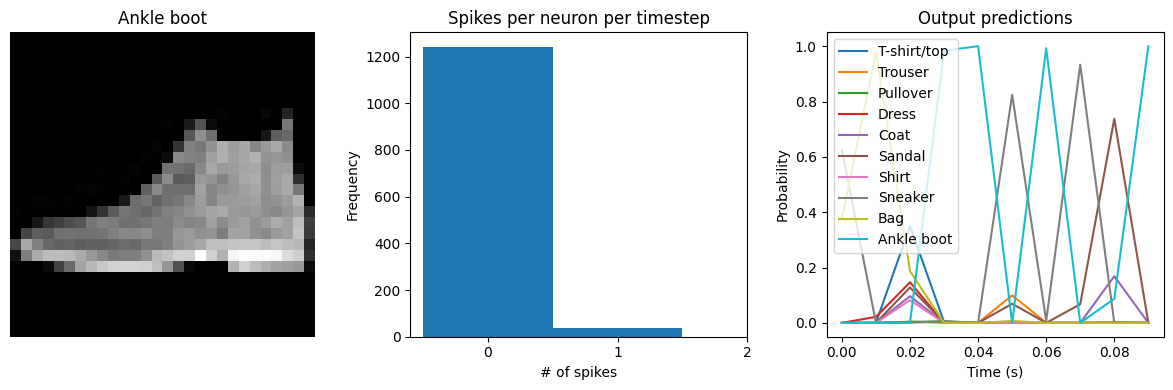

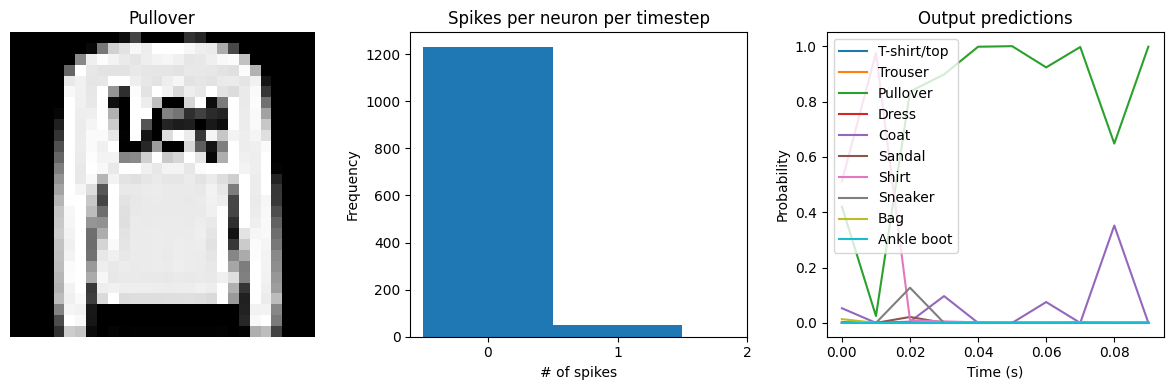

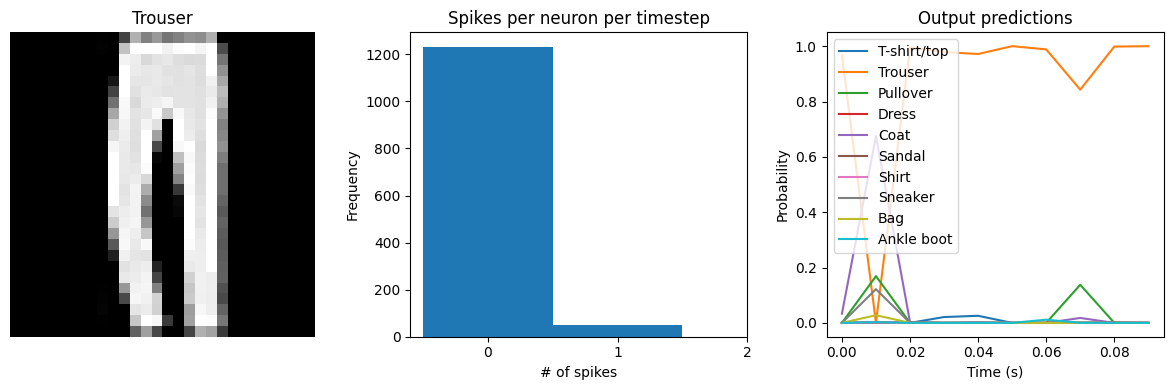

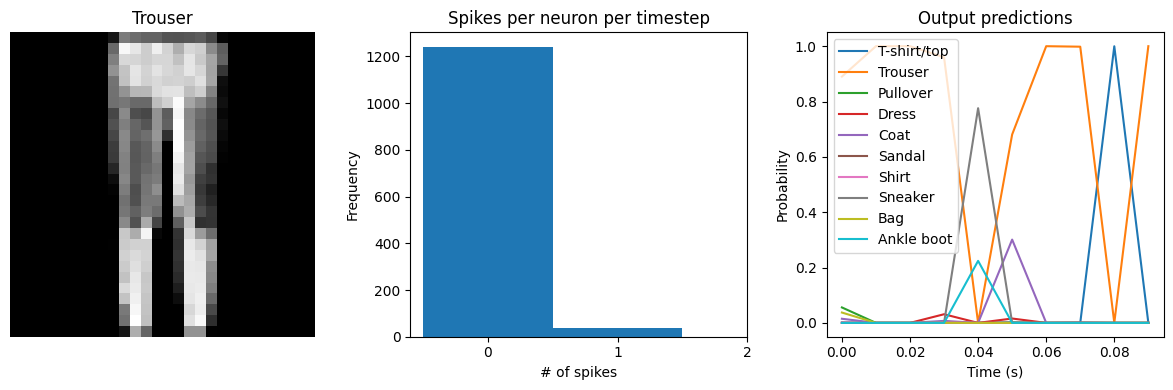

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 21:41 - loss: 17.5075 - accuracy: 0.1250

  11/1875 [..............................] - ETA: 9s - loss: 21.0674 - accuracy: 0.1818   

  24/1875 [..............................] - ETA: 8s - loss: 25.6036 - accuracy: 0.1888

  37/1875 [..............................] - ETA: 8s - loss: 29.7775 - accuracy: 0.2061

  50/1875 [..............................] - ETA: 7s - loss: 33.6677 - accuracy: 0.2512

  63/1875 [>.............................] - ETA: 7s - loss: 37.3404 - accuracy: 0.2812

  76/1875 [>.............................] - ETA: 7s - loss: 40.7602 - accuracy: 0.3039

  89/1875 [>.............................] - ETA: 7s - loss: 44.0146 - accuracy: 0.3297

 102/1875 [>.............................] - ETA: 7s - loss: 46.8429 - accuracy: 0.3505

 114/1875 [>.............................] - ETA: 7s - loss: 49.3476 - accuracy: 0.3657

 125/1875 [=>............................] - ETA: 7s - loss: 51.3440 - accuracy: 0.3780

 137/1875 [=>............................] - ETA: 7s - loss: 53.3616 - accuracy: 0.3901

 148/1875 [=>............................] - ETA: 7s - loss: 54.8804 - accuracy: 0.3978

 161/1875 [=>............................] - ETA: 7s - loss: 56.6967 - accuracy: 0.4080

 174/1875 [=>............................] - ETA: 7s - loss: 58.5305 - accuracy: 0.4156

 187/1875 [=>............................] - ETA: 7s - loss: 60.0301 - accuracy: 0.4210

 199/1875 [==>...........................] - ETA: 7s - loss: 61.3328 - accuracy: 0.4287

 212/1875 [==>...........................] - ETA: 6s - loss: 62.5830 - accuracy: 0.4356

 225/1875 [==>...........................] - ETA: 6s - loss: 63.6116 - accuracy: 0.4426

 238/1875 [==>...........................] - ETA: 6s - loss: 64.6297 - accuracy: 0.4487

 249/1875 [==>...........................] - ETA: 6s - loss: 65.3898 - accuracy: 0.4531

 261/1875 [===>..........................] - ETA: 6s - loss: 66.3454 - accuracy: 0.4585

 274/1875 [===>..........................] - ETA: 6s - loss: 67.1132 - accuracy: 0.4628

 286/1875 [===>..........................] - ETA: 6s - loss: 67.6642 - accuracy: 0.4689

 296/1875 [===>..........................] - ETA: 6s - loss: 68.2595 - accuracy: 0.4738

 308/1875 [===>..........................] - ETA: 6s - loss: 68.9868 - accuracy: 0.4785

 320/1875 [====>.........................] - ETA: 6s - loss: 69.6217 - accuracy: 0.4831

 332/1875 [====>.........................] - ETA: 6s - loss: 70.1834 - accuracy: 0.4866

 344/1875 [====>.........................] - ETA: 6s - loss: 70.7570 - accuracy: 0.4890

 355/1875 [====>.........................] - ETA: 6s - loss: 71.2063 - accuracy: 0.4923

 367/1875 [====>.........................] - ETA: 6s - loss: 71.6566 - accuracy: 0.4968

 379/1875 [=====>........................] - ETA: 6s - loss: 72.1135 - accuracy: 0.4993

 391/1875 [=====>........................] - ETA: 6s - loss: 72.4226 - accuracy: 0.5019

 404/1875 [=====>........................] - ETA: 6s - loss: 72.8185 - accuracy: 0.5060

 416/1875 [=====>........................] - ETA: 6s - loss: 73.2423 - accuracy: 0.5090

 428/1875 [=====>........................] - ETA: 6s - loss: 73.6495 - accuracy: 0.5123

 441/1875 [======>.......................] - ETA: 6s - loss: 73.9786 - accuracy: 0.5157

 453/1875 [======>.......................] - ETA: 6s - loss: 74.3497 - accuracy: 0.5171

 465/1875 [======>.......................] - ETA: 6s - loss: 74.6562 - accuracy: 0.5200

 478/1875 [======>.......................] - ETA: 5s - loss: 74.9913 - accuracy: 0.5224

 490/1875 [======>.......................] - ETA: 5s - loss: 75.3114 - accuracy: 0.5243

 502/1875 [=======>......................] - ETA: 5s - loss: 75.5604 - accuracy: 0.5269

 514/1875 [=======>......................] - ETA: 5s - loss: 75.8448 - accuracy: 0.5285

 527/1875 [=======>......................] - ETA: 5s - loss: 76.1298 - accuracy: 0.5310

 539/1875 [=======>......................] - ETA: 5s - loss: 76.3801 - accuracy: 0.5336

 550/1875 [=======>......................] - ETA: 5s - loss: 76.6164 - accuracy: 0.5356

 562/1875 [=======>......................] - ETA: 5s - loss: 76.8677 - accuracy: 0.5377

 575/1875 [========>.....................] - ETA: 5s - loss: 77.1290 - accuracy: 0.5399

 587/1875 [========>.....................] - ETA: 5s - loss: 77.3650 - accuracy: 0.5420

 599/1875 [========>.....................] - ETA: 5s - loss: 77.5710 - accuracy: 0.5437

 612/1875 [========>.....................] - ETA: 5s - loss: 77.8449 - accuracy: 0.5454

 624/1875 [========>.....................] - ETA: 5s - loss: 78.0818 - accuracy: 0.5475

 636/1875 [=========>....................] - ETA: 5s - loss: 78.2420 - accuracy: 0.5488

 647/1875 [=========>....................] - ETA: 5s - loss: 78.3998 - accuracy: 0.5500

 660/1875 [=========>....................] - ETA: 5s - loss: 78.6476 - accuracy: 0.5524

 671/1875 [=========>....................] - ETA: 5s - loss: 78.8262 - accuracy: 0.5537

 683/1875 [=========>....................] - ETA: 5s - loss: 79.0054 - accuracy: 0.5549

 696/1875 [==========>...................] - ETA: 5s - loss: 79.2238 - accuracy: 0.5563

 709/1875 [==========>...................] - ETA: 4s - loss: 79.3835 - accuracy: 0.5576

 721/1875 [==========>...................] - ETA: 4s - loss: 79.5432 - accuracy: 0.5584

 733/1875 [==========>...................] - ETA: 4s - loss: 79.6314 - accuracy: 0.5594

 744/1875 [==========>...................] - ETA: 4s - loss: 79.7639 - accuracy: 0.5603

 756/1875 [===========>..................] - ETA: 4s - loss: 79.8969 - accuracy: 0.5616

 768/1875 [===========>..................] - ETA: 4s - loss: 80.0333 - accuracy: 0.5627

 780/1875 [===========>..................] - ETA: 4s - loss: 80.1338 - accuracy: 0.5643

 793/1875 [===========>..................] - ETA: 4s - loss: 80.2859 - accuracy: 0.5657

 804/1875 [===========>..................] - ETA: 4s - loss: 80.4389 - accuracy: 0.5676

 810/1875 [===========>..................] - ETA: 4s - loss: 80.5222 - accuracy: 0.5682

 822/1875 [============>.................] - ETA: 4s - loss: 80.6282 - accuracy: 0.5687

 834/1875 [============>.................] - ETA: 4s - loss: 80.7597 - accuracy: 0.5696

 846/1875 [============>.................] - ETA: 4s - loss: 80.8567 - accuracy: 0.5701

 858/1875 [============>.................] - ETA: 4s - loss: 80.9952 - accuracy: 0.5711

 870/1875 [============>.................] - ETA: 4s - loss: 81.1223 - accuracy: 0.5719

 881/1875 [=============>................] - ETA: 4s - loss: 81.2229 - accuracy: 0.5734

 893/1875 [=============>................] - ETA: 4s - loss: 81.3489 - accuracy: 0.5748

 905/1875 [=============>................] - ETA: 4s - loss: 81.4596 - accuracy: 0.5751

 917/1875 [=============>................] - ETA: 4s - loss: 81.5593 - accuracy: 0.5758

 929/1875 [=============>................] - ETA: 4s - loss: 81.6389 - accuracy: 0.5768

 942/1875 [==============>...............] - ETA: 4s - loss: 81.7685 - accuracy: 0.5782

 955/1875 [==============>...............] - ETA: 3s - loss: 81.8795 - accuracy: 0.5792

 968/1875 [==============>...............] - ETA: 3s - loss: 81.9767 - accuracy: 0.5808

 980/1875 [==============>...............] - ETA: 3s - loss: 82.0751 - accuracy: 0.5819

 992/1875 [==============>...............] - ETA: 3s - loss: 82.1900 - accuracy: 0.5832

1005/1875 [===============>..............] - ETA: 3s - loss: 82.2630 - accuracy: 0.5840

1017/1875 [===============>..............] - ETA: 3s - loss: 82.3418 - accuracy: 0.5857

1030/1875 [===============>..............] - ETA: 3s - loss: 82.4599 - accuracy: 0.5866

1042/1875 [===============>..............] - ETA: 3s - loss: 82.5269 - accuracy: 0.5876

1053/1875 [===============>..............] - ETA: 3s - loss: 82.5870 - accuracy: 0.5884

1064/1875 [================>.............] - ETA: 3s - loss: 82.6568 - accuracy: 0.5888

1076/1875 [================>.............] - ETA: 3s - loss: 82.7361 - accuracy: 0.5897

1088/1875 [================>.............] - ETA: 3s - loss: 82.8171 - accuracy: 0.5904

1100/1875 [================>.............] - ETA: 3s - loss: 82.9009 - accuracy: 0.5909

1112/1875 [================>.............] - ETA: 3s - loss: 82.9681 - accuracy: 0.5923

1124/1875 [================>.............] - ETA: 3s - loss: 83.0462 - accuracy: 0.5926

1137/1875 [=================>............] - ETA: 3s - loss: 83.1039 - accuracy: 0.5934

1150/1875 [=================>............] - ETA: 3s - loss: 83.1853 - accuracy: 0.5939

1163/1875 [=================>............] - ETA: 3s - loss: 83.2491 - accuracy: 0.5950

1173/1875 [=================>............] - ETA: 3s - loss: 83.3082 - accuracy: 0.5952

1186/1875 [=================>............] - ETA: 2s - loss: 83.3770 - accuracy: 0.5963

1199/1875 [==================>...........] - ETA: 2s - loss: 83.4530 - accuracy: 0.5970

1211/1875 [==================>...........] - ETA: 2s - loss: 83.4922 - accuracy: 0.5974

1223/1875 [==================>...........] - ETA: 2s - loss: 83.5528 - accuracy: 0.5986

1236/1875 [==================>...........] - ETA: 2s - loss: 83.6274 - accuracy: 0.5997

1248/1875 [==================>...........] - ETA: 2s - loss: 83.6855 - accuracy: 0.6004

1261/1875 [===================>..........] - ETA: 2s - loss: 83.7233 - accuracy: 0.6011

1274/1875 [===================>..........] - ETA: 2s - loss: 83.7969 - accuracy: 0.6022

1286/1875 [===================>..........] - ETA: 2s - loss: 83.8545 - accuracy: 0.6030

1294/1875 [===================>..........] - ETA: 2s - loss: 83.9011 - accuracy: 0.6035

1306/1875 [===================>..........] - ETA: 2s - loss: 83.9386 - accuracy: 0.6038

1318/1875 [====================>.........] - ETA: 2s - loss: 83.9934 - accuracy: 0.6044

1330/1875 [====================>.........] - ETA: 2s - loss: 84.0309 - accuracy: 0.6056

1342/1875 [====================>.........] - ETA: 2s - loss: 84.1210 - accuracy: 0.6060

1354/1875 [====================>.........] - ETA: 2s - loss: 84.1743 - accuracy: 0.6065

1366/1875 [====================>.........] - ETA: 2s - loss: 84.2248 - accuracy: 0.6072

1379/1875 [=====================>........] - ETA: 2s - loss: 84.2856 - accuracy: 0.6078

1391/1875 [=====================>........] - ETA: 2s - loss: 84.3409 - accuracy: 0.6083

1404/1875 [=====================>........] - ETA: 2s - loss: 84.3985 - accuracy: 0.6087

1416/1875 [=====================>........] - ETA: 1s - loss: 84.4522 - accuracy: 0.6094

1427/1875 [=====================>........] - ETA: 1s - loss: 84.4861 - accuracy: 0.6097

1437/1875 [=====================>........] - ETA: 1s - loss: 84.5210 - accuracy: 0.6103

1449/1875 [======================>.......] - ETA: 1s - loss: 84.5699 - accuracy: 0.6111

1461/1875 [======================>.......] - ETA: 1s - loss: 84.6086 - accuracy: 0.6114

1473/1875 [======================>.......] - ETA: 1s - loss: 84.6392 - accuracy: 0.6119

1486/1875 [======================>.......] - ETA: 1s - loss: 84.7046 - accuracy: 0.6124

1498/1875 [======================>.......] - ETA: 1s - loss: 84.7450 - accuracy: 0.6131

1510/1875 [=======================>......] - ETA: 1s - loss: 84.8025 - accuracy: 0.6139

1523/1875 [=======================>......] - ETA: 1s - loss: 84.8454 - accuracy: 0.6147

1536/1875 [=======================>......] - ETA: 1s - loss: 84.9084 - accuracy: 0.6152

1548/1875 [=======================>......] - ETA: 1s - loss: 84.9375 - accuracy: 0.6158

1561/1875 [=======================>......] - ETA: 1s - loss: 84.9978 - accuracy: 0.6164

1572/1875 [========================>.....] - ETA: 1s - loss: 85.0392 - accuracy: 0.6167

1585/1875 [========================>.....] - ETA: 1s - loss: 85.0718 - accuracy: 0.6170

1598/1875 [========================>.....] - ETA: 1s - loss: 85.0945 - accuracy: 0.6177

1611/1875 [========================>.....] - ETA: 1s - loss: 85.1250 - accuracy: 0.6182

1624/1875 [========================>.....] - ETA: 1s - loss: 85.1642 - accuracy: 0.6187

1637/1875 [=========================>....] - ETA: 1s - loss: 85.1948 - accuracy: 0.6189

1650/1875 [=========================>....] - ETA: 0s - loss: 85.2427 - accuracy: 0.6196

1663/1875 [=========================>....] - ETA: 0s - loss: 85.3051 - accuracy: 0.6200

1675/1875 [=========================>....] - ETA: 0s - loss: 85.3528 - accuracy: 0.6203

1687/1875 [=========================>....] - ETA: 0s - loss: 85.3989 - accuracy: 0.6208

1700/1875 [==========================>...] - ETA: 0s - loss: 85.4392 - accuracy: 0.6211

1713/1875 [==========================>...] - ETA: 0s - loss: 85.4712 - accuracy: 0.6218

1725/1875 [==========================>...] - ETA: 0s - loss: 85.5026 - accuracy: 0.6222

1738/1875 [==========================>...] - ETA: 0s - loss: 85.5465 - accuracy: 0.6222

1751/1875 [===========================>..] - ETA: 0s - loss: 85.5824 - accuracy: 0.6225

1763/1875 [===========================>..] - ETA: 0s - loss: 85.6081 - accuracy: 0.6227

1776/1875 [===========================>..] - ETA: 0s - loss: 85.6473 - accuracy: 0.6231

1788/1875 [===========================>..] - ETA: 0s - loss: 85.6834 - accuracy: 0.6236

1800/1875 [===========================>..] - ETA: 0s - loss: 85.7165 - accuracy: 0.6238

1811/1875 [===========================>..] - ETA: 0s - loss: 85.7497 - accuracy: 0.6241

1823/1875 [============================>.] - ETA: 0s - loss: 85.7831 - accuracy: 0.6243

1836/1875 [============================>.] - ETA: 0s - loss: 85.8124 - accuracy: 0.6250

1848/1875 [============================>.] - ETA: 0s - loss: 85.8382 - accuracy: 0.6255

1861/1875 [============================>.] - ETA: 0s - loss: 85.8698 - accuracy: 0.6257

1874/1875 [============================>.] - ETA: 0s - loss: 85.8944 - accuracy: 0.6262

1875/1875 [==============================] - 9s 4ms/step - loss: 85.8976 - accuracy: 0.6263


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 85.7314 - accuracy: 0.7812

  14/1875 [..............................] - ETA: 7s - loss: 91.7253 - accuracy: 0.6719

  26/1875 [..............................] - ETA: 7s - loss: 90.7968 - accuracy: 0.6743

  38/1875 [..............................] - ETA: 7s - loss: 90.4351 - accuracy: 0.6735

  49/1875 [..............................] - ETA: 7s - loss: 90.2757 - accuracy: 0.6767

  61/1875 [..............................] - ETA: 7s - loss: 90.5726 - accuracy: 0.6803

  73/1875 [>.............................] - ETA: 7s - loss: 90.8441 - accuracy: 0.6845

  86/1875 [>.............................] - ETA: 7s - loss: 90.5618 - accuracy: 0.6853

  99/1875 [>.............................] - ETA: 7s - loss: 90.6206 - accuracy: 0.6862

 111/1875 [>.............................] - ETA: 7s - loss: 90.7653 - accuracy: 0.6869

 124/1875 [>.............................] - ETA: 7s - loss: 90.6358 - accuracy: 0.6865

 136/1875 [=>............................] - ETA: 7s - loss: 90.6120 - accuracy: 0.6838

 149/1875 [=>............................] - ETA: 7s - loss: 90.6865 - accuracy: 0.6856

 162/1875 [=>............................] - ETA: 7s - loss: 90.7154 - accuracy: 0.6840

 174/1875 [=>............................] - ETA: 7s - loss: 90.5109 - accuracy: 0.6823

 186/1875 [=>............................] - ETA: 7s - loss: 90.5179 - accuracy: 0.6803

 198/1875 [==>...........................] - ETA: 7s - loss: 90.7177 - accuracy: 0.6791

 209/1875 [==>...........................] - ETA: 7s - loss: 90.7281 - accuracy: 0.6797

 222/1875 [==>...........................] - ETA: 7s - loss: 90.7181 - accuracy: 0.6814

 234/1875 [==>...........................] - ETA: 7s - loss: 90.5796 - accuracy: 0.6838

 245/1875 [==>...........................] - ETA: 6s - loss: 90.5925 - accuracy: 0.6839

 258/1875 [===>..........................] - ETA: 6s - loss: 90.6557 - accuracy: 0.6847

 271/1875 [===>..........................] - ETA: 6s - loss: 90.6328 - accuracy: 0.6847

 283/1875 [===>..........................] - ETA: 6s - loss: 90.6354 - accuracy: 0.6830

 295/1875 [===>..........................] - ETA: 6s - loss: 90.6591 - accuracy: 0.6822

 307/1875 [===>..........................] - ETA: 6s - loss: 90.6760 - accuracy: 0.6813

 320/1875 [====>.........................] - ETA: 6s - loss: 90.7180 - accuracy: 0.6825

 332/1875 [====>.........................] - ETA: 6s - loss: 90.6851 - accuracy: 0.6829

 345/1875 [====>.........................] - ETA: 6s - loss: 90.6560 - accuracy: 0.6847

 356/1875 [====>.........................] - ETA: 6s - loss: 90.6187 - accuracy: 0.6843

 368/1875 [====>.........................] - ETA: 6s - loss: 90.6688 - accuracy: 0.6842

 381/1875 [=====>........................] - ETA: 6s - loss: 90.6748 - accuracy: 0.6854

 393/1875 [=====>........................] - ETA: 6s - loss: 90.6150 - accuracy: 0.6864

 406/1875 [=====>........................] - ETA: 6s - loss: 90.6609 - accuracy: 0.6864

 419/1875 [=====>........................] - ETA: 6s - loss: 90.6412 - accuracy: 0.6864

 432/1875 [=====>........................] - ETA: 6s - loss: 90.6336 - accuracy: 0.6855

 445/1875 [======>.......................] - ETA: 6s - loss: 90.6493 - accuracy: 0.6864

 457/1875 [======>.......................] - ETA: 6s - loss: 90.6458 - accuracy: 0.6878

 469/1875 [======>.......................] - ETA: 5s - loss: 90.6672 - accuracy: 0.6882

 482/1875 [======>.......................] - ETA: 5s - loss: 90.6723 - accuracy: 0.6889

 494/1875 [======>.......................] - ETA: 5s - loss: 90.6743 - accuracy: 0.6886

 507/1875 [=======>......................] - ETA: 5s - loss: 90.6845 - accuracy: 0.6884

 520/1875 [=======>......................] - ETA: 5s - loss: 90.7234 - accuracy: 0.6897

 533/1875 [=======>......................] - ETA: 5s - loss: 90.7009 - accuracy: 0.6890

 545/1875 [=======>......................] - ETA: 5s - loss: 90.6995 - accuracy: 0.6894

 558/1875 [=======>......................] - ETA: 5s - loss: 90.6993 - accuracy: 0.6895

 570/1875 [========>.....................] - ETA: 5s - loss: 90.7627 - accuracy: 0.6899

 583/1875 [========>.....................] - ETA: 5s - loss: 90.8075 - accuracy: 0.6910

 596/1875 [========>.....................] - ETA: 5s - loss: 90.7869 - accuracy: 0.6918

 608/1875 [========>.....................] - ETA: 5s - loss: 90.7781 - accuracy: 0.6917

 620/1875 [========>.....................] - ETA: 5s - loss: 90.7296 - accuracy: 0.6915

 633/1875 [=========>....................] - ETA: 5s - loss: 90.7225 - accuracy: 0.6915

 646/1875 [=========>....................] - ETA: 5s - loss: 90.7453 - accuracy: 0.6919

 658/1875 [=========>....................] - ETA: 5s - loss: 90.7164 - accuracy: 0.6920

 670/1875 [=========>....................] - ETA: 5s - loss: 90.7316 - accuracy: 0.6923

 682/1875 [=========>....................] - ETA: 5s - loss: 90.7568 - accuracy: 0.6927

 695/1875 [==========>...................] - ETA: 4s - loss: 90.7712 - accuracy: 0.6933

 708/1875 [==========>...................] - ETA: 4s - loss: 90.7600 - accuracy: 0.6936

 720/1875 [==========>...................] - ETA: 4s - loss: 90.7897 - accuracy: 0.6938

 732/1875 [==========>...................] - ETA: 4s - loss: 90.7560 - accuracy: 0.6937

 745/1875 [==========>...................] - ETA: 4s - loss: 90.7744 - accuracy: 0.6935

 757/1875 [===========>..................] - ETA: 4s - loss: 90.7914 - accuracy: 0.6937

 770/1875 [===========>..................] - ETA: 4s - loss: 90.7828 - accuracy: 0.6942

 783/1875 [===========>..................] - ETA: 4s - loss: 90.7937 - accuracy: 0.6943

 796/1875 [===========>..................] - ETA: 4s - loss: 90.7774 - accuracy: 0.6937

 808/1875 [===========>..................] - ETA: 4s - loss: 90.8194 - accuracy: 0.6930

 820/1875 [============>.................] - ETA: 4s - loss: 90.8174 - accuracy: 0.6932

 832/1875 [============>.................] - ETA: 4s - loss: 90.8055 - accuracy: 0.6932

 845/1875 [============>.................] - ETA: 4s - loss: 90.8009 - accuracy: 0.6931

 858/1875 [============>.................] - ETA: 4s - loss: 90.8320 - accuracy: 0.6928

 871/1875 [============>.................] - ETA: 4s - loss: 90.8531 - accuracy: 0.6930

 884/1875 [=============>................] - ETA: 4s - loss: 90.8441 - accuracy: 0.6928

 897/1875 [=============>................] - ETA: 4s - loss: 90.8486 - accuracy: 0.6927

 910/1875 [=============>................] - ETA: 4s - loss: 90.8572 - accuracy: 0.6929

 923/1875 [=============>................] - ETA: 4s - loss: 90.8592 - accuracy: 0.6931

 936/1875 [=============>................] - ETA: 3s - loss: 90.8570 - accuracy: 0.6935

 949/1875 [==============>...............] - ETA: 3s - loss: 90.8853 - accuracy: 0.6936

 962/1875 [==============>...............] - ETA: 3s - loss: 90.8932 - accuracy: 0.6938

 975/1875 [==============>...............] - ETA: 3s - loss: 90.8861 - accuracy: 0.6935

 988/1875 [==============>...............] - ETA: 3s - loss: 90.8581 - accuracy: 0.6934

1000/1875 [===============>..............] - ETA: 3s - loss: 90.8720 - accuracy: 0.6937

1012/1875 [===============>..............] - ETA: 3s - loss: 90.8848 - accuracy: 0.6938

1024/1875 [===============>..............] - ETA: 3s - loss: 90.8877 - accuracy: 0.6943

1037/1875 [===============>..............] - ETA: 3s - loss: 90.8821 - accuracy: 0.6943

1050/1875 [===============>..............] - ETA: 3s - loss: 90.9152 - accuracy: 0.6943

1063/1875 [================>.............] - ETA: 3s - loss: 90.9219 - accuracy: 0.6945

1076/1875 [================>.............] - ETA: 3s - loss: 90.9244 - accuracy: 0.6944

1088/1875 [================>.............] - ETA: 3s - loss: 90.9165 - accuracy: 0.6943

1101/1875 [================>.............] - ETA: 3s - loss: 90.8909 - accuracy: 0.6945

1114/1875 [================>.............] - ETA: 3s - loss: 90.9063 - accuracy: 0.6946

1126/1875 [=================>............] - ETA: 3s - loss: 90.8917 - accuracy: 0.6947

1139/1875 [=================>............] - ETA: 3s - loss: 90.9009 - accuracy: 0.6941

1152/1875 [=================>............] - ETA: 3s - loss: 90.9234 - accuracy: 0.6944

1165/1875 [=================>............] - ETA: 2s - loss: 90.9254 - accuracy: 0.6940

1178/1875 [=================>............] - ETA: 2s - loss: 90.9270 - accuracy: 0.6940

1191/1875 [==================>...........] - ETA: 2s - loss: 90.9280 - accuracy: 0.6942

1204/1875 [==================>...........] - ETA: 2s - loss: 90.9314 - accuracy: 0.6944

1217/1875 [==================>...........] - ETA: 2s - loss: 90.9460 - accuracy: 0.6949

1230/1875 [==================>...........] - ETA: 2s - loss: 90.9506 - accuracy: 0.6959

1243/1875 [==================>...........] - ETA: 2s - loss: 90.9540 - accuracy: 0.6957

1253/1875 [===================>..........] - ETA: 2s - loss: 90.9481 - accuracy: 0.6957

1264/1875 [===================>..........] - ETA: 2s - loss: 90.9647 - accuracy: 0.6960

1277/1875 [===================>..........] - ETA: 2s - loss: 90.9646 - accuracy: 0.6960

1290/1875 [===================>..........] - ETA: 2s - loss: 90.9789 - accuracy: 0.6962

1303/1875 [===================>..........] - ETA: 2s - loss: 90.9941 - accuracy: 0.6960

1315/1875 [====================>.........] - ETA: 2s - loss: 90.9970 - accuracy: 0.6957

1327/1875 [====================>.........] - ETA: 2s - loss: 90.9983 - accuracy: 0.6956

1339/1875 [====================>.........] - ETA: 2s - loss: 91.0103 - accuracy: 0.6956

1351/1875 [====================>.........] - ETA: 2s - loss: 91.0076 - accuracy: 0.6952

1364/1875 [====================>.........] - ETA: 2s - loss: 91.0282 - accuracy: 0.6949

1377/1875 [=====================>........] - ETA: 2s - loss: 91.0346 - accuracy: 0.6948

1389/1875 [=====================>........] - ETA: 2s - loss: 91.0405 - accuracy: 0.6947

1401/1875 [=====================>........] - ETA: 1s - loss: 91.0492 - accuracy: 0.6944

1413/1875 [=====================>........] - ETA: 1s - loss: 91.0569 - accuracy: 0.6948

1425/1875 [=====================>........] - ETA: 1s - loss: 91.0752 - accuracy: 0.6952

1437/1875 [=====================>........] - ETA: 1s - loss: 91.0859 - accuracy: 0.6957

1450/1875 [======================>.......] - ETA: 1s - loss: 91.0750 - accuracy: 0.6958

1463/1875 [======================>.......] - ETA: 1s - loss: 91.0870 - accuracy: 0.6958

1474/1875 [======================>.......] - ETA: 1s - loss: 91.1051 - accuracy: 0.6956

1486/1875 [======================>.......] - ETA: 1s - loss: 91.1172 - accuracy: 0.6958

1497/1875 [======================>.......] - ETA: 1s - loss: 91.1307 - accuracy: 0.6959

1509/1875 [=======================>......] - ETA: 1s - loss: 91.1381 - accuracy: 0.6963

1522/1875 [=======================>......] - ETA: 1s - loss: 91.1432 - accuracy: 0.6963

1533/1875 [=======================>......] - ETA: 1s - loss: 91.1456 - accuracy: 0.6965

1544/1875 [=======================>......] - ETA: 1s - loss: 91.1530 - accuracy: 0.6964

1556/1875 [=======================>......] - ETA: 1s - loss: 91.1664 - accuracy: 0.6966

1569/1875 [========================>.....] - ETA: 1s - loss: 91.1749 - accuracy: 0.6968

1579/1875 [========================>.....] - ETA: 1s - loss: 91.1719 - accuracy: 0.6967

1591/1875 [========================>.....] - ETA: 1s - loss: 91.1803 - accuracy: 0.6968

1603/1875 [========================>.....] - ETA: 1s - loss: 91.1870 - accuracy: 0.6971

1615/1875 [========================>.....] - ETA: 1s - loss: 91.1927 - accuracy: 0.6973

1628/1875 [=========================>....] - ETA: 1s - loss: 91.1975 - accuracy: 0.6976

1641/1875 [=========================>....] - ETA: 0s - loss: 91.2157 - accuracy: 0.6977

1653/1875 [=========================>....] - ETA: 0s - loss: 91.2242 - accuracy: 0.6978

1665/1875 [=========================>....] - ETA: 0s - loss: 91.2207 - accuracy: 0.6980

1677/1875 [=========================>....] - ETA: 0s - loss: 91.2434 - accuracy: 0.6980

1689/1875 [==========================>...] - ETA: 0s - loss: 91.2452 - accuracy: 0.6981

1701/1875 [==========================>...] - ETA: 0s - loss: 91.2521 - accuracy: 0.6982

1713/1875 [==========================>...] - ETA: 0s - loss: 91.2603 - accuracy: 0.6983

1725/1875 [==========================>...] - ETA: 0s - loss: 91.2671 - accuracy: 0.6985

1738/1875 [==========================>...] - ETA: 0s - loss: 91.2830 - accuracy: 0.6984

1751/1875 [===========================>..] - ETA: 0s - loss: 91.2836 - accuracy: 0.6983

1761/1875 [===========================>..] - ETA: 0s - loss: 91.2918 - accuracy: 0.6980

1773/1875 [===========================>..] - ETA: 0s - loss: 91.2963 - accuracy: 0.6981

1785/1875 [===========================>..] - ETA: 0s - loss: 91.2979 - accuracy: 0.6982

1797/1875 [===========================>..] - ETA: 0s - loss: 91.3076 - accuracy: 0.6983

1810/1875 [===========================>..] - ETA: 0s - loss: 91.3101 - accuracy: 0.6983

1822/1875 [============================>.] - ETA: 0s - loss: 91.3193 - accuracy: 0.6984

1835/1875 [============================>.] - ETA: 0s - loss: 91.3376 - accuracy: 0.6984

1848/1875 [============================>.] - ETA: 0s - loss: 91.3421 - accuracy: 0.6985

1861/1875 [============================>.] - ETA: 0s - loss: 91.3443 - accuracy: 0.6985

1874/1875 [============================>.] - ETA: 0s - loss: 91.3361 - accuracy: 0.6985

1875/1875 [==============================] - 8s 4ms/step - loss: 91.3334 - accuracy: 0.6986


Epoch 3/10


   1/1875 [..............................] - ETA: 8s - loss: 94.7654 - accuracy: 0.8438

  14/1875 [..............................] - ETA: 7s - loss: 92.5010 - accuracy: 0.7344

  27/1875 [..............................] - ETA: 7s - loss: 92.3171 - accuracy: 0.7315

  40/1875 [..............................] - ETA: 7s - loss: 91.9798 - accuracy: 0.7203

  53/1875 [..............................] - ETA: 7s - loss: 91.8631 - accuracy: 0.7264

  65/1875 [>.............................] - ETA: 7s - loss: 92.2276 - accuracy: 0.7101

  78/1875 [>.............................] - ETA: 7s - loss: 92.2575 - accuracy: 0.7055

  90/1875 [>.............................] - ETA: 7s - loss: 92.1809 - accuracy: 0.7059

 102/1875 [>.............................] - ETA: 7s - loss: 92.1814 - accuracy: 0.7120

 115/1875 [>.............................] - ETA: 7s - loss: 92.2119 - accuracy: 0.7128

 127/1875 [=>............................] - ETA: 7s - loss: 92.1811 - accuracy: 0.7131

 134/1875 [=>............................] - ETA: 7s - loss: 92.1339 - accuracy: 0.7132

 146/1875 [=>............................] - ETA: 7s - loss: 92.2270 - accuracy: 0.7147

 159/1875 [=>............................] - ETA: 7s - loss: 92.1585 - accuracy: 0.7148

 172/1875 [=>............................] - ETA: 7s - loss: 92.1465 - accuracy: 0.7124

 184/1875 [=>............................] - ETA: 7s - loss: 92.0817 - accuracy: 0.7082

 196/1875 [==>...........................] - ETA: 7s - loss: 92.2438 - accuracy: 0.7085

 208/1875 [==>...........................] - ETA: 7s - loss: 92.2413 - accuracy: 0.7084

 221/1875 [==>...........................] - ETA: 7s - loss: 92.3383 - accuracy: 0.7091

 234/1875 [==>...........................] - ETA: 7s - loss: 92.2158 - accuracy: 0.7106

 247/1875 [==>...........................] - ETA: 6s - loss: 92.2136 - accuracy: 0.7090

 259/1875 [===>..........................] - ETA: 6s - loss: 92.1907 - accuracy: 0.7068

 272/1875 [===>..........................] - ETA: 6s - loss: 92.2625 - accuracy: 0.7068

 285/1875 [===>..........................] - ETA: 6s - loss: 92.2591 - accuracy: 0.7080

 298/1875 [===>..........................] - ETA: 6s - loss: 92.2694 - accuracy: 0.7089

 311/1875 [===>..........................] - ETA: 6s - loss: 92.3184 - accuracy: 0.7081

 323/1875 [====>.........................] - ETA: 6s - loss: 92.3972 - accuracy: 0.7068

 336/1875 [====>.........................] - ETA: 6s - loss: 92.3204 - accuracy: 0.7077

 349/1875 [====>.........................] - ETA: 6s - loss: 92.2824 - accuracy: 0.7068

 361/1875 [====>.........................] - ETA: 6s - loss: 92.3122 - accuracy: 0.7070

 373/1875 [====>.........................] - ETA: 6s - loss: 92.3134 - accuracy: 0.7058

 385/1875 [=====>........................] - ETA: 6s - loss: 92.3014 - accuracy: 0.7071

 398/1875 [=====>........................] - ETA: 6s - loss: 92.3490 - accuracy: 0.7075

 411/1875 [=====>........................] - ETA: 6s - loss: 92.3710 - accuracy: 0.7070

 422/1875 [=====>........................] - ETA: 6s - loss: 92.3926 - accuracy: 0.7066

 434/1875 [=====>........................] - ETA: 6s - loss: 92.3830 - accuracy: 0.7059

 447/1875 [======>.......................] - ETA: 6s - loss: 92.3509 - accuracy: 0.7071

 460/1875 [======>.......................] - ETA: 6s - loss: 92.3544 - accuracy: 0.7068

 473/1875 [======>.......................] - ETA: 5s - loss: 92.3293 - accuracy: 0.7074

 484/1875 [======>.......................] - ETA: 5s - loss: 92.3643 - accuracy: 0.7071

 496/1875 [======>.......................] - ETA: 5s - loss: 92.3613 - accuracy: 0.7075

 509/1875 [=======>......................] - ETA: 5s - loss: 92.3744 - accuracy: 0.7070

 522/1875 [=======>......................] - ETA: 5s - loss: 92.3385 - accuracy: 0.7063

 535/1875 [=======>......................] - ETA: 5s - loss: 92.3335 - accuracy: 0.7064

 548/1875 [=======>......................] - ETA: 5s - loss: 92.3367 - accuracy: 0.7063

 560/1875 [=======>......................] - ETA: 5s - loss: 92.3202 - accuracy: 0.7063

 573/1875 [========>.....................] - ETA: 5s - loss: 92.3592 - accuracy: 0.7059

 585/1875 [========>.....................] - ETA: 5s - loss: 92.3512 - accuracy: 0.7059

 598/1875 [========>.....................] - ETA: 5s - loss: 92.3836 - accuracy: 0.7064

 611/1875 [========>.....................] - ETA: 5s - loss: 92.3662 - accuracy: 0.7067

 624/1875 [========>.....................] - ETA: 5s - loss: 92.3847 - accuracy: 0.7066

 636/1875 [=========>....................] - ETA: 5s - loss: 92.3515 - accuracy: 0.7064

 649/1875 [=========>....................] - ETA: 5s - loss: 92.3384 - accuracy: 0.7061

 662/1875 [=========>....................] - ETA: 5s - loss: 92.3404 - accuracy: 0.7062

 675/1875 [=========>....................] - ETA: 5s - loss: 92.3530 - accuracy: 0.7063

 687/1875 [=========>....................] - ETA: 5s - loss: 92.3367 - accuracy: 0.7065

 700/1875 [==========>...................] - ETA: 4s - loss: 92.3233 - accuracy: 0.7066

 712/1875 [==========>...................] - ETA: 4s - loss: 92.3452 - accuracy: 0.7070

 724/1875 [==========>...................] - ETA: 4s - loss: 92.3566 - accuracy: 0.7074

 737/1875 [==========>...................] - ETA: 4s - loss: 92.3270 - accuracy: 0.7081

 750/1875 [===========>..................] - ETA: 4s - loss: 92.3411 - accuracy: 0.7087

 763/1875 [===========>..................] - ETA: 4s - loss: 92.3295 - accuracy: 0.7083

 776/1875 [===========>..................] - ETA: 4s - loss: 92.3194 - accuracy: 0.7080

 789/1875 [===========>..................] - ETA: 4s - loss: 92.3472 - accuracy: 0.7080

 802/1875 [===========>..................] - ETA: 4s - loss: 92.3687 - accuracy: 0.7079

 815/1875 [============>.................] - ETA: 4s - loss: 92.3573 - accuracy: 0.7083

 827/1875 [============>.................] - ETA: 4s - loss: 92.3581 - accuracy: 0.7082

 840/1875 [============>.................] - ETA: 4s - loss: 92.3751 - accuracy: 0.7079

 853/1875 [============>.................] - ETA: 4s - loss: 92.4032 - accuracy: 0.7083

 865/1875 [============>.................] - ETA: 4s - loss: 92.4317 - accuracy: 0.7089

 877/1875 [=============>................] - ETA: 4s - loss: 92.4353 - accuracy: 0.7090

 889/1875 [=============>................] - ETA: 4s - loss: 92.4488 - accuracy: 0.7093

 901/1875 [=============>................] - ETA: 4s - loss: 92.4805 - accuracy: 0.7095

 913/1875 [=============>................] - ETA: 4s - loss: 92.4963 - accuracy: 0.7093

 925/1875 [=============>................] - ETA: 4s - loss: 92.5082 - accuracy: 0.7093

 937/1875 [=============>................] - ETA: 3s - loss: 92.5177 - accuracy: 0.7090

 949/1875 [==============>...............] - ETA: 3s - loss: 92.5301 - accuracy: 0.7090

 962/1875 [==============>...............] - ETA: 3s - loss: 92.5344 - accuracy: 0.7094

 974/1875 [==============>...............] - ETA: 3s - loss: 92.5401 - accuracy: 0.7094

 986/1875 [==============>...............] - ETA: 3s - loss: 92.5314 - accuracy: 0.7098

 999/1875 [==============>...............] - ETA: 3s - loss: 92.5536 - accuracy: 0.7098

1011/1875 [===============>..............] - ETA: 3s - loss: 92.5709 - accuracy: 0.7100

1024/1875 [===============>..............] - ETA: 3s - loss: 92.5911 - accuracy: 0.7103

1037/1875 [===============>..............] - ETA: 3s - loss: 92.5774 - accuracy: 0.7100

1050/1875 [===============>..............] - ETA: 3s - loss: 92.5705 - accuracy: 0.7099

1062/1875 [===============>..............] - ETA: 3s - loss: 92.5718 - accuracy: 0.7100

1075/1875 [================>.............] - ETA: 3s - loss: 92.6147 - accuracy: 0.7105

1085/1875 [================>.............] - ETA: 3s - loss: 92.6085 - accuracy: 0.7108

1096/1875 [================>.............] - ETA: 3s - loss: 92.6232 - accuracy: 0.7105

1108/1875 [================>.............] - ETA: 3s - loss: 92.6269 - accuracy: 0.7109

1117/1875 [================>.............] - ETA: 3s - loss: 92.6342 - accuracy: 0.7112

1129/1875 [=================>............] - ETA: 3s - loss: 92.6324 - accuracy: 0.7114

1142/1875 [=================>............] - ETA: 3s - loss: 92.6500 - accuracy: 0.7116

1153/1875 [=================>............] - ETA: 3s - loss: 92.6422 - accuracy: 0.7117

1165/1875 [=================>............] - ETA: 3s - loss: 92.6508 - accuracy: 0.7115

1178/1875 [=================>............] - ETA: 2s - loss: 92.6522 - accuracy: 0.7115

1190/1875 [==================>...........] - ETA: 2s - loss: 92.6664 - accuracy: 0.7110

1203/1875 [==================>...........] - ETA: 2s - loss: 92.6696 - accuracy: 0.7113

1215/1875 [==================>...........] - ETA: 2s - loss: 92.6891 - accuracy: 0.7117

1228/1875 [==================>...........] - ETA: 2s - loss: 92.6883 - accuracy: 0.7114

1240/1875 [==================>...........] - ETA: 2s - loss: 92.7002 - accuracy: 0.7113

1253/1875 [===================>..........] - ETA: 2s - loss: 92.6911 - accuracy: 0.7113

1265/1875 [===================>..........] - ETA: 2s - loss: 92.6915 - accuracy: 0.7108

1277/1875 [===================>..........] - ETA: 2s - loss: 92.7016 - accuracy: 0.7108

1289/1875 [===================>..........] - ETA: 2s - loss: 92.7018 - accuracy: 0.7108

1302/1875 [===================>..........] - ETA: 2s - loss: 92.7258 - accuracy: 0.7110

1313/1875 [====================>.........] - ETA: 2s - loss: 92.7275 - accuracy: 0.7112

1325/1875 [====================>.........] - ETA: 2s - loss: 92.7203 - accuracy: 0.7115

1337/1875 [====================>.........] - ETA: 2s - loss: 92.7358 - accuracy: 0.7119

1350/1875 [====================>.........] - ETA: 2s - loss: 92.7533 - accuracy: 0.7117

1363/1875 [====================>.........] - ETA: 2s - loss: 92.7604 - accuracy: 0.7118

1376/1875 [=====================>........] - ETA: 2s - loss: 92.7723 - accuracy: 0.7118

1389/1875 [=====================>........] - ETA: 2s - loss: 92.7852 - accuracy: 0.7121

1402/1875 [=====================>........] - ETA: 2s - loss: 92.7939 - accuracy: 0.7120

1414/1875 [=====================>........] - ETA: 1s - loss: 92.7948 - accuracy: 0.7120

1427/1875 [=====================>........] - ETA: 1s - loss: 92.8065 - accuracy: 0.7120

1439/1875 [======================>.......] - ETA: 1s - loss: 92.8013 - accuracy: 0.7120

1452/1875 [======================>.......] - ETA: 1s - loss: 92.8054 - accuracy: 0.7118

1465/1875 [======================>.......] - ETA: 1s - loss: 92.8119 - accuracy: 0.7117

1478/1875 [======================>.......] - ETA: 1s - loss: 92.8122 - accuracy: 0.7118

1490/1875 [======================>.......] - ETA: 1s - loss: 92.8113 - accuracy: 0.7121

1503/1875 [=======================>......] - ETA: 1s - loss: 92.8264 - accuracy: 0.7121

1514/1875 [=======================>......] - ETA: 1s - loss: 92.8377 - accuracy: 0.7123

1527/1875 [=======================>......] - ETA: 1s - loss: 92.8438 - accuracy: 0.7128

1540/1875 [=======================>......] - ETA: 1s - loss: 92.8523 - accuracy: 0.7130

1553/1875 [=======================>......] - ETA: 1s - loss: 92.8707 - accuracy: 0.7131

1565/1875 [========================>.....] - ETA: 1s - loss: 92.8629 - accuracy: 0.7132

1577/1875 [========================>.....] - ETA: 1s - loss: 92.8618 - accuracy: 0.7130

1590/1875 [========================>.....] - ETA: 1s - loss: 92.8811 - accuracy: 0.7131

1602/1875 [========================>.....] - ETA: 1s - loss: 92.8929 - accuracy: 0.7133

1612/1875 [========================>.....] - ETA: 1s - loss: 92.8865 - accuracy: 0.7134

1625/1875 [=========================>....] - ETA: 1s - loss: 92.8954 - accuracy: 0.7138

1638/1875 [=========================>....] - ETA: 1s - loss: 92.9057 - accuracy: 0.7138

1650/1875 [=========================>....] - ETA: 0s - loss: 92.9201 - accuracy: 0.7141

1663/1875 [=========================>....] - ETA: 0s - loss: 92.9118 - accuracy: 0.7143

1674/1875 [=========================>....] - ETA: 0s - loss: 92.9166 - accuracy: 0.7145

1686/1875 [=========================>....] - ETA: 0s - loss: 92.9152 - accuracy: 0.7146

1698/1875 [==========================>...] - ETA: 0s - loss: 92.9238 - accuracy: 0.7147

1709/1875 [==========================>...] - ETA: 0s - loss: 92.9417 - accuracy: 0.7149

1721/1875 [==========================>...] - ETA: 0s - loss: 92.9443 - accuracy: 0.7151

1733/1875 [==========================>...] - ETA: 0s - loss: 92.9505 - accuracy: 0.7150

1745/1875 [==========================>...] - ETA: 0s - loss: 92.9564 - accuracy: 0.7149

1758/1875 [===========================>..] - ETA: 0s - loss: 92.9543 - accuracy: 0.7145

1771/1875 [===========================>..] - ETA: 0s - loss: 92.9671 - accuracy: 0.7145

1783/1875 [===========================>..] - ETA: 0s - loss: 92.9725 - accuracy: 0.7146

1796/1875 [===========================>..] - ETA: 0s - loss: 92.9664 - accuracy: 0.7146

1808/1875 [===========================>..] - ETA: 0s - loss: 92.9698 - accuracy: 0.7145

1820/1875 [============================>.] - ETA: 0s - loss: 92.9833 - accuracy: 0.7147

1832/1875 [============================>.] - ETA: 0s - loss: 92.9835 - accuracy: 0.7148

1845/1875 [============================>.] - ETA: 0s - loss: 92.9901 - accuracy: 0.7148

1858/1875 [============================>.] - ETA: 0s - loss: 92.9936 - accuracy: 0.7146

1870/1875 [============================>.] - ETA: 0s - loss: 93.0040 - accuracy: 0.7149

1875/1875 [==============================] - 8s 4ms/step - loss: 92.9941 - accuracy: 0.7148


Epoch 4/10


   1/1875 [..............................] - ETA: 8s - loss: 96.1418 - accuracy: 0.5938

  14/1875 [..............................] - ETA: 7s - loss: 93.0569 - accuracy: 0.7188

  26/1875 [..............................] - ETA: 7s - loss: 93.0573 - accuracy: 0.7127

  38/1875 [..............................] - ETA: 7s - loss: 92.8904 - accuracy: 0.7188

  51/1875 [..............................] - ETA: 7s - loss: 93.3595 - accuracy: 0.7077

  63/1875 [>.............................] - ETA: 7s - loss: 93.4172 - accuracy: 0.7083

  75/1875 [>.............................] - ETA: 7s - loss: 93.4541 - accuracy: 0.7088

  87/1875 [>.............................] - ETA: 7s - loss: 93.4624 - accuracy: 0.7055

  99/1875 [>.............................] - ETA: 7s - loss: 93.5220 - accuracy: 0.7071

 112/1875 [>.............................] - ETA: 7s - loss: 93.5395 - accuracy: 0.7098

 125/1875 [=>............................] - ETA: 7s - loss: 93.4401 - accuracy: 0.7132

 137/1875 [=>............................] - ETA: 7s - loss: 93.4970 - accuracy: 0.7103

 149/1875 [=>............................] - ETA: 7s - loss: 93.6034 - accuracy: 0.7072

 161/1875 [=>............................] - ETA: 7s - loss: 93.5438 - accuracy: 0.7042

 172/1875 [=>............................] - ETA: 7s - loss: 93.4715 - accuracy: 0.7029

 184/1875 [=>............................] - ETA: 7s - loss: 93.4583 - accuracy: 0.7041

 195/1875 [==>...........................] - ETA: 7s - loss: 93.4915 - accuracy: 0.7053

 207/1875 [==>...........................] - ETA: 7s - loss: 93.4900 - accuracy: 0.7052

 219/1875 [==>...........................] - ETA: 7s - loss: 93.4651 - accuracy: 0.7058

 231/1875 [==>...........................] - ETA: 6s - loss: 93.5121 - accuracy: 0.7074

 243/1875 [==>...........................] - ETA: 6s - loss: 93.4521 - accuracy: 0.7076

 256/1875 [===>..........................] - ETA: 6s - loss: 93.4833 - accuracy: 0.7100

 269/1875 [===>..........................] - ETA: 6s - loss: 93.5207 - accuracy: 0.7117

 282/1875 [===>..........................] - ETA: 6s - loss: 93.5365 - accuracy: 0.7122

 294/1875 [===>..........................] - ETA: 6s - loss: 93.5978 - accuracy: 0.7105

 307/1875 [===>..........................] - ETA: 6s - loss: 93.6027 - accuracy: 0.7120

 319/1875 [====>.........................] - ETA: 6s - loss: 93.5697 - accuracy: 0.7138

 331/1875 [====>.........................] - ETA: 6s - loss: 93.5856 - accuracy: 0.7154

 343/1875 [====>.........................] - ETA: 6s - loss: 93.5689 - accuracy: 0.7152

 355/1875 [====>.........................] - ETA: 6s - loss: 93.6362 - accuracy: 0.7160

 367/1875 [====>.........................] - ETA: 6s - loss: 93.7319 - accuracy: 0.7160

 379/1875 [=====>........................] - ETA: 6s - loss: 93.7098 - accuracy: 0.7159

 391/1875 [=====>........................] - ETA: 6s - loss: 93.6596 - accuracy: 0.7166

 402/1875 [=====>........................] - ETA: 6s - loss: 93.6487 - accuracy: 0.7156

 414/1875 [=====>........................] - ETA: 6s - loss: 93.6777 - accuracy: 0.7152

 426/1875 [=====>........................] - ETA: 6s - loss: 93.6967 - accuracy: 0.7146

 438/1875 [======>.......................] - ETA: 6s - loss: 93.7044 - accuracy: 0.7140

 451/1875 [======>.......................] - ETA: 6s - loss: 93.7486 - accuracy: 0.7142

 463/1875 [======>.......................] - ETA: 5s - loss: 93.7424 - accuracy: 0.7146

 475/1875 [======>.......................] - ETA: 5s - loss: 93.7107 - accuracy: 0.7148

 487/1875 [======>.......................] - ETA: 5s - loss: 93.6928 - accuracy: 0.7149

 499/1875 [======>.......................] - ETA: 5s - loss: 93.7209 - accuracy: 0.7144

 510/1875 [=======>......................] - ETA: 5s - loss: 93.7130 - accuracy: 0.7156

 522/1875 [=======>......................] - ETA: 5s - loss: 93.7057 - accuracy: 0.7154

 535/1875 [=======>......................] - ETA: 5s - loss: 93.7395 - accuracy: 0.7152

 548/1875 [=======>......................] - ETA: 5s - loss: 93.7399 - accuracy: 0.7141

 560/1875 [=======>......................] - ETA: 5s - loss: 93.7190 - accuracy: 0.7146

 572/1875 [========>.....................] - ETA: 5s - loss: 93.7309 - accuracy: 0.7145

 584/1875 [========>.....................] - ETA: 5s - loss: 93.7510 - accuracy: 0.7147

 597/1875 [========>.....................] - ETA: 5s - loss: 93.7535 - accuracy: 0.7149

 609/1875 [========>.....................] - ETA: 5s - loss: 93.7597 - accuracy: 0.7146

 621/1875 [========>.....................] - ETA: 5s - loss: 93.7251 - accuracy: 0.7143

 633/1875 [=========>....................] - ETA: 5s - loss: 93.7452 - accuracy: 0.7142

 644/1875 [=========>....................] - ETA: 5s - loss: 93.7637 - accuracy: 0.7143

 656/1875 [=========>....................] - ETA: 5s - loss: 93.7460 - accuracy: 0.7147

 668/1875 [=========>....................] - ETA: 5s - loss: 93.7301 - accuracy: 0.7150

 681/1875 [=========>....................] - ETA: 5s - loss: 93.7179 - accuracy: 0.7160

 693/1875 [==========>...................] - ETA: 5s - loss: 93.7411 - accuracy: 0.7172

 705/1875 [==========>...................] - ETA: 4s - loss: 93.7525 - accuracy: 0.7172

 715/1875 [==========>...................] - ETA: 4s - loss: 93.7838 - accuracy: 0.7172

 727/1875 [==========>...................] - ETA: 4s - loss: 93.7768 - accuracy: 0.7173

 739/1875 [==========>...................] - ETA: 4s - loss: 93.7772 - accuracy: 0.7173

 751/1875 [===========>..................] - ETA: 4s - loss: 93.7744 - accuracy: 0.7168

 764/1875 [===========>..................] - ETA: 4s - loss: 93.7790 - accuracy: 0.7169

 776/1875 [===========>..................] - ETA: 4s - loss: 93.7819 - accuracy: 0.7170

 789/1875 [===========>..................] - ETA: 4s - loss: 93.8273 - accuracy: 0.7170

 800/1875 [===========>..................] - ETA: 4s - loss: 93.8174 - accuracy: 0.7166

 812/1875 [===========>..................] - ETA: 4s - loss: 93.8060 - accuracy: 0.7166

 824/1875 [============>.................] - ETA: 4s - loss: 93.7825 - accuracy: 0.7165

 836/1875 [============>.................] - ETA: 4s - loss: 93.8097 - accuracy: 0.7170

 849/1875 [============>.................] - ETA: 4s - loss: 93.8111 - accuracy: 0.7176

 861/1875 [============>.................] - ETA: 4s - loss: 93.8259 - accuracy: 0.7179

 874/1875 [============>.................] - ETA: 4s - loss: 93.8114 - accuracy: 0.7179

 887/1875 [=============>................] - ETA: 4s - loss: 93.8048 - accuracy: 0.7180

 899/1875 [=============>................] - ETA: 4s - loss: 93.8270 - accuracy: 0.7180

 907/1875 [=============>................] - ETA: 4s - loss: 93.8376 - accuracy: 0.7182

 916/1875 [=============>................] - ETA: 4s - loss: 93.8252 - accuracy: 0.7181

 928/1875 [=============>................] - ETA: 4s - loss: 93.8192 - accuracy: 0.7185

 940/1875 [==============>...............] - ETA: 4s - loss: 93.8247 - accuracy: 0.7187

 952/1875 [==============>...............] - ETA: 3s - loss: 93.8194 - accuracy: 0.7188

 964/1875 [==============>...............] - ETA: 3s - loss: 93.8223 - accuracy: 0.7185

 977/1875 [==============>...............] - ETA: 3s - loss: 93.8448 - accuracy: 0.7188

 989/1875 [==============>...............] - ETA: 3s - loss: 93.8412 - accuracy: 0.7190

1002/1875 [===============>..............] - ETA: 3s - loss: 93.8509 - accuracy: 0.7187

1015/1875 [===============>..............] - ETA: 3s - loss: 93.8431 - accuracy: 0.7193

1027/1875 [===============>..............] - ETA: 3s - loss: 93.8444 - accuracy: 0.7194

1039/1875 [===============>..............] - ETA: 3s - loss: 93.8406 - accuracy: 0.7194

1052/1875 [===============>..............] - ETA: 3s - loss: 93.8556 - accuracy: 0.7194

1064/1875 [================>.............] - ETA: 3s - loss: 93.8600 - accuracy: 0.7198

1076/1875 [================>.............] - ETA: 3s - loss: 93.8520 - accuracy: 0.7203

1088/1875 [================>.............] - ETA: 3s - loss: 93.8584 - accuracy: 0.7208

1100/1875 [================>.............] - ETA: 3s - loss: 93.8661 - accuracy: 0.7205

1112/1875 [================>.............] - ETA: 3s - loss: 93.8623 - accuracy: 0.7205

1124/1875 [================>.............] - ETA: 3s - loss: 93.8696 - accuracy: 0.7204

1136/1875 [=================>............] - ETA: 3s - loss: 93.8639 - accuracy: 0.7202

1149/1875 [=================>............] - ETA: 3s - loss: 93.8667 - accuracy: 0.7205

1161/1875 [=================>............] - ETA: 3s - loss: 93.8741 - accuracy: 0.7208

1174/1875 [=================>............] - ETA: 3s - loss: 93.8842 - accuracy: 0.7205

1187/1875 [=================>............] - ETA: 2s - loss: 93.8925 - accuracy: 0.7209

1199/1875 [==================>...........] - ETA: 2s - loss: 93.8881 - accuracy: 0.7213

1210/1875 [==================>...........] - ETA: 2s - loss: 93.8783 - accuracy: 0.7214

1223/1875 [==================>...........] - ETA: 2s - loss: 93.8696 - accuracy: 0.7217

1236/1875 [==================>...........] - ETA: 2s - loss: 93.8762 - accuracy: 0.7217

1249/1875 [==================>...........] - ETA: 2s - loss: 93.8751 - accuracy: 0.7217

1261/1875 [===================>..........] - ETA: 2s - loss: 93.8725 - accuracy: 0.7221

1274/1875 [===================>..........] - ETA: 2s - loss: 93.8801 - accuracy: 0.7227

1287/1875 [===================>..........] - ETA: 2s - loss: 93.8761 - accuracy: 0.7230

1299/1875 [===================>..........] - ETA: 2s - loss: 93.8975 - accuracy: 0.7231

1311/1875 [===================>..........] - ETA: 2s - loss: 93.8932 - accuracy: 0.7234

1324/1875 [====================>.........] - ETA: 2s - loss: 93.8842 - accuracy: 0.7237

1337/1875 [====================>.........] - ETA: 2s - loss: 93.8828 - accuracy: 0.7237

1349/1875 [====================>.........] - ETA: 2s - loss: 93.8965 - accuracy: 0.7233

1362/1875 [====================>.........] - ETA: 2s - loss: 93.9009 - accuracy: 0.7229

1375/1875 [=====================>........] - ETA: 2s - loss: 93.8942 - accuracy: 0.7232

1387/1875 [=====================>........] - ETA: 2s - loss: 93.8947 - accuracy: 0.7233

1399/1875 [=====================>........] - ETA: 2s - loss: 93.9095 - accuracy: 0.7235

1411/1875 [=====================>........] - ETA: 1s - loss: 93.9119 - accuracy: 0.7238

1423/1875 [=====================>........] - ETA: 1s - loss: 93.9201 - accuracy: 0.7242

1435/1875 [=====================>........] - ETA: 1s - loss: 93.9231 - accuracy: 0.7240

1447/1875 [======================>.......] - ETA: 1s - loss: 93.9406 - accuracy: 0.7240

1460/1875 [======================>.......] - ETA: 1s - loss: 93.9386 - accuracy: 0.7243

1472/1875 [======================>.......] - ETA: 1s - loss: 93.9330 - accuracy: 0.7244

1485/1875 [======================>.......] - ETA: 1s - loss: 93.9347 - accuracy: 0.7247

1498/1875 [======================>.......] - ETA: 1s - loss: 93.9328 - accuracy: 0.7248

1510/1875 [=======================>......] - ETA: 1s - loss: 93.9482 - accuracy: 0.7249

1522/1875 [=======================>......] - ETA: 1s - loss: 93.9566 - accuracy: 0.7250

1534/1875 [=======================>......] - ETA: 1s - loss: 93.9503 - accuracy: 0.7247

1546/1875 [=======================>......] - ETA: 1s - loss: 93.9618 - accuracy: 0.7246

1559/1875 [=======================>......] - ETA: 1s - loss: 93.9501 - accuracy: 0.7247

1570/1875 [========================>.....] - ETA: 1s - loss: 93.9473 - accuracy: 0.7246

1582/1875 [========================>.....] - ETA: 1s - loss: 93.9553 - accuracy: 0.7245

1594/1875 [========================>.....] - ETA: 1s - loss: 93.9607 - accuracy: 0.7246

1606/1875 [========================>.....] - ETA: 1s - loss: 93.9581 - accuracy: 0.7244

1618/1875 [========================>.....] - ETA: 1s - loss: 93.9604 - accuracy: 0.7245

1630/1875 [=========================>....] - ETA: 1s - loss: 93.9704 - accuracy: 0.7246

1643/1875 [=========================>....] - ETA: 0s - loss: 93.9704 - accuracy: 0.7247

1654/1875 [=========================>....] - ETA: 0s - loss: 93.9586 - accuracy: 0.7247

1666/1875 [=========================>....] - ETA: 0s - loss: 93.9519 - accuracy: 0.7247

1677/1875 [=========================>....] - ETA: 0s - loss: 93.9640 - accuracy: 0.7246

1688/1875 [==========================>...] - ETA: 0s - loss: 93.9582 - accuracy: 0.7244

1700/1875 [==========================>...] - ETA: 0s - loss: 93.9458 - accuracy: 0.7239

1712/1875 [==========================>...] - ETA: 0s - loss: 93.9494 - accuracy: 0.7239

1724/1875 [==========================>...] - ETA: 0s - loss: 93.9477 - accuracy: 0.7239

1736/1875 [==========================>...] - ETA: 0s - loss: 93.9496 - accuracy: 0.7237

1748/1875 [==========================>...] - ETA: 0s - loss: 93.9562 - accuracy: 0.7235

1761/1875 [===========================>..] - ETA: 0s - loss: 93.9476 - accuracy: 0.7234

1773/1875 [===========================>..] - ETA: 0s - loss: 93.9544 - accuracy: 0.7232

1786/1875 [===========================>..] - ETA: 0s - loss: 93.9451 - accuracy: 0.7234

1799/1875 [===========================>..] - ETA: 0s - loss: 93.9467 - accuracy: 0.7234

1810/1875 [===========================>..] - ETA: 0s - loss: 93.9472 - accuracy: 0.7234

1822/1875 [============================>.] - ETA: 0s - loss: 93.9485 - accuracy: 0.7234

1834/1875 [============================>.] - ETA: 0s - loss: 93.9497 - accuracy: 0.7237

1847/1875 [============================>.] - ETA: 0s - loss: 93.9526 - accuracy: 0.7239

1859/1875 [============================>.] - ETA: 0s - loss: 93.9486 - accuracy: 0.7240

1871/1875 [============================>.] - ETA: 0s - loss: 93.9518 - accuracy: 0.7243

1875/1875 [==============================] - 8s 4ms/step - loss: 93.9557 - accuracy: 0.7243


Epoch 5/10


   1/1875 [..............................] - ETA: 8s - loss: 100.8240 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 94.3919 - accuracy: 0.7109 

  25/1875 [..............................] - ETA: 8s - loss: 93.0556 - accuracy: 0.6975

  36/1875 [..............................] - ETA: 8s - loss: 93.5870 - accuracy: 0.6997

  48/1875 [..............................] - ETA: 8s - loss: 93.8189 - accuracy: 0.7012

  61/1875 [..............................] - ETA: 7s - loss: 94.1855 - accuracy: 0.7111

  73/1875 [>.............................] - ETA: 7s - loss: 94.1696 - accuracy: 0.7115

  85/1875 [>.............................] - ETA: 7s - loss: 94.1021 - accuracy: 0.7206

  97/1875 [>.............................] - ETA: 7s - loss: 94.0178 - accuracy: 0.7223

 110/1875 [>.............................] - ETA: 7s - loss: 94.1882 - accuracy: 0.7236

 122/1875 [>.............................] - ETA: 7s - loss: 94.4226 - accuracy: 0.7267

 135/1875 [=>............................] - ETA: 7s - loss: 94.2656 - accuracy: 0.7257

 148/1875 [=>............................] - ETA: 7s - loss: 94.3147 - accuracy: 0.7278

 161/1875 [=>............................] - ETA: 7s - loss: 94.3663 - accuracy: 0.7277

 174/1875 [=>............................] - ETA: 7s - loss: 94.3737 - accuracy: 0.7276

 187/1875 [=>............................] - ETA: 7s - loss: 94.2142 - accuracy: 0.7293

 200/1875 [==>...........................] - ETA: 7s - loss: 94.3462 - accuracy: 0.7300

 211/1875 [==>...........................] - ETA: 7s - loss: 94.3500 - accuracy: 0.7315

 223/1875 [==>...........................] - ETA: 7s - loss: 94.3192 - accuracy: 0.7304

 236/1875 [==>...........................] - ETA: 6s - loss: 94.3578 - accuracy: 0.7283

 248/1875 [==>...........................] - ETA: 6s - loss: 94.3262 - accuracy: 0.7268

 261/1875 [===>..........................] - ETA: 6s - loss: 94.2432 - accuracy: 0.7257

 268/1875 [===>..........................] - ETA: 6s - loss: 94.2357 - accuracy: 0.7245

 280/1875 [===>..........................] - ETA: 6s - loss: 94.2598 - accuracy: 0.7230

 293/1875 [===>..........................] - ETA: 6s - loss: 94.2757 - accuracy: 0.7259

 306/1875 [===>..........................] - ETA: 6s - loss: 94.3153 - accuracy: 0.7242

 319/1875 [====>.........................] - ETA: 6s - loss: 94.3327 - accuracy: 0.7237

 331/1875 [====>.........................] - ETA: 6s - loss: 94.3436 - accuracy: 0.7237

 344/1875 [====>.........................] - ETA: 6s - loss: 94.3834 - accuracy: 0.7245

 356/1875 [====>.........................] - ETA: 6s - loss: 94.3286 - accuracy: 0.7248

 369/1875 [====>.........................] - ETA: 6s - loss: 94.3570 - accuracy: 0.7250

 382/1875 [=====>........................] - ETA: 6s - loss: 94.3105 - accuracy: 0.7255

 394/1875 [=====>........................] - ETA: 6s - loss: 94.2742 - accuracy: 0.7252

 407/1875 [=====>........................] - ETA: 6s - loss: 94.3085 - accuracy: 0.7261

 419/1875 [=====>........................] - ETA: 6s - loss: 94.3003 - accuracy: 0.7255

 432/1875 [=====>........................] - ETA: 6s - loss: 94.2430 - accuracy: 0.7251

 445/1875 [======>.......................] - ETA: 6s - loss: 94.2606 - accuracy: 0.7252

 457/1875 [======>.......................] - ETA: 6s - loss: 94.2555 - accuracy: 0.7263

 470/1875 [======>.......................] - ETA: 5s - loss: 94.2637 - accuracy: 0.7263

 482/1875 [======>.......................] - ETA: 5s - loss: 94.2433 - accuracy: 0.7274

 495/1875 [======>.......................] - ETA: 5s - loss: 94.2325 - accuracy: 0.7269

 507/1875 [=======>......................] - ETA: 5s - loss: 94.2519 - accuracy: 0.7278

 519/1875 [=======>......................] - ETA: 5s - loss: 94.2485 - accuracy: 0.7272

 532/1875 [=======>......................] - ETA: 5s - loss: 94.2636 - accuracy: 0.7272

 544/1875 [=======>......................] - ETA: 5s - loss: 94.2505 - accuracy: 0.7268

 556/1875 [=======>......................] - ETA: 5s - loss: 94.2699 - accuracy: 0.7270

 568/1875 [========>.....................] - ETA: 5s - loss: 94.3355 - accuracy: 0.7269

 581/1875 [========>.....................] - ETA: 5s - loss: 94.3295 - accuracy: 0.7271

 593/1875 [========>.....................] - ETA: 5s - loss: 94.3243 - accuracy: 0.7274

 604/1875 [========>.....................] - ETA: 5s - loss: 94.3235 - accuracy: 0.7273

 616/1875 [========>.....................] - ETA: 5s - loss: 94.3167 - accuracy: 0.7279

 628/1875 [=========>....................] - ETA: 5s - loss: 94.3002 - accuracy: 0.7274

 641/1875 [=========>....................] - ETA: 5s - loss: 94.2908 - accuracy: 0.7278

 653/1875 [=========>....................] - ETA: 5s - loss: 94.3012 - accuracy: 0.7275

 666/1875 [=========>....................] - ETA: 5s - loss: 94.3151 - accuracy: 0.7280

 679/1875 [=========>....................] - ETA: 5s - loss: 94.3099 - accuracy: 0.7281

 692/1875 [==========>...................] - ETA: 5s - loss: 94.3150 - accuracy: 0.7290

 704/1875 [==========>...................] - ETA: 4s - loss: 94.3092 - accuracy: 0.7290

 717/1875 [==========>...................] - ETA: 4s - loss: 94.3008 - accuracy: 0.7290

 728/1875 [==========>...................] - ETA: 4s - loss: 94.3321 - accuracy: 0.7292

 740/1875 [==========>...................] - ETA: 4s - loss: 94.3300 - accuracy: 0.7297

 752/1875 [===========>..................] - ETA: 4s - loss: 94.3409 - accuracy: 0.7299

 765/1875 [===========>..................] - ETA: 4s - loss: 94.3239 - accuracy: 0.7298

 778/1875 [===========>..................] - ETA: 4s - loss: 94.2879 - accuracy: 0.7291

 790/1875 [===========>..................] - ETA: 4s - loss: 94.2948 - accuracy: 0.7294

 803/1875 [===========>..................] - ETA: 4s - loss: 94.3231 - accuracy: 0.7298

 815/1875 [============>.................] - ETA: 4s - loss: 94.3519 - accuracy: 0.7298

 827/1875 [============>.................] - ETA: 4s - loss: 94.3557 - accuracy: 0.7299

 840/1875 [============>.................] - ETA: 4s - loss: 94.3554 - accuracy: 0.7297

 853/1875 [============>.................] - ETA: 4s - loss: 94.3579 - accuracy: 0.7300

 866/1875 [============>.................] - ETA: 4s - loss: 94.3608 - accuracy: 0.7308

 878/1875 [=============>................] - ETA: 4s - loss: 94.3652 - accuracy: 0.7310

 890/1875 [=============>................] - ETA: 4s - loss: 94.3747 - accuracy: 0.7312

 903/1875 [=============>................] - ETA: 4s - loss: 94.3788 - accuracy: 0.7311

 915/1875 [=============>................] - ETA: 4s - loss: 94.3870 - accuracy: 0.7310

 927/1875 [=============>................] - ETA: 4s - loss: 94.3894 - accuracy: 0.7314

 938/1875 [==============>...............] - ETA: 3s - loss: 94.3944 - accuracy: 0.7315

 950/1875 [==============>...............] - ETA: 3s - loss: 94.4044 - accuracy: 0.7313

 962/1875 [==============>...............] - ETA: 3s - loss: 94.4161 - accuracy: 0.7315

 974/1875 [==============>...............] - ETA: 3s - loss: 94.4126 - accuracy: 0.7319

 986/1875 [==============>...............] - ETA: 3s - loss: 94.4199 - accuracy: 0.7319

 999/1875 [==============>...............] - ETA: 3s - loss: 94.4099 - accuracy: 0.7322

1012/1875 [===============>..............] - ETA: 3s - loss: 94.4055 - accuracy: 0.7326

1025/1875 [===============>..............] - ETA: 3s - loss: 94.4043 - accuracy: 0.7329

1037/1875 [===============>..............] - ETA: 3s - loss: 94.4156 - accuracy: 0.7327

1050/1875 [===============>..............] - ETA: 3s - loss: 94.4279 - accuracy: 0.7328

1062/1875 [===============>..............] - ETA: 3s - loss: 94.4301 - accuracy: 0.7325

1075/1875 [================>.............] - ETA: 3s - loss: 94.4359 - accuracy: 0.7330

1087/1875 [================>.............] - ETA: 3s - loss: 94.4301 - accuracy: 0.7331

1099/1875 [================>.............] - ETA: 3s - loss: 94.4162 - accuracy: 0.7331

1111/1875 [================>.............] - ETA: 3s - loss: 94.4138 - accuracy: 0.7330

1123/1875 [================>.............] - ETA: 3s - loss: 94.4232 - accuracy: 0.7328

1136/1875 [=================>............] - ETA: 3s - loss: 94.4302 - accuracy: 0.7328

1149/1875 [=================>............] - ETA: 3s - loss: 94.4400 - accuracy: 0.7327

1162/1875 [=================>............] - ETA: 3s - loss: 94.4315 - accuracy: 0.7331

1175/1875 [=================>............] - ETA: 2s - loss: 94.4157 - accuracy: 0.7331

1187/1875 [=================>............] - ETA: 2s - loss: 94.4458 - accuracy: 0.7337

1199/1875 [==================>...........] - ETA: 2s - loss: 94.4499 - accuracy: 0.7336

1210/1875 [==================>...........] - ETA: 2s - loss: 94.4341 - accuracy: 0.7331

1222/1875 [==================>...........] - ETA: 2s - loss: 94.4446 - accuracy: 0.7332

1235/1875 [==================>...........] - ETA: 2s - loss: 94.4525 - accuracy: 0.7329

1248/1875 [==================>...........] - ETA: 2s - loss: 94.4438 - accuracy: 0.7328

1261/1875 [===================>..........] - ETA: 2s - loss: 94.4402 - accuracy: 0.7328

1273/1875 [===================>..........] - ETA: 2s - loss: 94.4512 - accuracy: 0.7326

1286/1875 [===================>..........] - ETA: 2s - loss: 94.4539 - accuracy: 0.7326

1299/1875 [===================>..........] - ETA: 2s - loss: 94.4475 - accuracy: 0.7324

1312/1875 [===================>..........] - ETA: 2s - loss: 94.4510 - accuracy: 0.7332

1325/1875 [====================>.........] - ETA: 2s - loss: 94.4552 - accuracy: 0.7332

1337/1875 [====================>.........] - ETA: 2s - loss: 94.4660 - accuracy: 0.7334

1349/1875 [====================>.........] - ETA: 2s - loss: 94.4704 - accuracy: 0.7335

1361/1875 [====================>.........] - ETA: 2s - loss: 94.4761 - accuracy: 0.7332

1373/1875 [====================>.........] - ETA: 2s - loss: 94.4756 - accuracy: 0.7332

1385/1875 [=====================>........] - ETA: 2s - loss: 94.4768 - accuracy: 0.7331

1397/1875 [=====================>........] - ETA: 2s - loss: 94.4783 - accuracy: 0.7333

1410/1875 [=====================>........] - ETA: 1s - loss: 94.4751 - accuracy: 0.7340

1422/1875 [=====================>........] - ETA: 1s - loss: 94.4742 - accuracy: 0.7343

1434/1875 [=====================>........] - ETA: 1s - loss: 94.4847 - accuracy: 0.7345

1447/1875 [======================>.......] - ETA: 1s - loss: 94.4827 - accuracy: 0.7343

1460/1875 [======================>.......] - ETA: 1s - loss: 94.4894 - accuracy: 0.7341

1472/1875 [======================>.......] - ETA: 1s - loss: 94.4898 - accuracy: 0.7341

1484/1875 [======================>.......] - ETA: 1s - loss: 94.4961 - accuracy: 0.7339

1497/1875 [======================>.......] - ETA: 1s - loss: 94.5071 - accuracy: 0.7339

1510/1875 [=======================>......] - ETA: 1s - loss: 94.5003 - accuracy: 0.7339

1522/1875 [=======================>......] - ETA: 1s - loss: 94.4985 - accuracy: 0.7339

1535/1875 [=======================>......] - ETA: 1s - loss: 94.4948 - accuracy: 0.7338

1548/1875 [=======================>......] - ETA: 1s - loss: 94.4862 - accuracy: 0.7339

1561/1875 [=======================>......] - ETA: 1s - loss: 94.5000 - accuracy: 0.7337

1574/1875 [========================>.....] - ETA: 1s - loss: 94.5018 - accuracy: 0.7338

1586/1875 [========================>.....] - ETA: 1s - loss: 94.5087 - accuracy: 0.7338

1599/1875 [========================>.....] - ETA: 1s - loss: 94.4984 - accuracy: 0.7338

1612/1875 [========================>.....] - ETA: 1s - loss: 94.5048 - accuracy: 0.7336

1624/1875 [========================>.....] - ETA: 1s - loss: 94.4958 - accuracy: 0.7337

1636/1875 [=========================>....] - ETA: 1s - loss: 94.4893 - accuracy: 0.7338

1649/1875 [=========================>....] - ETA: 0s - loss: 94.4888 - accuracy: 0.7338

1661/1875 [=========================>....] - ETA: 0s - loss: 94.4898 - accuracy: 0.7340

1674/1875 [=========================>....] - ETA: 0s - loss: 94.5062 - accuracy: 0.7338

1687/1875 [=========================>....] - ETA: 0s - loss: 94.5037 - accuracy: 0.7335

1699/1875 [==========================>...] - ETA: 0s - loss: 94.4949 - accuracy: 0.7334

1711/1875 [==========================>...] - ETA: 0s - loss: 94.4908 - accuracy: 0.7332

1723/1875 [==========================>...] - ETA: 0s - loss: 94.4898 - accuracy: 0.7331

1734/1875 [==========================>...] - ETA: 0s - loss: 94.5033 - accuracy: 0.7333

1746/1875 [==========================>...] - ETA: 0s - loss: 94.5074 - accuracy: 0.7333

1758/1875 [===========================>..] - ETA: 0s - loss: 94.5037 - accuracy: 0.7333

1771/1875 [===========================>..] - ETA: 0s - loss: 94.5109 - accuracy: 0.7333

1783/1875 [===========================>..] - ETA: 0s - loss: 94.5044 - accuracy: 0.7335

1794/1875 [===========================>..] - ETA: 0s - loss: 94.5057 - accuracy: 0.7331

1807/1875 [===========================>..] - ETA: 0s - loss: 94.5125 - accuracy: 0.7329

1819/1875 [============================>.] - ETA: 0s - loss: 94.5048 - accuracy: 0.7330

1832/1875 [============================>.] - ETA: 0s - loss: 94.4973 - accuracy: 0.7331

1845/1875 [============================>.] - ETA: 0s - loss: 94.4973 - accuracy: 0.7332

1857/1875 [============================>.] - ETA: 0s - loss: 94.5124 - accuracy: 0.7334

1869/1875 [============================>.] - ETA: 0s - loss: 94.5039 - accuracy: 0.7338

1875/1875 [==============================] - 8s 4ms/step - loss: 94.5084 - accuracy: 0.7338


Epoch 6/10


   1/1875 [..............................] - ETA: 9s - loss: 89.0970 - accuracy: 0.7188

  12/1875 [..............................] - ETA: 8s - loss: 94.3692 - accuracy: 0.7448

  24/1875 [..............................] - ETA: 8s - loss: 94.4212 - accuracy: 0.7500

  36/1875 [..............................] - ETA: 8s - loss: 95.0016 - accuracy: 0.7448

  48/1875 [..............................] - ETA: 8s - loss: 94.9187 - accuracy: 0.7441

  59/1875 [..............................] - ETA: 8s - loss: 94.6820 - accuracy: 0.7505

  68/1875 [>.............................] - ETA: 8s - loss: 94.8949 - accuracy: 0.7518

  78/1875 [>.............................] - ETA: 8s - loss: 94.8932 - accuracy: 0.7452

  89/1875 [>.............................] - ETA: 8s - loss: 94.7123 - accuracy: 0.7451

 101/1875 [>.............................] - ETA: 8s - loss: 94.9095 - accuracy: 0.7457

 113/1875 [>.............................] - ETA: 8s - loss: 94.8786 - accuracy: 0.7464

 124/1875 [>.............................] - ETA: 8s - loss: 94.9098 - accuracy: 0.7452

 136/1875 [=>............................] - ETA: 8s - loss: 94.8093 - accuracy: 0.7429

 148/1875 [=>............................] - ETA: 7s - loss: 94.9190 - accuracy: 0.7451

 160/1875 [=>............................] - ETA: 7s - loss: 94.8132 - accuracy: 0.7434

 172/1875 [=>............................] - ETA: 7s - loss: 94.8355 - accuracy: 0.7426

 184/1875 [=>............................] - ETA: 7s - loss: 94.8719 - accuracy: 0.7415

 197/1875 [==>...........................] - ETA: 7s - loss: 94.8952 - accuracy: 0.7429

 209/1875 [==>...........................] - ETA: 7s - loss: 94.8771 - accuracy: 0.7425

 221/1875 [==>...........................] - ETA: 7s - loss: 94.8024 - accuracy: 0.7429

 234/1875 [==>...........................] - ETA: 7s - loss: 94.8836 - accuracy: 0.7413

 247/1875 [==>...........................] - ETA: 7s - loss: 94.8048 - accuracy: 0.7423

 259/1875 [===>..........................] - ETA: 7s - loss: 94.7144 - accuracy: 0.7407

 272/1875 [===>..........................] - ETA: 7s - loss: 94.7838 - accuracy: 0.7384

 285/1875 [===>..........................] - ETA: 6s - loss: 94.8191 - accuracy: 0.7377

 297/1875 [===>..........................] - ETA: 6s - loss: 94.7599 - accuracy: 0.7354

 309/1875 [===>..........................] - ETA: 6s - loss: 94.7836 - accuracy: 0.7365

 321/1875 [====>.........................] - ETA: 6s - loss: 94.7756 - accuracy: 0.7364

 333/1875 [====>.........................] - ETA: 6s - loss: 94.7585 - accuracy: 0.7354

 345/1875 [====>.........................] - ETA: 6s - loss: 94.8493 - accuracy: 0.7352

 358/1875 [====>.........................] - ETA: 6s - loss: 94.8428 - accuracy: 0.7354

 369/1875 [====>.........................] - ETA: 6s - loss: 94.7919 - accuracy: 0.7341

 381/1875 [=====>........................] - ETA: 6s - loss: 94.7810 - accuracy: 0.7333

 394/1875 [=====>........................] - ETA: 6s - loss: 94.8413 - accuracy: 0.7322

 406/1875 [=====>........................] - ETA: 6s - loss: 94.8539 - accuracy: 0.7326

 419/1875 [=====>........................] - ETA: 6s - loss: 94.8454 - accuracy: 0.7331

 431/1875 [=====>........................] - ETA: 6s - loss: 94.8289 - accuracy: 0.7335

 443/1875 [======>.......................] - ETA: 6s - loss: 94.8324 - accuracy: 0.7350

 456/1875 [======>.......................] - ETA: 6s - loss: 94.8446 - accuracy: 0.7342

 469/1875 [======>.......................] - ETA: 6s - loss: 94.8871 - accuracy: 0.7355

 480/1875 [======>.......................] - ETA: 6s - loss: 94.8845 - accuracy: 0.7356

 492/1875 [======>.......................] - ETA: 5s - loss: 94.8719 - accuracy: 0.7360

 505/1875 [=======>......................] - ETA: 5s - loss: 94.8769 - accuracy: 0.7356

 517/1875 [=======>......................] - ETA: 5s - loss: 94.8707 - accuracy: 0.7356

 530/1875 [=======>......................] - ETA: 5s - loss: 94.8610 - accuracy: 0.7355

 543/1875 [=======>......................] - ETA: 5s - loss: 94.8826 - accuracy: 0.7365

 556/1875 [=======>......................] - ETA: 5s - loss: 94.8804 - accuracy: 0.7359

 569/1875 [========>.....................] - ETA: 5s - loss: 94.8537 - accuracy: 0.7353

 582/1875 [========>.....................] - ETA: 5s - loss: 94.8694 - accuracy: 0.7351

 595/1875 [========>.....................] - ETA: 5s - loss: 94.8629 - accuracy: 0.7357

 607/1875 [========>.....................] - ETA: 5s - loss: 94.8414 - accuracy: 0.7355

 620/1875 [========>.....................] - ETA: 5s - loss: 94.8480 - accuracy: 0.7353

 632/1875 [=========>....................] - ETA: 5s - loss: 94.8386 - accuracy: 0.7359

 645/1875 [=========>....................] - ETA: 5s - loss: 94.8058 - accuracy: 0.7352

 658/1875 [=========>....................] - ETA: 5s - loss: 94.7996 - accuracy: 0.7348

 671/1875 [=========>....................] - ETA: 5s - loss: 94.7969 - accuracy: 0.7344

 683/1875 [=========>....................] - ETA: 5s - loss: 94.8064 - accuracy: 0.7344

 696/1875 [==========>...................] - ETA: 5s - loss: 94.8494 - accuracy: 0.7346

 709/1875 [==========>...................] - ETA: 4s - loss: 94.8286 - accuracy: 0.7345

 722/1875 [==========>...................] - ETA: 4s - loss: 94.8229 - accuracy: 0.7344

 734/1875 [==========>...................] - ETA: 4s - loss: 94.8284 - accuracy: 0.7342

 747/1875 [==========>...................] - ETA: 4s - loss: 94.8277 - accuracy: 0.7333

 760/1875 [===========>..................] - ETA: 4s - loss: 94.8270 - accuracy: 0.7336

 772/1875 [===========>..................] - ETA: 4s - loss: 94.8258 - accuracy: 0.7340

 785/1875 [===========>..................] - ETA: 4s - loss: 94.8310 - accuracy: 0.7340

 797/1875 [===========>..................] - ETA: 4s - loss: 94.8071 - accuracy: 0.7338

 810/1875 [===========>..................] - ETA: 4s - loss: 94.8123 - accuracy: 0.7344

 823/1875 [============>.................] - ETA: 4s - loss: 94.8107 - accuracy: 0.7350

 835/1875 [============>.................] - ETA: 4s - loss: 94.8256 - accuracy: 0.7352

 847/1875 [============>.................] - ETA: 4s - loss: 94.8276 - accuracy: 0.7360

 859/1875 [============>.................] - ETA: 4s - loss: 94.8177 - accuracy: 0.7358

 872/1875 [============>.................] - ETA: 4s - loss: 94.8261 - accuracy: 0.7362

 884/1875 [=============>................] - ETA: 4s - loss: 94.8305 - accuracy: 0.7367

 897/1875 [=============>................] - ETA: 4s - loss: 94.8358 - accuracy: 0.7368

 910/1875 [=============>................] - ETA: 4s - loss: 94.8307 - accuracy: 0.7366

 922/1875 [=============>................] - ETA: 4s - loss: 94.8391 - accuracy: 0.7368

 933/1875 [=============>................] - ETA: 4s - loss: 94.8416 - accuracy: 0.7367

 945/1875 [==============>...............] - ETA: 3s - loss: 94.8341 - accuracy: 0.7366

 958/1875 [==============>...............] - ETA: 3s - loss: 94.8278 - accuracy: 0.7368

 971/1875 [==============>...............] - ETA: 3s - loss: 94.8125 - accuracy: 0.7363

 984/1875 [==============>...............] - ETA: 3s - loss: 94.8360 - accuracy: 0.7361

 997/1875 [==============>...............] - ETA: 3s - loss: 94.8260 - accuracy: 0.7356

1009/1875 [===============>..............] - ETA: 3s - loss: 94.8333 - accuracy: 0.7357

1022/1875 [===============>..............] - ETA: 3s - loss: 94.8386 - accuracy: 0.7363

1035/1875 [===============>..............] - ETA: 3s - loss: 94.8320 - accuracy: 0.7362

1048/1875 [===============>..............] - ETA: 3s - loss: 94.8278 - accuracy: 0.7361

1060/1875 [===============>..............] - ETA: 3s - loss: 94.8154 - accuracy: 0.7359

1072/1875 [================>.............] - ETA: 3s - loss: 94.8239 - accuracy: 0.7357

1085/1875 [================>.............] - ETA: 3s - loss: 94.8302 - accuracy: 0.7362

1098/1875 [================>.............] - ETA: 3s - loss: 94.8073 - accuracy: 0.7361

1111/1875 [================>.............] - ETA: 3s - loss: 94.8186 - accuracy: 0.7362

1123/1875 [================>.............] - ETA: 3s - loss: 94.8450 - accuracy: 0.7363

1136/1875 [=================>............] - ETA: 3s - loss: 94.8359 - accuracy: 0.7364

1149/1875 [=================>............] - ETA: 3s - loss: 94.8466 - accuracy: 0.7360

1162/1875 [=================>............] - ETA: 3s - loss: 94.8388 - accuracy: 0.7360

1174/1875 [=================>............] - ETA: 2s - loss: 94.8197 - accuracy: 0.7360

1187/1875 [=================>............] - ETA: 2s - loss: 94.8396 - accuracy: 0.7358

1200/1875 [==================>...........] - ETA: 2s - loss: 94.8350 - accuracy: 0.7359

1213/1875 [==================>...........] - ETA: 2s - loss: 94.8223 - accuracy: 0.7360

1226/1875 [==================>...........] - ETA: 2s - loss: 94.8345 - accuracy: 0.7364

1239/1875 [==================>...........] - ETA: 2s - loss: 94.8196 - accuracy: 0.7363

1252/1875 [===================>..........] - ETA: 2s - loss: 94.8339 - accuracy: 0.7369

1265/1875 [===================>..........] - ETA: 2s - loss: 94.8242 - accuracy: 0.7371

1277/1875 [===================>..........] - ETA: 2s - loss: 94.8365 - accuracy: 0.7373

1288/1875 [===================>..........] - ETA: 2s - loss: 94.8523 - accuracy: 0.7373

1300/1875 [===================>..........] - ETA: 2s - loss: 94.8471 - accuracy: 0.7368

1312/1875 [===================>..........] - ETA: 2s - loss: 94.8543 - accuracy: 0.7368

1324/1875 [====================>.........] - ETA: 2s - loss: 94.8715 - accuracy: 0.7366

1336/1875 [====================>.........] - ETA: 2s - loss: 94.8650 - accuracy: 0.7366

1349/1875 [====================>.........] - ETA: 2s - loss: 94.8486 - accuracy: 0.7362

1361/1875 [====================>.........] - ETA: 2s - loss: 94.8435 - accuracy: 0.7364

1374/1875 [====================>.........] - ETA: 2s - loss: 94.8397 - accuracy: 0.7365

1387/1875 [=====================>........] - ETA: 2s - loss: 94.8615 - accuracy: 0.7366

1400/1875 [=====================>........] - ETA: 2s - loss: 94.8694 - accuracy: 0.7365

1412/1875 [=====================>........] - ETA: 1s - loss: 94.8607 - accuracy: 0.7364

1424/1875 [=====================>........] - ETA: 1s - loss: 94.8692 - accuracy: 0.7365

1437/1875 [=====================>........] - ETA: 1s - loss: 94.8658 - accuracy: 0.7366

1450/1875 [======================>.......] - ETA: 1s - loss: 94.8648 - accuracy: 0.7367

1463/1875 [======================>.......] - ETA: 1s - loss: 94.8730 - accuracy: 0.7369

1476/1875 [======================>.......] - ETA: 1s - loss: 94.8774 - accuracy: 0.7369

1487/1875 [======================>.......] - ETA: 1s - loss: 94.8778 - accuracy: 0.7372

1498/1875 [======================>.......] - ETA: 1s - loss: 94.8731 - accuracy: 0.7369

1510/1875 [=======================>......] - ETA: 1s - loss: 94.8741 - accuracy: 0.7371

1523/1875 [=======================>......] - ETA: 1s - loss: 94.8809 - accuracy: 0.7371

1535/1875 [=======================>......] - ETA: 1s - loss: 94.8803 - accuracy: 0.7372

1548/1875 [=======================>......] - ETA: 1s - loss: 94.8704 - accuracy: 0.7373

1561/1875 [=======================>......] - ETA: 1s - loss: 94.8795 - accuracy: 0.7372

1574/1875 [========================>.....] - ETA: 1s - loss: 94.8758 - accuracy: 0.7373

1587/1875 [========================>.....] - ETA: 1s - loss: 94.8888 - accuracy: 0.7372

1599/1875 [========================>.....] - ETA: 1s - loss: 94.8937 - accuracy: 0.7372

1612/1875 [========================>.....] - ETA: 1s - loss: 94.8930 - accuracy: 0.7371

1624/1875 [========================>.....] - ETA: 1s - loss: 94.8991 - accuracy: 0.7370

1636/1875 [=========================>....] - ETA: 1s - loss: 94.8899 - accuracy: 0.7369

1648/1875 [=========================>....] - ETA: 0s - loss: 94.8911 - accuracy: 0.7369

1661/1875 [=========================>....] - ETA: 0s - loss: 94.8981 - accuracy: 0.7370

1673/1875 [=========================>....] - ETA: 0s - loss: 94.9005 - accuracy: 0.7371

1686/1875 [=========================>....] - ETA: 0s - loss: 94.9024 - accuracy: 0.7372

1699/1875 [==========================>...] - ETA: 0s - loss: 94.8921 - accuracy: 0.7371

1712/1875 [==========================>...] - ETA: 0s - loss: 94.8998 - accuracy: 0.7370

1724/1875 [==========================>...] - ETA: 0s - loss: 94.9134 - accuracy: 0.7369

1737/1875 [==========================>...] - ETA: 0s - loss: 94.9164 - accuracy: 0.7370

1750/1875 [===========================>..] - ETA: 0s - loss: 94.9175 - accuracy: 0.7369

1761/1875 [===========================>..] - ETA: 0s - loss: 94.9211 - accuracy: 0.7370

1773/1875 [===========================>..] - ETA: 0s - loss: 94.9207 - accuracy: 0.7369

1785/1875 [===========================>..] - ETA: 0s - loss: 94.9214 - accuracy: 0.7370

1797/1875 [===========================>..] - ETA: 0s - loss: 94.9175 - accuracy: 0.7371

1809/1875 [===========================>..] - ETA: 0s - loss: 94.9202 - accuracy: 0.7370

1822/1875 [============================>.] - ETA: 0s - loss: 94.9190 - accuracy: 0.7371

1835/1875 [============================>.] - ETA: 0s - loss: 94.9162 - accuracy: 0.7370

1847/1875 [============================>.] - ETA: 0s - loss: 94.9176 - accuracy: 0.7369

1860/1875 [============================>.] - ETA: 0s - loss: 94.9283 - accuracy: 0.7371

1872/1875 [============================>.] - ETA: 0s - loss: 94.9333 - accuracy: 0.7372

1875/1875 [==============================] - 8s 4ms/step - loss: 94.9325 - accuracy: 0.7370


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 92.9374 - accuracy: 0.6562

  13/1875 [..............................] - ETA: 7s - loss: 95.4881 - accuracy: 0.7452

  25/1875 [..............................] - ETA: 7s - loss: 95.1660 - accuracy: 0.7575

  35/1875 [..............................] - ETA: 8s - loss: 95.2858 - accuracy: 0.7589

  48/1875 [..............................] - ETA: 8s - loss: 94.9770 - accuracy: 0.7624

  61/1875 [..............................] - ETA: 7s - loss: 94.9113 - accuracy: 0.7582

  73/1875 [>.............................] - ETA: 7s - loss: 94.7868 - accuracy: 0.7483

  86/1875 [>.............................] - ETA: 7s - loss: 94.8313 - accuracy: 0.7471

  99/1875 [>.............................] - ETA: 7s - loss: 94.9198 - accuracy: 0.7456

 112/1875 [>.............................] - ETA: 7s - loss: 94.9150 - accuracy: 0.7453

 124/1875 [>.............................] - ETA: 7s - loss: 95.0746 - accuracy: 0.7465

 136/1875 [=>............................] - ETA: 7s - loss: 95.1059 - accuracy: 0.7452

 148/1875 [=>............................] - ETA: 7s - loss: 95.0393 - accuracy: 0.7439

 161/1875 [=>............................] - ETA: 7s - loss: 95.0335 - accuracy: 0.7438

 173/1875 [=>............................] - ETA: 7s - loss: 95.1310 - accuracy: 0.7406

 185/1875 [=>............................] - ETA: 7s - loss: 95.1664 - accuracy: 0.7441

 198/1875 [==>...........................] - ETA: 7s - loss: 95.0962 - accuracy: 0.7468

 210/1875 [==>...........................] - ETA: 7s - loss: 95.1553 - accuracy: 0.7481

 223/1875 [==>...........................] - ETA: 6s - loss: 95.3140 - accuracy: 0.7479

 236/1875 [==>...........................] - ETA: 6s - loss: 95.2409 - accuracy: 0.7470

 248/1875 [==>...........................] - ETA: 6s - loss: 95.2135 - accuracy: 0.7480

 260/1875 [===>..........................] - ETA: 6s - loss: 95.1561 - accuracy: 0.7483

 273/1875 [===>..........................] - ETA: 6s - loss: 95.2238 - accuracy: 0.7462

 285/1875 [===>..........................] - ETA: 6s - loss: 95.2302 - accuracy: 0.7468

 297/1875 [===>..........................] - ETA: 6s - loss: 95.2353 - accuracy: 0.7471

 310/1875 [===>..........................] - ETA: 6s - loss: 95.2009 - accuracy: 0.7455

 323/1875 [====>.........................] - ETA: 6s - loss: 95.1630 - accuracy: 0.7460

 336/1875 [====>.........................] - ETA: 6s - loss: 95.2116 - accuracy: 0.7461

 349/1875 [====>.........................] - ETA: 6s - loss: 95.1300 - accuracy: 0.7457

 361/1875 [====>.........................] - ETA: 6s - loss: 95.1462 - accuracy: 0.7453

 373/1875 [====>.........................] - ETA: 6s - loss: 95.1375 - accuracy: 0.7461

 385/1875 [=====>........................] - ETA: 6s - loss: 95.1709 - accuracy: 0.7450

 397/1875 [=====>........................] - ETA: 6s - loss: 95.1906 - accuracy: 0.7457

 410/1875 [=====>........................] - ETA: 6s - loss: 95.1492 - accuracy: 0.7453

 422/1875 [=====>........................] - ETA: 6s - loss: 95.1398 - accuracy: 0.7462

 435/1875 [=====>........................] - ETA: 6s - loss: 95.1772 - accuracy: 0.7458

 448/1875 [======>.......................] - ETA: 6s - loss: 95.1838 - accuracy: 0.7455

 460/1875 [======>.......................] - ETA: 5s - loss: 95.1842 - accuracy: 0.7458

 472/1875 [======>.......................] - ETA: 5s - loss: 95.1892 - accuracy: 0.7442

 484/1875 [======>.......................] - ETA: 5s - loss: 95.2114 - accuracy: 0.7441

 496/1875 [======>.......................] - ETA: 5s - loss: 95.1807 - accuracy: 0.7432

 509/1875 [=======>......................] - ETA: 5s - loss: 95.1890 - accuracy: 0.7438

 522/1875 [=======>......................] - ETA: 5s - loss: 95.1867 - accuracy: 0.7438

 534/1875 [=======>......................] - ETA: 5s - loss: 95.2109 - accuracy: 0.7442

 546/1875 [=======>......................] - ETA: 5s - loss: 95.2019 - accuracy: 0.7447

 558/1875 [=======>......................] - ETA: 5s - loss: 95.2098 - accuracy: 0.7448

 569/1875 [========>.....................] - ETA: 5s - loss: 95.1922 - accuracy: 0.7448

 582/1875 [========>.....................] - ETA: 5s - loss: 95.1748 - accuracy: 0.7454

 595/1875 [========>.....................] - ETA: 5s - loss: 95.1743 - accuracy: 0.7459

 608/1875 [========>.....................] - ETA: 5s - loss: 95.2106 - accuracy: 0.7456

 620/1875 [========>.....................] - ETA: 5s - loss: 95.2209 - accuracy: 0.7458

 633/1875 [=========>....................] - ETA: 5s - loss: 95.2242 - accuracy: 0.7462

 646/1875 [=========>....................] - ETA: 5s - loss: 95.2207 - accuracy: 0.7453

 659/1875 [=========>....................] - ETA: 5s - loss: 95.2007 - accuracy: 0.7451

 671/1875 [=========>....................] - ETA: 5s - loss: 95.1953 - accuracy: 0.7451

 682/1875 [=========>....................] - ETA: 5s - loss: 95.1992 - accuracy: 0.7451

 694/1875 [==========>...................] - ETA: 4s - loss: 95.1896 - accuracy: 0.7451

 706/1875 [==========>...................] - ETA: 4s - loss: 95.1952 - accuracy: 0.7450

 718/1875 [==========>...................] - ETA: 4s - loss: 95.1833 - accuracy: 0.7447

 730/1875 [==========>...................] - ETA: 4s - loss: 95.1891 - accuracy: 0.7445

 741/1875 [==========>...................] - ETA: 4s - loss: 95.1832 - accuracy: 0.7443

 754/1875 [===========>..................] - ETA: 4s - loss: 95.1888 - accuracy: 0.7439

 764/1875 [===========>..................] - ETA: 4s - loss: 95.1921 - accuracy: 0.7440

 775/1875 [===========>..................] - ETA: 4s - loss: 95.1981 - accuracy: 0.7435

 787/1875 [===========>..................] - ETA: 4s - loss: 95.1931 - accuracy: 0.7434

 797/1875 [===========>..................] - ETA: 4s - loss: 95.1827 - accuracy: 0.7436

 809/1875 [===========>..................] - ETA: 4s - loss: 95.2088 - accuracy: 0.7440

 822/1875 [============>.................] - ETA: 4s - loss: 95.2268 - accuracy: 0.7437

 834/1875 [============>.................] - ETA: 4s - loss: 95.2224 - accuracy: 0.7436

 846/1875 [============>.................] - ETA: 4s - loss: 95.2158 - accuracy: 0.7432

 858/1875 [============>.................] - ETA: 4s - loss: 95.2166 - accuracy: 0.7433

 871/1875 [============>.................] - ETA: 4s - loss: 95.2456 - accuracy: 0.7435

 884/1875 [=============>................] - ETA: 4s - loss: 95.2249 - accuracy: 0.7440

 897/1875 [=============>................] - ETA: 4s - loss: 95.2194 - accuracy: 0.7436

 910/1875 [=============>................] - ETA: 4s - loss: 95.2353 - accuracy: 0.7435

 923/1875 [=============>................] - ETA: 4s - loss: 95.2384 - accuracy: 0.7431

 935/1875 [=============>................] - ETA: 3s - loss: 95.2384 - accuracy: 0.7431

 948/1875 [==============>...............] - ETA: 3s - loss: 95.2246 - accuracy: 0.7435

 961/1875 [==============>...............] - ETA: 3s - loss: 95.2343 - accuracy: 0.7442

 973/1875 [==============>...............] - ETA: 3s - loss: 95.2279 - accuracy: 0.7444

 985/1875 [==============>...............] - ETA: 3s - loss: 95.2366 - accuracy: 0.7446

 998/1875 [==============>...............] - ETA: 3s - loss: 95.2370 - accuracy: 0.7446

1011/1875 [===============>..............] - ETA: 3s - loss: 95.2431 - accuracy: 0.7447

1023/1875 [===============>..............] - ETA: 3s - loss: 95.2489 - accuracy: 0.7447

1035/1875 [===============>..............] - ETA: 3s - loss: 95.2432 - accuracy: 0.7448

1047/1875 [===============>..............] - ETA: 3s - loss: 95.2453 - accuracy: 0.7443

1060/1875 [===============>..............] - ETA: 3s - loss: 95.2384 - accuracy: 0.7444

1073/1875 [================>.............] - ETA: 3s - loss: 95.2395 - accuracy: 0.7446

1085/1875 [================>.............] - ETA: 3s - loss: 95.2173 - accuracy: 0.7443

1098/1875 [================>.............] - ETA: 3s - loss: 95.2092 - accuracy: 0.7442

1110/1875 [================>.............] - ETA: 3s - loss: 95.2099 - accuracy: 0.7438

1123/1875 [================>.............] - ETA: 3s - loss: 95.2138 - accuracy: 0.7433

1135/1875 [=================>............] - ETA: 3s - loss: 95.2258 - accuracy: 0.7429

1147/1875 [=================>............] - ETA: 3s - loss: 95.2234 - accuracy: 0.7434

1160/1875 [=================>............] - ETA: 3s - loss: 95.2110 - accuracy: 0.7438

1172/1875 [=================>............] - ETA: 2s - loss: 95.2028 - accuracy: 0.7435

1184/1875 [=================>............] - ETA: 2s - loss: 95.2118 - accuracy: 0.7437

1196/1875 [==================>...........] - ETA: 2s - loss: 95.2400 - accuracy: 0.7439

1208/1875 [==================>...........] - ETA: 2s - loss: 95.2474 - accuracy: 0.7436

1220/1875 [==================>...........] - ETA: 2s - loss: 95.2488 - accuracy: 0.7439

1232/1875 [==================>...........] - ETA: 2s - loss: 95.2439 - accuracy: 0.7439

1244/1875 [==================>...........] - ETA: 2s - loss: 95.2387 - accuracy: 0.7444

1256/1875 [===================>..........] - ETA: 2s - loss: 95.2337 - accuracy: 0.7444

1268/1875 [===================>..........] - ETA: 2s - loss: 95.2488 - accuracy: 0.7443

1281/1875 [===================>..........] - ETA: 2s - loss: 95.2346 - accuracy: 0.7444

1292/1875 [===================>..........] - ETA: 2s - loss: 95.2467 - accuracy: 0.7444

1305/1875 [===================>..........] - ETA: 2s - loss: 95.2458 - accuracy: 0.7441

1317/1875 [====================>.........] - ETA: 2s - loss: 95.2255 - accuracy: 0.7440

1330/1875 [====================>.........] - ETA: 2s - loss: 95.2426 - accuracy: 0.7439

1342/1875 [====================>.........] - ETA: 2s - loss: 95.2406 - accuracy: 0.7440

1354/1875 [====================>.........] - ETA: 2s - loss: 95.2324 - accuracy: 0.7437

1367/1875 [====================>.........] - ETA: 2s - loss: 95.2433 - accuracy: 0.7435

1380/1875 [=====================>........] - ETA: 2s - loss: 95.2524 - accuracy: 0.7433

1392/1875 [=====================>........] - ETA: 2s - loss: 95.2475 - accuracy: 0.7430

1405/1875 [=====================>........] - ETA: 1s - loss: 95.2490 - accuracy: 0.7429

1417/1875 [=====================>........] - ETA: 1s - loss: 95.2520 - accuracy: 0.7426

1429/1875 [=====================>........] - ETA: 1s - loss: 95.2522 - accuracy: 0.7425

1441/1875 [======================>.......] - ETA: 1s - loss: 95.2517 - accuracy: 0.7426

1453/1875 [======================>.......] - ETA: 1s - loss: 95.2592 - accuracy: 0.7427

1465/1875 [======================>.......] - ETA: 1s - loss: 95.2597 - accuracy: 0.7423

1477/1875 [======================>.......] - ETA: 1s - loss: 95.2562 - accuracy: 0.7424

1490/1875 [======================>.......] - ETA: 1s - loss: 95.2536 - accuracy: 0.7422

1502/1875 [=======================>......] - ETA: 1s - loss: 95.2681 - accuracy: 0.7421

1514/1875 [=======================>......] - ETA: 1s - loss: 95.2618 - accuracy: 0.7421

1526/1875 [=======================>......] - ETA: 1s - loss: 95.2537 - accuracy: 0.7421

1539/1875 [=======================>......] - ETA: 1s - loss: 95.2676 - accuracy: 0.7426

1551/1875 [=======================>......] - ETA: 1s - loss: 95.2730 - accuracy: 0.7429

1563/1875 [========================>.....] - ETA: 1s - loss: 95.2742 - accuracy: 0.7431

1576/1875 [========================>.....] - ETA: 1s - loss: 95.2773 - accuracy: 0.7427

1588/1875 [========================>.....] - ETA: 1s - loss: 95.2765 - accuracy: 0.7429

1601/1875 [========================>.....] - ETA: 1s - loss: 95.2709 - accuracy: 0.7423

1613/1875 [========================>.....] - ETA: 1s - loss: 95.2801 - accuracy: 0.7423

1625/1875 [=========================>....] - ETA: 1s - loss: 95.2802 - accuracy: 0.7423

1637/1875 [=========================>....] - ETA: 1s - loss: 95.2660 - accuracy: 0.7425

1650/1875 [=========================>....] - ETA: 0s - loss: 95.2766 - accuracy: 0.7424

1662/1875 [=========================>....] - ETA: 0s - loss: 95.2862 - accuracy: 0.7425

1674/1875 [=========================>....] - ETA: 0s - loss: 95.2874 - accuracy: 0.7424

1686/1875 [=========================>....] - ETA: 0s - loss: 95.2853 - accuracy: 0.7423

1698/1875 [==========================>...] - ETA: 0s - loss: 95.2846 - accuracy: 0.7425

1710/1875 [==========================>...] - ETA: 0s - loss: 95.2865 - accuracy: 0.7427

1723/1875 [==========================>...] - ETA: 0s - loss: 95.2917 - accuracy: 0.7428

1736/1875 [==========================>...] - ETA: 0s - loss: 95.2931 - accuracy: 0.7425

1748/1875 [==========================>...] - ETA: 0s - loss: 95.3012 - accuracy: 0.7424

1760/1875 [===========================>..] - ETA: 0s - loss: 95.2929 - accuracy: 0.7424

1773/1875 [===========================>..] - ETA: 0s - loss: 95.2952 - accuracy: 0.7422

1785/1875 [===========================>..] - ETA: 0s - loss: 95.2962 - accuracy: 0.7423

1797/1875 [===========================>..] - ETA: 0s - loss: 95.2935 - accuracy: 0.7421

1807/1875 [===========================>..] - ETA: 0s - loss: 95.3047 - accuracy: 0.7421

1819/1875 [============================>.] - ETA: 0s - loss: 95.2993 - accuracy: 0.7420

1830/1875 [============================>.] - ETA: 0s - loss: 95.2920 - accuracy: 0.7420

1842/1875 [============================>.] - ETA: 0s - loss: 95.2922 - accuracy: 0.7420

1855/1875 [============================>.] - ETA: 0s - loss: 95.2908 - accuracy: 0.7420

1868/1875 [============================>.] - ETA: 0s - loss: 95.2980 - accuracy: 0.7420

1875/1875 [==============================] - 8s 4ms/step - loss: 95.3056 - accuracy: 0.7419


Epoch 8/10


   1/1875 [..............................] - ETA: 9s - loss: 94.7288 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 7s - loss: 94.3070 - accuracy: 0.7596

  26/1875 [..............................] - ETA: 7s - loss: 94.6379 - accuracy: 0.7464

  38/1875 [..............................] - ETA: 7s - loss: 94.7820 - accuracy: 0.7558

  51/1875 [..............................] - ETA: 7s - loss: 95.2424 - accuracy: 0.7549

  63/1875 [>.............................] - ETA: 7s - loss: 95.1936 - accuracy: 0.7490

  75/1875 [>.............................] - ETA: 7s - loss: 95.1203 - accuracy: 0.7521

  87/1875 [>.............................] - ETA: 7s - loss: 95.4278 - accuracy: 0.7507

  99/1875 [>.............................] - ETA: 7s - loss: 95.2930 - accuracy: 0.7506

 111/1875 [>.............................] - ETA: 7s - loss: 95.2896 - accuracy: 0.7511

 123/1875 [>.............................] - ETA: 7s - loss: 95.1580 - accuracy: 0.7543

 134/1875 [=>............................] - ETA: 7s - loss: 95.2323 - accuracy: 0.7528

 144/1875 [=>............................] - ETA: 7s - loss: 95.3281 - accuracy: 0.7517

 156/1875 [=>............................] - ETA: 7s - loss: 95.2728 - accuracy: 0.7524

 168/1875 [=>............................] - ETA: 7s - loss: 95.3539 - accuracy: 0.7539

 179/1875 [=>............................] - ETA: 7s - loss: 95.4169 - accuracy: 0.7542

 191/1875 [==>...........................] - ETA: 7s - loss: 95.4047 - accuracy: 0.7541

 204/1875 [==>...........................] - ETA: 7s - loss: 95.3406 - accuracy: 0.7529

 216/1875 [==>...........................] - ETA: 7s - loss: 95.3032 - accuracy: 0.7535

 229/1875 [==>...........................] - ETA: 7s - loss: 95.4303 - accuracy: 0.7546

 241/1875 [==>...........................] - ETA: 7s - loss: 95.4590 - accuracy: 0.7522

 254/1875 [===>..........................] - ETA: 7s - loss: 95.4296 - accuracy: 0.7521

 266/1875 [===>..........................] - ETA: 7s - loss: 95.4359 - accuracy: 0.7520

 278/1875 [===>..........................] - ETA: 6s - loss: 95.3903 - accuracy: 0.7524

 290/1875 [===>..........................] - ETA: 6s - loss: 95.3803 - accuracy: 0.7518

 303/1875 [===>..........................] - ETA: 6s - loss: 95.4345 - accuracy: 0.7499

 315/1875 [====>.........................] - ETA: 6s - loss: 95.4252 - accuracy: 0.7498

 328/1875 [====>.........................] - ETA: 6s - loss: 95.4283 - accuracy: 0.7488

 340/1875 [====>.........................] - ETA: 6s - loss: 95.4403 - accuracy: 0.7478

 352/1875 [====>.........................] - ETA: 6s - loss: 95.4301 - accuracy: 0.7476

 364/1875 [====>.........................] - ETA: 6s - loss: 95.3844 - accuracy: 0.7476

 376/1875 [=====>........................] - ETA: 6s - loss: 95.3873 - accuracy: 0.7479

 388/1875 [=====>........................] - ETA: 6s - loss: 95.4068 - accuracy: 0.7486

 400/1875 [=====>........................] - ETA: 6s - loss: 95.4383 - accuracy: 0.7493

 413/1875 [=====>........................] - ETA: 6s - loss: 95.4214 - accuracy: 0.7489

 426/1875 [=====>........................] - ETA: 6s - loss: 95.3881 - accuracy: 0.7485

 439/1875 [======>.......................] - ETA: 6s - loss: 95.4013 - accuracy: 0.7489

 452/1875 [======>.......................] - ETA: 6s - loss: 95.4221 - accuracy: 0.7485

 465/1875 [======>.......................] - ETA: 6s - loss: 95.4411 - accuracy: 0.7484

 477/1875 [======>.......................] - ETA: 5s - loss: 95.4337 - accuracy: 0.7484

 488/1875 [======>.......................] - ETA: 5s - loss: 95.4531 - accuracy: 0.7483

 500/1875 [=======>......................] - ETA: 5s - loss: 95.4626 - accuracy: 0.7490

 513/1875 [=======>......................] - ETA: 5s - loss: 95.4316 - accuracy: 0.7485

 526/1875 [=======>......................] - ETA: 5s - loss: 95.4667 - accuracy: 0.7487

 539/1875 [=======>......................] - ETA: 5s - loss: 95.4472 - accuracy: 0.7489

 552/1875 [=======>......................] - ETA: 5s - loss: 95.4417 - accuracy: 0.7479

 565/1875 [========>.....................] - ETA: 5s - loss: 95.4680 - accuracy: 0.7487

 578/1875 [========>.....................] - ETA: 5s - loss: 95.4650 - accuracy: 0.7488

 591/1875 [========>.....................] - ETA: 5s - loss: 95.4850 - accuracy: 0.7493

 603/1875 [========>.....................] - ETA: 5s - loss: 95.5010 - accuracy: 0.7485

 616/1875 [========>.....................] - ETA: 5s - loss: 95.4952 - accuracy: 0.7471

 628/1875 [=========>....................] - ETA: 5s - loss: 95.4766 - accuracy: 0.7461

 641/1875 [=========>....................] - ETA: 5s - loss: 95.4751 - accuracy: 0.7454

 653/1875 [=========>....................] - ETA: 5s - loss: 95.4934 - accuracy: 0.7461

 666/1875 [=========>....................] - ETA: 5s - loss: 95.5093 - accuracy: 0.7462

 679/1875 [=========>....................] - ETA: 5s - loss: 95.4973 - accuracy: 0.7462

 692/1875 [==========>...................] - ETA: 5s - loss: 95.4971 - accuracy: 0.7461

 705/1875 [==========>...................] - ETA: 4s - loss: 95.5216 - accuracy: 0.7458

 717/1875 [==========>...................] - ETA: 4s - loss: 95.5000 - accuracy: 0.7451

 730/1875 [==========>...................] - ETA: 4s - loss: 95.5117 - accuracy: 0.7452

 743/1875 [==========>...................] - ETA: 4s - loss: 95.5031 - accuracy: 0.7449

 756/1875 [===========>..................] - ETA: 4s - loss: 95.5263 - accuracy: 0.7452

 769/1875 [===========>..................] - ETA: 4s - loss: 95.5249 - accuracy: 0.7457

 782/1875 [===========>..................] - ETA: 4s - loss: 95.5127 - accuracy: 0.7455

 795/1875 [===========>..................] - ETA: 4s - loss: 95.4966 - accuracy: 0.7458

 806/1875 [===========>..................] - ETA: 4s - loss: 95.4988 - accuracy: 0.7461

 819/1875 [============>.................] - ETA: 4s - loss: 95.5212 - accuracy: 0.7461

 832/1875 [============>.................] - ETA: 4s - loss: 95.5269 - accuracy: 0.7463

 844/1875 [============>.................] - ETA: 4s - loss: 95.5175 - accuracy: 0.7461

 857/1875 [============>.................] - ETA: 4s - loss: 95.5248 - accuracy: 0.7458

 869/1875 [============>.................] - ETA: 4s - loss: 95.5320 - accuracy: 0.7454

 881/1875 [=============>................] - ETA: 4s - loss: 95.5279 - accuracy: 0.7451

 894/1875 [=============>................] - ETA: 4s - loss: 95.5351 - accuracy: 0.7446

 907/1875 [=============>................] - ETA: 4s - loss: 95.5287 - accuracy: 0.7445

 920/1875 [=============>................] - ETA: 4s - loss: 95.5456 - accuracy: 0.7451

 933/1875 [=============>................] - ETA: 3s - loss: 95.5473 - accuracy: 0.7455

 945/1875 [==============>...............] - ETA: 3s - loss: 95.5329 - accuracy: 0.7454

 958/1875 [==============>...............] - ETA: 3s - loss: 95.5463 - accuracy: 0.7449

 971/1875 [==============>...............] - ETA: 3s - loss: 95.5487 - accuracy: 0.7447

 984/1875 [==============>...............] - ETA: 3s - loss: 95.5463 - accuracy: 0.7445

 997/1875 [==============>...............] - ETA: 3s - loss: 95.5333 - accuracy: 0.7445

1010/1875 [===============>..............] - ETA: 3s - loss: 95.5404 - accuracy: 0.7441

1023/1875 [===============>..............] - ETA: 3s - loss: 95.5434 - accuracy: 0.7442

1036/1875 [===============>..............] - ETA: 3s - loss: 95.5363 - accuracy: 0.7440

1049/1875 [===============>..............] - ETA: 3s - loss: 95.5464 - accuracy: 0.7439

1061/1875 [===============>..............] - ETA: 3s - loss: 95.5424 - accuracy: 0.7438

1073/1875 [================>.............] - ETA: 3s - loss: 95.5384 - accuracy: 0.7437

1085/1875 [================>.............] - ETA: 3s - loss: 95.5396 - accuracy: 0.7437

1097/1875 [================>.............] - ETA: 3s - loss: 95.5333 - accuracy: 0.7441

1109/1875 [================>.............] - ETA: 3s - loss: 95.5334 - accuracy: 0.7441

1121/1875 [================>.............] - ETA: 3s - loss: 95.5360 - accuracy: 0.7441

1133/1875 [=================>............] - ETA: 3s - loss: 95.5440 - accuracy: 0.7440

1145/1875 [=================>............] - ETA: 3s - loss: 95.5520 - accuracy: 0.7440

1157/1875 [=================>............] - ETA: 3s - loss: 95.5558 - accuracy: 0.7439

1169/1875 [=================>............] - ETA: 2s - loss: 95.5495 - accuracy: 0.7437

1182/1875 [=================>............] - ETA: 2s - loss: 95.5545 - accuracy: 0.7439

1194/1875 [==================>...........] - ETA: 2s - loss: 95.5600 - accuracy: 0.7439

1207/1875 [==================>...........] - ETA: 2s - loss: 95.5616 - accuracy: 0.7440

1218/1875 [==================>...........] - ETA: 2s - loss: 95.5621 - accuracy: 0.7440

1230/1875 [==================>...........] - ETA: 2s - loss: 95.5575 - accuracy: 0.7438

1243/1875 [==================>...........] - ETA: 2s - loss: 95.5586 - accuracy: 0.7441

1255/1875 [===================>..........] - ETA: 2s - loss: 95.5730 - accuracy: 0.7442

1267/1875 [===================>..........] - ETA: 2s - loss: 95.5633 - accuracy: 0.7443

1279/1875 [===================>..........] - ETA: 2s - loss: 95.5665 - accuracy: 0.7442

1292/1875 [===================>..........] - ETA: 2s - loss: 95.5743 - accuracy: 0.7442

1305/1875 [===================>..........] - ETA: 2s - loss: 95.5811 - accuracy: 0.7443

1318/1875 [====================>.........] - ETA: 2s - loss: 95.5790 - accuracy: 0.7442

1326/1875 [====================>.........] - ETA: 2s - loss: 95.5816 - accuracy: 0.7446

1339/1875 [====================>.........] - ETA: 2s - loss: 95.5864 - accuracy: 0.7453

1351/1875 [====================>.........] - ETA: 2s - loss: 95.5899 - accuracy: 0.7452

1364/1875 [====================>.........] - ETA: 2s - loss: 95.5864 - accuracy: 0.7453

1376/1875 [=====================>........] - ETA: 2s - loss: 95.5771 - accuracy: 0.7454

1388/1875 [=====================>........] - ETA: 2s - loss: 95.5800 - accuracy: 0.7456

1401/1875 [=====================>........] - ETA: 2s - loss: 95.5848 - accuracy: 0.7456

1414/1875 [=====================>........] - ETA: 1s - loss: 95.5847 - accuracy: 0.7456

1427/1875 [=====================>........] - ETA: 1s - loss: 95.5736 - accuracy: 0.7455

1440/1875 [======================>.......] - ETA: 1s - loss: 95.5833 - accuracy: 0.7454

1453/1875 [======================>.......] - ETA: 1s - loss: 95.5863 - accuracy: 0.7456

1466/1875 [======================>.......] - ETA: 1s - loss: 95.5773 - accuracy: 0.7457

1479/1875 [======================>.......] - ETA: 1s - loss: 95.5818 - accuracy: 0.7458

1492/1875 [======================>.......] - ETA: 1s - loss: 95.5874 - accuracy: 0.7459

1504/1875 [=======================>......] - ETA: 1s - loss: 95.5971 - accuracy: 0.7462

1516/1875 [=======================>......] - ETA: 1s - loss: 95.5969 - accuracy: 0.7467

1528/1875 [=======================>......] - ETA: 1s - loss: 95.5840 - accuracy: 0.7470

1541/1875 [=======================>......] - ETA: 1s - loss: 95.5823 - accuracy: 0.7467

1553/1875 [=======================>......] - ETA: 1s - loss: 95.5896 - accuracy: 0.7467

1566/1875 [========================>.....] - ETA: 1s - loss: 95.5957 - accuracy: 0.7470

1578/1875 [========================>.....] - ETA: 1s - loss: 95.5873 - accuracy: 0.7470

1590/1875 [========================>.....] - ETA: 1s - loss: 95.5769 - accuracy: 0.7470

1602/1875 [========================>.....] - ETA: 1s - loss: 95.5796 - accuracy: 0.7472

1615/1875 [========================>.....] - ETA: 1s - loss: 95.5869 - accuracy: 0.7473

1628/1875 [=========================>....] - ETA: 1s - loss: 95.5840 - accuracy: 0.7471

1641/1875 [=========================>....] - ETA: 0s - loss: 95.5859 - accuracy: 0.7473

1654/1875 [=========================>....] - ETA: 0s - loss: 95.5816 - accuracy: 0.7470

1667/1875 [=========================>....] - ETA: 0s - loss: 95.5884 - accuracy: 0.7469

1679/1875 [=========================>....] - ETA: 0s - loss: 95.5814 - accuracy: 0.7470

1691/1875 [==========================>...] - ETA: 0s - loss: 95.5875 - accuracy: 0.7468

1703/1875 [==========================>...] - ETA: 0s - loss: 95.5851 - accuracy: 0.7471

1716/1875 [==========================>...] - ETA: 0s - loss: 95.5932 - accuracy: 0.7471

1727/1875 [==========================>...] - ETA: 0s - loss: 95.6011 - accuracy: 0.7475

1740/1875 [==========================>...] - ETA: 0s - loss: 95.5935 - accuracy: 0.7473

1751/1875 [===========================>..] - ETA: 0s - loss: 95.5918 - accuracy: 0.7474

1761/1875 [===========================>..] - ETA: 0s - loss: 95.5944 - accuracy: 0.7475

1774/1875 [===========================>..] - ETA: 0s - loss: 95.5998 - accuracy: 0.7475

1787/1875 [===========================>..] - ETA: 0s - loss: 95.6019 - accuracy: 0.7473

1800/1875 [===========================>..] - ETA: 0s - loss: 95.5989 - accuracy: 0.7473

1813/1875 [============================>.] - ETA: 0s - loss: 95.5954 - accuracy: 0.7474

1826/1875 [============================>.] - ETA: 0s - loss: 95.5999 - accuracy: 0.7475

1839/1875 [============================>.] - ETA: 0s - loss: 95.6022 - accuracy: 0.7476

1852/1875 [============================>.] - ETA: 0s - loss: 95.6079 - accuracy: 0.7477

1865/1875 [============================>.] - ETA: 0s - loss: 95.6022 - accuracy: 0.7475

1875/1875 [==============================] - 8s 4ms/step - loss: 95.6070 - accuracy: 0.7475


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 91.2916 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 95.1659 - accuracy: 0.7969

  26/1875 [..............................] - ETA: 7s - loss: 95.5716 - accuracy: 0.7752

  39/1875 [..............................] - ETA: 7s - loss: 95.6297 - accuracy: 0.7772

  52/1875 [..............................] - ETA: 7s - loss: 95.7013 - accuracy: 0.7692

  65/1875 [>.............................] - ETA: 7s - loss: 95.6554 - accuracy: 0.7606

  78/1875 [>.............................] - ETA: 7s - loss: 95.7125 - accuracy: 0.7560

  91/1875 [>.............................] - ETA: 7s - loss: 95.7369 - accuracy: 0.7555

 103/1875 [>.............................] - ETA: 7s - loss: 95.6694 - accuracy: 0.7509

 116/1875 [>.............................] - ETA: 7s - loss: 95.5768 - accuracy: 0.7519

 127/1875 [=>............................] - ETA: 7s - loss: 95.5504 - accuracy: 0.7505

 140/1875 [=>............................] - ETA: 7s - loss: 95.6876 - accuracy: 0.7531

 153/1875 [=>............................] - ETA: 7s - loss: 95.5995 - accuracy: 0.7514

 166/1875 [=>............................] - ETA: 7s - loss: 95.5702 - accuracy: 0.7515

 178/1875 [=>............................] - ETA: 7s - loss: 95.6077 - accuracy: 0.7491

 191/1875 [==>...........................] - ETA: 7s - loss: 95.6261 - accuracy: 0.7487

 203/1875 [==>...........................] - ETA: 6s - loss: 95.6680 - accuracy: 0.7494

 216/1875 [==>...........................] - ETA: 6s - loss: 95.6272 - accuracy: 0.7504

 229/1875 [==>...........................] - ETA: 6s - loss: 95.6709 - accuracy: 0.7505

 242/1875 [==>...........................] - ETA: 6s - loss: 95.6306 - accuracy: 0.7522

 255/1875 [===>..........................] - ETA: 6s - loss: 95.5495 - accuracy: 0.7521

 268/1875 [===>..........................] - ETA: 6s - loss: 95.5699 - accuracy: 0.7514

 281/1875 [===>..........................] - ETA: 6s - loss: 95.5703 - accuracy: 0.7513

 294/1875 [===>..........................] - ETA: 6s - loss: 95.5997 - accuracy: 0.7490

 306/1875 [===>..........................] - ETA: 6s - loss: 95.6444 - accuracy: 0.7488

 319/1875 [====>.........................] - ETA: 6s - loss: 95.6418 - accuracy: 0.7470

 332/1875 [====>.........................] - ETA: 6s - loss: 95.5788 - accuracy: 0.7466

 344/1875 [====>.........................] - ETA: 6s - loss: 95.5762 - accuracy: 0.7460

 356/1875 [====>.........................] - ETA: 6s - loss: 95.5752 - accuracy: 0.7465

 367/1875 [====>.........................] - ETA: 6s - loss: 95.6042 - accuracy: 0.7466

 380/1875 [=====>........................] - ETA: 6s - loss: 95.6453 - accuracy: 0.7464

 392/1875 [=====>........................] - ETA: 6s - loss: 95.6368 - accuracy: 0.7461

 404/1875 [=====>........................] - ETA: 6s - loss: 95.6367 - accuracy: 0.7458

 416/1875 [=====>........................] - ETA: 6s - loss: 95.6275 - accuracy: 0.7453

 429/1875 [=====>........................] - ETA: 6s - loss: 95.6376 - accuracy: 0.7449

 441/1875 [======>.......................] - ETA: 5s - loss: 95.6676 - accuracy: 0.7460

 454/1875 [======>.......................] - ETA: 5s - loss: 95.6639 - accuracy: 0.7472

 467/1875 [======>.......................] - ETA: 5s - loss: 95.6887 - accuracy: 0.7466

 480/1875 [======>.......................] - ETA: 5s - loss: 95.6888 - accuracy: 0.7467

 493/1875 [======>.......................] - ETA: 5s - loss: 95.6819 - accuracy: 0.7466

 506/1875 [=======>......................] - ETA: 5s - loss: 95.6599 - accuracy: 0.7469

 519/1875 [=======>......................] - ETA: 5s - loss: 95.6778 - accuracy: 0.7468

 531/1875 [=======>......................] - ETA: 5s - loss: 95.6995 - accuracy: 0.7474

 543/1875 [=======>......................] - ETA: 5s - loss: 95.6864 - accuracy: 0.7470

 556/1875 [=======>......................] - ETA: 5s - loss: 95.6857 - accuracy: 0.7469

 569/1875 [========>.....................] - ETA: 5s - loss: 95.6830 - accuracy: 0.7465

 582/1875 [========>.....................] - ETA: 5s - loss: 95.7176 - accuracy: 0.7465

 594/1875 [========>.....................] - ETA: 5s - loss: 95.7244 - accuracy: 0.7466

 606/1875 [========>.....................] - ETA: 5s - loss: 95.7265 - accuracy: 0.7472

 618/1875 [========>.....................] - ETA: 5s - loss: 95.7294 - accuracy: 0.7468

 631/1875 [=========>....................] - ETA: 5s - loss: 95.7249 - accuracy: 0.7475

 644/1875 [=========>....................] - ETA: 5s - loss: 95.7112 - accuracy: 0.7466

 656/1875 [=========>....................] - ETA: 5s - loss: 95.7449 - accuracy: 0.7466

 669/1875 [=========>....................] - ETA: 5s - loss: 95.7500 - accuracy: 0.7455

 682/1875 [=========>....................] - ETA: 4s - loss: 95.7486 - accuracy: 0.7458

 694/1875 [==========>...................] - ETA: 4s - loss: 95.7421 - accuracy: 0.7463

 704/1875 [==========>...................] - ETA: 4s - loss: 95.7500 - accuracy: 0.7461

 715/1875 [==========>...................] - ETA: 4s - loss: 95.7558 - accuracy: 0.7463

 727/1875 [==========>...................] - ETA: 4s - loss: 95.7557 - accuracy: 0.7457

 739/1875 [==========>...................] - ETA: 4s - loss: 95.7453 - accuracy: 0.7461

 751/1875 [===========>..................] - ETA: 4s - loss: 95.7347 - accuracy: 0.7455

 763/1875 [===========>..................] - ETA: 4s - loss: 95.7496 - accuracy: 0.7455

 775/1875 [===========>..................] - ETA: 4s - loss: 95.7683 - accuracy: 0.7460

 787/1875 [===========>..................] - ETA: 4s - loss: 95.7922 - accuracy: 0.7466

 800/1875 [===========>..................] - ETA: 4s - loss: 95.7654 - accuracy: 0.7463

 813/1875 [============>.................] - ETA: 4s - loss: 95.7732 - accuracy: 0.7465

 826/1875 [============>.................] - ETA: 4s - loss: 95.7794 - accuracy: 0.7468

 839/1875 [============>.................] - ETA: 4s - loss: 95.7712 - accuracy: 0.7460

 852/1875 [============>.................] - ETA: 4s - loss: 95.7798 - accuracy: 0.7450

 864/1875 [============>.................] - ETA: 4s - loss: 95.7935 - accuracy: 0.7452

 877/1875 [=============>................] - ETA: 4s - loss: 95.8148 - accuracy: 0.7451

 889/1875 [=============>................] - ETA: 4s - loss: 95.8101 - accuracy: 0.7449

 902/1875 [=============>................] - ETA: 4s - loss: 95.8062 - accuracy: 0.7444

 915/1875 [=============>................] - ETA: 4s - loss: 95.7773 - accuracy: 0.7446

 927/1875 [=============>................] - ETA: 3s - loss: 95.7732 - accuracy: 0.7447

 940/1875 [==============>...............] - ETA: 3s - loss: 95.7842 - accuracy: 0.7449

 953/1875 [==============>...............] - ETA: 3s - loss: 95.7869 - accuracy: 0.7450

 965/1875 [==============>...............] - ETA: 3s - loss: 95.8032 - accuracy: 0.7447

 978/1875 [==============>...............] - ETA: 3s - loss: 95.7946 - accuracy: 0.7443

 991/1875 [==============>...............] - ETA: 3s - loss: 95.8062 - accuracy: 0.7447

1003/1875 [===============>..............] - ETA: 3s - loss: 95.8053 - accuracy: 0.7450

1016/1875 [===============>..............] - ETA: 3s - loss: 95.7886 - accuracy: 0.7449

1028/1875 [===============>..............] - ETA: 3s - loss: 95.7861 - accuracy: 0.7448

1041/1875 [===============>..............] - ETA: 3s - loss: 95.7943 - accuracy: 0.7448

1053/1875 [===============>..............] - ETA: 3s - loss: 95.8065 - accuracy: 0.7448

1066/1875 [================>.............] - ETA: 3s - loss: 95.8173 - accuracy: 0.7450

1078/1875 [================>.............] - ETA: 3s - loss: 95.8079 - accuracy: 0.7449

1090/1875 [================>.............] - ETA: 3s - loss: 95.8030 - accuracy: 0.7445

1103/1875 [================>.............] - ETA: 3s - loss: 95.8092 - accuracy: 0.7447

1115/1875 [================>.............] - ETA: 3s - loss: 95.8176 - accuracy: 0.7448

1128/1875 [=================>............] - ETA: 3s - loss: 95.8141 - accuracy: 0.7449

1140/1875 [=================>............] - ETA: 3s - loss: 95.8145 - accuracy: 0.7447

1153/1875 [=================>............] - ETA: 3s - loss: 95.8136 - accuracy: 0.7450

1165/1875 [=================>............] - ETA: 2s - loss: 95.8190 - accuracy: 0.7453

1178/1875 [=================>............] - ETA: 2s - loss: 95.8336 - accuracy: 0.7458

1191/1875 [==================>...........] - ETA: 2s - loss: 95.8375 - accuracy: 0.7459

1204/1875 [==================>...........] - ETA: 2s - loss: 95.8400 - accuracy: 0.7459

1216/1875 [==================>...........] - ETA: 2s - loss: 95.8302 - accuracy: 0.7456

1229/1875 [==================>...........] - ETA: 2s - loss: 95.8273 - accuracy: 0.7460

1242/1875 [==================>...........] - ETA: 2s - loss: 95.8254 - accuracy: 0.7464

1255/1875 [===================>..........] - ETA: 2s - loss: 95.8311 - accuracy: 0.7461

1267/1875 [===================>..........] - ETA: 2s - loss: 95.8412 - accuracy: 0.7463

1279/1875 [===================>..........] - ETA: 2s - loss: 95.8393 - accuracy: 0.7467

1292/1875 [===================>..........] - ETA: 2s - loss: 95.8419 - accuracy: 0.7467

1304/1875 [===================>..........] - ETA: 2s - loss: 95.8358 - accuracy: 0.7465

1317/1875 [====================>.........] - ETA: 2s - loss: 95.8261 - accuracy: 0.7468

1330/1875 [====================>.........] - ETA: 2s - loss: 95.8373 - accuracy: 0.7471

1343/1875 [====================>.........] - ETA: 2s - loss: 95.8432 - accuracy: 0.7471

1355/1875 [====================>.........] - ETA: 2s - loss: 95.8414 - accuracy: 0.7472

1368/1875 [====================>.........] - ETA: 2s - loss: 95.8440 - accuracy: 0.7475

1380/1875 [=====================>........] - ETA: 2s - loss: 95.8414 - accuracy: 0.7476

1393/1875 [=====================>........] - ETA: 2s - loss: 95.8399 - accuracy: 0.7474

1406/1875 [=====================>........] - ETA: 1s - loss: 95.8445 - accuracy: 0.7473

1419/1875 [=====================>........] - ETA: 1s - loss: 95.8391 - accuracy: 0.7472

1432/1875 [=====================>........] - ETA: 1s - loss: 95.8476 - accuracy: 0.7471

1445/1875 [======================>.......] - ETA: 1s - loss: 95.8401 - accuracy: 0.7475

1458/1875 [======================>.......] - ETA: 1s - loss: 95.8358 - accuracy: 0.7477

1470/1875 [======================>.......] - ETA: 1s - loss: 95.8385 - accuracy: 0.7479

1483/1875 [======================>.......] - ETA: 1s - loss: 95.8375 - accuracy: 0.7480

1496/1875 [======================>.......] - ETA: 1s - loss: 95.8416 - accuracy: 0.7480

1509/1875 [=======================>......] - ETA: 1s - loss: 95.8420 - accuracy: 0.7476

1522/1875 [=======================>......] - ETA: 1s - loss: 95.8422 - accuracy: 0.7476

1535/1875 [=======================>......] - ETA: 1s - loss: 95.8472 - accuracy: 0.7476

1547/1875 [=======================>......] - ETA: 1s - loss: 95.8466 - accuracy: 0.7474

1559/1875 [=======================>......] - ETA: 1s - loss: 95.8410 - accuracy: 0.7472

1572/1875 [========================>.....] - ETA: 1s - loss: 95.8414 - accuracy: 0.7474

1585/1875 [========================>.....] - ETA: 1s - loss: 95.8457 - accuracy: 0.7474

1598/1875 [========================>.....] - ETA: 1s - loss: 95.8495 - accuracy: 0.7476

1611/1875 [========================>.....] - ETA: 1s - loss: 95.8577 - accuracy: 0.7477

1622/1875 [========================>.....] - ETA: 1s - loss: 95.8594 - accuracy: 0.7479

1634/1875 [=========================>....] - ETA: 1s - loss: 95.8621 - accuracy: 0.7480

1646/1875 [=========================>....] - ETA: 0s - loss: 95.8575 - accuracy: 0.7480

1658/1875 [=========================>....] - ETA: 0s - loss: 95.8580 - accuracy: 0.7481

1671/1875 [=========================>....] - ETA: 0s - loss: 95.8563 - accuracy: 0.7479

1683/1875 [=========================>....] - ETA: 0s - loss: 95.8697 - accuracy: 0.7478

1695/1875 [==========================>...] - ETA: 0s - loss: 95.8682 - accuracy: 0.7476

1708/1875 [==========================>...] - ETA: 0s - loss: 95.8684 - accuracy: 0.7477

1720/1875 [==========================>...] - ETA: 0s - loss: 95.8619 - accuracy: 0.7474

1732/1875 [==========================>...] - ETA: 0s - loss: 95.8666 - accuracy: 0.7474

1744/1875 [==========================>...] - ETA: 0s - loss: 95.8657 - accuracy: 0.7472

1757/1875 [===========================>..] - ETA: 0s - loss: 95.8695 - accuracy: 0.7472

1769/1875 [===========================>..] - ETA: 0s - loss: 95.8740 - accuracy: 0.7473

1780/1875 [===========================>..] - ETA: 0s - loss: 95.8813 - accuracy: 0.7471

1792/1875 [===========================>..] - ETA: 0s - loss: 95.8756 - accuracy: 0.7474

1805/1875 [===========================>..] - ETA: 0s - loss: 95.8733 - accuracy: 0.7475

1818/1875 [============================>.] - ETA: 0s - loss: 95.8743 - accuracy: 0.7474

1830/1875 [============================>.] - ETA: 0s - loss: 95.8690 - accuracy: 0.7476

1842/1875 [============================>.] - ETA: 0s - loss: 95.8711 - accuracy: 0.7475

1854/1875 [============================>.] - ETA: 0s - loss: 95.8691 - accuracy: 0.7476

1866/1875 [============================>.] - ETA: 0s - loss: 95.8784 - accuracy: 0.7478

1875/1875 [==============================] - 8s 4ms/step - loss: 95.8785 - accuracy: 0.7481


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 93.8460 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 95.9574 - accuracy: 0.7567

  27/1875 [..............................] - ETA: 7s - loss: 96.0806 - accuracy: 0.7535

  40/1875 [..............................] - ETA: 7s - loss: 95.7221 - accuracy: 0.7453

  52/1875 [..............................] - ETA: 7s - loss: 95.8907 - accuracy: 0.7530

  65/1875 [>.............................] - ETA: 7s - loss: 96.0769 - accuracy: 0.7423

  78/1875 [>.............................] - ETA: 7s - loss: 95.9792 - accuracy: 0.7424

  90/1875 [>.............................] - ETA: 7s - loss: 95.9840 - accuracy: 0.7420

 103/1875 [>.............................] - ETA: 7s - loss: 95.9033 - accuracy: 0.7433

 116/1875 [>.............................] - ETA: 7s - loss: 95.8714 - accuracy: 0.7457

 128/1875 [=>............................] - ETA: 7s - loss: 95.8997 - accuracy: 0.7434

 141/1875 [=>............................] - ETA: 7s - loss: 95.9361 - accuracy: 0.7425

 154/1875 [=>............................] - ETA: 7s - loss: 95.8519 - accuracy: 0.7447

 167/1875 [=>............................] - ETA: 7s - loss: 95.9400 - accuracy: 0.7459

 180/1875 [=>............................] - ETA: 7s - loss: 95.9503 - accuracy: 0.7484

 192/1875 [==>...........................] - ETA: 6s - loss: 95.9858 - accuracy: 0.7524

 204/1875 [==>...........................] - ETA: 6s - loss: 96.0615 - accuracy: 0.7531

 217/1875 [==>...........................] - ETA: 6s - loss: 96.0166 - accuracy: 0.7543

 230/1875 [==>...........................] - ETA: 6s - loss: 96.0138 - accuracy: 0.7535

 242/1875 [==>...........................] - ETA: 6s - loss: 96.0585 - accuracy: 0.7518

 255/1875 [===>..........................] - ETA: 6s - loss: 96.0594 - accuracy: 0.7513

 268/1875 [===>..........................] - ETA: 6s - loss: 96.1039 - accuracy: 0.7514

 281/1875 [===>..........................] - ETA: 6s - loss: 96.0828 - accuracy: 0.7508

 294/1875 [===>..........................] - ETA: 6s - loss: 96.0896 - accuracy: 0.7512

 307/1875 [===>..........................] - ETA: 6s - loss: 96.1064 - accuracy: 0.7502

 320/1875 [====>.........................] - ETA: 6s - loss: 96.0671 - accuracy: 0.7518

 333/1875 [====>.........................] - ETA: 6s - loss: 96.0423 - accuracy: 0.7533

 345/1875 [====>.........................] - ETA: 6s - loss: 96.0728 - accuracy: 0.7514

 357/1875 [====>.........................] - ETA: 6s - loss: 96.0829 - accuracy: 0.7503

 370/1875 [====>.........................] - ETA: 6s - loss: 96.0784 - accuracy: 0.7491

 382/1875 [=====>........................] - ETA: 6s - loss: 96.0698 - accuracy: 0.7489

 394/1875 [=====>........................] - ETA: 6s - loss: 96.0796 - accuracy: 0.7494

 407/1875 [=====>........................] - ETA: 6s - loss: 96.0734 - accuracy: 0.7489

 420/1875 [=====>........................] - ETA: 6s - loss: 96.0368 - accuracy: 0.7495

 433/1875 [=====>........................] - ETA: 5s - loss: 96.0798 - accuracy: 0.7499

 446/1875 [======>.......................] - ETA: 5s - loss: 96.0599 - accuracy: 0.7494

 459/1875 [======>.......................] - ETA: 5s - loss: 96.0476 - accuracy: 0.7499

 472/1875 [======>.......................] - ETA: 5s - loss: 96.0790 - accuracy: 0.7493

 485/1875 [======>.......................] - ETA: 5s - loss: 96.0672 - accuracy: 0.7495

 498/1875 [======>.......................] - ETA: 5s - loss: 96.0610 - accuracy: 0.7498

 511/1875 [=======>......................] - ETA: 5s - loss: 96.0699 - accuracy: 0.7501

 523/1875 [=======>......................] - ETA: 5s - loss: 96.0886 - accuracy: 0.7504

 536/1875 [=======>......................] - ETA: 5s - loss: 96.1249 - accuracy: 0.7507

 549/1875 [=======>......................] - ETA: 5s - loss: 96.0756 - accuracy: 0.7502

 562/1875 [=======>......................] - ETA: 5s - loss: 96.0912 - accuracy: 0.7492

 575/1875 [========>.....................] - ETA: 5s - loss: 96.0622 - accuracy: 0.7490

 588/1875 [========>.....................] - ETA: 5s - loss: 96.0640 - accuracy: 0.7491

 600/1875 [========>.....................] - ETA: 5s - loss: 96.0652 - accuracy: 0.7492

 612/1875 [========>.....................] - ETA: 5s - loss: 96.0489 - accuracy: 0.7481

 624/1875 [========>.....................] - ETA: 5s - loss: 96.0423 - accuracy: 0.7481

 637/1875 [=========>....................] - ETA: 5s - loss: 96.0612 - accuracy: 0.7484

 649/1875 [=========>....................] - ETA: 5s - loss: 96.0576 - accuracy: 0.7486

 661/1875 [=========>....................] - ETA: 5s - loss: 96.0576 - accuracy: 0.7487

 672/1875 [=========>....................] - ETA: 4s - loss: 96.0611 - accuracy: 0.7482

 684/1875 [=========>....................] - ETA: 4s - loss: 96.0644 - accuracy: 0.7478

 697/1875 [==========>...................] - ETA: 4s - loss: 96.0585 - accuracy: 0.7473

 709/1875 [==========>...................] - ETA: 4s - loss: 96.0516 - accuracy: 0.7483

 721/1875 [==========>...................] - ETA: 4s - loss: 96.0654 - accuracy: 0.7484

 733/1875 [==========>...................] - ETA: 4s - loss: 96.0492 - accuracy: 0.7479

 745/1875 [==========>...................] - ETA: 4s - loss: 96.0428 - accuracy: 0.7477

 758/1875 [===========>..................] - ETA: 4s - loss: 96.0645 - accuracy: 0.7483

 771/1875 [===========>..................] - ETA: 4s - loss: 96.0559 - accuracy: 0.7479

 783/1875 [===========>..................] - ETA: 4s - loss: 96.0389 - accuracy: 0.7476

 796/1875 [===========>..................] - ETA: 4s - loss: 96.0592 - accuracy: 0.7476

 808/1875 [===========>..................] - ETA: 4s - loss: 96.0630 - accuracy: 0.7473

 821/1875 [============>.................] - ETA: 4s - loss: 96.0575 - accuracy: 0.7475

 833/1875 [============>.................] - ETA: 4s - loss: 96.0539 - accuracy: 0.7473

 846/1875 [============>.................] - ETA: 4s - loss: 96.0581 - accuracy: 0.7470

 859/1875 [============>.................] - ETA: 4s - loss: 96.0667 - accuracy: 0.7471

 871/1875 [============>.................] - ETA: 4s - loss: 96.0799 - accuracy: 0.7467

 884/1875 [=============>................] - ETA: 4s - loss: 96.0738 - accuracy: 0.7469

 897/1875 [=============>................] - ETA: 4s - loss: 96.0560 - accuracy: 0.7467

 910/1875 [=============>................] - ETA: 4s - loss: 96.0783 - accuracy: 0.7469

 922/1875 [=============>................] - ETA: 3s - loss: 96.0780 - accuracy: 0.7467

 934/1875 [=============>................] - ETA: 3s - loss: 96.0665 - accuracy: 0.7470

 946/1875 [==============>...............] - ETA: 3s - loss: 96.0559 - accuracy: 0.7470

 959/1875 [==============>...............] - ETA: 3s - loss: 96.0458 - accuracy: 0.7469

 972/1875 [==============>...............] - ETA: 3s - loss: 96.0555 - accuracy: 0.7475

 985/1875 [==============>...............] - ETA: 3s - loss: 96.0607 - accuracy: 0.7470

 998/1875 [==============>...............] - ETA: 3s - loss: 96.0589 - accuracy: 0.7465

1010/1875 [===============>..............] - ETA: 3s - loss: 96.0544 - accuracy: 0.7469

1023/1875 [===============>..............] - ETA: 3s - loss: 96.0759 - accuracy: 0.7471

1036/1875 [===============>..............] - ETA: 3s - loss: 96.0731 - accuracy: 0.7471

1049/1875 [===============>..............] - ETA: 3s - loss: 96.0756 - accuracy: 0.7475

1061/1875 [===============>..............] - ETA: 3s - loss: 96.0682 - accuracy: 0.7475

1073/1875 [================>.............] - ETA: 3s - loss: 96.0693 - accuracy: 0.7473

1084/1875 [================>.............] - ETA: 3s - loss: 96.0701 - accuracy: 0.7476

1096/1875 [================>.............] - ETA: 3s - loss: 96.0839 - accuracy: 0.7480

1108/1875 [================>.............] - ETA: 3s - loss: 96.0727 - accuracy: 0.7478

1120/1875 [================>.............] - ETA: 3s - loss: 96.0673 - accuracy: 0.7478

1132/1875 [=================>............] - ETA: 3s - loss: 96.0600 - accuracy: 0.7478

1143/1875 [=================>............] - ETA: 3s - loss: 96.0594 - accuracy: 0.7481

1154/1875 [=================>............] - ETA: 3s - loss: 96.0723 - accuracy: 0.7481

1167/1875 [=================>............] - ETA: 2s - loss: 96.0721 - accuracy: 0.7480

1180/1875 [=================>............] - ETA: 2s - loss: 96.0756 - accuracy: 0.7478

1192/1875 [==================>...........] - ETA: 2s - loss: 96.0794 - accuracy: 0.7476

1204/1875 [==================>...........] - ETA: 2s - loss: 96.0760 - accuracy: 0.7476

1217/1875 [==================>...........] - ETA: 2s - loss: 96.0887 - accuracy: 0.7476

1230/1875 [==================>...........] - ETA: 2s - loss: 96.1028 - accuracy: 0.7477

1242/1875 [==================>...........] - ETA: 2s - loss: 96.0949 - accuracy: 0.7477

1255/1875 [===================>..........] - ETA: 2s - loss: 96.0827 - accuracy: 0.7477

1268/1875 [===================>..........] - ETA: 2s - loss: 96.0924 - accuracy: 0.7479

1280/1875 [===================>..........] - ETA: 2s - loss: 96.0968 - accuracy: 0.7480

1292/1875 [===================>..........] - ETA: 2s - loss: 96.1008 - accuracy: 0.7482

1304/1875 [===================>..........] - ETA: 2s - loss: 96.1119 - accuracy: 0.7487

1316/1875 [====================>.........] - ETA: 2s - loss: 96.1091 - accuracy: 0.7490

1328/1875 [====================>.........] - ETA: 2s - loss: 96.1079 - accuracy: 0.7492

1340/1875 [====================>.........] - ETA: 2s - loss: 96.1087 - accuracy: 0.7496

1353/1875 [====================>.........] - ETA: 2s - loss: 96.1052 - accuracy: 0.7497

1365/1875 [====================>.........] - ETA: 2s - loss: 96.1197 - accuracy: 0.7497

1375/1875 [=====================>........] - ETA: 2s - loss: 96.1170 - accuracy: 0.7497

1387/1875 [=====================>........] - ETA: 2s - loss: 96.1157 - accuracy: 0.7500

1399/1875 [=====================>........] - ETA: 1s - loss: 96.1122 - accuracy: 0.7501

1411/1875 [=====================>........] - ETA: 1s - loss: 96.1087 - accuracy: 0.7499

1423/1875 [=====================>........] - ETA: 1s - loss: 96.1089 - accuracy: 0.7499

1436/1875 [=====================>........] - ETA: 1s - loss: 96.1086 - accuracy: 0.7496

1449/1875 [======================>.......] - ETA: 1s - loss: 96.1080 - accuracy: 0.7494

1461/1875 [======================>.......] - ETA: 1s - loss: 96.1157 - accuracy: 0.7492

1474/1875 [======================>.......] - ETA: 1s - loss: 96.1168 - accuracy: 0.7494

1486/1875 [======================>.......] - ETA: 1s - loss: 96.1165 - accuracy: 0.7492

1498/1875 [======================>.......] - ETA: 1s - loss: 96.1167 - accuracy: 0.7491

1509/1875 [=======================>......] - ETA: 1s - loss: 96.1140 - accuracy: 0.7490

1521/1875 [=======================>......] - ETA: 1s - loss: 96.1179 - accuracy: 0.7490

1534/1875 [=======================>......] - ETA: 1s - loss: 96.1175 - accuracy: 0.7488

1545/1875 [=======================>......] - ETA: 1s - loss: 96.1174 - accuracy: 0.7490

1558/1875 [=======================>......] - ETA: 1s - loss: 96.1129 - accuracy: 0.7490

1571/1875 [========================>.....] - ETA: 1s - loss: 96.1089 - accuracy: 0.7491

1584/1875 [========================>.....] - ETA: 1s - loss: 96.1142 - accuracy: 0.7493

1596/1875 [========================>.....] - ETA: 1s - loss: 96.1155 - accuracy: 0.7491

1608/1875 [========================>.....] - ETA: 1s - loss: 96.1119 - accuracy: 0.7491

1620/1875 [========================>.....] - ETA: 1s - loss: 96.1136 - accuracy: 0.7490

1632/1875 [=========================>....] - ETA: 1s - loss: 96.1250 - accuracy: 0.7491

1644/1875 [=========================>....] - ETA: 0s - loss: 96.1283 - accuracy: 0.7488

1656/1875 [=========================>....] - ETA: 0s - loss: 96.1282 - accuracy: 0.7488

1669/1875 [=========================>....] - ETA: 0s - loss: 96.1318 - accuracy: 0.7486

1681/1875 [=========================>....] - ETA: 0s - loss: 96.1267 - accuracy: 0.7483

1694/1875 [==========================>...] - ETA: 0s - loss: 96.1315 - accuracy: 0.7483

1707/1875 [==========================>...] - ETA: 0s - loss: 96.1274 - accuracy: 0.7482

1719/1875 [==========================>...] - ETA: 0s - loss: 96.1340 - accuracy: 0.7484

1729/1875 [==========================>...] - ETA: 0s - loss: 96.1362 - accuracy: 0.7484

1741/1875 [==========================>...] - ETA: 0s - loss: 96.1346 - accuracy: 0.7487

1754/1875 [===========================>..] - ETA: 0s - loss: 96.1344 - accuracy: 0.7491

1766/1875 [===========================>..] - ETA: 0s - loss: 96.1348 - accuracy: 0.7490

1779/1875 [===========================>..] - ETA: 0s - loss: 96.1357 - accuracy: 0.7490

1791/1875 [===========================>..] - ETA: 0s - loss: 96.1375 - accuracy: 0.7490

1803/1875 [===========================>..] - ETA: 0s - loss: 96.1401 - accuracy: 0.7489

1815/1875 [============================>.] - ETA: 0s - loss: 96.1347 - accuracy: 0.7489

1828/1875 [============================>.] - ETA: 0s - loss: 96.1359 - accuracy: 0.7490

1840/1875 [============================>.] - ETA: 0s - loss: 96.1361 - accuracy: 0.7491

1852/1875 [============================>.] - ETA: 0s - loss: 96.1359 - accuracy: 0.7493

1864/1875 [============================>.] - ETA: 0s - loss: 96.1374 - accuracy: 0.7492

1875/1875 [==============================] - 8s 4ms/step - loss: 96.1432 - accuracy: 0.7493


313/313 - 1s - loss: 96.3410 - accuracy: 0.7332 - 950ms/epoch - 3ms/step



Test accuracy: 0.7332000136375427


  1/313 [..............................] - ETA: 50s

 23/313 [=>............................] - ETA: 0s 

 43/313 [===>..........................] - ETA: 0s

 65/313 [=====>........................] - ETA: 0s

 88/313 [=======>......................] - ETA: 0s

112/313 [=========>....................] - ETA: 0s

135/313 [===========>..................] - ETA: 0s

158/313 [==============>...............] - ETA: 0s

181/313 [================>.............] - ETA: 0s

204/313 [==================>...........] - ETA: 0s

226/313 [====================>.........] - ETA: 0s

248/313 [======================>.......] - ETA: 0s

269/313 [========================>.....] - ETA: 0s

291/313 [==========================>...] - ETA: 0s

313/313 [==============================] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 73.32%
Spike rate per neuron (Hz): min=0.00 mean=10.26 max=30.00


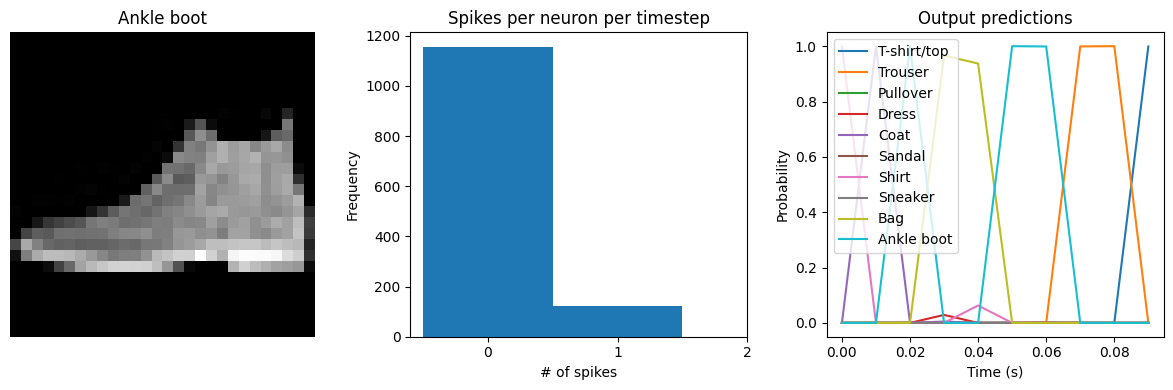

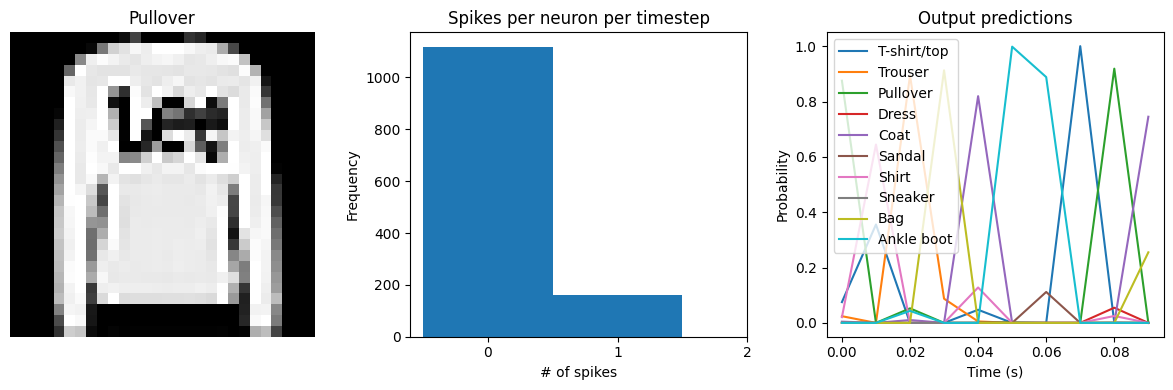

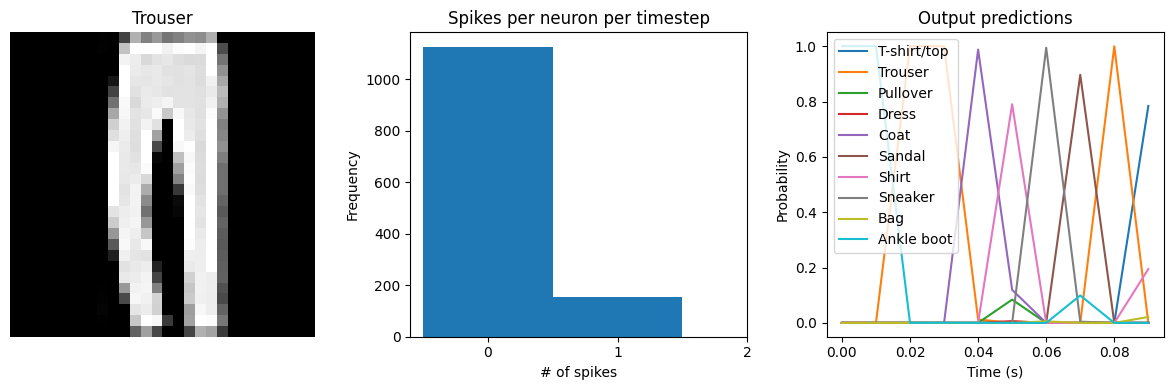

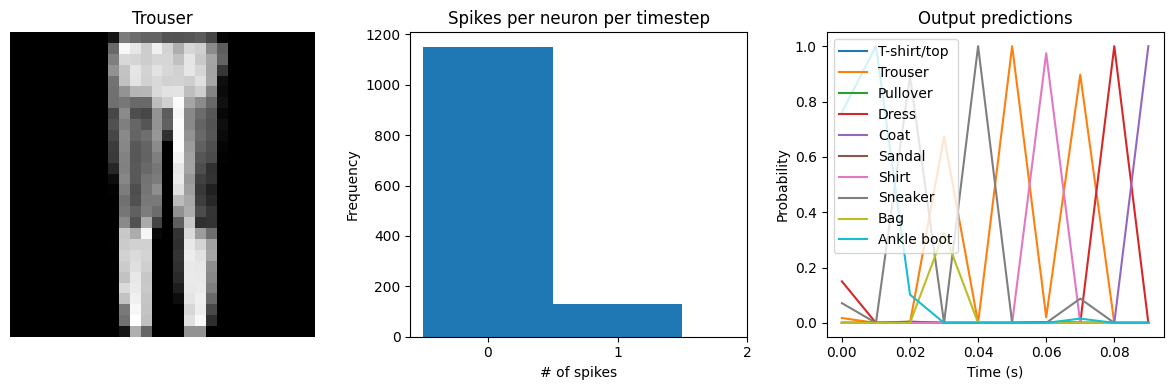

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 33:33 - loss: 3.3022 - accuracy: 0.0312

   7/1875 [..............................] - ETA: 17s - loss: 3.0972 - accuracy: 0.1116  

  13/1875 [..............................] - ETA: 16s - loss: 2.7563 - accuracy: 0.1490

  19/1875 [..............................] - ETA: 16s - loss: 2.6625 - accuracy: 0.1809

  25/1875 [..............................] - ETA: 16s - loss: 2.5442 - accuracy: 0.2250

  31/1875 [..............................] - ETA: 16s - loss: 2.4529 - accuracy: 0.2540

  37/1875 [..............................] - ETA: 16s - loss: 2.4081 - accuracy: 0.2753

  43/1875 [..............................] - ETA: 16s - loss: 2.3697 - accuracy: 0.2907

  49/1875 [..............................] - ETA: 16s - loss: 2.2824 - accuracy: 0.3099

  55/1875 [..............................] - ETA: 16s - loss: 2.2439 - accuracy: 0.3278

  61/1875 [..............................] - ETA: 16s - loss: 2.2081 - accuracy: 0.3366

  67/1875 [>.............................] - ETA: 16s - loss: 2.1444 - accuracy: 0.3587

  73/1875 [>.............................] - ETA: 16s - loss: 2.1140 - accuracy: 0.3677

  79/1875 [>.............................] - ETA: 16s - loss: 2.1004 - accuracy: 0.3758

  85/1875 [>.............................] - ETA: 16s - loss: 2.0541 - accuracy: 0.3912

  91/1875 [>.............................] - ETA: 16s - loss: 2.0208 - accuracy: 0.4008

  97/1875 [>.............................] - ETA: 16s - loss: 2.0061 - accuracy: 0.4043

 103/1875 [>.............................] - ETA: 15s - loss: 1.9758 - accuracy: 0.4120

 109/1875 [>.............................] - ETA: 15s - loss: 1.9538 - accuracy: 0.4192

 115/1875 [>.............................] - ETA: 15s - loss: 1.9307 - accuracy: 0.4247

 121/1875 [>.............................] - ETA: 15s - loss: 1.9156 - accuracy: 0.4300

 127/1875 [=>............................] - ETA: 15s - loss: 1.8845 - accuracy: 0.4380

 133/1875 [=>............................] - ETA: 15s - loss: 1.8634 - accuracy: 0.4457

 139/1875 [=>............................] - ETA: 15s - loss: 1.8510 - accuracy: 0.4503

 145/1875 [=>............................] - ETA: 15s - loss: 1.8307 - accuracy: 0.4550

 151/1875 [=>............................] - ETA: 15s - loss: 1.8105 - accuracy: 0.4613

 157/1875 [=>............................] - ETA: 15s - loss: 1.7976 - accuracy: 0.4654

 163/1875 [=>............................] - ETA: 15s - loss: 1.7920 - accuracy: 0.4674

 169/1875 [=>............................] - ETA: 15s - loss: 1.7776 - accuracy: 0.4724

 175/1875 [=>............................] - ETA: 15s - loss: 1.7633 - accuracy: 0.4761

 181/1875 [=>............................] - ETA: 15s - loss: 1.7590 - accuracy: 0.4793

 187/1875 [=>............................] - ETA: 15s - loss: 1.7480 - accuracy: 0.4840

 193/1875 [==>...........................] - ETA: 15s - loss: 1.7309 - accuracy: 0.4890

 199/1875 [==>...........................] - ETA: 15s - loss: 1.7158 - accuracy: 0.4928

 205/1875 [==>...........................] - ETA: 15s - loss: 1.7034 - accuracy: 0.4960

 211/1875 [==>...........................] - ETA: 15s - loss: 1.6921 - accuracy: 0.4982

 217/1875 [==>...........................] - ETA: 14s - loss: 1.6791 - accuracy: 0.5013

 223/1875 [==>...........................] - ETA: 14s - loss: 1.6658 - accuracy: 0.5048

 229/1875 [==>...........................] - ETA: 14s - loss: 1.6568 - accuracy: 0.5081

 235/1875 [==>...........................] - ETA: 14s - loss: 1.6453 - accuracy: 0.5098

 241/1875 [==>...........................] - ETA: 14s - loss: 1.6301 - accuracy: 0.5139

 246/1875 [==>...........................] - ETA: 14s - loss: 1.6207 - accuracy: 0.5160

 252/1875 [===>..........................] - ETA: 14s - loss: 1.6127 - accuracy: 0.5188

 258/1875 [===>..........................] - ETA: 14s - loss: 1.5982 - accuracy: 0.5227

 263/1875 [===>..........................] - ETA: 14s - loss: 1.5877 - accuracy: 0.5250

 269/1875 [===>..........................] - ETA: 14s - loss: 1.5773 - accuracy: 0.5272

 275/1875 [===>..........................] - ETA: 14s - loss: 1.5710 - accuracy: 0.5294

 281/1875 [===>..........................] - ETA: 14s - loss: 1.5633 - accuracy: 0.5314

 287/1875 [===>..........................] - ETA: 14s - loss: 1.5508 - accuracy: 0.5346

 293/1875 [===>..........................] - ETA: 14s - loss: 1.5460 - accuracy: 0.5364

 299/1875 [===>..........................] - ETA: 14s - loss: 1.5366 - accuracy: 0.5383

 305/1875 [===>..........................] - ETA: 14s - loss: 1.5286 - accuracy: 0.5404

 311/1875 [===>..........................] - ETA: 14s - loss: 1.5161 - accuracy: 0.5437

 317/1875 [====>.........................] - ETA: 14s - loss: 1.5114 - accuracy: 0.5447

 323/1875 [====>.........................] - ETA: 14s - loss: 1.5015 - accuracy: 0.5473

 329/1875 [====>.........................] - ETA: 14s - loss: 1.4985 - accuracy: 0.5488

 335/1875 [====>.........................] - ETA: 14s - loss: 1.4885 - accuracy: 0.5512

 341/1875 [====>.........................] - ETA: 13s - loss: 1.4788 - accuracy: 0.5535

 347/1875 [====>.........................] - ETA: 13s - loss: 1.4697 - accuracy: 0.5558

 353/1875 [====>.........................] - ETA: 13s - loss: 1.4593 - accuracy: 0.5580

 359/1875 [====>.........................] - ETA: 13s - loss: 1.4506 - accuracy: 0.5606

 365/1875 [====>.........................] - ETA: 13s - loss: 1.4442 - accuracy: 0.5618

 371/1875 [====>.........................] - ETA: 13s - loss: 1.4367 - accuracy: 0.5635

 377/1875 [=====>........................] - ETA: 13s - loss: 1.4299 - accuracy: 0.5652

 383/1875 [=====>........................] - ETA: 13s - loss: 1.4239 - accuracy: 0.5661

 389/1875 [=====>........................] - ETA: 13s - loss: 1.4158 - accuracy: 0.5683

 395/1875 [=====>........................] - ETA: 13s - loss: 1.4085 - accuracy: 0.5693

 400/1875 [=====>........................] - ETA: 13s - loss: 1.4040 - accuracy: 0.5703

 406/1875 [=====>........................] - ETA: 13s - loss: 1.3969 - accuracy: 0.5722

 412/1875 [=====>........................] - ETA: 13s - loss: 1.3906 - accuracy: 0.5739

 418/1875 [=====>........................] - ETA: 13s - loss: 1.3835 - accuracy: 0.5758

 424/1875 [=====>........................] - ETA: 13s - loss: 1.3802 - accuracy: 0.5762

 430/1875 [=====>........................] - ETA: 13s - loss: 1.3715 - accuracy: 0.5779

 436/1875 [=====>........................] - ETA: 13s - loss: 1.3660 - accuracy: 0.5792

 442/1875 [======>.......................] - ETA: 13s - loss: 1.3607 - accuracy: 0.5805

 448/1875 [======>.......................] - ETA: 12s - loss: 1.3545 - accuracy: 0.5822

 454/1875 [======>.......................] - ETA: 12s - loss: 1.3495 - accuracy: 0.5828

 460/1875 [======>.......................] - ETA: 12s - loss: 1.3438 - accuracy: 0.5840

 466/1875 [======>.......................] - ETA: 12s - loss: 1.3392 - accuracy: 0.5848

 472/1875 [======>.......................] - ETA: 12s - loss: 1.3341 - accuracy: 0.5859

 478/1875 [======>.......................] - ETA: 12s - loss: 1.3286 - accuracy: 0.5873

 484/1875 [======>.......................] - ETA: 12s - loss: 1.3225 - accuracy: 0.5886

 490/1875 [======>.......................] - ETA: 12s - loss: 1.3180 - accuracy: 0.5899

 496/1875 [======>.......................] - ETA: 12s - loss: 1.3134 - accuracy: 0.5908

 502/1875 [=======>......................] - ETA: 12s - loss: 1.3107 - accuracy: 0.5913

 508/1875 [=======>......................] - ETA: 12s - loss: 1.3065 - accuracy: 0.5925

 514/1875 [=======>......................] - ETA: 12s - loss: 1.3019 - accuracy: 0.5935

 520/1875 [=======>......................] - ETA: 12s - loss: 1.2973 - accuracy: 0.5947

 526/1875 [=======>......................] - ETA: 12s - loss: 1.2910 - accuracy: 0.5961

 532/1875 [=======>......................] - ETA: 12s - loss: 1.2874 - accuracy: 0.5971

 538/1875 [=======>......................] - ETA: 12s - loss: 1.2804 - accuracy: 0.5987

 544/1875 [=======>......................] - ETA: 12s - loss: 1.2748 - accuracy: 0.6000

 550/1875 [=======>......................] - ETA: 12s - loss: 1.2723 - accuracy: 0.6010

 556/1875 [=======>......................] - ETA: 11s - loss: 1.2664 - accuracy: 0.6028

 562/1875 [=======>......................] - ETA: 11s - loss: 1.2607 - accuracy: 0.6043

 568/1875 [========>.....................] - ETA: 11s - loss: 1.2572 - accuracy: 0.6048

 574/1875 [========>.....................] - ETA: 11s - loss: 1.2509 - accuracy: 0.6067

 580/1875 [========>.....................] - ETA: 11s - loss: 1.2476 - accuracy: 0.6074

 586/1875 [========>.....................] - ETA: 11s - loss: 1.2432 - accuracy: 0.6083

 592/1875 [========>.....................] - ETA: 11s - loss: 1.2398 - accuracy: 0.6093

 598/1875 [========>.....................] - ETA: 11s - loss: 1.2356 - accuracy: 0.6105

 604/1875 [========>.....................] - ETA: 11s - loss: 1.2314 - accuracy: 0.6114

 610/1875 [========>.....................] - ETA: 11s - loss: 1.2285 - accuracy: 0.6121

 616/1875 [========>.....................] - ETA: 11s - loss: 1.2246 - accuracy: 0.6129

 622/1875 [========>.....................] - ETA: 11s - loss: 1.2227 - accuracy: 0.6130

 628/1875 [=========>....................] - ETA: 11s - loss: 1.2183 - accuracy: 0.6139

 634/1875 [=========>....................] - ETA: 11s - loss: 1.2148 - accuracy: 0.6146

 640/1875 [=========>....................] - ETA: 11s - loss: 1.2123 - accuracy: 0.6152

 646/1875 [=========>....................] - ETA: 11s - loss: 1.2088 - accuracy: 0.6159

 652/1875 [=========>....................] - ETA: 11s - loss: 1.2029 - accuracy: 0.6179

 658/1875 [=========>....................] - ETA: 11s - loss: 1.1997 - accuracy: 0.6185

 664/1875 [=========>....................] - ETA: 10s - loss: 1.1963 - accuracy: 0.6193

 670/1875 [=========>....................] - ETA: 10s - loss: 1.1927 - accuracy: 0.6201

 676/1875 [=========>....................] - ETA: 10s - loss: 1.1905 - accuracy: 0.6206

 682/1875 [=========>....................] - ETA: 10s - loss: 1.1873 - accuracy: 0.6214

 688/1875 [==========>...................] - ETA: 10s - loss: 1.1837 - accuracy: 0.6223

 694/1875 [==========>...................] - ETA: 10s - loss: 1.1805 - accuracy: 0.6228

 700/1875 [==========>...................] - ETA: 10s - loss: 1.1767 - accuracy: 0.6236

 706/1875 [==========>...................] - ETA: 10s - loss: 1.1725 - accuracy: 0.6246

 712/1875 [==========>...................] - ETA: 10s - loss: 1.1688 - accuracy: 0.6253

 718/1875 [==========>...................] - ETA: 10s - loss: 1.1656 - accuracy: 0.6260

 724/1875 [==========>...................] - ETA: 10s - loss: 1.1612 - accuracy: 0.6270

 730/1875 [==========>...................] - ETA: 10s - loss: 1.1589 - accuracy: 0.6273

 736/1875 [==========>...................] - ETA: 10s - loss: 1.1567 - accuracy: 0.6276

 742/1875 [==========>...................] - ETA: 10s - loss: 1.1532 - accuracy: 0.6287

 748/1875 [==========>...................] - ETA: 10s - loss: 1.1498 - accuracy: 0.6294

 754/1875 [===========>..................] - ETA: 10s - loss: 1.1469 - accuracy: 0.6302

 760/1875 [===========>..................] - ETA: 10s - loss: 1.1433 - accuracy: 0.6313

 766/1875 [===========>..................] - ETA: 10s - loss: 1.1397 - accuracy: 0.6320

 772/1875 [===========>..................] - ETA: 10s - loss: 1.1365 - accuracy: 0.6325

 778/1875 [===========>..................] - ETA: 9s - loss: 1.1337 - accuracy: 0.6332 

 784/1875 [===========>..................] - ETA: 9s - loss: 1.1318 - accuracy: 0.6338

 790/1875 [===========>..................] - ETA: 9s - loss: 1.1293 - accuracy: 0.6344

 795/1875 [===========>..................] - ETA: 9s - loss: 1.1266 - accuracy: 0.6351

 801/1875 [===========>..................] - ETA: 9s - loss: 1.1245 - accuracy: 0.6354

 805/1875 [===========>..................] - ETA: 9s - loss: 1.1220 - accuracy: 0.6361

 811/1875 [===========>..................] - ETA: 9s - loss: 1.1191 - accuracy: 0.6366

 817/1875 [============>.................] - ETA: 9s - loss: 1.1164 - accuracy: 0.6371

 823/1875 [============>.................] - ETA: 9s - loss: 1.1155 - accuracy: 0.6372

 829/1875 [============>.................] - ETA: 9s - loss: 1.1130 - accuracy: 0.6380

 835/1875 [============>.................] - ETA: 9s - loss: 1.1111 - accuracy: 0.6385

 841/1875 [============>.................] - ETA: 9s - loss: 1.1082 - accuracy: 0.6393

 847/1875 [============>.................] - ETA: 9s - loss: 1.1051 - accuracy: 0.6403

 853/1875 [============>.................] - ETA: 9s - loss: 1.1029 - accuracy: 0.6408

 859/1875 [============>.................] - ETA: 9s - loss: 1.1008 - accuracy: 0.6411

 865/1875 [============>.................] - ETA: 9s - loss: 1.0993 - accuracy: 0.6413

 871/1875 [============>.................] - ETA: 9s - loss: 1.0970 - accuracy: 0.6418

 877/1875 [=============>................] - ETA: 9s - loss: 1.0949 - accuracy: 0.6422

 883/1875 [=============>................] - ETA: 9s - loss: 1.0919 - accuracy: 0.6428

 889/1875 [=============>................] - ETA: 8s - loss: 1.0891 - accuracy: 0.6437

 895/1875 [=============>................] - ETA: 8s - loss: 1.0864 - accuracy: 0.6444

 901/1875 [=============>................] - ETA: 8s - loss: 1.0841 - accuracy: 0.6449

 907/1875 [=============>................] - ETA: 8s - loss: 1.0820 - accuracy: 0.6454

 913/1875 [=============>................] - ETA: 8s - loss: 1.0802 - accuracy: 0.6458

 919/1875 [=============>................] - ETA: 8s - loss: 1.0778 - accuracy: 0.6466

 925/1875 [=============>................] - ETA: 8s - loss: 1.0752 - accuracy: 0.6474

 931/1875 [=============>................] - ETA: 8s - loss: 1.0723 - accuracy: 0.6481

 937/1875 [=============>................] - ETA: 8s - loss: 1.0707 - accuracy: 0.6485

 943/1875 [==============>...............] - ETA: 8s - loss: 1.0680 - accuracy: 0.6492

 949/1875 [==============>...............] - ETA: 8s - loss: 1.0656 - accuracy: 0.6499

 955/1875 [==============>...............] - ETA: 8s - loss: 1.0640 - accuracy: 0.6504

 961/1875 [==============>...............] - ETA: 8s - loss: 1.0618 - accuracy: 0.6509

 967/1875 [==============>...............] - ETA: 8s - loss: 1.0598 - accuracy: 0.6514

 973/1875 [==============>...............] - ETA: 8s - loss: 1.0578 - accuracy: 0.6521

 979/1875 [==============>...............] - ETA: 8s - loss: 1.0563 - accuracy: 0.6525

 985/1875 [==============>...............] - ETA: 8s - loss: 1.0540 - accuracy: 0.6531

 991/1875 [==============>...............] - ETA: 8s - loss: 1.0524 - accuracy: 0.6535

 997/1875 [==============>...............] - ETA: 7s - loss: 1.0514 - accuracy: 0.6537

1002/1875 [===============>..............] - ETA: 7s - loss: 1.0490 - accuracy: 0.6543

1008/1875 [===============>..............] - ETA: 7s - loss: 1.0468 - accuracy: 0.6548

1014/1875 [===============>..............] - ETA: 7s - loss: 1.0448 - accuracy: 0.6551

1020/1875 [===============>..............] - ETA: 7s - loss: 1.0425 - accuracy: 0.6557

1026/1875 [===============>..............] - ETA: 7s - loss: 1.0401 - accuracy: 0.6562

1032/1875 [===============>..............] - ETA: 7s - loss: 1.0384 - accuracy: 0.6565

1038/1875 [===============>..............] - ETA: 7s - loss: 1.0362 - accuracy: 0.6570

1044/1875 [===============>..............] - ETA: 7s - loss: 1.0340 - accuracy: 0.6575

1050/1875 [===============>..............] - ETA: 7s - loss: 1.0320 - accuracy: 0.6580

1056/1875 [===============>..............] - ETA: 7s - loss: 1.0303 - accuracy: 0.6585

1062/1875 [===============>..............] - ETA: 7s - loss: 1.0279 - accuracy: 0.6591

1068/1875 [================>.............] - ETA: 7s - loss: 1.0256 - accuracy: 0.6595

1074/1875 [================>.............] - ETA: 7s - loss: 1.0237 - accuracy: 0.6599

1080/1875 [================>.............] - ETA: 7s - loss: 1.0216 - accuracy: 0.6605

1086/1875 [================>.............] - ETA: 7s - loss: 1.0199 - accuracy: 0.6608

1092/1875 [================>.............] - ETA: 7s - loss: 1.0180 - accuracy: 0.6612

1098/1875 [================>.............] - ETA: 7s - loss: 1.0161 - accuracy: 0.6618

1104/1875 [================>.............] - ETA: 7s - loss: 1.0142 - accuracy: 0.6623

1110/1875 [================>.............] - ETA: 6s - loss: 1.0125 - accuracy: 0.6625

1116/1875 [================>.............] - ETA: 6s - loss: 1.0109 - accuracy: 0.6630

1122/1875 [================>.............] - ETA: 6s - loss: 1.0089 - accuracy: 0.6633

1128/1875 [=================>............] - ETA: 6s - loss: 1.0072 - accuracy: 0.6638

1134/1875 [=================>............] - ETA: 6s - loss: 1.0056 - accuracy: 0.6642

1140/1875 [=================>............] - ETA: 6s - loss: 1.0042 - accuracy: 0.6645

1146/1875 [=================>............] - ETA: 6s - loss: 1.0025 - accuracy: 0.6650

1152/1875 [=================>............] - ETA: 6s - loss: 1.0013 - accuracy: 0.6653

1158/1875 [=================>............] - ETA: 6s - loss: 0.9988 - accuracy: 0.6661

1164/1875 [=================>............] - ETA: 6s - loss: 0.9968 - accuracy: 0.6668

1170/1875 [=================>............] - ETA: 6s - loss: 0.9955 - accuracy: 0.6671

1176/1875 [=================>............] - ETA: 6s - loss: 0.9944 - accuracy: 0.6674

1182/1875 [=================>............] - ETA: 6s - loss: 0.9932 - accuracy: 0.6676

1188/1875 [==================>...........] - ETA: 6s - loss: 0.9914 - accuracy: 0.6682

1194/1875 [==================>...........] - ETA: 6s - loss: 0.9903 - accuracy: 0.6684

1200/1875 [==================>...........] - ETA: 6s - loss: 0.9888 - accuracy: 0.6686

1205/1875 [==================>...........] - ETA: 6s - loss: 0.9874 - accuracy: 0.6690

1211/1875 [==================>...........] - ETA: 6s - loss: 0.9857 - accuracy: 0.6693

1217/1875 [==================>...........] - ETA: 5s - loss: 0.9837 - accuracy: 0.6698

1223/1875 [==================>...........] - ETA: 5s - loss: 0.9818 - accuracy: 0.6704

1229/1875 [==================>...........] - ETA: 5s - loss: 0.9801 - accuracy: 0.6710

1235/1875 [==================>...........] - ETA: 5s - loss: 0.9789 - accuracy: 0.6713

1241/1875 [==================>...........] - ETA: 5s - loss: 0.9779 - accuracy: 0.6717

1247/1875 [==================>...........] - ETA: 5s - loss: 0.9759 - accuracy: 0.6723

1253/1875 [===================>..........] - ETA: 5s - loss: 0.9748 - accuracy: 0.6725

1259/1875 [===================>..........] - ETA: 5s - loss: 0.9731 - accuracy: 0.6729

1265/1875 [===================>..........] - ETA: 5s - loss: 0.9713 - accuracy: 0.6736

1271/1875 [===================>..........] - ETA: 5s - loss: 0.9693 - accuracy: 0.6743

1277/1875 [===================>..........] - ETA: 5s - loss: 0.9679 - accuracy: 0.6747

1283/1875 [===================>..........] - ETA: 5s - loss: 0.9666 - accuracy: 0.6749

1289/1875 [===================>..........] - ETA: 5s - loss: 0.9655 - accuracy: 0.6752

1295/1875 [===================>..........] - ETA: 5s - loss: 0.9639 - accuracy: 0.6756

1301/1875 [===================>..........] - ETA: 5s - loss: 0.9623 - accuracy: 0.6760

1307/1875 [===================>..........] - ETA: 5s - loss: 0.9605 - accuracy: 0.6764

1313/1875 [====================>.........] - ETA: 5s - loss: 0.9587 - accuracy: 0.6770

1319/1875 [====================>.........] - ETA: 5s - loss: 0.9573 - accuracy: 0.6774

1325/1875 [====================>.........] - ETA: 5s - loss: 0.9557 - accuracy: 0.6778

1331/1875 [====================>.........] - ETA: 4s - loss: 0.9546 - accuracy: 0.6779

1337/1875 [====================>.........] - ETA: 4s - loss: 0.9537 - accuracy: 0.6782

1343/1875 [====================>.........] - ETA: 4s - loss: 0.9528 - accuracy: 0.6784

1349/1875 [====================>.........] - ETA: 4s - loss: 0.9512 - accuracy: 0.6789

1355/1875 [====================>.........] - ETA: 4s - loss: 0.9496 - accuracy: 0.6793

1361/1875 [====================>.........] - ETA: 4s - loss: 0.9477 - accuracy: 0.6799

1367/1875 [====================>.........] - ETA: 4s - loss: 0.9460 - accuracy: 0.6803

1373/1875 [====================>.........] - ETA: 4s - loss: 0.9451 - accuracy: 0.6805

1379/1875 [=====================>........] - ETA: 4s - loss: 0.9440 - accuracy: 0.6807

1385/1875 [=====================>........] - ETA: 4s - loss: 0.9428 - accuracy: 0.6811

1391/1875 [=====================>........] - ETA: 4s - loss: 0.9419 - accuracy: 0.6813

1397/1875 [=====================>........] - ETA: 4s - loss: 0.9409 - accuracy: 0.6816

1403/1875 [=====================>........] - ETA: 4s - loss: 0.9399 - accuracy: 0.6820

1409/1875 [=====================>........] - ETA: 4s - loss: 0.9381 - accuracy: 0.6824

1415/1875 [=====================>........] - ETA: 4s - loss: 0.9371 - accuracy: 0.6829

1421/1875 [=====================>........] - ETA: 4s - loss: 0.9364 - accuracy: 0.6829

1427/1875 [=====================>........] - ETA: 4s - loss: 0.9356 - accuracy: 0.6831

1433/1875 [=====================>........] - ETA: 4s - loss: 0.9347 - accuracy: 0.6833

1439/1875 [======================>.......] - ETA: 3s - loss: 0.9331 - accuracy: 0.6837

1445/1875 [======================>.......] - ETA: 3s - loss: 0.9312 - accuracy: 0.6843

1451/1875 [======================>.......] - ETA: 3s - loss: 0.9299 - accuracy: 0.6845

1457/1875 [======================>.......] - ETA: 3s - loss: 0.9291 - accuracy: 0.6846

1463/1875 [======================>.......] - ETA: 3s - loss: 0.9281 - accuracy: 0.6848

1469/1875 [======================>.......] - ETA: 3s - loss: 0.9273 - accuracy: 0.6851

1475/1875 [======================>.......] - ETA: 3s - loss: 0.9259 - accuracy: 0.6856

1481/1875 [======================>.......] - ETA: 3s - loss: 0.9246 - accuracy: 0.6858

1487/1875 [======================>.......] - ETA: 3s - loss: 0.9233 - accuracy: 0.6862

1493/1875 [======================>.......] - ETA: 3s - loss: 0.9217 - accuracy: 0.6867

1499/1875 [======================>.......] - ETA: 3s - loss: 0.9201 - accuracy: 0.6872

1505/1875 [=======================>......] - ETA: 3s - loss: 0.9190 - accuracy: 0.6876

1511/1875 [=======================>......] - ETA: 3s - loss: 0.9177 - accuracy: 0.6881

1517/1875 [=======================>......] - ETA: 3s - loss: 0.9164 - accuracy: 0.6886

1523/1875 [=======================>......] - ETA: 3s - loss: 0.9152 - accuracy: 0.6888

1529/1875 [=======================>......] - ETA: 3s - loss: 0.9141 - accuracy: 0.6890

1535/1875 [=======================>......] - ETA: 3s - loss: 0.9133 - accuracy: 0.6893

1541/1875 [=======================>......] - ETA: 3s - loss: 0.9122 - accuracy: 0.6896

1547/1875 [=======================>......] - ETA: 2s - loss: 0.9111 - accuracy: 0.6898

1553/1875 [=======================>......] - ETA: 2s - loss: 0.9096 - accuracy: 0.6903

1559/1875 [=======================>......] - ETA: 2s - loss: 0.9087 - accuracy: 0.6904

1565/1875 [========================>.....] - ETA: 2s - loss: 0.9079 - accuracy: 0.6907

1571/1875 [========================>.....] - ETA: 2s - loss: 0.9072 - accuracy: 0.6910

1577/1875 [========================>.....] - ETA: 2s - loss: 0.9069 - accuracy: 0.6910

1583/1875 [========================>.....] - ETA: 2s - loss: 0.9056 - accuracy: 0.6912

1589/1875 [========================>.....] - ETA: 2s - loss: 0.9049 - accuracy: 0.6915

1595/1875 [========================>.....] - ETA: 2s - loss: 0.9033 - accuracy: 0.6919

1601/1875 [========================>.....] - ETA: 2s - loss: 0.9023 - accuracy: 0.6921

1607/1875 [========================>.....] - ETA: 2s - loss: 0.9012 - accuracy: 0.6924

1613/1875 [========================>.....] - ETA: 2s - loss: 0.8999 - accuracy: 0.6928

1618/1875 [========================>.....] - ETA: 2s - loss: 0.8988 - accuracy: 0.6931

1624/1875 [========================>.....] - ETA: 2s - loss: 0.8978 - accuracy: 0.6935

1630/1875 [=========================>....] - ETA: 2s - loss: 0.8971 - accuracy: 0.6938

1636/1875 [=========================>....] - ETA: 2s - loss: 0.8960 - accuracy: 0.6941

1642/1875 [=========================>....] - ETA: 2s - loss: 0.8949 - accuracy: 0.6944

1648/1875 [=========================>....] - ETA: 2s - loss: 0.8940 - accuracy: 0.6946

1654/1875 [=========================>....] - ETA: 2s - loss: 0.8929 - accuracy: 0.6949

1660/1875 [=========================>....] - ETA: 1s - loss: 0.8918 - accuracy: 0.6953

1666/1875 [=========================>....] - ETA: 1s - loss: 0.8908 - accuracy: 0.6956

1672/1875 [=========================>....] - ETA: 1s - loss: 0.8904 - accuracy: 0.6957

1678/1875 [=========================>....] - ETA: 1s - loss: 0.8893 - accuracy: 0.6960

1684/1875 [=========================>....] - ETA: 1s - loss: 0.8883 - accuracy: 0.6963

1690/1875 [==========================>...] - ETA: 1s - loss: 0.8874 - accuracy: 0.6966

1696/1875 [==========================>...] - ETA: 1s - loss: 0.8866 - accuracy: 0.6968

1702/1875 [==========================>...] - ETA: 1s - loss: 0.8854 - accuracy: 0.6972

1708/1875 [==========================>...] - ETA: 1s - loss: 0.8844 - accuracy: 0.6975

1714/1875 [==========================>...] - ETA: 1s - loss: 0.8836 - accuracy: 0.6978

1720/1875 [==========================>...] - ETA: 1s - loss: 0.8827 - accuracy: 0.6980

1726/1875 [==========================>...] - ETA: 1s - loss: 0.8815 - accuracy: 0.6984

1732/1875 [==========================>...] - ETA: 1s - loss: 0.8809 - accuracy: 0.6984

1738/1875 [==========================>...] - ETA: 1s - loss: 0.8800 - accuracy: 0.6988

1744/1875 [==========================>...] - ETA: 1s - loss: 0.8791 - accuracy: 0.6991

1750/1875 [===========================>..] - ETA: 1s - loss: 0.8781 - accuracy: 0.6993

1756/1875 [===========================>..] - ETA: 1s - loss: 0.8774 - accuracy: 0.6997

1762/1875 [===========================>..] - ETA: 1s - loss: 0.8764 - accuracy: 0.6999

1768/1875 [===========================>..] - ETA: 0s - loss: 0.8758 - accuracy: 0.7000

1774/1875 [===========================>..] - ETA: 0s - loss: 0.8746 - accuracy: 0.7004

1780/1875 [===========================>..] - ETA: 0s - loss: 0.8736 - accuracy: 0.7006

1786/1875 [===========================>..] - ETA: 0s - loss: 0.8731 - accuracy: 0.7007

1792/1875 [===========================>..] - ETA: 0s - loss: 0.8725 - accuracy: 0.7008

1798/1875 [===========================>..] - ETA: 0s - loss: 0.8717 - accuracy: 0.7012

1804/1875 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.7015

1810/1875 [===========================>..] - ETA: 0s - loss: 0.8696 - accuracy: 0.7017

1816/1875 [============================>.] - ETA: 0s - loss: 0.8689 - accuracy: 0.7018

1822/1875 [============================>.] - ETA: 0s - loss: 0.8680 - accuracy: 0.7020

1828/1875 [============================>.] - ETA: 0s - loss: 0.8670 - accuracy: 0.7023

1834/1875 [============================>.] - ETA: 0s - loss: 0.8658 - accuracy: 0.7026

1840/1875 [============================>.] - ETA: 0s - loss: 0.8648 - accuracy: 0.7029

1846/1875 [============================>.] - ETA: 0s - loss: 0.8638 - accuracy: 0.7032

1852/1875 [============================>.] - ETA: 0s - loss: 0.8630 - accuracy: 0.7034

1858/1875 [============================>.] - ETA: 0s - loss: 0.8625 - accuracy: 0.7037

1864/1875 [============================>.] - ETA: 0s - loss: 0.8620 - accuracy: 0.7037

1870/1875 [============================>.] - ETA: 0s - loss: 0.8613 - accuracy: 0.7040

1875/1875 [==============================] - 18s 9ms/step - loss: 0.8604 - accuracy: 0.7043


Epoch 2/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4466 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 17s - loss: 0.6210 - accuracy: 0.7634

  13/1875 [..............................] - ETA: 17s - loss: 0.6227 - accuracy: 0.7524

  19/1875 [..............................] - ETA: 17s - loss: 0.6345 - accuracy: 0.7467

  25/1875 [..............................] - ETA: 17s - loss: 0.6110 - accuracy: 0.7563

  31/1875 [..............................] - ETA: 17s - loss: 0.6328 - accuracy: 0.7520

  37/1875 [..............................] - ETA: 16s - loss: 0.6169 - accuracy: 0.7593

  43/1875 [..............................] - ETA: 16s - loss: 0.6224 - accuracy: 0.7609

  49/1875 [..............................] - ETA: 16s - loss: 0.6303 - accuracy: 0.7557

  55/1875 [..............................] - ETA: 16s - loss: 0.6272 - accuracy: 0.7631

  61/1875 [..............................] - ETA: 16s - loss: 0.6141 - accuracy: 0.7649

  67/1875 [>.............................] - ETA: 16s - loss: 0.6163 - accuracy: 0.7626

  73/1875 [>.............................] - ETA: 16s - loss: 0.6060 - accuracy: 0.7663

  79/1875 [>.............................] - ETA: 16s - loss: 0.6028 - accuracy: 0.7658

  85/1875 [>.............................] - ETA: 16s - loss: 0.5950 - accuracy: 0.7691

  91/1875 [>.............................] - ETA: 16s - loss: 0.6022 - accuracy: 0.7679

  97/1875 [>.............................] - ETA: 16s - loss: 0.6045 - accuracy: 0.7687

 103/1875 [>.............................] - ETA: 16s - loss: 0.6072 - accuracy: 0.7682

 109/1875 [>.............................] - ETA: 16s - loss: 0.6063 - accuracy: 0.7692

 115/1875 [>.............................] - ETA: 16s - loss: 0.6060 - accuracy: 0.7707

 121/1875 [>.............................] - ETA: 16s - loss: 0.6062 - accuracy: 0.7709

 127/1875 [=>............................] - ETA: 16s - loss: 0.6128 - accuracy: 0.7704

 133/1875 [=>............................] - ETA: 16s - loss: 0.6099 - accuracy: 0.7716

 139/1875 [=>............................] - ETA: 16s - loss: 0.6121 - accuracy: 0.7718

 145/1875 [=>............................] - ETA: 16s - loss: 0.6115 - accuracy: 0.7728

 151/1875 [=>............................] - ETA: 16s - loss: 0.6087 - accuracy: 0.7742

 157/1875 [=>............................] - ETA: 15s - loss: 0.6095 - accuracy: 0.7737

 163/1875 [=>............................] - ETA: 15s - loss: 0.6145 - accuracy: 0.7724

 168/1875 [=>............................] - ETA: 15s - loss: 0.6116 - accuracy: 0.7736

 174/1875 [=>............................] - ETA: 15s - loss: 0.6139 - accuracy: 0.7732

 180/1875 [=>............................] - ETA: 15s - loss: 0.6123 - accuracy: 0.7736

 186/1875 [=>............................] - ETA: 15s - loss: 0.6106 - accuracy: 0.7742

 192/1875 [==>...........................] - ETA: 15s - loss: 0.6134 - accuracy: 0.7729

 198/1875 [==>...........................] - ETA: 15s - loss: 0.6090 - accuracy: 0.7737

 204/1875 [==>...........................] - ETA: 15s - loss: 0.6121 - accuracy: 0.7731

 210/1875 [==>...........................] - ETA: 15s - loss: 0.6102 - accuracy: 0.7741

 216/1875 [==>...........................] - ETA: 15s - loss: 0.6087 - accuracy: 0.7746

 222/1875 [==>...........................] - ETA: 15s - loss: 0.6053 - accuracy: 0.7751

 228/1875 [==>...........................] - ETA: 15s - loss: 0.6027 - accuracy: 0.7763

 234/1875 [==>...........................] - ETA: 15s - loss: 0.6030 - accuracy: 0.7763

 240/1875 [==>...........................] - ETA: 15s - loss: 0.6062 - accuracy: 0.7749

 246/1875 [==>...........................] - ETA: 15s - loss: 0.6070 - accuracy: 0.7745

 252/1875 [===>..........................] - ETA: 14s - loss: 0.6048 - accuracy: 0.7752

 258/1875 [===>..........................] - ETA: 14s - loss: 0.6044 - accuracy: 0.7752

 264/1875 [===>..........................] - ETA: 14s - loss: 0.6025 - accuracy: 0.7762

 270/1875 [===>..........................] - ETA: 14s - loss: 0.6007 - accuracy: 0.7762

 275/1875 [===>..........................] - ETA: 14s - loss: 0.5999 - accuracy: 0.7766

 280/1875 [===>..........................] - ETA: 14s - loss: 0.6003 - accuracy: 0.7765

 286/1875 [===>..........................] - ETA: 14s - loss: 0.5984 - accuracy: 0.7772

 292/1875 [===>..........................] - ETA: 14s - loss: 0.5994 - accuracy: 0.7774

 298/1875 [===>..........................] - ETA: 14s - loss: 0.5995 - accuracy: 0.7771

 304/1875 [===>..........................] - ETA: 14s - loss: 0.6019 - accuracy: 0.7764

 310/1875 [===>..........................] - ETA: 14s - loss: 0.6011 - accuracy: 0.7766

 316/1875 [====>.........................] - ETA: 14s - loss: 0.5989 - accuracy: 0.7768

 322/1875 [====>.........................] - ETA: 14s - loss: 0.6007 - accuracy: 0.7764

 328/1875 [====>.........................] - ETA: 14s - loss: 0.5988 - accuracy: 0.7767

 334/1875 [====>.........................] - ETA: 14s - loss: 0.5985 - accuracy: 0.7766

 340/1875 [====>.........................] - ETA: 14s - loss: 0.5992 - accuracy: 0.7765

 346/1875 [====>.........................] - ETA: 14s - loss: 0.5982 - accuracy: 0.7767

 352/1875 [====>.........................] - ETA: 14s - loss: 0.5990 - accuracy: 0.7771

 358/1875 [====>.........................] - ETA: 14s - loss: 0.5998 - accuracy: 0.7769

 364/1875 [====>.........................] - ETA: 13s - loss: 0.6000 - accuracy: 0.7766

 370/1875 [====>.........................] - ETA: 13s - loss: 0.5993 - accuracy: 0.7769

 376/1875 [=====>........................] - ETA: 13s - loss: 0.5985 - accuracy: 0.7771

 382/1875 [=====>........................] - ETA: 13s - loss: 0.5986 - accuracy: 0.7775

 388/1875 [=====>........................] - ETA: 13s - loss: 0.5976 - accuracy: 0.7781

 394/1875 [=====>........................] - ETA: 13s - loss: 0.5976 - accuracy: 0.7778

 400/1875 [=====>........................] - ETA: 13s - loss: 0.5978 - accuracy: 0.7784

 406/1875 [=====>........................] - ETA: 13s - loss: 0.5970 - accuracy: 0.7789

 412/1875 [=====>........................] - ETA: 13s - loss: 0.5966 - accuracy: 0.7788

 418/1875 [=====>........................] - ETA: 13s - loss: 0.5981 - accuracy: 0.7792

 424/1875 [=====>........................] - ETA: 13s - loss: 0.5983 - accuracy: 0.7793

 430/1875 [=====>........................] - ETA: 13s - loss: 0.5975 - accuracy: 0.7797

 436/1875 [=====>........................] - ETA: 13s - loss: 0.5962 - accuracy: 0.7802

 442/1875 [======>.......................] - ETA: 13s - loss: 0.5950 - accuracy: 0.7804

 448/1875 [======>.......................] - ETA: 13s - loss: 0.5950 - accuracy: 0.7808

 454/1875 [======>.......................] - ETA: 13s - loss: 0.5930 - accuracy: 0.7812

 460/1875 [======>.......................] - ETA: 13s - loss: 0.5939 - accuracy: 0.7810

 466/1875 [======>.......................] - ETA: 12s - loss: 0.5945 - accuracy: 0.7813

 472/1875 [======>.......................] - ETA: 12s - loss: 0.5942 - accuracy: 0.7811

 478/1875 [======>.......................] - ETA: 12s - loss: 0.5941 - accuracy: 0.7813

 484/1875 [======>.......................] - ETA: 12s - loss: 0.5952 - accuracy: 0.7812

 490/1875 [======>.......................] - ETA: 12s - loss: 0.5945 - accuracy: 0.7813

 496/1875 [======>.......................] - ETA: 12s - loss: 0.5938 - accuracy: 0.7818

 502/1875 [=======>......................] - ETA: 12s - loss: 0.5946 - accuracy: 0.7812

 508/1875 [=======>......................] - ETA: 12s - loss: 0.5953 - accuracy: 0.7809

 514/1875 [=======>......................] - ETA: 12s - loss: 0.5942 - accuracy: 0.7810

 520/1875 [=======>......................] - ETA: 12s - loss: 0.5938 - accuracy: 0.7816

 526/1875 [=======>......................] - ETA: 12s - loss: 0.5944 - accuracy: 0.7815

 532/1875 [=======>......................] - ETA: 12s - loss: 0.5939 - accuracy: 0.7814

 538/1875 [=======>......................] - ETA: 12s - loss: 0.5936 - accuracy: 0.7812

 543/1875 [=======>......................] - ETA: 12s - loss: 0.5944 - accuracy: 0.7810

 548/1875 [=======>......................] - ETA: 12s - loss: 0.5942 - accuracy: 0.7809

 553/1875 [=======>......................] - ETA: 12s - loss: 0.5935 - accuracy: 0.7811

 558/1875 [=======>......................] - ETA: 12s - loss: 0.5941 - accuracy: 0.7809

 564/1875 [========>.....................] - ETA: 12s - loss: 0.5929 - accuracy: 0.7812

 569/1875 [========>.....................] - ETA: 12s - loss: 0.5940 - accuracy: 0.7804

 575/1875 [========>.....................] - ETA: 12s - loss: 0.5931 - accuracy: 0.7808

 581/1875 [========>.....................] - ETA: 11s - loss: 0.5926 - accuracy: 0.7813

 587/1875 [========>.....................] - ETA: 11s - loss: 0.5929 - accuracy: 0.7811

 593/1875 [========>.....................] - ETA: 11s - loss: 0.5920 - accuracy: 0.7814

 599/1875 [========>.....................] - ETA: 11s - loss: 0.5920 - accuracy: 0.7816

 605/1875 [========>.....................] - ETA: 11s - loss: 0.5913 - accuracy: 0.7821

 611/1875 [========>.....................] - ETA: 11s - loss: 0.5900 - accuracy: 0.7826

 617/1875 [========>.....................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7826

 623/1875 [========>.....................] - ETA: 11s - loss: 0.5897 - accuracy: 0.7829

 629/1875 [=========>....................] - ETA: 11s - loss: 0.5907 - accuracy: 0.7829

 635/1875 [=========>....................] - ETA: 11s - loss: 0.5906 - accuracy: 0.7826

 641/1875 [=========>....................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7827

 647/1875 [=========>....................] - ETA: 11s - loss: 0.5909 - accuracy: 0.7825

 653/1875 [=========>....................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7830

 659/1875 [=========>....................] - ETA: 11s - loss: 0.5897 - accuracy: 0.7829

 665/1875 [=========>....................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7826

 671/1875 [=========>....................] - ETA: 11s - loss: 0.5896 - accuracy: 0.7827

 677/1875 [=========>....................] - ETA: 11s - loss: 0.5889 - accuracy: 0.7831

 683/1875 [=========>....................] - ETA: 11s - loss: 0.5890 - accuracy: 0.7831

 689/1875 [==========>...................] - ETA: 10s - loss: 0.5890 - accuracy: 0.7830

 695/1875 [==========>...................] - ETA: 10s - loss: 0.5883 - accuracy: 0.7833

 701/1875 [==========>...................] - ETA: 10s - loss: 0.5885 - accuracy: 0.7829

 707/1875 [==========>...................] - ETA: 10s - loss: 0.5888 - accuracy: 0.7830

 713/1875 [==========>...................] - ETA: 10s - loss: 0.5885 - accuracy: 0.7832

 719/1875 [==========>...................] - ETA: 10s - loss: 0.5887 - accuracy: 0.7832

 725/1875 [==========>...................] - ETA: 10s - loss: 0.5878 - accuracy: 0.7837

 731/1875 [==========>...................] - ETA: 10s - loss: 0.5871 - accuracy: 0.7840

 737/1875 [==========>...................] - ETA: 10s - loss: 0.5867 - accuracy: 0.7840

 743/1875 [==========>...................] - ETA: 10s - loss: 0.5869 - accuracy: 0.7841

 749/1875 [==========>...................] - ETA: 10s - loss: 0.5861 - accuracy: 0.7843

 755/1875 [===========>..................] - ETA: 10s - loss: 0.5858 - accuracy: 0.7844

 761/1875 [===========>..................] - ETA: 10s - loss: 0.5863 - accuracy: 0.7841

 767/1875 [===========>..................] - ETA: 10s - loss: 0.5855 - accuracy: 0.7843

 773/1875 [===========>..................] - ETA: 10s - loss: 0.5855 - accuracy: 0.7845

 779/1875 [===========>..................] - ETA: 10s - loss: 0.5846 - accuracy: 0.7849

 785/1875 [===========>..................] - ETA: 10s - loss: 0.5848 - accuracy: 0.7847

 791/1875 [===========>..................] - ETA: 9s - loss: 0.5844 - accuracy: 0.7848 

 797/1875 [===========>..................] - ETA: 9s - loss: 0.5837 - accuracy: 0.7849

 803/1875 [===========>..................] - ETA: 9s - loss: 0.5843 - accuracy: 0.7847

 809/1875 [===========>..................] - ETA: 9s - loss: 0.5841 - accuracy: 0.7848

 815/1875 [============>.................] - ETA: 9s - loss: 0.5838 - accuracy: 0.7850

 821/1875 [============>.................] - ETA: 9s - loss: 0.5838 - accuracy: 0.7849

 827/1875 [============>.................] - ETA: 9s - loss: 0.5846 - accuracy: 0.7848

 833/1875 [============>.................] - ETA: 9s - loss: 0.5849 - accuracy: 0.7847

 839/1875 [============>.................] - ETA: 9s - loss: 0.5848 - accuracy: 0.7847

 845/1875 [============>.................] - ETA: 9s - loss: 0.5859 - accuracy: 0.7847

 851/1875 [============>.................] - ETA: 9s - loss: 0.5860 - accuracy: 0.7842

 857/1875 [============>.................] - ETA: 9s - loss: 0.5862 - accuracy: 0.7843

 863/1875 [============>.................] - ETA: 9s - loss: 0.5861 - accuracy: 0.7844

 869/1875 [============>.................] - ETA: 9s - loss: 0.5853 - accuracy: 0.7845

 875/1875 [=============>................] - ETA: 9s - loss: 0.5850 - accuracy: 0.7847

 881/1875 [=============>................] - ETA: 9s - loss: 0.5850 - accuracy: 0.7847

 887/1875 [=============>................] - ETA: 9s - loss: 0.5845 - accuracy: 0.7849

 893/1875 [=============>................] - ETA: 9s - loss: 0.5846 - accuracy: 0.7849

 899/1875 [=============>................] - ETA: 8s - loss: 0.5835 - accuracy: 0.7851

 905/1875 [=============>................] - ETA: 8s - loss: 0.5830 - accuracy: 0.7852

 911/1875 [=============>................] - ETA: 8s - loss: 0.5829 - accuracy: 0.7852

 917/1875 [=============>................] - ETA: 8s - loss: 0.5826 - accuracy: 0.7854

 923/1875 [=============>................] - ETA: 8s - loss: 0.5827 - accuracy: 0.7854

 929/1875 [=============>................] - ETA: 8s - loss: 0.5826 - accuracy: 0.7855

 935/1875 [=============>................] - ETA: 8s - loss: 0.5823 - accuracy: 0.7855

 941/1875 [==============>...............] - ETA: 8s - loss: 0.5825 - accuracy: 0.7854

 947/1875 [==============>...............] - ETA: 8s - loss: 0.5828 - accuracy: 0.7853

 953/1875 [==============>...............] - ETA: 8s - loss: 0.5820 - accuracy: 0.7855

 959/1875 [==============>...............] - ETA: 8s - loss: 0.5822 - accuracy: 0.7854

 965/1875 [==============>...............] - ETA: 8s - loss: 0.5824 - accuracy: 0.7851

 971/1875 [==============>...............] - ETA: 8s - loss: 0.5828 - accuracy: 0.7851

 977/1875 [==============>...............] - ETA: 8s - loss: 0.5827 - accuracy: 0.7851

 983/1875 [==============>...............] - ETA: 8s - loss: 0.5826 - accuracy: 0.7853

 989/1875 [==============>...............] - ETA: 8s - loss: 0.5821 - accuracy: 0.7855

 995/1875 [==============>...............] - ETA: 8s - loss: 0.5818 - accuracy: 0.7854

1001/1875 [===============>..............] - ETA: 8s - loss: 0.5807 - accuracy: 0.7857

1007/1875 [===============>..............] - ETA: 7s - loss: 0.5802 - accuracy: 0.7860

1013/1875 [===============>..............] - ETA: 7s - loss: 0.5801 - accuracy: 0.7858

1019/1875 [===============>..............] - ETA: 7s - loss: 0.5804 - accuracy: 0.7859

1025/1875 [===============>..............] - ETA: 7s - loss: 0.5797 - accuracy: 0.7861

1031/1875 [===============>..............] - ETA: 7s - loss: 0.5793 - accuracy: 0.7864

1037/1875 [===============>..............] - ETA: 7s - loss: 0.5792 - accuracy: 0.7864

1043/1875 [===============>..............] - ETA: 7s - loss: 0.5790 - accuracy: 0.7865

1049/1875 [===============>..............] - ETA: 7s - loss: 0.5787 - accuracy: 0.7867

1055/1875 [===============>..............] - ETA: 7s - loss: 0.5786 - accuracy: 0.7866

1061/1875 [===============>..............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7866

1067/1875 [================>.............] - ETA: 7s - loss: 0.5781 - accuracy: 0.7867

1072/1875 [================>.............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7868

1078/1875 [================>.............] - ETA: 7s - loss: 0.5784 - accuracy: 0.7866

1084/1875 [================>.............] - ETA: 7s - loss: 0.5781 - accuracy: 0.7868

1090/1875 [================>.............] - ETA: 7s - loss: 0.5784 - accuracy: 0.7870

1096/1875 [================>.............] - ETA: 7s - loss: 0.5782 - accuracy: 0.7870

1102/1875 [================>.............] - ETA: 7s - loss: 0.5779 - accuracy: 0.7872

1108/1875 [================>.............] - ETA: 7s - loss: 0.5777 - accuracy: 0.7871

1114/1875 [================>.............] - ETA: 6s - loss: 0.5780 - accuracy: 0.7871

1120/1875 [================>.............] - ETA: 6s - loss: 0.5774 - accuracy: 0.7873

1126/1875 [=================>............] - ETA: 6s - loss: 0.5774 - accuracy: 0.7874

1132/1875 [=================>............] - ETA: 6s - loss: 0.5769 - accuracy: 0.7876

1138/1875 [=================>............] - ETA: 6s - loss: 0.5766 - accuracy: 0.7877

1144/1875 [=================>............] - ETA: 6s - loss: 0.5764 - accuracy: 0.7877

1150/1875 [=================>............] - ETA: 6s - loss: 0.5770 - accuracy: 0.7875

1156/1875 [=================>............] - ETA: 6s - loss: 0.5770 - accuracy: 0.7875

1162/1875 [=================>............] - ETA: 6s - loss: 0.5770 - accuracy: 0.7874

1168/1875 [=================>............] - ETA: 6s - loss: 0.5772 - accuracy: 0.7874

1174/1875 [=================>............] - ETA: 6s - loss: 0.5773 - accuracy: 0.7872

1180/1875 [=================>............] - ETA: 6s - loss: 0.5769 - accuracy: 0.7873

1186/1875 [=================>............] - ETA: 6s - loss: 0.5776 - accuracy: 0.7871

1192/1875 [==================>...........] - ETA: 6s - loss: 0.5769 - accuracy: 0.7874

1198/1875 [==================>...........] - ETA: 6s - loss: 0.5765 - accuracy: 0.7875

1204/1875 [==================>...........] - ETA: 6s - loss: 0.5760 - accuracy: 0.7877

1210/1875 [==================>...........] - ETA: 6s - loss: 0.5756 - accuracy: 0.7878

1216/1875 [==================>...........] - ETA: 6s - loss: 0.5752 - accuracy: 0.7880

1222/1875 [==================>...........] - ETA: 5s - loss: 0.5747 - accuracy: 0.7881

1228/1875 [==================>...........] - ETA: 5s - loss: 0.5740 - accuracy: 0.7883

1234/1875 [==================>...........] - ETA: 5s - loss: 0.5739 - accuracy: 0.7884

1240/1875 [==================>...........] - ETA: 5s - loss: 0.5743 - accuracy: 0.7884

1246/1875 [==================>...........] - ETA: 5s - loss: 0.5735 - accuracy: 0.7885

1252/1875 [===================>..........] - ETA: 5s - loss: 0.5735 - accuracy: 0.7884

1258/1875 [===================>..........] - ETA: 5s - loss: 0.5732 - accuracy: 0.7885

1264/1875 [===================>..........] - ETA: 5s - loss: 0.5728 - accuracy: 0.7886

1270/1875 [===================>..........] - ETA: 5s - loss: 0.5727 - accuracy: 0.7885

1276/1875 [===================>..........] - ETA: 5s - loss: 0.5726 - accuracy: 0.7886

1282/1875 [===================>..........] - ETA: 5s - loss: 0.5730 - accuracy: 0.7886

1288/1875 [===================>..........] - ETA: 5s - loss: 0.5730 - accuracy: 0.7886

1294/1875 [===================>..........] - ETA: 5s - loss: 0.5725 - accuracy: 0.7889

1300/1875 [===================>..........] - ETA: 5s - loss: 0.5724 - accuracy: 0.7890

1305/1875 [===================>..........] - ETA: 5s - loss: 0.5722 - accuracy: 0.7889

1311/1875 [===================>..........] - ETA: 5s - loss: 0.5722 - accuracy: 0.7889

1317/1875 [====================>.........] - ETA: 5s - loss: 0.5723 - accuracy: 0.7888

1323/1875 [====================>.........] - ETA: 5s - loss: 0.5722 - accuracy: 0.7889

1329/1875 [====================>.........] - ETA: 5s - loss: 0.5726 - accuracy: 0.7887

1335/1875 [====================>.........] - ETA: 4s - loss: 0.5723 - accuracy: 0.7890

1341/1875 [====================>.........] - ETA: 4s - loss: 0.5728 - accuracy: 0.7889

1347/1875 [====================>.........] - ETA: 4s - loss: 0.5729 - accuracy: 0.7889

1353/1875 [====================>.........] - ETA: 4s - loss: 0.5729 - accuracy: 0.7889

1359/1875 [====================>.........] - ETA: 4s - loss: 0.5726 - accuracy: 0.7891

1365/1875 [====================>.........] - ETA: 4s - loss: 0.5727 - accuracy: 0.7890

1371/1875 [====================>.........] - ETA: 4s - loss: 0.5723 - accuracy: 0.7891

1377/1875 [=====================>........] - ETA: 4s - loss: 0.5723 - accuracy: 0.7890

1383/1875 [=====================>........] - ETA: 4s - loss: 0.5719 - accuracy: 0.7893

1389/1875 [=====================>........] - ETA: 4s - loss: 0.5716 - accuracy: 0.7894

1395/1875 [=====================>........] - ETA: 4s - loss: 0.5715 - accuracy: 0.7895

1401/1875 [=====================>........] - ETA: 4s - loss: 0.5714 - accuracy: 0.7894

1407/1875 [=====================>........] - ETA: 4s - loss: 0.5714 - accuracy: 0.7895

1413/1875 [=====================>........] - ETA: 4s - loss: 0.5708 - accuracy: 0.7896

1419/1875 [=====================>........] - ETA: 4s - loss: 0.5705 - accuracy: 0.7896

1424/1875 [=====================>........] - ETA: 4s - loss: 0.5703 - accuracy: 0.7896

1430/1875 [=====================>........] - ETA: 4s - loss: 0.5699 - accuracy: 0.7899

1436/1875 [=====================>........] - ETA: 4s - loss: 0.5695 - accuracy: 0.7900

1442/1875 [======================>.......] - ETA: 3s - loss: 0.5692 - accuracy: 0.7902

1448/1875 [======================>.......] - ETA: 3s - loss: 0.5694 - accuracy: 0.7901

1454/1875 [======================>.......] - ETA: 3s - loss: 0.5695 - accuracy: 0.7899

1460/1875 [======================>.......] - ETA: 3s - loss: 0.5695 - accuracy: 0.7899

1466/1875 [======================>.......] - ETA: 3s - loss: 0.5696 - accuracy: 0.7898

1472/1875 [======================>.......] - ETA: 3s - loss: 0.5696 - accuracy: 0.7899

1478/1875 [======================>.......] - ETA: 3s - loss: 0.5697 - accuracy: 0.7899

1484/1875 [======================>.......] - ETA: 3s - loss: 0.5690 - accuracy: 0.7900

1490/1875 [======================>.......] - ETA: 3s - loss: 0.5690 - accuracy: 0.7902

1496/1875 [======================>.......] - ETA: 3s - loss: 0.5691 - accuracy: 0.7900

1502/1875 [=======================>......] - ETA: 3s - loss: 0.5696 - accuracy: 0.7899

1508/1875 [=======================>......] - ETA: 3s - loss: 0.5696 - accuracy: 0.7899

1514/1875 [=======================>......] - ETA: 3s - loss: 0.5695 - accuracy: 0.7900

1520/1875 [=======================>......] - ETA: 3s - loss: 0.5694 - accuracy: 0.7900

1526/1875 [=======================>......] - ETA: 3s - loss: 0.5696 - accuracy: 0.7901

1532/1875 [=======================>......] - ETA: 3s - loss: 0.5693 - accuracy: 0.7902

1538/1875 [=======================>......] - ETA: 3s - loss: 0.5695 - accuracy: 0.7900

1544/1875 [=======================>......] - ETA: 3s - loss: 0.5698 - accuracy: 0.7900

1550/1875 [=======================>......] - ETA: 2s - loss: 0.5695 - accuracy: 0.7901

1555/1875 [=======================>......] - ETA: 2s - loss: 0.5693 - accuracy: 0.7901

1561/1875 [=======================>......] - ETA: 2s - loss: 0.5692 - accuracy: 0.7902

1567/1875 [========================>.....] - ETA: 2s - loss: 0.5690 - accuracy: 0.7903

1573/1875 [========================>.....] - ETA: 2s - loss: 0.5689 - accuracy: 0.7903

1579/1875 [========================>.....] - ETA: 2s - loss: 0.5686 - accuracy: 0.7905

1585/1875 [========================>.....] - ETA: 2s - loss: 0.5683 - accuracy: 0.7906

1591/1875 [========================>.....] - ETA: 2s - loss: 0.5682 - accuracy: 0.7906

1597/1875 [========================>.....] - ETA: 2s - loss: 0.5681 - accuracy: 0.7907

1603/1875 [========================>.....] - ETA: 2s - loss: 0.5679 - accuracy: 0.7908

1609/1875 [========================>.....] - ETA: 2s - loss: 0.5678 - accuracy: 0.7909

1615/1875 [========================>.....] - ETA: 2s - loss: 0.5677 - accuracy: 0.7910

1621/1875 [========================>.....] - ETA: 2s - loss: 0.5677 - accuracy: 0.7911

1627/1875 [=========================>....] - ETA: 2s - loss: 0.5677 - accuracy: 0.7911

1633/1875 [=========================>....] - ETA: 2s - loss: 0.5673 - accuracy: 0.7913

1639/1875 [=========================>....] - ETA: 2s - loss: 0.5671 - accuracy: 0.7914

1645/1875 [=========================>....] - ETA: 2s - loss: 0.5668 - accuracy: 0.7914

1651/1875 [=========================>....] - ETA: 2s - loss: 0.5666 - accuracy: 0.7914

1657/1875 [=========================>....] - ETA: 1s - loss: 0.5662 - accuracy: 0.7917

1663/1875 [=========================>....] - ETA: 1s - loss: 0.5660 - accuracy: 0.7917

1669/1875 [=========================>....] - ETA: 1s - loss: 0.5659 - accuracy: 0.7918

1675/1875 [=========================>....] - ETA: 1s - loss: 0.5659 - accuracy: 0.7919

1681/1875 [=========================>....] - ETA: 1s - loss: 0.5659 - accuracy: 0.7921

1687/1875 [=========================>....] - ETA: 1s - loss: 0.5659 - accuracy: 0.7921

1693/1875 [==========================>...] - ETA: 1s - loss: 0.5656 - accuracy: 0.7922

1699/1875 [==========================>...] - ETA: 1s - loss: 0.5659 - accuracy: 0.7922

1705/1875 [==========================>...] - ETA: 1s - loss: 0.5653 - accuracy: 0.7924

1711/1875 [==========================>...] - ETA: 1s - loss: 0.5650 - accuracy: 0.7926

1717/1875 [==========================>...] - ETA: 1s - loss: 0.5646 - accuracy: 0.7927

1723/1875 [==========================>...] - ETA: 1s - loss: 0.5644 - accuracy: 0.7927

1729/1875 [==========================>...] - ETA: 1s - loss: 0.5644 - accuracy: 0.7928

1735/1875 [==========================>...] - ETA: 1s - loss: 0.5640 - accuracy: 0.7929

1741/1875 [==========================>...] - ETA: 1s - loss: 0.5638 - accuracy: 0.7929

1746/1875 [==========================>...] - ETA: 1s - loss: 0.5638 - accuracy: 0.7929

1752/1875 [===========================>..] - ETA: 1s - loss: 0.5635 - accuracy: 0.7930

1757/1875 [===========================>..] - ETA: 1s - loss: 0.5635 - accuracy: 0.7930

1762/1875 [===========================>..] - ETA: 1s - loss: 0.5633 - accuracy: 0.7930

1768/1875 [===========================>..] - ETA: 0s - loss: 0.5628 - accuracy: 0.7932

1774/1875 [===========================>..] - ETA: 0s - loss: 0.5633 - accuracy: 0.7931

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5631 - accuracy: 0.7931

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5631 - accuracy: 0.7931

1792/1875 [===========================>..] - ETA: 0s - loss: 0.5632 - accuracy: 0.7931

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5630 - accuracy: 0.7932

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5629 - accuracy: 0.7934

1809/1875 [===========================>..] - ETA: 0s - loss: 0.5627 - accuracy: 0.7936

1815/1875 [============================>.] - ETA: 0s - loss: 0.5629 - accuracy: 0.7934

1821/1875 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7936

1827/1875 [============================>.] - ETA: 0s - loss: 0.5623 - accuracy: 0.7938

1833/1875 [============================>.] - ETA: 0s - loss: 0.5619 - accuracy: 0.7939

1839/1875 [============================>.] - ETA: 0s - loss: 0.5618 - accuracy: 0.7940

1845/1875 [============================>.] - ETA: 0s - loss: 0.5614 - accuracy: 0.7941

1851/1875 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7942

1857/1875 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7944

1863/1875 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7944

1869/1875 [============================>.] - ETA: 0s - loss: 0.5607 - accuracy: 0.7945

1875/1875 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.7945

1875/1875 [==============================] - 17s 9ms/step - loss: 0.5607 - accuracy: 0.7945


Epoch 3/10


   1/1875 [..............................] - ETA: 16s - loss: 0.6535 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 16s - loss: 0.4781 - accuracy: 0.8348

  13/1875 [..............................] - ETA: 16s - loss: 0.4922 - accuracy: 0.8438

  19/1875 [..............................] - ETA: 17s - loss: 0.4990 - accuracy: 0.8355

  25/1875 [..............................] - ETA: 16s - loss: 0.5032 - accuracy: 0.8325

  31/1875 [..............................] - ETA: 16s - loss: 0.5126 - accuracy: 0.8266

  37/1875 [..............................] - ETA: 16s - loss: 0.5193 - accuracy: 0.8209

  43/1875 [..............................] - ETA: 16s - loss: 0.5259 - accuracy: 0.8169

  49/1875 [..............................] - ETA: 16s - loss: 0.5293 - accuracy: 0.8131

  55/1875 [..............................] - ETA: 16s - loss: 0.5321 - accuracy: 0.8085

  61/1875 [..............................] - ETA: 16s - loss: 0.5484 - accuracy: 0.8028

  67/1875 [>.............................] - ETA: 16s - loss: 0.5361 - accuracy: 0.8092

  73/1875 [>.............................] - ETA: 16s - loss: 0.5402 - accuracy: 0.8069

  79/1875 [>.............................] - ETA: 16s - loss: 0.5477 - accuracy: 0.8022

  85/1875 [>.............................] - ETA: 16s - loss: 0.5462 - accuracy: 0.8029

  91/1875 [>.............................] - ETA: 16s - loss: 0.5395 - accuracy: 0.8060

  97/1875 [>.............................] - ETA: 16s - loss: 0.5405 - accuracy: 0.8061

 103/1875 [>.............................] - ETA: 16s - loss: 0.5411 - accuracy: 0.8055

 109/1875 [>.............................] - ETA: 16s - loss: 0.5341 - accuracy: 0.8088

 115/1875 [>.............................] - ETA: 15s - loss: 0.5393 - accuracy: 0.8062

 119/1875 [>.............................] - ETA: 16s - loss: 0.5385 - accuracy: 0.8059

 125/1875 [=>............................] - ETA: 16s - loss: 0.5414 - accuracy: 0.8048

 131/1875 [=>............................] - ETA: 16s - loss: 0.5449 - accuracy: 0.8030

 137/1875 [=>............................] - ETA: 15s - loss: 0.5384 - accuracy: 0.8063

 143/1875 [=>............................] - ETA: 15s - loss: 0.5346 - accuracy: 0.8073

 149/1875 [=>............................] - ETA: 15s - loss: 0.5358 - accuracy: 0.8070

 155/1875 [=>............................] - ETA: 15s - loss: 0.5358 - accuracy: 0.8073

 161/1875 [=>............................] - ETA: 15s - loss: 0.5386 - accuracy: 0.8065

 167/1875 [=>............................] - ETA: 15s - loss: 0.5429 - accuracy: 0.8048

 173/1875 [=>............................] - ETA: 15s - loss: 0.5415 - accuracy: 0.8051

 179/1875 [=>............................] - ETA: 15s - loss: 0.5429 - accuracy: 0.8052

 185/1875 [=>............................] - ETA: 15s - loss: 0.5446 - accuracy: 0.8054

 191/1875 [==>...........................] - ETA: 15s - loss: 0.5452 - accuracy: 0.8051

 197/1875 [==>...........................] - ETA: 15s - loss: 0.5436 - accuracy: 0.8060

 202/1875 [==>...........................] - ETA: 15s - loss: 0.5401 - accuracy: 0.8068

 208/1875 [==>...........................] - ETA: 15s - loss: 0.5404 - accuracy: 0.8062

 214/1875 [==>...........................] - ETA: 15s - loss: 0.5397 - accuracy: 0.8064

 220/1875 [==>...........................] - ETA: 15s - loss: 0.5396 - accuracy: 0.8062

 226/1875 [==>...........................] - ETA: 15s - loss: 0.5417 - accuracy: 0.8056

 232/1875 [==>...........................] - ETA: 15s - loss: 0.5380 - accuracy: 0.8067

 238/1875 [==>...........................] - ETA: 15s - loss: 0.5404 - accuracy: 0.8063

 244/1875 [==>...........................] - ETA: 14s - loss: 0.5394 - accuracy: 0.8060

 250/1875 [===>..........................] - ETA: 14s - loss: 0.5380 - accuracy: 0.8071

 256/1875 [===>..........................] - ETA: 14s - loss: 0.5397 - accuracy: 0.8065

 262/1875 [===>..........................] - ETA: 14s - loss: 0.5409 - accuracy: 0.8062

 268/1875 [===>..........................] - ETA: 14s - loss: 0.5417 - accuracy: 0.8062

 274/1875 [===>..........................] - ETA: 14s - loss: 0.5462 - accuracy: 0.8053

 280/1875 [===>..........................] - ETA: 14s - loss: 0.5448 - accuracy: 0.8065

 286/1875 [===>..........................] - ETA: 14s - loss: 0.5477 - accuracy: 0.8056

 292/1875 [===>..........................] - ETA: 14s - loss: 0.5470 - accuracy: 0.8060

 298/1875 [===>..........................] - ETA: 14s - loss: 0.5484 - accuracy: 0.8056

 304/1875 [===>..........................] - ETA: 14s - loss: 0.5475 - accuracy: 0.8053

 310/1875 [===>..........................] - ETA: 14s - loss: 0.5460 - accuracy: 0.8060

 316/1875 [====>.........................] - ETA: 14s - loss: 0.5475 - accuracy: 0.8054

 322/1875 [====>.........................] - ETA: 14s - loss: 0.5477 - accuracy: 0.8050

 328/1875 [====>.........................] - ETA: 14s - loss: 0.5468 - accuracy: 0.8049

 334/1875 [====>.........................] - ETA: 14s - loss: 0.5452 - accuracy: 0.8058

 340/1875 [====>.........................] - ETA: 14s - loss: 0.5472 - accuracy: 0.8051

 346/1875 [====>.........................] - ETA: 14s - loss: 0.5480 - accuracy: 0.8043

 352/1875 [====>.........................] - ETA: 13s - loss: 0.5480 - accuracy: 0.8044

 358/1875 [====>.........................] - ETA: 13s - loss: 0.5461 - accuracy: 0.8049

 364/1875 [====>.........................] - ETA: 13s - loss: 0.5460 - accuracy: 0.8054

 370/1875 [====>.........................] - ETA: 13s - loss: 0.5478 - accuracy: 0.8047

 376/1875 [=====>........................] - ETA: 13s - loss: 0.5482 - accuracy: 0.8049

 382/1875 [=====>........................] - ETA: 13s - loss: 0.5471 - accuracy: 0.8052

 387/1875 [=====>........................] - ETA: 13s - loss: 0.5477 - accuracy: 0.8052

 393/1875 [=====>........................] - ETA: 13s - loss: 0.5460 - accuracy: 0.8052

 399/1875 [=====>........................] - ETA: 13s - loss: 0.5465 - accuracy: 0.8048

 405/1875 [=====>........................] - ETA: 13s - loss: 0.5470 - accuracy: 0.8050

 411/1875 [=====>........................] - ETA: 13s - loss: 0.5467 - accuracy: 0.8050

 417/1875 [=====>........................] - ETA: 13s - loss: 0.5471 - accuracy: 0.8049

 423/1875 [=====>........................] - ETA: 13s - loss: 0.5454 - accuracy: 0.8055

 429/1875 [=====>........................] - ETA: 13s - loss: 0.5440 - accuracy: 0.8062

 435/1875 [=====>........................] - ETA: 13s - loss: 0.5436 - accuracy: 0.8065

 441/1875 [======>.......................] - ETA: 13s - loss: 0.5423 - accuracy: 0.8064

 447/1875 [======>.......................] - ETA: 13s - loss: 0.5407 - accuracy: 0.8066

 453/1875 [======>.......................] - ETA: 13s - loss: 0.5397 - accuracy: 0.8072

 458/1875 [======>.......................] - ETA: 13s - loss: 0.5384 - accuracy: 0.8075

 464/1875 [======>.......................] - ETA: 12s - loss: 0.5389 - accuracy: 0.8073

 470/1875 [======>.......................] - ETA: 12s - loss: 0.5376 - accuracy: 0.8078

 476/1875 [======>.......................] - ETA: 12s - loss: 0.5379 - accuracy: 0.8083

 482/1875 [======>.......................] - ETA: 12s - loss: 0.5373 - accuracy: 0.8085

 488/1875 [======>.......................] - ETA: 12s - loss: 0.5371 - accuracy: 0.8081

 494/1875 [======>.......................] - ETA: 12s - loss: 0.5356 - accuracy: 0.8083

 500/1875 [=======>......................] - ETA: 12s - loss: 0.5362 - accuracy: 0.8084

 506/1875 [=======>......................] - ETA: 12s - loss: 0.5358 - accuracy: 0.8083

 512/1875 [=======>......................] - ETA: 12s - loss: 0.5359 - accuracy: 0.8082

 518/1875 [=======>......................] - ETA: 12s - loss: 0.5354 - accuracy: 0.8085

 524/1875 [=======>......................] - ETA: 12s - loss: 0.5346 - accuracy: 0.8092

 530/1875 [=======>......................] - ETA: 12s - loss: 0.5344 - accuracy: 0.8094

 536/1875 [=======>......................] - ETA: 12s - loss: 0.5338 - accuracy: 0.8096

 542/1875 [=======>......................] - ETA: 12s - loss: 0.5335 - accuracy: 0.8100

 548/1875 [=======>......................] - ETA: 12s - loss: 0.5336 - accuracy: 0.8097

 554/1875 [=======>......................] - ETA: 12s - loss: 0.5339 - accuracy: 0.8095

 560/1875 [=======>......................] - ETA: 12s - loss: 0.5328 - accuracy: 0.8098

 566/1875 [========>.....................] - ETA: 12s - loss: 0.5336 - accuracy: 0.8098

 572/1875 [========>.....................] - ETA: 11s - loss: 0.5336 - accuracy: 0.8100

 578/1875 [========>.....................] - ETA: 11s - loss: 0.5328 - accuracy: 0.8101

 584/1875 [========>.....................] - ETA: 11s - loss: 0.5319 - accuracy: 0.8103

 590/1875 [========>.....................] - ETA: 11s - loss: 0.5329 - accuracy: 0.8100

 596/1875 [========>.....................] - ETA: 11s - loss: 0.5329 - accuracy: 0.8099

 602/1875 [========>.....................] - ETA: 11s - loss: 0.5327 - accuracy: 0.8101

 608/1875 [========>.....................] - ETA: 11s - loss: 0.5320 - accuracy: 0.8105

 614/1875 [========>.....................] - ETA: 11s - loss: 0.5322 - accuracy: 0.8105

 620/1875 [========>.....................] - ETA: 11s - loss: 0.5322 - accuracy: 0.8103

 626/1875 [=========>....................] - ETA: 11s - loss: 0.5318 - accuracy: 0.8102

 632/1875 [=========>....................] - ETA: 11s - loss: 0.5307 - accuracy: 0.8105

 638/1875 [=========>....................] - ETA: 11s - loss: 0.5314 - accuracy: 0.8104

 644/1875 [=========>....................] - ETA: 11s - loss: 0.5316 - accuracy: 0.8102

 650/1875 [=========>....................] - ETA: 11s - loss: 0.5311 - accuracy: 0.8105

 656/1875 [=========>....................] - ETA: 11s - loss: 0.5321 - accuracy: 0.8105

 661/1875 [=========>....................] - ETA: 11s - loss: 0.5315 - accuracy: 0.8108

 667/1875 [=========>....................] - ETA: 11s - loss: 0.5303 - accuracy: 0.8113

 673/1875 [=========>....................] - ETA: 11s - loss: 0.5309 - accuracy: 0.8110

 679/1875 [=========>....................] - ETA: 11s - loss: 0.5313 - accuracy: 0.8109

 685/1875 [=========>....................] - ETA: 10s - loss: 0.5309 - accuracy: 0.8112

 691/1875 [==========>...................] - ETA: 10s - loss: 0.5324 - accuracy: 0.8105

 697/1875 [==========>...................] - ETA: 10s - loss: 0.5323 - accuracy: 0.8106

 703/1875 [==========>...................] - ETA: 10s - loss: 0.5325 - accuracy: 0.8108

 709/1875 [==========>...................] - ETA: 10s - loss: 0.5321 - accuracy: 0.8109

 715/1875 [==========>...................] - ETA: 10s - loss: 0.5318 - accuracy: 0.8108

 721/1875 [==========>...................] - ETA: 10s - loss: 0.5320 - accuracy: 0.8110

 727/1875 [==========>...................] - ETA: 10s - loss: 0.5317 - accuracy: 0.8107

 733/1875 [==========>...................] - ETA: 10s - loss: 0.5318 - accuracy: 0.8107

 739/1875 [==========>...................] - ETA: 10s - loss: 0.5312 - accuracy: 0.8108

 745/1875 [==========>...................] - ETA: 10s - loss: 0.5311 - accuracy: 0.8110

 751/1875 [===========>..................] - ETA: 10s - loss: 0.5301 - accuracy: 0.8112

 757/1875 [===========>..................] - ETA: 10s - loss: 0.5294 - accuracy: 0.8114

 763/1875 [===========>..................] - ETA: 10s - loss: 0.5292 - accuracy: 0.8115

 768/1875 [===========>..................] - ETA: 10s - loss: 0.5285 - accuracy: 0.8116

 774/1875 [===========>..................] - ETA: 10s - loss: 0.5281 - accuracy: 0.8116

 779/1875 [===========>..................] - ETA: 10s - loss: 0.5274 - accuracy: 0.8119

 785/1875 [===========>..................] - ETA: 10s - loss: 0.5270 - accuracy: 0.8120

 791/1875 [===========>..................] - ETA: 10s - loss: 0.5264 - accuracy: 0.8122

 797/1875 [===========>..................] - ETA: 9s - loss: 0.5263 - accuracy: 0.8122 

 803/1875 [===========>..................] - ETA: 9s - loss: 0.5253 - accuracy: 0.8127

 808/1875 [===========>..................] - ETA: 9s - loss: 0.5247 - accuracy: 0.8130

 814/1875 [============>.................] - ETA: 9s - loss: 0.5248 - accuracy: 0.8129

 820/1875 [============>.................] - ETA: 9s - loss: 0.5242 - accuracy: 0.8133

 826/1875 [============>.................] - ETA: 9s - loss: 0.5249 - accuracy: 0.8131

 832/1875 [============>.................] - ETA: 9s - loss: 0.5254 - accuracy: 0.8130

 838/1875 [============>.................] - ETA: 9s - loss: 0.5261 - accuracy: 0.8127

 844/1875 [============>.................] - ETA: 9s - loss: 0.5257 - accuracy: 0.8129

 850/1875 [============>.................] - ETA: 9s - loss: 0.5250 - accuracy: 0.8131

 856/1875 [============>.................] - ETA: 9s - loss: 0.5250 - accuracy: 0.8132

 862/1875 [============>.................] - ETA: 9s - loss: 0.5245 - accuracy: 0.8134

 868/1875 [============>.................] - ETA: 9s - loss: 0.5231 - accuracy: 0.8139

 874/1875 [============>.................] - ETA: 9s - loss: 0.5224 - accuracy: 0.8140

 880/1875 [=============>................] - ETA: 9s - loss: 0.5225 - accuracy: 0.8139

 886/1875 [=============>................] - ETA: 9s - loss: 0.5229 - accuracy: 0.8137

 892/1875 [=============>................] - ETA: 9s - loss: 0.5226 - accuracy: 0.8137

 897/1875 [=============>................] - ETA: 9s - loss: 0.5222 - accuracy: 0.8135

 903/1875 [=============>................] - ETA: 8s - loss: 0.5218 - accuracy: 0.8136

 909/1875 [=============>................] - ETA: 8s - loss: 0.5220 - accuracy: 0.8135

 915/1875 [=============>................] - ETA: 8s - loss: 0.5225 - accuracy: 0.8134

 921/1875 [=============>................] - ETA: 8s - loss: 0.5228 - accuracy: 0.8134

 927/1875 [=============>................] - ETA: 8s - loss: 0.5230 - accuracy: 0.8132

 933/1875 [=============>................] - ETA: 8s - loss: 0.5225 - accuracy: 0.8135

 939/1875 [==============>...............] - ETA: 8s - loss: 0.5230 - accuracy: 0.8134

 945/1875 [==============>...............] - ETA: 8s - loss: 0.5228 - accuracy: 0.8134

 951/1875 [==============>...............] - ETA: 8s - loss: 0.5226 - accuracy: 0.8136

 957/1875 [==============>...............] - ETA: 8s - loss: 0.5222 - accuracy: 0.8137

 963/1875 [==============>...............] - ETA: 8s - loss: 0.5212 - accuracy: 0.8142

 969/1875 [==============>...............] - ETA: 8s - loss: 0.5207 - accuracy: 0.8143

 975/1875 [==============>...............] - ETA: 8s - loss: 0.5206 - accuracy: 0.8142

 981/1875 [==============>...............] - ETA: 8s - loss: 0.5201 - accuracy: 0.8143

 987/1875 [==============>...............] - ETA: 8s - loss: 0.5198 - accuracy: 0.8146

 993/1875 [==============>...............] - ETA: 8s - loss: 0.5199 - accuracy: 0.8145

 999/1875 [==============>...............] - ETA: 8s - loss: 0.5203 - accuracy: 0.8141

1005/1875 [===============>..............] - ETA: 8s - loss: 0.5194 - accuracy: 0.8143

1011/1875 [===============>..............] - ETA: 7s - loss: 0.5191 - accuracy: 0.8144

1017/1875 [===============>..............] - ETA: 7s - loss: 0.5187 - accuracy: 0.8144

1023/1875 [===============>..............] - ETA: 7s - loss: 0.5184 - accuracy: 0.8145

1029/1875 [===============>..............] - ETA: 7s - loss: 0.5183 - accuracy: 0.8144

1035/1875 [===============>..............] - ETA: 7s - loss: 0.5179 - accuracy: 0.8146

1041/1875 [===============>..............] - ETA: 7s - loss: 0.5184 - accuracy: 0.8144

1047/1875 [===============>..............] - ETA: 7s - loss: 0.5180 - accuracy: 0.8146

1053/1875 [===============>..............] - ETA: 7s - loss: 0.5184 - accuracy: 0.8145

1059/1875 [===============>..............] - ETA: 7s - loss: 0.5185 - accuracy: 0.8144

1065/1875 [================>.............] - ETA: 7s - loss: 0.5182 - accuracy: 0.8145

1071/1875 [================>.............] - ETA: 7s - loss: 0.5175 - accuracy: 0.8149

1077/1875 [================>.............] - ETA: 7s - loss: 0.5167 - accuracy: 0.8153

1083/1875 [================>.............] - ETA: 7s - loss: 0.5168 - accuracy: 0.8153

1089/1875 [================>.............] - ETA: 7s - loss: 0.5168 - accuracy: 0.8152

1095/1875 [================>.............] - ETA: 7s - loss: 0.5171 - accuracy: 0.8151

1101/1875 [================>.............] - ETA: 7s - loss: 0.5178 - accuracy: 0.8149

1107/1875 [================>.............] - ETA: 7s - loss: 0.5178 - accuracy: 0.8148

1113/1875 [================>.............] - ETA: 7s - loss: 0.5174 - accuracy: 0.8149

1119/1875 [================>.............] - ETA: 6s - loss: 0.5167 - accuracy: 0.8152

1125/1875 [=================>............] - ETA: 6s - loss: 0.5167 - accuracy: 0.8152

1131/1875 [=================>............] - ETA: 6s - loss: 0.5166 - accuracy: 0.8153

1137/1875 [=================>............] - ETA: 6s - loss: 0.5162 - accuracy: 0.8154

1143/1875 [=================>............] - ETA: 6s - loss: 0.5160 - accuracy: 0.8155

1149/1875 [=================>............] - ETA: 6s - loss: 0.5162 - accuracy: 0.8155

1155/1875 [=================>............] - ETA: 6s - loss: 0.5158 - accuracy: 0.8156

1161/1875 [=================>............] - ETA: 6s - loss: 0.5157 - accuracy: 0.8156

1167/1875 [=================>............] - ETA: 6s - loss: 0.5153 - accuracy: 0.8156

1173/1875 [=================>............] - ETA: 6s - loss: 0.5158 - accuracy: 0.8154

1179/1875 [=================>............] - ETA: 6s - loss: 0.5159 - accuracy: 0.8153

1185/1875 [=================>............] - ETA: 6s - loss: 0.5163 - accuracy: 0.8151

1191/1875 [==================>...........] - ETA: 6s - loss: 0.5161 - accuracy: 0.8151

1197/1875 [==================>...........] - ETA: 6s - loss: 0.5162 - accuracy: 0.8150

1203/1875 [==================>...........] - ETA: 6s - loss: 0.5163 - accuracy: 0.8150

1209/1875 [==================>...........] - ETA: 6s - loss: 0.5157 - accuracy: 0.8152

1215/1875 [==================>...........] - ETA: 6s - loss: 0.5153 - accuracy: 0.8154

1221/1875 [==================>...........] - ETA: 5s - loss: 0.5153 - accuracy: 0.8154

1227/1875 [==================>...........] - ETA: 5s - loss: 0.5155 - accuracy: 0.8151

1233/1875 [==================>...........] - ETA: 5s - loss: 0.5155 - accuracy: 0.8152

1239/1875 [==================>...........] - ETA: 5s - loss: 0.5155 - accuracy: 0.8151

1245/1875 [==================>...........] - ETA: 5s - loss: 0.5149 - accuracy: 0.8154

1251/1875 [===================>..........] - ETA: 5s - loss: 0.5146 - accuracy: 0.8155

1257/1875 [===================>..........] - ETA: 5s - loss: 0.5150 - accuracy: 0.8152

1263/1875 [===================>..........] - ETA: 5s - loss: 0.5153 - accuracy: 0.8150

1269/1875 [===================>..........] - ETA: 5s - loss: 0.5157 - accuracy: 0.8148

1275/1875 [===================>..........] - ETA: 5s - loss: 0.5153 - accuracy: 0.8150

1281/1875 [===================>..........] - ETA: 5s - loss: 0.5148 - accuracy: 0.8151

1287/1875 [===================>..........] - ETA: 5s - loss: 0.5150 - accuracy: 0.8150

1293/1875 [===================>..........] - ETA: 5s - loss: 0.5150 - accuracy: 0.8149

1299/1875 [===================>..........] - ETA: 5s - loss: 0.5143 - accuracy: 0.8153

1305/1875 [===================>..........] - ETA: 5s - loss: 0.5138 - accuracy: 0.8155

1311/1875 [===================>..........] - ETA: 5s - loss: 0.5133 - accuracy: 0.8156

1317/1875 [====================>.........] - ETA: 5s - loss: 0.5127 - accuracy: 0.8158

1323/1875 [====================>.........] - ETA: 5s - loss: 0.5127 - accuracy: 0.8157

1329/1875 [====================>.........] - ETA: 5s - loss: 0.5129 - accuracy: 0.8156

1335/1875 [====================>.........] - ETA: 4s - loss: 0.5124 - accuracy: 0.8158

1341/1875 [====================>.........] - ETA: 4s - loss: 0.5128 - accuracy: 0.8159

1347/1875 [====================>.........] - ETA: 4s - loss: 0.5132 - accuracy: 0.8158

1353/1875 [====================>.........] - ETA: 4s - loss: 0.5133 - accuracy: 0.8158

1359/1875 [====================>.........] - ETA: 4s - loss: 0.5133 - accuracy: 0.8158

1365/1875 [====================>.........] - ETA: 4s - loss: 0.5130 - accuracy: 0.8158

1371/1875 [====================>.........] - ETA: 4s - loss: 0.5132 - accuracy: 0.8157

1377/1875 [=====================>........] - ETA: 4s - loss: 0.5132 - accuracy: 0.8158

1383/1875 [=====================>........] - ETA: 4s - loss: 0.5131 - accuracy: 0.8158

1389/1875 [=====================>........] - ETA: 4s - loss: 0.5130 - accuracy: 0.8157

1395/1875 [=====================>........] - ETA: 4s - loss: 0.5131 - accuracy: 0.8157

1401/1875 [=====================>........] - ETA: 4s - loss: 0.5137 - accuracy: 0.8154

1407/1875 [=====================>........] - ETA: 4s - loss: 0.5137 - accuracy: 0.8154

1413/1875 [=====================>........] - ETA: 4s - loss: 0.5142 - accuracy: 0.8154

1419/1875 [=====================>........] - ETA: 4s - loss: 0.5139 - accuracy: 0.8154

1425/1875 [=====================>........] - ETA: 4s - loss: 0.5140 - accuracy: 0.8155

1431/1875 [=====================>........] - ETA: 4s - loss: 0.5138 - accuracy: 0.8156

1437/1875 [=====================>........] - ETA: 4s - loss: 0.5139 - accuracy: 0.8156

1443/1875 [======================>.......] - ETA: 3s - loss: 0.5137 - accuracy: 0.8156

1449/1875 [======================>.......] - ETA: 3s - loss: 0.5136 - accuracy: 0.8156

1455/1875 [======================>.......] - ETA: 3s - loss: 0.5135 - accuracy: 0.8157

1461/1875 [======================>.......] - ETA: 3s - loss: 0.5134 - accuracy: 0.8156

1467/1875 [======================>.......] - ETA: 3s - loss: 0.5134 - accuracy: 0.8156

1473/1875 [======================>.......] - ETA: 3s - loss: 0.5131 - accuracy: 0.8157

1479/1875 [======================>.......] - ETA: 3s - loss: 0.5131 - accuracy: 0.8158

1485/1875 [======================>.......] - ETA: 3s - loss: 0.5130 - accuracy: 0.8157

1491/1875 [======================>.......] - ETA: 3s - loss: 0.5128 - accuracy: 0.8157

1497/1875 [======================>.......] - ETA: 3s - loss: 0.5128 - accuracy: 0.8158

1503/1875 [=======================>......] - ETA: 3s - loss: 0.5126 - accuracy: 0.8159

1509/1875 [=======================>......] - ETA: 3s - loss: 0.5130 - accuracy: 0.8158

1515/1875 [=======================>......] - ETA: 3s - loss: 0.5128 - accuracy: 0.8158

1521/1875 [=======================>......] - ETA: 3s - loss: 0.5123 - accuracy: 0.8159

1527/1875 [=======================>......] - ETA: 3s - loss: 0.5120 - accuracy: 0.8161

1533/1875 [=======================>......] - ETA: 3s - loss: 0.5119 - accuracy: 0.8161

1539/1875 [=======================>......] - ETA: 3s - loss: 0.5116 - accuracy: 0.8163

1545/1875 [=======================>......] - ETA: 3s - loss: 0.5116 - accuracy: 0.8162

1550/1875 [=======================>......] - ETA: 2s - loss: 0.5116 - accuracy: 0.8162

1556/1875 [=======================>......] - ETA: 2s - loss: 0.5111 - accuracy: 0.8163

1562/1875 [=======================>......] - ETA: 2s - loss: 0.5112 - accuracy: 0.8162

1568/1875 [========================>.....] - ETA: 2s - loss: 0.5111 - accuracy: 0.8163

1574/1875 [========================>.....] - ETA: 2s - loss: 0.5115 - accuracy: 0.8162

1580/1875 [========================>.....] - ETA: 2s - loss: 0.5115 - accuracy: 0.8162

1586/1875 [========================>.....] - ETA: 2s - loss: 0.5113 - accuracy: 0.8162

1592/1875 [========================>.....] - ETA: 2s - loss: 0.5113 - accuracy: 0.8161

1598/1875 [========================>.....] - ETA: 2s - loss: 0.5112 - accuracy: 0.8161

1604/1875 [========================>.....] - ETA: 2s - loss: 0.5110 - accuracy: 0.8162

1610/1875 [========================>.....] - ETA: 2s - loss: 0.5115 - accuracy: 0.8160

1616/1875 [========================>.....] - ETA: 2s - loss: 0.5114 - accuracy: 0.8159

1622/1875 [========================>.....] - ETA: 2s - loss: 0.5112 - accuracy: 0.8159

1628/1875 [=========================>....] - ETA: 2s - loss: 0.5111 - accuracy: 0.8159

1634/1875 [=========================>....] - ETA: 2s - loss: 0.5110 - accuracy: 0.8159

1640/1875 [=========================>....] - ETA: 2s - loss: 0.5109 - accuracy: 0.8159

1646/1875 [=========================>....] - ETA: 2s - loss: 0.5108 - accuracy: 0.8161

1652/1875 [=========================>....] - ETA: 2s - loss: 0.5110 - accuracy: 0.8160

1658/1875 [=========================>....] - ETA: 1s - loss: 0.5109 - accuracy: 0.8160

1664/1875 [=========================>....] - ETA: 1s - loss: 0.5106 - accuracy: 0.8160

1670/1875 [=========================>....] - ETA: 1s - loss: 0.5103 - accuracy: 0.8160

1676/1875 [=========================>....] - ETA: 1s - loss: 0.5098 - accuracy: 0.8162

1682/1875 [=========================>....] - ETA: 1s - loss: 0.5097 - accuracy: 0.8164

1688/1875 [==========================>...] - ETA: 1s - loss: 0.5096 - accuracy: 0.8164

1694/1875 [==========================>...] - ETA: 1s - loss: 0.5095 - accuracy: 0.8164

1700/1875 [==========================>...] - ETA: 1s - loss: 0.5093 - accuracy: 0.8164

1706/1875 [==========================>...] - ETA: 1s - loss: 0.5089 - accuracy: 0.8165

1712/1875 [==========================>...] - ETA: 1s - loss: 0.5085 - accuracy: 0.8166

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5084 - accuracy: 0.8165

1724/1875 [==========================>...] - ETA: 1s - loss: 0.5081 - accuracy: 0.8166

1730/1875 [==========================>...] - ETA: 1s - loss: 0.5083 - accuracy: 0.8164

1736/1875 [==========================>...] - ETA: 1s - loss: 0.5082 - accuracy: 0.8164

1742/1875 [==========================>...] - ETA: 1s - loss: 0.5078 - accuracy: 0.8168

1748/1875 [==========================>...] - ETA: 1s - loss: 0.5076 - accuracy: 0.8168

1754/1875 [===========================>..] - ETA: 1s - loss: 0.5077 - accuracy: 0.8168

1760/1875 [===========================>..] - ETA: 1s - loss: 0.5078 - accuracy: 0.8167

1766/1875 [===========================>..] - ETA: 0s - loss: 0.5077 - accuracy: 0.8167

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5076 - accuracy: 0.8166

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8167

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8167

1789/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8167

1795/1875 [===========================>..] - ETA: 0s - loss: 0.5076 - accuracy: 0.8166

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8166

1807/1875 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.8167

1813/1875 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.8169

1819/1875 [============================>.] - ETA: 0s - loss: 0.5066 - accuracy: 0.8169

1825/1875 [============================>.] - ETA: 0s - loss: 0.5062 - accuracy: 0.8170

1831/1875 [============================>.] - ETA: 0s - loss: 0.5062 - accuracy: 0.8171

1837/1875 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.8171

1843/1875 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.8172

1849/1875 [============================>.] - ETA: 0s - loss: 0.5060 - accuracy: 0.8172

1854/1875 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8173

1860/1875 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8173

1866/1875 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8173

1872/1875 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8173

1875/1875 [==============================] - 17s 9ms/step - loss: 0.5058 - accuracy: 0.8172


Epoch 4/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4478 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 16s - loss: 0.5361 - accuracy: 0.8080

  13/1875 [..............................] - ETA: 16s - loss: 0.4692 - accuracy: 0.8269

  19/1875 [..............................] - ETA: 17s - loss: 0.4694 - accuracy: 0.8257

  24/1875 [..............................] - ETA: 17s - loss: 0.4916 - accuracy: 0.8242

  30/1875 [..............................] - ETA: 17s - loss: 0.4993 - accuracy: 0.8260

  36/1875 [..............................] - ETA: 17s - loss: 0.5006 - accuracy: 0.8212

  42/1875 [..............................] - ETA: 17s - loss: 0.5036 - accuracy: 0.8229

  48/1875 [..............................] - ETA: 17s - loss: 0.5169 - accuracy: 0.8138

  54/1875 [..............................] - ETA: 16s - loss: 0.5011 - accuracy: 0.8194

  60/1875 [..............................] - ETA: 16s - loss: 0.4977 - accuracy: 0.8224

  66/1875 [>.............................] - ETA: 16s - loss: 0.4947 - accuracy: 0.8215

  72/1875 [>.............................] - ETA: 16s - loss: 0.4875 - accuracy: 0.8212

  78/1875 [>.............................] - ETA: 16s - loss: 0.4901 - accuracy: 0.8197

  84/1875 [>.............................] - ETA: 16s - loss: 0.4978 - accuracy: 0.8173

  90/1875 [>.............................] - ETA: 16s - loss: 0.4995 - accuracy: 0.8194

  96/1875 [>.............................] - ETA: 16s - loss: 0.4948 - accuracy: 0.8187

 102/1875 [>.............................] - ETA: 16s - loss: 0.4949 - accuracy: 0.8195

 108/1875 [>.............................] - ETA: 16s - loss: 0.4978 - accuracy: 0.8174

 114/1875 [>.............................] - ETA: 16s - loss: 0.4908 - accuracy: 0.8199

 120/1875 [>.............................] - ETA: 16s - loss: 0.4892 - accuracy: 0.8216

 126/1875 [=>............................] - ETA: 15s - loss: 0.4880 - accuracy: 0.8224

 132/1875 [=>............................] - ETA: 15s - loss: 0.4959 - accuracy: 0.8196

 138/1875 [=>............................] - ETA: 15s - loss: 0.4944 - accuracy: 0.8202

 144/1875 [=>............................] - ETA: 15s - loss: 0.4957 - accuracy: 0.8205

 150/1875 [=>............................] - ETA: 15s - loss: 0.4973 - accuracy: 0.8206

 156/1875 [=>............................] - ETA: 15s - loss: 0.4950 - accuracy: 0.8217

 162/1875 [=>............................] - ETA: 15s - loss: 0.4986 - accuracy: 0.8216

 168/1875 [=>............................] - ETA: 15s - loss: 0.4976 - accuracy: 0.8227

 174/1875 [=>............................] - ETA: 15s - loss: 0.4962 - accuracy: 0.8226

 180/1875 [=>............................] - ETA: 15s - loss: 0.4956 - accuracy: 0.8233

 186/1875 [=>............................] - ETA: 15s - loss: 0.4913 - accuracy: 0.8244

 192/1875 [==>...........................] - ETA: 15s - loss: 0.4878 - accuracy: 0.8244

 198/1875 [==>...........................] - ETA: 15s - loss: 0.4841 - accuracy: 0.8254

 204/1875 [==>...........................] - ETA: 15s - loss: 0.4835 - accuracy: 0.8255

 210/1875 [==>...........................] - ETA: 15s - loss: 0.4815 - accuracy: 0.8257

 216/1875 [==>...........................] - ETA: 15s - loss: 0.4821 - accuracy: 0.8255

 222/1875 [==>...........................] - ETA: 15s - loss: 0.4804 - accuracy: 0.8269

 228/1875 [==>...........................] - ETA: 14s - loss: 0.4799 - accuracy: 0.8270

 234/1875 [==>...........................] - ETA: 14s - loss: 0.4806 - accuracy: 0.8271

 240/1875 [==>...........................] - ETA: 14s - loss: 0.4813 - accuracy: 0.8272

 246/1875 [==>...........................] - ETA: 14s - loss: 0.4807 - accuracy: 0.8271

 252/1875 [===>..........................] - ETA: 14s - loss: 0.4782 - accuracy: 0.8285

 257/1875 [===>..........................] - ETA: 14s - loss: 0.4784 - accuracy: 0.8279

 262/1875 [===>..........................] - ETA: 14s - loss: 0.4768 - accuracy: 0.8286

 268/1875 [===>..........................] - ETA: 14s - loss: 0.4767 - accuracy: 0.8280

 274/1875 [===>..........................] - ETA: 14s - loss: 0.4792 - accuracy: 0.8269

 279/1875 [===>..........................] - ETA: 14s - loss: 0.4798 - accuracy: 0.8268

 285/1875 [===>..........................] - ETA: 14s - loss: 0.4807 - accuracy: 0.8266

 290/1875 [===>..........................] - ETA: 14s - loss: 0.4842 - accuracy: 0.8253

 296/1875 [===>..........................] - ETA: 14s - loss: 0.4819 - accuracy: 0.8260

 302/1875 [===>..........................] - ETA: 14s - loss: 0.4827 - accuracy: 0.8255

 308/1875 [===>..........................] - ETA: 14s - loss: 0.4810 - accuracy: 0.8258

 314/1875 [====>.........................] - ETA: 14s - loss: 0.4800 - accuracy: 0.8257

 320/1875 [====>.........................] - ETA: 14s - loss: 0.4801 - accuracy: 0.8257

 326/1875 [====>.........................] - ETA: 14s - loss: 0.4775 - accuracy: 0.8266

 332/1875 [====>.........................] - ETA: 14s - loss: 0.4773 - accuracy: 0.8267

 338/1875 [====>.........................] - ETA: 14s - loss: 0.4797 - accuracy: 0.8258

 344/1875 [====>.........................] - ETA: 14s - loss: 0.4785 - accuracy: 0.8262

 350/1875 [====>.........................] - ETA: 14s - loss: 0.4797 - accuracy: 0.8261

 356/1875 [====>.........................] - ETA: 14s - loss: 0.4782 - accuracy: 0.8268

 362/1875 [====>.........................] - ETA: 13s - loss: 0.4786 - accuracy: 0.8269

 368/1875 [====>.........................] - ETA: 13s - loss: 0.4790 - accuracy: 0.8260

 374/1875 [====>.........................] - ETA: 13s - loss: 0.4792 - accuracy: 0.8263

 380/1875 [=====>........................] - ETA: 13s - loss: 0.4781 - accuracy: 0.8261

 386/1875 [=====>........................] - ETA: 13s - loss: 0.4767 - accuracy: 0.8263

 392/1875 [=====>........................] - ETA: 13s - loss: 0.4771 - accuracy: 0.8263

 398/1875 [=====>........................] - ETA: 13s - loss: 0.4780 - accuracy: 0.8255

 404/1875 [=====>........................] - ETA: 13s - loss: 0.4779 - accuracy: 0.8257

 410/1875 [=====>........................] - ETA: 13s - loss: 0.4761 - accuracy: 0.8264

 416/1875 [=====>........................] - ETA: 13s - loss: 0.4767 - accuracy: 0.8263

 422/1875 [=====>........................] - ETA: 13s - loss: 0.4760 - accuracy: 0.8264

 428/1875 [=====>........................] - ETA: 13s - loss: 0.4749 - accuracy: 0.8268

 434/1875 [=====>........................] - ETA: 13s - loss: 0.4753 - accuracy: 0.8266

 440/1875 [======>.......................] - ETA: 13s - loss: 0.4755 - accuracy: 0.8262

 446/1875 [======>.......................] - ETA: 13s - loss: 0.4762 - accuracy: 0.8263

 452/1875 [======>.......................] - ETA: 13s - loss: 0.4760 - accuracy: 0.8262

 458/1875 [======>.......................] - ETA: 13s - loss: 0.4756 - accuracy: 0.8264

 464/1875 [======>.......................] - ETA: 12s - loss: 0.4755 - accuracy: 0.8264

 470/1875 [======>.......................] - ETA: 12s - loss: 0.4761 - accuracy: 0.8261

 476/1875 [======>.......................] - ETA: 12s - loss: 0.4751 - accuracy: 0.8261

 482/1875 [======>.......................] - ETA: 12s - loss: 0.4764 - accuracy: 0.8255

 488/1875 [======>.......................] - ETA: 12s - loss: 0.4753 - accuracy: 0.8256

 494/1875 [======>.......................] - ETA: 12s - loss: 0.4746 - accuracy: 0.8256

 500/1875 [=======>......................] - ETA: 12s - loss: 0.4747 - accuracy: 0.8255

 506/1875 [=======>......................] - ETA: 12s - loss: 0.4750 - accuracy: 0.8253

 512/1875 [=======>......................] - ETA: 12s - loss: 0.4750 - accuracy: 0.8252

 518/1875 [=======>......................] - ETA: 12s - loss: 0.4757 - accuracy: 0.8249

 524/1875 [=======>......................] - ETA: 12s - loss: 0.4760 - accuracy: 0.8251

 530/1875 [=======>......................] - ETA: 12s - loss: 0.4758 - accuracy: 0.8256

 536/1875 [=======>......................] - ETA: 12s - loss: 0.4763 - accuracy: 0.8253

 542/1875 [=======>......................] - ETA: 12s - loss: 0.4760 - accuracy: 0.8255

 548/1875 [=======>......................] - ETA: 12s - loss: 0.4765 - accuracy: 0.8249

 554/1875 [=======>......................] - ETA: 12s - loss: 0.4750 - accuracy: 0.8254

 560/1875 [=======>......................] - ETA: 12s - loss: 0.4734 - accuracy: 0.8260

 566/1875 [========>.....................] - ETA: 11s - loss: 0.4733 - accuracy: 0.8263

 572/1875 [========>.....................] - ETA: 11s - loss: 0.4724 - accuracy: 0.8264

 578/1875 [========>.....................] - ETA: 11s - loss: 0.4718 - accuracy: 0.8268

 584/1875 [========>.....................] - ETA: 11s - loss: 0.4713 - accuracy: 0.8270

 590/1875 [========>.....................] - ETA: 11s - loss: 0.4718 - accuracy: 0.8267

 596/1875 [========>.....................] - ETA: 11s - loss: 0.4724 - accuracy: 0.8263

 602/1875 [========>.....................] - ETA: 11s - loss: 0.4722 - accuracy: 0.8262

 608/1875 [========>.....................] - ETA: 11s - loss: 0.4718 - accuracy: 0.8264

 614/1875 [========>.....................] - ETA: 11s - loss: 0.4715 - accuracy: 0.8264

 620/1875 [========>.....................] - ETA: 11s - loss: 0.4710 - accuracy: 0.8265

 626/1875 [=========>....................] - ETA: 11s - loss: 0.4710 - accuracy: 0.8266

 632/1875 [=========>....................] - ETA: 11s - loss: 0.4714 - accuracy: 0.8265

 638/1875 [=========>....................] - ETA: 11s - loss: 0.4719 - accuracy: 0.8267

 644/1875 [=========>....................] - ETA: 11s - loss: 0.4719 - accuracy: 0.8269

 650/1875 [=========>....................] - ETA: 11s - loss: 0.4722 - accuracy: 0.8271

 656/1875 [=========>....................] - ETA: 11s - loss: 0.4734 - accuracy: 0.8269

 662/1875 [=========>....................] - ETA: 11s - loss: 0.4722 - accuracy: 0.8276

 668/1875 [=========>....................] - ETA: 11s - loss: 0.4730 - accuracy: 0.8276

 674/1875 [=========>....................] - ETA: 10s - loss: 0.4727 - accuracy: 0.8276

 680/1875 [=========>....................] - ETA: 10s - loss: 0.4722 - accuracy: 0.8279

 686/1875 [=========>....................] - ETA: 10s - loss: 0.4721 - accuracy: 0.8281

 692/1875 [==========>...................] - ETA: 10s - loss: 0.4719 - accuracy: 0.8282

 698/1875 [==========>...................] - ETA: 10s - loss: 0.4716 - accuracy: 0.8284

 704/1875 [==========>...................] - ETA: 10s - loss: 0.4712 - accuracy: 0.8284

 710/1875 [==========>...................] - ETA: 10s - loss: 0.4716 - accuracy: 0.8282

 716/1875 [==========>...................] - ETA: 10s - loss: 0.4705 - accuracy: 0.8287

 722/1875 [==========>...................] - ETA: 10s - loss: 0.4707 - accuracy: 0.8286

 728/1875 [==========>...................] - ETA: 10s - loss: 0.4708 - accuracy: 0.8288

 734/1875 [==========>...................] - ETA: 10s - loss: 0.4709 - accuracy: 0.8287

 740/1875 [==========>...................] - ETA: 10s - loss: 0.4705 - accuracy: 0.8288

 746/1875 [==========>...................] - ETA: 10s - loss: 0.4709 - accuracy: 0.8286

 752/1875 [===========>..................] - ETA: 10s - loss: 0.4723 - accuracy: 0.8284

 758/1875 [===========>..................] - ETA: 10s - loss: 0.4717 - accuracy: 0.8287

 764/1875 [===========>..................] - ETA: 10s - loss: 0.4721 - accuracy: 0.8284

 770/1875 [===========>..................] - ETA: 10s - loss: 0.4726 - accuracy: 0.8282

 776/1875 [===========>..................] - ETA: 10s - loss: 0.4733 - accuracy: 0.8282

 782/1875 [===========>..................] - ETA: 9s - loss: 0.4737 - accuracy: 0.8279 

 788/1875 [===========>..................] - ETA: 9s - loss: 0.4735 - accuracy: 0.8278

 794/1875 [===========>..................] - ETA: 9s - loss: 0.4738 - accuracy: 0.8279

 800/1875 [===========>..................] - ETA: 9s - loss: 0.4739 - accuracy: 0.8279

 806/1875 [===========>..................] - ETA: 9s - loss: 0.4739 - accuracy: 0.8278

 812/1875 [===========>..................] - ETA: 9s - loss: 0.4740 - accuracy: 0.8278

 818/1875 [============>.................] - ETA: 9s - loss: 0.4744 - accuracy: 0.8276

 824/1875 [============>.................] - ETA: 9s - loss: 0.4747 - accuracy: 0.8276

 830/1875 [============>.................] - ETA: 9s - loss: 0.4740 - accuracy: 0.8277

 836/1875 [============>.................] - ETA: 9s - loss: 0.4735 - accuracy: 0.8278

 841/1875 [============>.................] - ETA: 9s - loss: 0.4730 - accuracy: 0.8280

 847/1875 [============>.................] - ETA: 9s - loss: 0.4727 - accuracy: 0.8281

 852/1875 [============>.................] - ETA: 9s - loss: 0.4728 - accuracy: 0.8279

 858/1875 [============>.................] - ETA: 9s - loss: 0.4732 - accuracy: 0.8276

 864/1875 [============>.................] - ETA: 9s - loss: 0.4732 - accuracy: 0.8276

 869/1875 [============>.................] - ETA: 9s - loss: 0.4733 - accuracy: 0.8277

 875/1875 [=============>................] - ETA: 9s - loss: 0.4724 - accuracy: 0.8279

 881/1875 [=============>................] - ETA: 9s - loss: 0.4733 - accuracy: 0.8275

 886/1875 [=============>................] - ETA: 9s - loss: 0.4731 - accuracy: 0.8275

 892/1875 [=============>................] - ETA: 9s - loss: 0.4729 - accuracy: 0.8278

 897/1875 [=============>................] - ETA: 8s - loss: 0.4732 - accuracy: 0.8279

 903/1875 [=============>................] - ETA: 8s - loss: 0.4731 - accuracy: 0.8279

 909/1875 [=============>................] - ETA: 8s - loss: 0.4730 - accuracy: 0.8278

 915/1875 [=============>................] - ETA: 8s - loss: 0.4739 - accuracy: 0.8274

 921/1875 [=============>................] - ETA: 8s - loss: 0.4737 - accuracy: 0.8274

 927/1875 [=============>................] - ETA: 8s - loss: 0.4736 - accuracy: 0.8277

 933/1875 [=============>................] - ETA: 8s - loss: 0.4734 - accuracy: 0.8278

 939/1875 [==============>...............] - ETA: 8s - loss: 0.4737 - accuracy: 0.8277

 945/1875 [==============>...............] - ETA: 8s - loss: 0.4741 - accuracy: 0.8273

 951/1875 [==============>...............] - ETA: 8s - loss: 0.4743 - accuracy: 0.8274

 957/1875 [==============>...............] - ETA: 8s - loss: 0.4750 - accuracy: 0.8272

 963/1875 [==============>...............] - ETA: 8s - loss: 0.4751 - accuracy: 0.8272

 969/1875 [==============>...............] - ETA: 8s - loss: 0.4752 - accuracy: 0.8272

 975/1875 [==============>...............] - ETA: 8s - loss: 0.4744 - accuracy: 0.8275

 981/1875 [==============>...............] - ETA: 8s - loss: 0.4744 - accuracy: 0.8274

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4739 - accuracy: 0.8276

 993/1875 [==============>...............] - ETA: 8s - loss: 0.4738 - accuracy: 0.8277

 999/1875 [==============>...............] - ETA: 8s - loss: 0.4747 - accuracy: 0.8275

1005/1875 [===============>..............] - ETA: 7s - loss: 0.4746 - accuracy: 0.8275

1011/1875 [===============>..............] - ETA: 7s - loss: 0.4741 - accuracy: 0.8278

1017/1875 [===============>..............] - ETA: 7s - loss: 0.4733 - accuracy: 0.8280

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4730 - accuracy: 0.8280

1029/1875 [===============>..............] - ETA: 7s - loss: 0.4729 - accuracy: 0.8280

1035/1875 [===============>..............] - ETA: 7s - loss: 0.4729 - accuracy: 0.8280

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4728 - accuracy: 0.8279

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4727 - accuracy: 0.8280

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4721 - accuracy: 0.8282

1059/1875 [===============>..............] - ETA: 7s - loss: 0.4715 - accuracy: 0.8285

1065/1875 [================>.............] - ETA: 7s - loss: 0.4715 - accuracy: 0.8286

1071/1875 [================>.............] - ETA: 7s - loss: 0.4716 - accuracy: 0.8286

1077/1875 [================>.............] - ETA: 7s - loss: 0.4711 - accuracy: 0.8287

1083/1875 [================>.............] - ETA: 7s - loss: 0.4714 - accuracy: 0.8287

1089/1875 [================>.............] - ETA: 7s - loss: 0.4707 - accuracy: 0.8290

1095/1875 [================>.............] - ETA: 7s - loss: 0.4705 - accuracy: 0.8292

1101/1875 [================>.............] - ETA: 7s - loss: 0.4702 - accuracy: 0.8292

1107/1875 [================>.............] - ETA: 7s - loss: 0.4703 - accuracy: 0.8292

1113/1875 [================>.............] - ETA: 6s - loss: 0.4703 - accuracy: 0.8292

1117/1875 [================>.............] - ETA: 6s - loss: 0.4708 - accuracy: 0.8289

1122/1875 [================>.............] - ETA: 6s - loss: 0.4718 - accuracy: 0.8286

1128/1875 [=================>............] - ETA: 6s - loss: 0.4726 - accuracy: 0.8283

1134/1875 [=================>............] - ETA: 6s - loss: 0.4725 - accuracy: 0.8284

1140/1875 [=================>............] - ETA: 6s - loss: 0.4729 - accuracy: 0.8282

1146/1875 [=================>............] - ETA: 6s - loss: 0.4725 - accuracy: 0.8283

1152/1875 [=================>............] - ETA: 6s - loss: 0.4723 - accuracy: 0.8283

1158/1875 [=================>............] - ETA: 6s - loss: 0.4716 - accuracy: 0.8285

1164/1875 [=================>............] - ETA: 6s - loss: 0.4713 - accuracy: 0.8286

1170/1875 [=================>............] - ETA: 6s - loss: 0.4711 - accuracy: 0.8286

1176/1875 [=================>............] - ETA: 6s - loss: 0.4710 - accuracy: 0.8286

1182/1875 [=================>............] - ETA: 6s - loss: 0.4709 - accuracy: 0.8287

1188/1875 [==================>...........] - ETA: 6s - loss: 0.4704 - accuracy: 0.8290

1194/1875 [==================>...........] - ETA: 6s - loss: 0.4705 - accuracy: 0.8289

1200/1875 [==================>...........] - ETA: 6s - loss: 0.4703 - accuracy: 0.8290

1206/1875 [==================>...........] - ETA: 6s - loss: 0.4702 - accuracy: 0.8289

1212/1875 [==================>...........] - ETA: 6s - loss: 0.4706 - accuracy: 0.8287

1218/1875 [==================>...........] - ETA: 6s - loss: 0.4700 - accuracy: 0.8290

1224/1875 [==================>...........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8289

1230/1875 [==================>...........] - ETA: 5s - loss: 0.4703 - accuracy: 0.8287

1236/1875 [==================>...........] - ETA: 5s - loss: 0.4709 - accuracy: 0.8285

1242/1875 [==================>...........] - ETA: 5s - loss: 0.4707 - accuracy: 0.8286

1248/1875 [==================>...........] - ETA: 5s - loss: 0.4703 - accuracy: 0.8288

1254/1875 [===================>..........] - ETA: 5s - loss: 0.4698 - accuracy: 0.8289

1260/1875 [===================>..........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8291

1266/1875 [===================>..........] - ETA: 5s - loss: 0.4693 - accuracy: 0.8292

1272/1875 [===================>..........] - ETA: 5s - loss: 0.4691 - accuracy: 0.8293

1278/1875 [===================>..........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8295

1284/1875 [===================>..........] - ETA: 5s - loss: 0.4688 - accuracy: 0.8295

1290/1875 [===================>..........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8291

1296/1875 [===================>..........] - ETA: 5s - loss: 0.4692 - accuracy: 0.8292

1302/1875 [===================>..........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8290

1308/1875 [===================>..........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8290

1314/1875 [====================>.........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8291

1320/1875 [====================>.........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8291

1326/1875 [====================>.........] - ETA: 5s - loss: 0.4694 - accuracy: 0.8293

1332/1875 [====================>.........] - ETA: 4s - loss: 0.4693 - accuracy: 0.8293

1338/1875 [====================>.........] - ETA: 4s - loss: 0.4693 - accuracy: 0.8293

1344/1875 [====================>.........] - ETA: 4s - loss: 0.4696 - accuracy: 0.8292

1350/1875 [====================>.........] - ETA: 4s - loss: 0.4695 - accuracy: 0.8293

1356/1875 [====================>.........] - ETA: 4s - loss: 0.4704 - accuracy: 0.8290

1361/1875 [====================>.........] - ETA: 4s - loss: 0.4703 - accuracy: 0.8290

1367/1875 [====================>.........] - ETA: 4s - loss: 0.4703 - accuracy: 0.8289

1373/1875 [====================>.........] - ETA: 4s - loss: 0.4704 - accuracy: 0.8290

1379/1875 [=====================>........] - ETA: 4s - loss: 0.4705 - accuracy: 0.8288

1385/1875 [=====================>........] - ETA: 4s - loss: 0.4702 - accuracy: 0.8290

1391/1875 [=====================>........] - ETA: 4s - loss: 0.4704 - accuracy: 0.8289

1397/1875 [=====================>........] - ETA: 4s - loss: 0.4702 - accuracy: 0.8290

1403/1875 [=====================>........] - ETA: 4s - loss: 0.4699 - accuracy: 0.8290

1409/1875 [=====================>........] - ETA: 4s - loss: 0.4695 - accuracy: 0.8292

1415/1875 [=====================>........] - ETA: 4s - loss: 0.4690 - accuracy: 0.8294

1421/1875 [=====================>........] - ETA: 4s - loss: 0.4689 - accuracy: 0.8294

1427/1875 [=====================>........] - ETA: 4s - loss: 0.4692 - accuracy: 0.8293

1433/1875 [=====================>........] - ETA: 4s - loss: 0.4695 - accuracy: 0.8292

1439/1875 [======================>.......] - ETA: 4s - loss: 0.4696 - accuracy: 0.8293

1445/1875 [======================>.......] - ETA: 3s - loss: 0.4694 - accuracy: 0.8293

1451/1875 [======================>.......] - ETA: 3s - loss: 0.4693 - accuracy: 0.8292

1457/1875 [======================>.......] - ETA: 3s - loss: 0.4692 - accuracy: 0.8292

1463/1875 [======================>.......] - ETA: 3s - loss: 0.4693 - accuracy: 0.8291

1469/1875 [======================>.......] - ETA: 3s - loss: 0.4692 - accuracy: 0.8291

1475/1875 [======================>.......] - ETA: 3s - loss: 0.4693 - accuracy: 0.8290

1481/1875 [======================>.......] - ETA: 3s - loss: 0.4698 - accuracy: 0.8289

1487/1875 [======================>.......] - ETA: 3s - loss: 0.4695 - accuracy: 0.8290

1493/1875 [======================>.......] - ETA: 3s - loss: 0.4694 - accuracy: 0.8292

1499/1875 [======================>.......] - ETA: 3s - loss: 0.4694 - accuracy: 0.8291

1505/1875 [=======================>......] - ETA: 3s - loss: 0.4694 - accuracy: 0.8292

1511/1875 [=======================>......] - ETA: 3s - loss: 0.4695 - accuracy: 0.8292

1517/1875 [=======================>......] - ETA: 3s - loss: 0.4692 - accuracy: 0.8293

1523/1875 [=======================>......] - ETA: 3s - loss: 0.4692 - accuracy: 0.8293

1529/1875 [=======================>......] - ETA: 3s - loss: 0.4691 - accuracy: 0.8292

1535/1875 [=======================>......] - ETA: 3s - loss: 0.4691 - accuracy: 0.8292

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4694 - accuracy: 0.8289

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4690 - accuracy: 0.8291

1553/1875 [=======================>......] - ETA: 2s - loss: 0.4689 - accuracy: 0.8291

1559/1875 [=======================>......] - ETA: 2s - loss: 0.4691 - accuracy: 0.8291

1565/1875 [========================>.....] - ETA: 2s - loss: 0.4691 - accuracy: 0.8291

1571/1875 [========================>.....] - ETA: 2s - loss: 0.4692 - accuracy: 0.8290

1577/1875 [========================>.....] - ETA: 2s - loss: 0.4691 - accuracy: 0.8291

1583/1875 [========================>.....] - ETA: 2s - loss: 0.4695 - accuracy: 0.8289

1589/1875 [========================>.....] - ETA: 2s - loss: 0.4694 - accuracy: 0.8288

1595/1875 [========================>.....] - ETA: 2s - loss: 0.4690 - accuracy: 0.8288

1601/1875 [========================>.....] - ETA: 2s - loss: 0.4692 - accuracy: 0.8288

1607/1875 [========================>.....] - ETA: 2s - loss: 0.4696 - accuracy: 0.8286

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4694 - accuracy: 0.8287

1618/1875 [========================>.....] - ETA: 2s - loss: 0.4694 - accuracy: 0.8288

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4689 - accuracy: 0.8291

1630/1875 [=========================>....] - ETA: 2s - loss: 0.4685 - accuracy: 0.8292

1636/1875 [=========================>....] - ETA: 2s - loss: 0.4685 - accuracy: 0.8291

1642/1875 [=========================>....] - ETA: 2s - loss: 0.4680 - accuracy: 0.8293

1648/1875 [=========================>....] - ETA: 2s - loss: 0.4680 - accuracy: 0.8294

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4679 - accuracy: 0.8294

1660/1875 [=========================>....] - ETA: 1s - loss: 0.4677 - accuracy: 0.8295

1666/1875 [=========================>....] - ETA: 1s - loss: 0.4677 - accuracy: 0.8295

1672/1875 [=========================>....] - ETA: 1s - loss: 0.4681 - accuracy: 0.8294

1678/1875 [=========================>....] - ETA: 1s - loss: 0.4684 - accuracy: 0.8294

1684/1875 [=========================>....] - ETA: 1s - loss: 0.4685 - accuracy: 0.8295

1690/1875 [==========================>...] - ETA: 1s - loss: 0.4684 - accuracy: 0.8295

1696/1875 [==========================>...] - ETA: 1s - loss: 0.4684 - accuracy: 0.8297

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4683 - accuracy: 0.8297

1708/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8299

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4679 - accuracy: 0.8300

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8300

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4685 - accuracy: 0.8299

1731/1875 [==========================>...] - ETA: 1s - loss: 0.4687 - accuracy: 0.8298

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4686 - accuracy: 0.8298

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4688 - accuracy: 0.8298

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4691 - accuracy: 0.8296

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4688 - accuracy: 0.8298

1761/1875 [===========================>..] - ETA: 1s - loss: 0.4689 - accuracy: 0.8297

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8297

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4689 - accuracy: 0.8297

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8297

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8297

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8296

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4689 - accuracy: 0.8295

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8296

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4686 - accuracy: 0.8296

1815/1875 [============================>.] - ETA: 0s - loss: 0.4685 - accuracy: 0.8297

1821/1875 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.8298

1827/1875 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.8297

1833/1875 [============================>.] - ETA: 0s - loss: 0.4682 - accuracy: 0.8297

1839/1875 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8299

1845/1875 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8299

1851/1875 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8297

1857/1875 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8298

1863/1875 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8299

1869/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8300

1875/1875 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.8300

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4673 - accuracy: 0.8300


Epoch 5/10


   1/1875 [..............................] - ETA: 18s - loss: 0.3715 - accuracy: 0.7500

   7/1875 [..............................] - ETA: 16s - loss: 0.4681 - accuracy: 0.7946

  13/1875 [..............................] - ETA: 16s - loss: 0.4602 - accuracy: 0.8053

  19/1875 [..............................] - ETA: 16s - loss: 0.5018 - accuracy: 0.7944

  25/1875 [..............................] - ETA: 16s - loss: 0.4711 - accuracy: 0.8062

  31/1875 [..............................] - ETA: 16s - loss: 0.4752 - accuracy: 0.8085

  37/1875 [..............................] - ETA: 16s - loss: 0.4899 - accuracy: 0.8041

  43/1875 [..............................] - ETA: 16s - loss: 0.4920 - accuracy: 0.8052

  49/1875 [..............................] - ETA: 16s - loss: 0.4880 - accuracy: 0.8068

  55/1875 [..............................] - ETA: 16s - loss: 0.4778 - accuracy: 0.8153

  61/1875 [..............................] - ETA: 16s - loss: 0.4758 - accuracy: 0.8171

  67/1875 [>.............................] - ETA: 16s - loss: 0.4764 - accuracy: 0.8148

  72/1875 [>.............................] - ETA: 16s - loss: 0.4725 - accuracy: 0.8186

  78/1875 [>.............................] - ETA: 16s - loss: 0.4608 - accuracy: 0.8217

  84/1875 [>.............................] - ETA: 16s - loss: 0.4593 - accuracy: 0.8233

  90/1875 [>.............................] - ETA: 16s - loss: 0.4583 - accuracy: 0.8240

  96/1875 [>.............................] - ETA: 16s - loss: 0.4623 - accuracy: 0.8236

 102/1875 [>.............................] - ETA: 16s - loss: 0.4582 - accuracy: 0.8257

 108/1875 [>.............................] - ETA: 16s - loss: 0.4559 - accuracy: 0.8275

 114/1875 [>.............................] - ETA: 16s - loss: 0.4580 - accuracy: 0.8276

 120/1875 [>.............................] - ETA: 16s - loss: 0.4556 - accuracy: 0.8292

 126/1875 [=>............................] - ETA: 16s - loss: 0.4607 - accuracy: 0.8281

 132/1875 [=>............................] - ETA: 16s - loss: 0.4639 - accuracy: 0.8265

 138/1875 [=>............................] - ETA: 15s - loss: 0.4596 - accuracy: 0.8274

 144/1875 [=>............................] - ETA: 15s - loss: 0.4604 - accuracy: 0.8266

 150/1875 [=>............................] - ETA: 15s - loss: 0.4573 - accuracy: 0.8275

 156/1875 [=>............................] - ETA: 15s - loss: 0.4614 - accuracy: 0.8261

 162/1875 [=>............................] - ETA: 15s - loss: 0.4603 - accuracy: 0.8266

 168/1875 [=>............................] - ETA: 15s - loss: 0.4584 - accuracy: 0.8274

 174/1875 [=>............................] - ETA: 15s - loss: 0.4606 - accuracy: 0.8261

 180/1875 [=>............................] - ETA: 15s - loss: 0.4602 - accuracy: 0.8259

 186/1875 [=>............................] - ETA: 15s - loss: 0.4606 - accuracy: 0.8266

 192/1875 [==>...........................] - ETA: 15s - loss: 0.4583 - accuracy: 0.8270

 198/1875 [==>...........................] - ETA: 15s - loss: 0.4559 - accuracy: 0.8288

 204/1875 [==>...........................] - ETA: 15s - loss: 0.4571 - accuracy: 0.8297

 210/1875 [==>...........................] - ETA: 15s - loss: 0.4541 - accuracy: 0.8308

 216/1875 [==>...........................] - ETA: 15s - loss: 0.4568 - accuracy: 0.8296

 222/1875 [==>...........................] - ETA: 15s - loss: 0.4571 - accuracy: 0.8298

 228/1875 [==>...........................] - ETA: 15s - loss: 0.4581 - accuracy: 0.8298

 234/1875 [==>...........................] - ETA: 15s - loss: 0.4594 - accuracy: 0.8303

 240/1875 [==>...........................] - ETA: 14s - loss: 0.4602 - accuracy: 0.8299

 246/1875 [==>...........................] - ETA: 14s - loss: 0.4614 - accuracy: 0.8299

 252/1875 [===>..........................] - ETA: 14s - loss: 0.4594 - accuracy: 0.8311

 258/1875 [===>..........................] - ETA: 14s - loss: 0.4595 - accuracy: 0.8305

 264/1875 [===>..........................] - ETA: 14s - loss: 0.4610 - accuracy: 0.8297

 270/1875 [===>..........................] - ETA: 14s - loss: 0.4605 - accuracy: 0.8299

 276/1875 [===>..........................] - ETA: 14s - loss: 0.4605 - accuracy: 0.8300

 282/1875 [===>..........................] - ETA: 14s - loss: 0.4614 - accuracy: 0.8299

 288/1875 [===>..........................] - ETA: 14s - loss: 0.4593 - accuracy: 0.8308

 294/1875 [===>..........................] - ETA: 14s - loss: 0.4590 - accuracy: 0.8306

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4568 - accuracy: 0.8309

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4590 - accuracy: 0.8303

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4587 - accuracy: 0.8305

 318/1875 [====>.........................] - ETA: 14s - loss: 0.4612 - accuracy: 0.8302

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4608 - accuracy: 0.8306

 330/1875 [====>.........................] - ETA: 14s - loss: 0.4601 - accuracy: 0.8308

 336/1875 [====>.........................] - ETA: 14s - loss: 0.4595 - accuracy: 0.8308

 342/1875 [====>.........................] - ETA: 14s - loss: 0.4600 - accuracy: 0.8303

 348/1875 [====>.........................] - ETA: 13s - loss: 0.4598 - accuracy: 0.8305

 354/1875 [====>.........................] - ETA: 13s - loss: 0.4594 - accuracy: 0.8311

 360/1875 [====>.........................] - ETA: 13s - loss: 0.4590 - accuracy: 0.8312

 366/1875 [====>.........................] - ETA: 13s - loss: 0.4578 - accuracy: 0.8315

 372/1875 [====>.........................] - ETA: 13s - loss: 0.4571 - accuracy: 0.8318

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4584 - accuracy: 0.8316

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4586 - accuracy: 0.8317

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4580 - accuracy: 0.8320

 396/1875 [=====>........................] - ETA: 13s - loss: 0.4584 - accuracy: 0.8317

 402/1875 [=====>........................] - ETA: 13s - loss: 0.4576 - accuracy: 0.8319

 408/1875 [=====>........................] - ETA: 13s - loss: 0.4568 - accuracy: 0.8316

 414/1875 [=====>........................] - ETA: 13s - loss: 0.4555 - accuracy: 0.8323

 420/1875 [=====>........................] - ETA: 13s - loss: 0.4570 - accuracy: 0.8320

 426/1875 [=====>........................] - ETA: 13s - loss: 0.4583 - accuracy: 0.8316

 432/1875 [=====>........................] - ETA: 13s - loss: 0.4577 - accuracy: 0.8320

 438/1875 [======>.......................] - ETA: 13s - loss: 0.4578 - accuracy: 0.8322

 444/1875 [======>.......................] - ETA: 13s - loss: 0.4594 - accuracy: 0.8319

 450/1875 [======>.......................] - ETA: 12s - loss: 0.4591 - accuracy: 0.8319

 456/1875 [======>.......................] - ETA: 12s - loss: 0.4584 - accuracy: 0.8324

 462/1875 [======>.......................] - ETA: 12s - loss: 0.4576 - accuracy: 0.8329

 468/1875 [======>.......................] - ETA: 12s - loss: 0.4569 - accuracy: 0.8330

 474/1875 [======>.......................] - ETA: 12s - loss: 0.4567 - accuracy: 0.8332

 480/1875 [======>.......................] - ETA: 12s - loss: 0.4555 - accuracy: 0.8335

 485/1875 [======>.......................] - ETA: 12s - loss: 0.4554 - accuracy: 0.8332

 491/1875 [======>.......................] - ETA: 12s - loss: 0.4552 - accuracy: 0.8333

 497/1875 [======>.......................] - ETA: 12s - loss: 0.4548 - accuracy: 0.8336

 503/1875 [=======>......................] - ETA: 12s - loss: 0.4539 - accuracy: 0.8340

 509/1875 [=======>......................] - ETA: 12s - loss: 0.4547 - accuracy: 0.8339

 515/1875 [=======>......................] - ETA: 12s - loss: 0.4543 - accuracy: 0.8342

 521/1875 [=======>......................] - ETA: 12s - loss: 0.4552 - accuracy: 0.8337

 527/1875 [=======>......................] - ETA: 12s - loss: 0.4562 - accuracy: 0.8333

 533/1875 [=======>......................] - ETA: 12s - loss: 0.4562 - accuracy: 0.8331

 539/1875 [=======>......................] - ETA: 12s - loss: 0.4571 - accuracy: 0.8326

 545/1875 [=======>......................] - ETA: 12s - loss: 0.4565 - accuracy: 0.8327

 551/1875 [=======>......................] - ETA: 12s - loss: 0.4562 - accuracy: 0.8327

 557/1875 [=======>......................] - ETA: 12s - loss: 0.4565 - accuracy: 0.8326

 563/1875 [========>.....................] - ETA: 11s - loss: 0.4565 - accuracy: 0.8326

 569/1875 [========>.....................] - ETA: 11s - loss: 0.4562 - accuracy: 0.8328

 575/1875 [========>.....................] - ETA: 11s - loss: 0.4562 - accuracy: 0.8330

 581/1875 [========>.....................] - ETA: 11s - loss: 0.4557 - accuracy: 0.8333

 587/1875 [========>.....................] - ETA: 11s - loss: 0.4555 - accuracy: 0.8334

 593/1875 [========>.....................] - ETA: 11s - loss: 0.4552 - accuracy: 0.8337

 599/1875 [========>.....................] - ETA: 11s - loss: 0.4551 - accuracy: 0.8338

 605/1875 [========>.....................] - ETA: 11s - loss: 0.4545 - accuracy: 0.8340

 611/1875 [========>.....................] - ETA: 11s - loss: 0.4535 - accuracy: 0.8343

 617/1875 [========>.....................] - ETA: 11s - loss: 0.4520 - accuracy: 0.8348

 623/1875 [========>.....................] - ETA: 11s - loss: 0.4525 - accuracy: 0.8346

 629/1875 [=========>....................] - ETA: 11s - loss: 0.4521 - accuracy: 0.8344

 635/1875 [=========>....................] - ETA: 11s - loss: 0.4523 - accuracy: 0.8343

 641/1875 [=========>....................] - ETA: 11s - loss: 0.4520 - accuracy: 0.8344

 647/1875 [=========>....................] - ETA: 11s - loss: 0.4524 - accuracy: 0.8343

 653/1875 [=========>....................] - ETA: 11s - loss: 0.4529 - accuracy: 0.8340

 659/1875 [=========>....................] - ETA: 11s - loss: 0.4526 - accuracy: 0.8341

 665/1875 [=========>....................] - ETA: 11s - loss: 0.4526 - accuracy: 0.8342

 671/1875 [=========>....................] - ETA: 10s - loss: 0.4524 - accuracy: 0.8344

 677/1875 [=========>....................] - ETA: 10s - loss: 0.4529 - accuracy: 0.8344

 683/1875 [=========>....................] - ETA: 10s - loss: 0.4531 - accuracy: 0.8343

 689/1875 [==========>...................] - ETA: 10s - loss: 0.4528 - accuracy: 0.8345

 695/1875 [==========>...................] - ETA: 10s - loss: 0.4522 - accuracy: 0.8346

 701/1875 [==========>...................] - ETA: 10s - loss: 0.4525 - accuracy: 0.8346

 707/1875 [==========>...................] - ETA: 10s - loss: 0.4518 - accuracy: 0.8350

 713/1875 [==========>...................] - ETA: 10s - loss: 0.4511 - accuracy: 0.8350

 719/1875 [==========>...................] - ETA: 10s - loss: 0.4509 - accuracy: 0.8348

 725/1875 [==========>...................] - ETA: 10s - loss: 0.4515 - accuracy: 0.8347

 731/1875 [==========>...................] - ETA: 10s - loss: 0.4518 - accuracy: 0.8349

 737/1875 [==========>...................] - ETA: 10s - loss: 0.4524 - accuracy: 0.8345

 743/1875 [==========>...................] - ETA: 10s - loss: 0.4524 - accuracy: 0.8346

 749/1875 [==========>...................] - ETA: 10s - loss: 0.4521 - accuracy: 0.8344

 755/1875 [===========>..................] - ETA: 10s - loss: 0.4525 - accuracy: 0.8343

 761/1875 [===========>..................] - ETA: 10s - loss: 0.4530 - accuracy: 0.8341

 767/1875 [===========>..................] - ETA: 10s - loss: 0.4526 - accuracy: 0.8344

 773/1875 [===========>..................] - ETA: 10s - loss: 0.4540 - accuracy: 0.8342

 779/1875 [===========>..................] - ETA: 9s - loss: 0.4542 - accuracy: 0.8343 

 785/1875 [===========>..................] - ETA: 9s - loss: 0.4537 - accuracy: 0.8344

 791/1875 [===========>..................] - ETA: 9s - loss: 0.4533 - accuracy: 0.8345

 797/1875 [===========>..................] - ETA: 9s - loss: 0.4525 - accuracy: 0.8350

 803/1875 [===========>..................] - ETA: 9s - loss: 0.4534 - accuracy: 0.8350

 808/1875 [===========>..................] - ETA: 9s - loss: 0.4535 - accuracy: 0.8351

 814/1875 [============>.................] - ETA: 9s - loss: 0.4538 - accuracy: 0.8352

 819/1875 [============>.................] - ETA: 9s - loss: 0.4537 - accuracy: 0.8353

 825/1875 [============>.................] - ETA: 9s - loss: 0.4536 - accuracy: 0.8353

 831/1875 [============>.................] - ETA: 9s - loss: 0.4549 - accuracy: 0.8351

 837/1875 [============>.................] - ETA: 9s - loss: 0.4544 - accuracy: 0.8351

 843/1875 [============>.................] - ETA: 9s - loss: 0.4546 - accuracy: 0.8350

 849/1875 [============>.................] - ETA: 9s - loss: 0.4545 - accuracy: 0.8350

 855/1875 [============>.................] - ETA: 9s - loss: 0.4546 - accuracy: 0.8352

 861/1875 [============>.................] - ETA: 9s - loss: 0.4545 - accuracy: 0.8352

 867/1875 [============>.................] - ETA: 9s - loss: 0.4541 - accuracy: 0.8355

 873/1875 [============>.................] - ETA: 9s - loss: 0.4538 - accuracy: 0.8358

 879/1875 [=============>................] - ETA: 9s - loss: 0.4537 - accuracy: 0.8358

 885/1875 [=============>................] - ETA: 9s - loss: 0.4529 - accuracy: 0.8361

 891/1875 [=============>................] - ETA: 8s - loss: 0.4526 - accuracy: 0.8360

 897/1875 [=============>................] - ETA: 8s - loss: 0.4527 - accuracy: 0.8359

 903/1875 [=============>................] - ETA: 8s - loss: 0.4528 - accuracy: 0.8357

 909/1875 [=============>................] - ETA: 8s - loss: 0.4526 - accuracy: 0.8357

 915/1875 [=============>................] - ETA: 8s - loss: 0.4524 - accuracy: 0.8357

 921/1875 [=============>................] - ETA: 8s - loss: 0.4521 - accuracy: 0.8357

 927/1875 [=============>................] - ETA: 8s - loss: 0.4520 - accuracy: 0.8357

 933/1875 [=============>................] - ETA: 8s - loss: 0.4519 - accuracy: 0.8356

 939/1875 [==============>...............] - ETA: 8s - loss: 0.4519 - accuracy: 0.8357

 945/1875 [==============>...............] - ETA: 8s - loss: 0.4523 - accuracy: 0.8355

 951/1875 [==============>...............] - ETA: 8s - loss: 0.4520 - accuracy: 0.8357

 957/1875 [==============>...............] - ETA: 8s - loss: 0.4522 - accuracy: 0.8355

 963/1875 [==============>...............] - ETA: 8s - loss: 0.4531 - accuracy: 0.8353

 969/1875 [==============>...............] - ETA: 8s - loss: 0.4523 - accuracy: 0.8357

 975/1875 [==============>...............] - ETA: 8s - loss: 0.4521 - accuracy: 0.8356

 981/1875 [==============>...............] - ETA: 8s - loss: 0.4522 - accuracy: 0.8355

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4527 - accuracy: 0.8353

 993/1875 [==============>...............] - ETA: 8s - loss: 0.4535 - accuracy: 0.8353

 999/1875 [==============>...............] - ETA: 7s - loss: 0.4537 - accuracy: 0.8353

1005/1875 [===============>..............] - ETA: 7s - loss: 0.4533 - accuracy: 0.8354

1011/1875 [===============>..............] - ETA: 7s - loss: 0.4532 - accuracy: 0.8354

1017/1875 [===============>..............] - ETA: 7s - loss: 0.4529 - accuracy: 0.8356

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4526 - accuracy: 0.8357

1029/1875 [===============>..............] - ETA: 7s - loss: 0.4526 - accuracy: 0.8357

1035/1875 [===============>..............] - ETA: 7s - loss: 0.4528 - accuracy: 0.8358

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4523 - accuracy: 0.8361

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4519 - accuracy: 0.8362

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4525 - accuracy: 0.8362

1059/1875 [===============>..............] - ETA: 7s - loss: 0.4525 - accuracy: 0.8361

1065/1875 [================>.............] - ETA: 7s - loss: 0.4531 - accuracy: 0.8357

1071/1875 [================>.............] - ETA: 7s - loss: 0.4520 - accuracy: 0.8362

1077/1875 [================>.............] - ETA: 7s - loss: 0.4517 - accuracy: 0.8364

1083/1875 [================>.............] - ETA: 7s - loss: 0.4514 - accuracy: 0.8366

1089/1875 [================>.............] - ETA: 7s - loss: 0.4511 - accuracy: 0.8367

1095/1875 [================>.............] - ETA: 7s - loss: 0.4518 - accuracy: 0.8364

1101/1875 [================>.............] - ETA: 7s - loss: 0.4517 - accuracy: 0.8364

1107/1875 [================>.............] - ETA: 7s - loss: 0.4519 - accuracy: 0.8364

1113/1875 [================>.............] - ETA: 6s - loss: 0.4523 - accuracy: 0.8363

1119/1875 [================>.............] - ETA: 6s - loss: 0.4519 - accuracy: 0.8365

1125/1875 [=================>............] - ETA: 6s - loss: 0.4521 - accuracy: 0.8364

1131/1875 [=================>............] - ETA: 6s - loss: 0.4520 - accuracy: 0.8361

1137/1875 [=================>............] - ETA: 6s - loss: 0.4520 - accuracy: 0.8362

1143/1875 [=================>............] - ETA: 6s - loss: 0.4518 - accuracy: 0.8363

1149/1875 [=================>............] - ETA: 6s - loss: 0.4518 - accuracy: 0.8362

1155/1875 [=================>............] - ETA: 6s - loss: 0.4514 - accuracy: 0.8365

1161/1875 [=================>............] - ETA: 6s - loss: 0.4512 - accuracy: 0.8366

1167/1875 [=================>............] - ETA: 6s - loss: 0.4516 - accuracy: 0.8367

1173/1875 [=================>............] - ETA: 6s - loss: 0.4520 - accuracy: 0.8366

1179/1875 [=================>............] - ETA: 6s - loss: 0.4516 - accuracy: 0.8369

1185/1875 [=================>............] - ETA: 6s - loss: 0.4511 - accuracy: 0.8371

1191/1875 [==================>...........] - ETA: 6s - loss: 0.4509 - accuracy: 0.8371

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4507 - accuracy: 0.8372

1203/1875 [==================>...........] - ETA: 6s - loss: 0.4507 - accuracy: 0.8372

1209/1875 [==================>...........] - ETA: 6s - loss: 0.4511 - accuracy: 0.8371

1215/1875 [==================>...........] - ETA: 6s - loss: 0.4509 - accuracy: 0.8372

1221/1875 [==================>...........] - ETA: 5s - loss: 0.4509 - accuracy: 0.8372

1227/1875 [==================>...........] - ETA: 5s - loss: 0.4507 - accuracy: 0.8372

1233/1875 [==================>...........] - ETA: 5s - loss: 0.4509 - accuracy: 0.8372

1238/1875 [==================>...........] - ETA: 5s - loss: 0.4515 - accuracy: 0.8369

1244/1875 [==================>...........] - ETA: 5s - loss: 0.4515 - accuracy: 0.8370

1250/1875 [===================>..........] - ETA: 5s - loss: 0.4518 - accuracy: 0.8368

1256/1875 [===================>..........] - ETA: 5s - loss: 0.4519 - accuracy: 0.8367

1262/1875 [===================>..........] - ETA: 5s - loss: 0.4522 - accuracy: 0.8366

1268/1875 [===================>..........] - ETA: 5s - loss: 0.4520 - accuracy: 0.8368

1274/1875 [===================>..........] - ETA: 5s - loss: 0.4521 - accuracy: 0.8367

1280/1875 [===================>..........] - ETA: 5s - loss: 0.4516 - accuracy: 0.8369

1286/1875 [===================>..........] - ETA: 5s - loss: 0.4513 - accuracy: 0.8369

1292/1875 [===================>..........] - ETA: 5s - loss: 0.4516 - accuracy: 0.8368

1298/1875 [===================>..........] - ETA: 5s - loss: 0.4517 - accuracy: 0.8369

1304/1875 [===================>..........] - ETA: 5s - loss: 0.4512 - accuracy: 0.8370

1310/1875 [===================>..........] - ETA: 5s - loss: 0.4507 - accuracy: 0.8372

1316/1875 [====================>.........] - ETA: 5s - loss: 0.4505 - accuracy: 0.8373

1322/1875 [====================>.........] - ETA: 5s - loss: 0.4503 - accuracy: 0.8374

1328/1875 [====================>.........] - ETA: 4s - loss: 0.4506 - accuracy: 0.8374

1334/1875 [====================>.........] - ETA: 4s - loss: 0.4509 - accuracy: 0.8372

1340/1875 [====================>.........] - ETA: 4s - loss: 0.4506 - accuracy: 0.8372

1346/1875 [====================>.........] - ETA: 4s - loss: 0.4509 - accuracy: 0.8372

1352/1875 [====================>.........] - ETA: 4s - loss: 0.4509 - accuracy: 0.8371

1358/1875 [====================>.........] - ETA: 4s - loss: 0.4515 - accuracy: 0.8369

1364/1875 [====================>.........] - ETA: 4s - loss: 0.4514 - accuracy: 0.8369

1370/1875 [====================>.........] - ETA: 4s - loss: 0.4513 - accuracy: 0.8369

1376/1875 [=====================>........] - ETA: 4s - loss: 0.4512 - accuracy: 0.8368

1382/1875 [=====================>........] - ETA: 4s - loss: 0.4511 - accuracy: 0.8368

1388/1875 [=====================>........] - ETA: 4s - loss: 0.4509 - accuracy: 0.8368

1394/1875 [=====================>........] - ETA: 4s - loss: 0.4507 - accuracy: 0.8369

1400/1875 [=====================>........] - ETA: 4s - loss: 0.4510 - accuracy: 0.8368

1406/1875 [=====================>........] - ETA: 4s - loss: 0.4506 - accuracy: 0.8370

1412/1875 [=====================>........] - ETA: 4s - loss: 0.4505 - accuracy: 0.8371

1418/1875 [=====================>........] - ETA: 4s - loss: 0.4505 - accuracy: 0.8370

1424/1875 [=====================>........] - ETA: 4s - loss: 0.4500 - accuracy: 0.8371

1430/1875 [=====================>........] - ETA: 4s - loss: 0.4502 - accuracy: 0.8371

1436/1875 [=====================>........] - ETA: 4s - loss: 0.4505 - accuracy: 0.8370

1442/1875 [======================>.......] - ETA: 3s - loss: 0.4503 - accuracy: 0.8371

1448/1875 [======================>.......] - ETA: 3s - loss: 0.4501 - accuracy: 0.8372

1454/1875 [======================>.......] - ETA: 3s - loss: 0.4499 - accuracy: 0.8373

1460/1875 [======================>.......] - ETA: 3s - loss: 0.4498 - accuracy: 0.8374

1466/1875 [======================>.......] - ETA: 3s - loss: 0.4497 - accuracy: 0.8373

1472/1875 [======================>.......] - ETA: 3s - loss: 0.4495 - accuracy: 0.8374

1478/1875 [======================>.......] - ETA: 3s - loss: 0.4496 - accuracy: 0.8373

1484/1875 [======================>.......] - ETA: 3s - loss: 0.4495 - accuracy: 0.8374

1490/1875 [======================>.......] - ETA: 3s - loss: 0.4495 - accuracy: 0.8374

1496/1875 [======================>.......] - ETA: 3s - loss: 0.4497 - accuracy: 0.8372

1502/1875 [=======================>......] - ETA: 3s - loss: 0.4501 - accuracy: 0.8371

1508/1875 [=======================>......] - ETA: 3s - loss: 0.4500 - accuracy: 0.8371

1514/1875 [=======================>......] - ETA: 3s - loss: 0.4503 - accuracy: 0.8371

1520/1875 [=======================>......] - ETA: 3s - loss: 0.4499 - accuracy: 0.8373

1526/1875 [=======================>......] - ETA: 3s - loss: 0.4497 - accuracy: 0.8373

1532/1875 [=======================>......] - ETA: 3s - loss: 0.4500 - accuracy: 0.8372

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4499 - accuracy: 0.8373

1543/1875 [=======================>......] - ETA: 3s - loss: 0.4497 - accuracy: 0.8374

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4496 - accuracy: 0.8373

1555/1875 [=======================>......] - ETA: 2s - loss: 0.4495 - accuracy: 0.8374

1561/1875 [=======================>......] - ETA: 2s - loss: 0.4497 - accuracy: 0.8374

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4496 - accuracy: 0.8373

1573/1875 [========================>.....] - ETA: 2s - loss: 0.4495 - accuracy: 0.8374

1579/1875 [========================>.....] - ETA: 2s - loss: 0.4496 - accuracy: 0.8373

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4498 - accuracy: 0.8374

1591/1875 [========================>.....] - ETA: 2s - loss: 0.4497 - accuracy: 0.8375

1597/1875 [========================>.....] - ETA: 2s - loss: 0.4498 - accuracy: 0.8373

1603/1875 [========================>.....] - ETA: 2s - loss: 0.4497 - accuracy: 0.8372

1609/1875 [========================>.....] - ETA: 2s - loss: 0.4496 - accuracy: 0.8373

1615/1875 [========================>.....] - ETA: 2s - loss: 0.4497 - accuracy: 0.8372

1621/1875 [========================>.....] - ETA: 2s - loss: 0.4500 - accuracy: 0.8371

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4499 - accuracy: 0.8372

1633/1875 [=========================>....] - ETA: 2s - loss: 0.4499 - accuracy: 0.8372

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4504 - accuracy: 0.8371

1645/1875 [=========================>....] - ETA: 2s - loss: 0.4503 - accuracy: 0.8370

1651/1875 [=========================>....] - ETA: 2s - loss: 0.4502 - accuracy: 0.8371

1657/1875 [=========================>....] - ETA: 1s - loss: 0.4497 - accuracy: 0.8373

1663/1875 [=========================>....] - ETA: 1s - loss: 0.4495 - accuracy: 0.8374

1669/1875 [=========================>....] - ETA: 1s - loss: 0.4492 - accuracy: 0.8375

1675/1875 [=========================>....] - ETA: 1s - loss: 0.4496 - accuracy: 0.8374

1681/1875 [=========================>....] - ETA: 1s - loss: 0.4499 - accuracy: 0.8373

1687/1875 [=========================>....] - ETA: 1s - loss: 0.4499 - accuracy: 0.8372

1693/1875 [==========================>...] - ETA: 1s - loss: 0.4497 - accuracy: 0.8373

1699/1875 [==========================>...] - ETA: 1s - loss: 0.4494 - accuracy: 0.8374

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4494 - accuracy: 0.8374

1711/1875 [==========================>...] - ETA: 1s - loss: 0.4497 - accuracy: 0.8374

1716/1875 [==========================>...] - ETA: 1s - loss: 0.4497 - accuracy: 0.8374

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4495 - accuracy: 0.8376

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4492 - accuracy: 0.8377

1734/1875 [==========================>...] - ETA: 1s - loss: 0.4493 - accuracy: 0.8377

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4496 - accuracy: 0.8375

1746/1875 [==========================>...] - ETA: 1s - loss: 0.4498 - accuracy: 0.8374

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4498 - accuracy: 0.8375

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4498 - accuracy: 0.8375

1764/1875 [===========================>..] - ETA: 1s - loss: 0.4497 - accuracy: 0.8376

1770/1875 [===========================>..] - ETA: 0s - loss: 0.4498 - accuracy: 0.8374

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4495 - accuracy: 0.8376

1782/1875 [===========================>..] - ETA: 0s - loss: 0.4497 - accuracy: 0.8376

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4498 - accuracy: 0.8374

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4499 - accuracy: 0.8374

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.8375

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.8375

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.8375

1818/1875 [============================>.] - ETA: 0s - loss: 0.4495 - accuracy: 0.8377

1824/1875 [============================>.] - ETA: 0s - loss: 0.4491 - accuracy: 0.8378

1830/1875 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.8378

1835/1875 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.8377

1841/1875 [============================>.] - ETA: 0s - loss: 0.4491 - accuracy: 0.8377

1847/1875 [============================>.] - ETA: 0s - loss: 0.4495 - accuracy: 0.8377

1853/1875 [============================>.] - ETA: 0s - loss: 0.4496 - accuracy: 0.8376

1859/1875 [============================>.] - ETA: 0s - loss: 0.4495 - accuracy: 0.8375

1865/1875 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.8376

1871/1875 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.8376

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4490 - accuracy: 0.8378


Epoch 6/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4008 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 16s - loss: 0.3649 - accuracy: 0.9196

  13/1875 [..............................] - ETA: 17s - loss: 0.4877 - accuracy: 0.8702

  19/1875 [..............................] - ETA: 16s - loss: 0.5040 - accuracy: 0.8602

  25/1875 [..............................] - ETA: 16s - loss: 0.4711 - accuracy: 0.8587

  31/1875 [..............................] - ETA: 16s - loss: 0.4954 - accuracy: 0.8427

  37/1875 [..............................] - ETA: 16s - loss: 0.4849 - accuracy: 0.8454

  43/1875 [..............................] - ETA: 16s - loss: 0.4754 - accuracy: 0.8430

  49/1875 [..............................] - ETA: 16s - loss: 0.4673 - accuracy: 0.8469

  55/1875 [..............................] - ETA: 16s - loss: 0.4648 - accuracy: 0.8517

  61/1875 [..............................] - ETA: 16s - loss: 0.4629 - accuracy: 0.8478

  67/1875 [>.............................] - ETA: 16s - loss: 0.4672 - accuracy: 0.8451

  72/1875 [>.............................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8416

  78/1875 [>.............................] - ETA: 16s - loss: 0.4661 - accuracy: 0.8421

  84/1875 [>.............................] - ETA: 16s - loss: 0.4607 - accuracy: 0.8434

  90/1875 [>.............................] - ETA: 16s - loss: 0.4581 - accuracy: 0.8434

  96/1875 [>.............................] - ETA: 16s - loss: 0.4552 - accuracy: 0.8441

 102/1875 [>.............................] - ETA: 16s - loss: 0.4500 - accuracy: 0.8468

 108/1875 [>.............................] - ETA: 16s - loss: 0.4455 - accuracy: 0.8475

 114/1875 [>.............................] - ETA: 15s - loss: 0.4452 - accuracy: 0.8470

 120/1875 [>.............................] - ETA: 15s - loss: 0.4443 - accuracy: 0.8464

 126/1875 [=>............................] - ETA: 15s - loss: 0.4386 - accuracy: 0.8490

 132/1875 [=>............................] - ETA: 15s - loss: 0.4440 - accuracy: 0.8468

 138/1875 [=>............................] - ETA: 15s - loss: 0.4437 - accuracy: 0.8465

 144/1875 [=>............................] - ETA: 15s - loss: 0.4408 - accuracy: 0.8479

 150/1875 [=>............................] - ETA: 15s - loss: 0.4396 - accuracy: 0.8479

 155/1875 [=>............................] - ETA: 15s - loss: 0.4410 - accuracy: 0.8470

 161/1875 [=>............................] - ETA: 15s - loss: 0.4405 - accuracy: 0.8469

 167/1875 [=>............................] - ETA: 15s - loss: 0.4387 - accuracy: 0.8464

 173/1875 [=>............................] - ETA: 15s - loss: 0.4396 - accuracy: 0.8457

 179/1875 [=>............................] - ETA: 15s - loss: 0.4397 - accuracy: 0.8448

 185/1875 [=>............................] - ETA: 15s - loss: 0.4415 - accuracy: 0.8444

 191/1875 [==>...........................] - ETA: 15s - loss: 0.4442 - accuracy: 0.8439

 197/1875 [==>...........................] - ETA: 15s - loss: 0.4429 - accuracy: 0.8442

 203/1875 [==>...........................] - ETA: 15s - loss: 0.4424 - accuracy: 0.8441

 209/1875 [==>...........................] - ETA: 15s - loss: 0.4414 - accuracy: 0.8435

 215/1875 [==>...........................] - ETA: 15s - loss: 0.4394 - accuracy: 0.8442

 221/1875 [==>...........................] - ETA: 15s - loss: 0.4394 - accuracy: 0.8440

 227/1875 [==>...........................] - ETA: 14s - loss: 0.4395 - accuracy: 0.8440

 233/1875 [==>...........................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8442

 239/1875 [==>...........................] - ETA: 14s - loss: 0.4342 - accuracy: 0.8456

 245/1875 [==>...........................] - ETA: 14s - loss: 0.4331 - accuracy: 0.8464

 251/1875 [===>..........................] - ETA: 14s - loss: 0.4332 - accuracy: 0.8460

 257/1875 [===>..........................] - ETA: 14s - loss: 0.4344 - accuracy: 0.8465

 263/1875 [===>..........................] - ETA: 14s - loss: 0.4321 - accuracy: 0.8468

 269/1875 [===>..........................] - ETA: 14s - loss: 0.4334 - accuracy: 0.8461

 275/1875 [===>..........................] - ETA: 14s - loss: 0.4327 - accuracy: 0.8460

 281/1875 [===>..........................] - ETA: 14s - loss: 0.4318 - accuracy: 0.8468

 287/1875 [===>..........................] - ETA: 14s - loss: 0.4320 - accuracy: 0.8469

 293/1875 [===>..........................] - ETA: 14s - loss: 0.4319 - accuracy: 0.8469

 298/1875 [===>..........................] - ETA: 14s - loss: 0.4324 - accuracy: 0.8468

 304/1875 [===>..........................] - ETA: 14s - loss: 0.4330 - accuracy: 0.8465

 310/1875 [===>..........................] - ETA: 14s - loss: 0.4319 - accuracy: 0.8465

 316/1875 [====>.........................] - ETA: 14s - loss: 0.4317 - accuracy: 0.8467

 322/1875 [====>.........................] - ETA: 14s - loss: 0.4339 - accuracy: 0.8459

 328/1875 [====>.........................] - ETA: 14s - loss: 0.4365 - accuracy: 0.8449

 334/1875 [====>.........................] - ETA: 14s - loss: 0.4366 - accuracy: 0.8450

 340/1875 [====>.........................] - ETA: 14s - loss: 0.4376 - accuracy: 0.8449

 346/1875 [====>.........................] - ETA: 14s - loss: 0.4386 - accuracy: 0.8447

 352/1875 [====>.........................] - ETA: 13s - loss: 0.4395 - accuracy: 0.8441

 358/1875 [====>.........................] - ETA: 13s - loss: 0.4382 - accuracy: 0.8444

 364/1875 [====>.........................] - ETA: 13s - loss: 0.4403 - accuracy: 0.8437

 370/1875 [====>.........................] - ETA: 13s - loss: 0.4407 - accuracy: 0.8436

 376/1875 [=====>........................] - ETA: 13s - loss: 0.4427 - accuracy: 0.8427

 382/1875 [=====>........................] - ETA: 13s - loss: 0.4413 - accuracy: 0.8432

 388/1875 [=====>........................] - ETA: 13s - loss: 0.4422 - accuracy: 0.8427

 394/1875 [=====>........................] - ETA: 13s - loss: 0.4426 - accuracy: 0.8421

 400/1875 [=====>........................] - ETA: 13s - loss: 0.4436 - accuracy: 0.8422

 406/1875 [=====>........................] - ETA: 13s - loss: 0.4425 - accuracy: 0.8430

 412/1875 [=====>........................] - ETA: 13s - loss: 0.4426 - accuracy: 0.8425

 418/1875 [=====>........................] - ETA: 13s - loss: 0.4421 - accuracy: 0.8425

 424/1875 [=====>........................] - ETA: 13s - loss: 0.4418 - accuracy: 0.8424

 430/1875 [=====>........................] - ETA: 13s - loss: 0.4416 - accuracy: 0.8425

 436/1875 [=====>........................] - ETA: 13s - loss: 0.4410 - accuracy: 0.8431

 442/1875 [======>.......................] - ETA: 13s - loss: 0.4405 - accuracy: 0.8431

 448/1875 [======>.......................] - ETA: 13s - loss: 0.4407 - accuracy: 0.8428

 453/1875 [======>.......................] - ETA: 13s - loss: 0.4409 - accuracy: 0.8426

 458/1875 [======>.......................] - ETA: 12s - loss: 0.4412 - accuracy: 0.8429

 463/1875 [======>.......................] - ETA: 12s - loss: 0.4415 - accuracy: 0.8427

 469/1875 [======>.......................] - ETA: 12s - loss: 0.4400 - accuracy: 0.8430

 475/1875 [======>.......................] - ETA: 12s - loss: 0.4389 - accuracy: 0.8434

 481/1875 [======>.......................] - ETA: 12s - loss: 0.4379 - accuracy: 0.8435

 487/1875 [======>.......................] - ETA: 12s - loss: 0.4375 - accuracy: 0.8438

 493/1875 [======>.......................] - ETA: 12s - loss: 0.4381 - accuracy: 0.8437

 499/1875 [======>.......................] - ETA: 12s - loss: 0.4386 - accuracy: 0.8435

 505/1875 [=======>......................] - ETA: 12s - loss: 0.4400 - accuracy: 0.8433

 511/1875 [=======>......................] - ETA: 12s - loss: 0.4406 - accuracy: 0.8429

 517/1875 [=======>......................] - ETA: 12s - loss: 0.4412 - accuracy: 0.8428

 523/1875 [=======>......................] - ETA: 12s - loss: 0.4414 - accuracy: 0.8429

 529/1875 [=======>......................] - ETA: 12s - loss: 0.4413 - accuracy: 0.8428

 535/1875 [=======>......................] - ETA: 12s - loss: 0.4402 - accuracy: 0.8430

 541/1875 [=======>......................] - ETA: 12s - loss: 0.4395 - accuracy: 0.8433

 547/1875 [=======>......................] - ETA: 12s - loss: 0.4404 - accuracy: 0.8430

 553/1875 [=======>......................] - ETA: 12s - loss: 0.4394 - accuracy: 0.8432

 559/1875 [=======>......................] - ETA: 12s - loss: 0.4396 - accuracy: 0.8431

 565/1875 [========>.....................] - ETA: 12s - loss: 0.4400 - accuracy: 0.8431

 571/1875 [========>.....................] - ETA: 11s - loss: 0.4413 - accuracy: 0.8426

 577/1875 [========>.....................] - ETA: 11s - loss: 0.4404 - accuracy: 0.8430

 583/1875 [========>.....................] - ETA: 11s - loss: 0.4404 - accuracy: 0.8426

 589/1875 [========>.....................] - ETA: 11s - loss: 0.4404 - accuracy: 0.8426

 595/1875 [========>.....................] - ETA: 11s - loss: 0.4403 - accuracy: 0.8425

 601/1875 [========>.....................] - ETA: 11s - loss: 0.4400 - accuracy: 0.8423

 607/1875 [========>.....................] - ETA: 11s - loss: 0.4408 - accuracy: 0.8422

 613/1875 [========>.....................] - ETA: 11s - loss: 0.4412 - accuracy: 0.8421

 619/1875 [========>.....................] - ETA: 11s - loss: 0.4405 - accuracy: 0.8423

 625/1875 [=========>....................] - ETA: 11s - loss: 0.4399 - accuracy: 0.8425

 631/1875 [=========>....................] - ETA: 11s - loss: 0.4390 - accuracy: 0.8428

 637/1875 [=========>....................] - ETA: 11s - loss: 0.4392 - accuracy: 0.8429

 643/1875 [=========>....................] - ETA: 11s - loss: 0.4408 - accuracy: 0.8423

 649/1875 [=========>....................] - ETA: 11s - loss: 0.4404 - accuracy: 0.8424

 655/1875 [=========>....................] - ETA: 11s - loss: 0.4407 - accuracy: 0.8425

 661/1875 [=========>....................] - ETA: 11s - loss: 0.4418 - accuracy: 0.8421

 667/1875 [=========>....................] - ETA: 11s - loss: 0.4414 - accuracy: 0.8423

 673/1875 [=========>....................] - ETA: 10s - loss: 0.4414 - accuracy: 0.8419

 679/1875 [=========>....................] - ETA: 10s - loss: 0.4416 - accuracy: 0.8420

 685/1875 [=========>....................] - ETA: 10s - loss: 0.4420 - accuracy: 0.8418

 691/1875 [==========>...................] - ETA: 10s - loss: 0.4408 - accuracy: 0.8422

 697/1875 [==========>...................] - ETA: 10s - loss: 0.4405 - accuracy: 0.8423

 703/1875 [==========>...................] - ETA: 10s - loss: 0.4399 - accuracy: 0.8425

 709/1875 [==========>...................] - ETA: 10s - loss: 0.4402 - accuracy: 0.8423

 715/1875 [==========>...................] - ETA: 10s - loss: 0.4405 - accuracy: 0.8420

 721/1875 [==========>...................] - ETA: 10s - loss: 0.4401 - accuracy: 0.8421

 727/1875 [==========>...................] - ETA: 10s - loss: 0.4403 - accuracy: 0.8419

 733/1875 [==========>...................] - ETA: 10s - loss: 0.4403 - accuracy: 0.8417

 739/1875 [==========>...................] - ETA: 10s - loss: 0.4401 - accuracy: 0.8414

 745/1875 [==========>...................] - ETA: 10s - loss: 0.4409 - accuracy: 0.8411

 751/1875 [===========>..................] - ETA: 10s - loss: 0.4411 - accuracy: 0.8411

 757/1875 [===========>..................] - ETA: 10s - loss: 0.4409 - accuracy: 0.8414

 763/1875 [===========>..................] - ETA: 10s - loss: 0.4405 - accuracy: 0.8417

 768/1875 [===========>..................] - ETA: 10s - loss: 0.4400 - accuracy: 0.8418

 774/1875 [===========>..................] - ETA: 10s - loss: 0.4397 - accuracy: 0.8419

 780/1875 [===========>..................] - ETA: 10s - loss: 0.4391 - accuracy: 0.8420

 786/1875 [===========>..................] - ETA: 9s - loss: 0.4390 - accuracy: 0.8420 

 792/1875 [===========>..................] - ETA: 9s - loss: 0.4386 - accuracy: 0.8424

 798/1875 [===========>..................] - ETA: 9s - loss: 0.4387 - accuracy: 0.8423

 804/1875 [===========>..................] - ETA: 9s - loss: 0.4375 - accuracy: 0.8428

 810/1875 [===========>..................] - ETA: 9s - loss: 0.4370 - accuracy: 0.8431

 816/1875 [============>.................] - ETA: 9s - loss: 0.4358 - accuracy: 0.8438

 822/1875 [============>.................] - ETA: 9s - loss: 0.4367 - accuracy: 0.8437

 828/1875 [============>.................] - ETA: 9s - loss: 0.4366 - accuracy: 0.8439

 834/1875 [============>.................] - ETA: 9s - loss: 0.4366 - accuracy: 0.8439

 840/1875 [============>.................] - ETA: 9s - loss: 0.4362 - accuracy: 0.8440

 846/1875 [============>.................] - ETA: 9s - loss: 0.4355 - accuracy: 0.8443

 852/1875 [============>.................] - ETA: 9s - loss: 0.4363 - accuracy: 0.8442

 858/1875 [============>.................] - ETA: 9s - loss: 0.4359 - accuracy: 0.8445

 864/1875 [============>.................] - ETA: 9s - loss: 0.4351 - accuracy: 0.8448

 870/1875 [============>.................] - ETA: 9s - loss: 0.4347 - accuracy: 0.8450

 876/1875 [=============>................] - ETA: 9s - loss: 0.4341 - accuracy: 0.8454

 882/1875 [=============>................] - ETA: 9s - loss: 0.4340 - accuracy: 0.8456

 888/1875 [=============>................] - ETA: 9s - loss: 0.4340 - accuracy: 0.8456

 894/1875 [=============>................] - ETA: 8s - loss: 0.4349 - accuracy: 0.8453

 899/1875 [=============>................] - ETA: 8s - loss: 0.4348 - accuracy: 0.8454

 905/1875 [=============>................] - ETA: 8s - loss: 0.4347 - accuracy: 0.8455

 910/1875 [=============>................] - ETA: 8s - loss: 0.4343 - accuracy: 0.8456

 916/1875 [=============>................] - ETA: 8s - loss: 0.4339 - accuracy: 0.8457

 922/1875 [=============>................] - ETA: 8s - loss: 0.4338 - accuracy: 0.8457

 928/1875 [=============>................] - ETA: 8s - loss: 0.4340 - accuracy: 0.8456

 934/1875 [=============>................] - ETA: 8s - loss: 0.4342 - accuracy: 0.8454

 940/1875 [==============>...............] - ETA: 8s - loss: 0.4339 - accuracy: 0.8455

 946/1875 [==============>...............] - ETA: 8s - loss: 0.4341 - accuracy: 0.8454

 952/1875 [==============>...............] - ETA: 8s - loss: 0.4340 - accuracy: 0.8456

 958/1875 [==============>...............] - ETA: 8s - loss: 0.4342 - accuracy: 0.8456

 964/1875 [==============>...............] - ETA: 8s - loss: 0.4344 - accuracy: 0.8454

 970/1875 [==============>...............] - ETA: 8s - loss: 0.4347 - accuracy: 0.8453

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4346 - accuracy: 0.8452

 982/1875 [==============>...............] - ETA: 8s - loss: 0.4346 - accuracy: 0.8450

 988/1875 [==============>...............] - ETA: 8s - loss: 0.4346 - accuracy: 0.8448

 994/1875 [==============>...............] - ETA: 8s - loss: 0.4342 - accuracy: 0.8449

1000/1875 [===============>..............] - ETA: 8s - loss: 0.4345 - accuracy: 0.8449

1006/1875 [===============>..............] - ETA: 7s - loss: 0.4340 - accuracy: 0.8452

1012/1875 [===============>..............] - ETA: 7s - loss: 0.4341 - accuracy: 0.8453

1018/1875 [===============>..............] - ETA: 7s - loss: 0.4343 - accuracy: 0.8454

1024/1875 [===============>..............] - ETA: 7s - loss: 0.4338 - accuracy: 0.8455

1030/1875 [===============>..............] - ETA: 7s - loss: 0.4343 - accuracy: 0.8452

1036/1875 [===============>..............] - ETA: 7s - loss: 0.4342 - accuracy: 0.8450

1042/1875 [===============>..............] - ETA: 7s - loss: 0.4333 - accuracy: 0.8453

1048/1875 [===============>..............] - ETA: 7s - loss: 0.4328 - accuracy: 0.8454

1054/1875 [===============>..............] - ETA: 7s - loss: 0.4332 - accuracy: 0.8453

1060/1875 [===============>..............] - ETA: 7s - loss: 0.4331 - accuracy: 0.8453

1066/1875 [================>.............] - ETA: 7s - loss: 0.4330 - accuracy: 0.8454

1072/1875 [================>.............] - ETA: 7s - loss: 0.4332 - accuracy: 0.8453

1078/1875 [================>.............] - ETA: 7s - loss: 0.4327 - accuracy: 0.8453

1084/1875 [================>.............] - ETA: 7s - loss: 0.4325 - accuracy: 0.8454

1090/1875 [================>.............] - ETA: 7s - loss: 0.4322 - accuracy: 0.8456

1096/1875 [================>.............] - ETA: 7s - loss: 0.4318 - accuracy: 0.8457

1102/1875 [================>.............] - ETA: 7s - loss: 0.4321 - accuracy: 0.8456

1108/1875 [================>.............] - ETA: 7s - loss: 0.4318 - accuracy: 0.8458

1114/1875 [================>.............] - ETA: 6s - loss: 0.4322 - accuracy: 0.8457

1120/1875 [================>.............] - ETA: 6s - loss: 0.4324 - accuracy: 0.8458

1126/1875 [=================>............] - ETA: 6s - loss: 0.4325 - accuracy: 0.8458

1132/1875 [=================>............] - ETA: 6s - loss: 0.4324 - accuracy: 0.8457

1138/1875 [=================>............] - ETA: 6s - loss: 0.4325 - accuracy: 0.8455

1144/1875 [=================>............] - ETA: 6s - loss: 0.4331 - accuracy: 0.8451

1150/1875 [=================>............] - ETA: 6s - loss: 0.4333 - accuracy: 0.8450

1156/1875 [=================>............] - ETA: 6s - loss: 0.4328 - accuracy: 0.8452

1162/1875 [=================>............] - ETA: 6s - loss: 0.4326 - accuracy: 0.8452

1168/1875 [=================>............] - ETA: 6s - loss: 0.4327 - accuracy: 0.8451

1174/1875 [=================>............] - ETA: 6s - loss: 0.4324 - accuracy: 0.8451

1180/1875 [=================>............] - ETA: 6s - loss: 0.4327 - accuracy: 0.8449

1186/1875 [=================>............] - ETA: 6s - loss: 0.4322 - accuracy: 0.8450

1192/1875 [==================>...........] - ETA: 6s - loss: 0.4322 - accuracy: 0.8450

1198/1875 [==================>...........] - ETA: 6s - loss: 0.4323 - accuracy: 0.8450

1204/1875 [==================>...........] - ETA: 6s - loss: 0.4323 - accuracy: 0.8451

1210/1875 [==================>...........] - ETA: 6s - loss: 0.4318 - accuracy: 0.8452

1216/1875 [==================>...........] - ETA: 6s - loss: 0.4315 - accuracy: 0.8452

1222/1875 [==================>...........] - ETA: 5s - loss: 0.4311 - accuracy: 0.8454

1228/1875 [==================>...........] - ETA: 5s - loss: 0.4309 - accuracy: 0.8454

1234/1875 [==================>...........] - ETA: 5s - loss: 0.4304 - accuracy: 0.8456

1240/1875 [==================>...........] - ETA: 5s - loss: 0.4301 - accuracy: 0.8457

1246/1875 [==================>...........] - ETA: 5s - loss: 0.4301 - accuracy: 0.8456

1252/1875 [===================>..........] - ETA: 5s - loss: 0.4298 - accuracy: 0.8458

1258/1875 [===================>..........] - ETA: 5s - loss: 0.4298 - accuracy: 0.8457

1264/1875 [===================>..........] - ETA: 5s - loss: 0.4297 - accuracy: 0.8459

1270/1875 [===================>..........] - ETA: 5s - loss: 0.4298 - accuracy: 0.8459

1276/1875 [===================>..........] - ETA: 5s - loss: 0.4298 - accuracy: 0.8459

1282/1875 [===================>..........] - ETA: 5s - loss: 0.4298 - accuracy: 0.8457

1288/1875 [===================>..........] - ETA: 5s - loss: 0.4296 - accuracy: 0.8457

1294/1875 [===================>..........] - ETA: 5s - loss: 0.4302 - accuracy: 0.8454

1300/1875 [===================>..........] - ETA: 5s - loss: 0.4302 - accuracy: 0.8453

1306/1875 [===================>..........] - ETA: 5s - loss: 0.4305 - accuracy: 0.8452

1312/1875 [===================>..........] - ETA: 5s - loss: 0.4307 - accuracy: 0.8453

1318/1875 [====================>.........] - ETA: 5s - loss: 0.4307 - accuracy: 0.8454

1324/1875 [====================>.........] - ETA: 5s - loss: 0.4305 - accuracy: 0.8453

1330/1875 [====================>.........] - ETA: 4s - loss: 0.4304 - accuracy: 0.8454

1336/1875 [====================>.........] - ETA: 4s - loss: 0.4301 - accuracy: 0.8455

1342/1875 [====================>.........] - ETA: 4s - loss: 0.4307 - accuracy: 0.8452

1348/1875 [====================>.........] - ETA: 4s - loss: 0.4310 - accuracy: 0.8451

1354/1875 [====================>.........] - ETA: 4s - loss: 0.4303 - accuracy: 0.8454

1360/1875 [====================>.........] - ETA: 4s - loss: 0.4298 - accuracy: 0.8456

1366/1875 [====================>.........] - ETA: 4s - loss: 0.4297 - accuracy: 0.8456

1372/1875 [====================>.........] - ETA: 4s - loss: 0.4298 - accuracy: 0.8455

1378/1875 [=====================>........] - ETA: 4s - loss: 0.4293 - accuracy: 0.8456

1384/1875 [=====================>........] - ETA: 4s - loss: 0.4293 - accuracy: 0.8456

1390/1875 [=====================>........] - ETA: 4s - loss: 0.4291 - accuracy: 0.8457

1396/1875 [=====================>........] - ETA: 4s - loss: 0.4296 - accuracy: 0.8457

1402/1875 [=====================>........] - ETA: 4s - loss: 0.4296 - accuracy: 0.8457

1408/1875 [=====================>........] - ETA: 4s - loss: 0.4303 - accuracy: 0.8456

1414/1875 [=====================>........] - ETA: 4s - loss: 0.4305 - accuracy: 0.8455

1420/1875 [=====================>........] - ETA: 4s - loss: 0.4304 - accuracy: 0.8455

1426/1875 [=====================>........] - ETA: 4s - loss: 0.4301 - accuracy: 0.8458

1432/1875 [=====================>........] - ETA: 4s - loss: 0.4300 - accuracy: 0.8458

1438/1875 [======================>.......] - ETA: 3s - loss: 0.4299 - accuracy: 0.8458

1444/1875 [======================>.......] - ETA: 3s - loss: 0.4300 - accuracy: 0.8458

1450/1875 [======================>.......] - ETA: 3s - loss: 0.4296 - accuracy: 0.8460

1456/1875 [======================>.......] - ETA: 3s - loss: 0.4292 - accuracy: 0.8462

1462/1875 [======================>.......] - ETA: 3s - loss: 0.4290 - accuracy: 0.8461

1468/1875 [======================>.......] - ETA: 3s - loss: 0.4289 - accuracy: 0.8462

1474/1875 [======================>.......] - ETA: 3s - loss: 0.4288 - accuracy: 0.8461

1480/1875 [======================>.......] - ETA: 3s - loss: 0.4289 - accuracy: 0.8461

1486/1875 [======================>.......] - ETA: 3s - loss: 0.4285 - accuracy: 0.8460

1492/1875 [======================>.......] - ETA: 3s - loss: 0.4288 - accuracy: 0.8459

1498/1875 [======================>.......] - ETA: 3s - loss: 0.4286 - accuracy: 0.8460

1504/1875 [=======================>......] - ETA: 3s - loss: 0.4285 - accuracy: 0.8460

1510/1875 [=======================>......] - ETA: 3s - loss: 0.4285 - accuracy: 0.8459

1516/1875 [=======================>......] - ETA: 3s - loss: 0.4286 - accuracy: 0.8459

1522/1875 [=======================>......] - ETA: 3s - loss: 0.4284 - accuracy: 0.8459

1528/1875 [=======================>......] - ETA: 3s - loss: 0.4285 - accuracy: 0.8459

1534/1875 [=======================>......] - ETA: 3s - loss: 0.4287 - accuracy: 0.8459

1540/1875 [=======================>......] - ETA: 3s - loss: 0.4289 - accuracy: 0.8458

1546/1875 [=======================>......] - ETA: 3s - loss: 0.4291 - accuracy: 0.8457

1552/1875 [=======================>......] - ETA: 2s - loss: 0.4293 - accuracy: 0.8456

1558/1875 [=======================>......] - ETA: 2s - loss: 0.4294 - accuracy: 0.8455

1564/1875 [========================>.....] - ETA: 2s - loss: 0.4292 - accuracy: 0.8456

1570/1875 [========================>.....] - ETA: 2s - loss: 0.4289 - accuracy: 0.8458

1576/1875 [========================>.....] - ETA: 2s - loss: 0.4286 - accuracy: 0.8459

1581/1875 [========================>.....] - ETA: 2s - loss: 0.4291 - accuracy: 0.8458

1587/1875 [========================>.....] - ETA: 2s - loss: 0.4291 - accuracy: 0.8458

1593/1875 [========================>.....] - ETA: 2s - loss: 0.4290 - accuracy: 0.8458

1599/1875 [========================>.....] - ETA: 2s - loss: 0.4287 - accuracy: 0.8459

1605/1875 [========================>.....] - ETA: 2s - loss: 0.4286 - accuracy: 0.8459

1611/1875 [========================>.....] - ETA: 2s - loss: 0.4286 - accuracy: 0.8459

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4288 - accuracy: 0.8460

1623/1875 [========================>.....] - ETA: 2s - loss: 0.4287 - accuracy: 0.8460

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4285 - accuracy: 0.8461

1635/1875 [=========================>....] - ETA: 2s - loss: 0.4284 - accuracy: 0.8461

1641/1875 [=========================>....] - ETA: 2s - loss: 0.4284 - accuracy: 0.8461

1647/1875 [=========================>....] - ETA: 2s - loss: 0.4287 - accuracy: 0.8460

1653/1875 [=========================>....] - ETA: 2s - loss: 0.4288 - accuracy: 0.8459

1659/1875 [=========================>....] - ETA: 1s - loss: 0.4287 - accuracy: 0.8459

1665/1875 [=========================>....] - ETA: 1s - loss: 0.4291 - accuracy: 0.8457

1671/1875 [=========================>....] - ETA: 1s - loss: 0.4293 - accuracy: 0.8456

1677/1875 [=========================>....] - ETA: 1s - loss: 0.4292 - accuracy: 0.8457

1683/1875 [=========================>....] - ETA: 1s - loss: 0.4289 - accuracy: 0.8458

1689/1875 [==========================>...] - ETA: 1s - loss: 0.4291 - accuracy: 0.8457

1695/1875 [==========================>...] - ETA: 1s - loss: 0.4291 - accuracy: 0.8456

1701/1875 [==========================>...] - ETA: 1s - loss: 0.4288 - accuracy: 0.8458

1707/1875 [==========================>...] - ETA: 1s - loss: 0.4288 - accuracy: 0.8457

1713/1875 [==========================>...] - ETA: 1s - loss: 0.4290 - accuracy: 0.8456

1719/1875 [==========================>...] - ETA: 1s - loss: 0.4291 - accuracy: 0.8456

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4292 - accuracy: 0.8455

1731/1875 [==========================>...] - ETA: 1s - loss: 0.4290 - accuracy: 0.8456

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4290 - accuracy: 0.8456

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4288 - accuracy: 0.8457

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4291 - accuracy: 0.8455

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4291 - accuracy: 0.8455

1761/1875 [===========================>..] - ETA: 1s - loss: 0.4294 - accuracy: 0.8454

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4297 - accuracy: 0.8453

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.8453

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.8454

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.8453

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.8454

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4294 - accuracy: 0.8453

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.8454

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4300 - accuracy: 0.8452

1815/1875 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.8454

1820/1875 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.8454

1826/1875 [============================>.] - ETA: 0s - loss: 0.4299 - accuracy: 0.8454

1832/1875 [============================>.] - ETA: 0s - loss: 0.4300 - accuracy: 0.8452

1838/1875 [============================>.] - ETA: 0s - loss: 0.4298 - accuracy: 0.8452

1844/1875 [============================>.] - ETA: 0s - loss: 0.4299 - accuracy: 0.8452

1850/1875 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.8450

1856/1875 [============================>.] - ETA: 0s - loss: 0.4300 - accuracy: 0.8451

1862/1875 [============================>.] - ETA: 0s - loss: 0.4300 - accuracy: 0.8450

1868/1875 [============================>.] - ETA: 0s - loss: 0.4298 - accuracy: 0.8451

1874/1875 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.8453

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4296 - accuracy: 0.8452


Epoch 7/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4799 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 19s - loss: 0.4686 - accuracy: 0.8333

  12/1875 [..............................] - ETA: 18s - loss: 0.4107 - accuracy: 0.8594

  18/1875 [..............................] - ETA: 17s - loss: 0.3927 - accuracy: 0.8611

  24/1875 [..............................] - ETA: 17s - loss: 0.4117 - accuracy: 0.8568

  30/1875 [..............................] - ETA: 17s - loss: 0.4051 - accuracy: 0.8604

  36/1875 [..............................] - ETA: 17s - loss: 0.4108 - accuracy: 0.8559

  42/1875 [..............................] - ETA: 17s - loss: 0.4034 - accuracy: 0.8571

  48/1875 [..............................] - ETA: 16s - loss: 0.4099 - accuracy: 0.8574

  54/1875 [..............................] - ETA: 16s - loss: 0.4044 - accuracy: 0.8594

  60/1875 [..............................] - ETA: 16s - loss: 0.4056 - accuracy: 0.8578

  66/1875 [>.............................] - ETA: 16s - loss: 0.4103 - accuracy: 0.8537

  72/1875 [>.............................] - ETA: 16s - loss: 0.4159 - accuracy: 0.8485

  78/1875 [>.............................] - ETA: 16s - loss: 0.4213 - accuracy: 0.8490

  84/1875 [>.............................] - ETA: 16s - loss: 0.4234 - accuracy: 0.8482

  90/1875 [>.............................] - ETA: 16s - loss: 0.4237 - accuracy: 0.8510

  96/1875 [>.............................] - ETA: 16s - loss: 0.4232 - accuracy: 0.8506

 102/1875 [>.............................] - ETA: 16s - loss: 0.4258 - accuracy: 0.8505

 108/1875 [>.............................] - ETA: 16s - loss: 0.4226 - accuracy: 0.8516

 114/1875 [>.............................] - ETA: 15s - loss: 0.4251 - accuracy: 0.8514

 120/1875 [>.............................] - ETA: 15s - loss: 0.4224 - accuracy: 0.8508

 126/1875 [=>............................] - ETA: 15s - loss: 0.4225 - accuracy: 0.8495

 132/1875 [=>............................] - ETA: 15s - loss: 0.4250 - accuracy: 0.8490

 138/1875 [=>............................] - ETA: 15s - loss: 0.4286 - accuracy: 0.8471

 144/1875 [=>............................] - ETA: 15s - loss: 0.4299 - accuracy: 0.8470

 150/1875 [=>............................] - ETA: 15s - loss: 0.4306 - accuracy: 0.8475

 156/1875 [=>............................] - ETA: 15s - loss: 0.4285 - accuracy: 0.8472

 162/1875 [=>............................] - ETA: 15s - loss: 0.4277 - accuracy: 0.8476

 168/1875 [=>............................] - ETA: 15s - loss: 0.4275 - accuracy: 0.8471

 174/1875 [=>............................] - ETA: 15s - loss: 0.4263 - accuracy: 0.8466

 180/1875 [=>............................] - ETA: 15s - loss: 0.4221 - accuracy: 0.8476

 186/1875 [=>............................] - ETA: 15s - loss: 0.4233 - accuracy: 0.8476

 192/1875 [==>...........................] - ETA: 15s - loss: 0.4224 - accuracy: 0.8483

 198/1875 [==>...........................] - ETA: 15s - loss: 0.4190 - accuracy: 0.8494

 204/1875 [==>...........................] - ETA: 15s - loss: 0.4185 - accuracy: 0.8497

 210/1875 [==>...........................] - ETA: 15s - loss: 0.4151 - accuracy: 0.8504

 216/1875 [==>...........................] - ETA: 15s - loss: 0.4149 - accuracy: 0.8498

 222/1875 [==>...........................] - ETA: 14s - loss: 0.4136 - accuracy: 0.8501

 228/1875 [==>...........................] - ETA: 14s - loss: 0.4146 - accuracy: 0.8502

 234/1875 [==>...........................] - ETA: 14s - loss: 0.4150 - accuracy: 0.8498

 240/1875 [==>...........................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8491

 246/1875 [==>...........................] - ETA: 14s - loss: 0.4167 - accuracy: 0.8479

 252/1875 [===>..........................] - ETA: 14s - loss: 0.4142 - accuracy: 0.8488

 258/1875 [===>..........................] - ETA: 14s - loss: 0.4120 - accuracy: 0.8494

 264/1875 [===>..........................] - ETA: 14s - loss: 0.4137 - accuracy: 0.8488

 270/1875 [===>..........................] - ETA: 14s - loss: 0.4159 - accuracy: 0.8477

 276/1875 [===>..........................] - ETA: 14s - loss: 0.4156 - accuracy: 0.8481

 282/1875 [===>..........................] - ETA: 14s - loss: 0.4129 - accuracy: 0.8493

 288/1875 [===>..........................] - ETA: 14s - loss: 0.4139 - accuracy: 0.8492

 294/1875 [===>..........................] - ETA: 14s - loss: 0.4143 - accuracy: 0.8492

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4157 - accuracy: 0.8494

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4180 - accuracy: 0.8489

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4186 - accuracy: 0.8487

 318/1875 [====>.........................] - ETA: 14s - loss: 0.4190 - accuracy: 0.8475

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4182 - accuracy: 0.8475

 330/1875 [====>.........................] - ETA: 13s - loss: 0.4175 - accuracy: 0.8478

 336/1875 [====>.........................] - ETA: 13s - loss: 0.4184 - accuracy: 0.8474

 342/1875 [====>.........................] - ETA: 13s - loss: 0.4183 - accuracy: 0.8474

 348/1875 [====>.........................] - ETA: 13s - loss: 0.4191 - accuracy: 0.8472

 354/1875 [====>.........................] - ETA: 13s - loss: 0.4173 - accuracy: 0.8477

 360/1875 [====>.........................] - ETA: 13s - loss: 0.4185 - accuracy: 0.8473

 366/1875 [====>.........................] - ETA: 13s - loss: 0.4173 - accuracy: 0.8477

 372/1875 [====>.........................] - ETA: 13s - loss: 0.4163 - accuracy: 0.8483

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4173 - accuracy: 0.8477

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4179 - accuracy: 0.8472

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4169 - accuracy: 0.8476

 396/1875 [=====>........................] - ETA: 13s - loss: 0.4187 - accuracy: 0.8470

 402/1875 [=====>........................] - ETA: 13s - loss: 0.4174 - accuracy: 0.8473

 408/1875 [=====>........................] - ETA: 13s - loss: 0.4184 - accuracy: 0.8467

 414/1875 [=====>........................] - ETA: 13s - loss: 0.4188 - accuracy: 0.8465

 420/1875 [=====>........................] - ETA: 13s - loss: 0.4179 - accuracy: 0.8473

 426/1875 [=====>........................] - ETA: 13s - loss: 0.4183 - accuracy: 0.8471

 432/1875 [=====>........................] - ETA: 13s - loss: 0.4172 - accuracy: 0.8471

 437/1875 [=====>........................] - ETA: 13s - loss: 0.4179 - accuracy: 0.8473

 443/1875 [======>.......................] - ETA: 12s - loss: 0.4174 - accuracy: 0.8477

 449/1875 [======>.......................] - ETA: 12s - loss: 0.4170 - accuracy: 0.8480

 455/1875 [======>.......................] - ETA: 12s - loss: 0.4163 - accuracy: 0.8482

 461/1875 [======>.......................] - ETA: 12s - loss: 0.4158 - accuracy: 0.8486

 467/1875 [======>.......................] - ETA: 12s - loss: 0.4157 - accuracy: 0.8485

 473/1875 [======>.......................] - ETA: 12s - loss: 0.4167 - accuracy: 0.8482

 479/1875 [======>.......................] - ETA: 12s - loss: 0.4174 - accuracy: 0.8481

 485/1875 [======>.......................] - ETA: 12s - loss: 0.4180 - accuracy: 0.8479

 491/1875 [======>.......................] - ETA: 12s - loss: 0.4183 - accuracy: 0.8477

 497/1875 [======>.......................] - ETA: 12s - loss: 0.4178 - accuracy: 0.8478

 503/1875 [=======>......................] - ETA: 12s - loss: 0.4176 - accuracy: 0.8477

 509/1875 [=======>......................] - ETA: 12s - loss: 0.4167 - accuracy: 0.8481

 515/1875 [=======>......................] - ETA: 12s - loss: 0.4158 - accuracy: 0.8484

 521/1875 [=======>......................] - ETA: 12s - loss: 0.4162 - accuracy: 0.8484

 527/1875 [=======>......................] - ETA: 12s - loss: 0.4152 - accuracy: 0.8489

 533/1875 [=======>......................] - ETA: 12s - loss: 0.4144 - accuracy: 0.8494

 539/1875 [=======>......................] - ETA: 12s - loss: 0.4143 - accuracy: 0.8499

 545/1875 [=======>......................] - ETA: 12s - loss: 0.4136 - accuracy: 0.8502

 551/1875 [=======>......................] - ETA: 11s - loss: 0.4134 - accuracy: 0.8504

 557/1875 [=======>......................] - ETA: 11s - loss: 0.4138 - accuracy: 0.8501

 563/1875 [========>.....................] - ETA: 11s - loss: 0.4143 - accuracy: 0.8500

 569/1875 [========>.....................] - ETA: 11s - loss: 0.4135 - accuracy: 0.8504

 575/1875 [========>.....................] - ETA: 11s - loss: 0.4124 - accuracy: 0.8510

 581/1875 [========>.....................] - ETA: 11s - loss: 0.4122 - accuracy: 0.8508

 587/1875 [========>.....................] - ETA: 11s - loss: 0.4109 - accuracy: 0.8512

 593/1875 [========>.....................] - ETA: 11s - loss: 0.4111 - accuracy: 0.8516

 599/1875 [========>.....................] - ETA: 11s - loss: 0.4114 - accuracy: 0.8516

 605/1875 [========>.....................] - ETA: 11s - loss: 0.4126 - accuracy: 0.8509

 611/1875 [========>.....................] - ETA: 11s - loss: 0.4125 - accuracy: 0.8511

 617/1875 [========>.....................] - ETA: 11s - loss: 0.4129 - accuracy: 0.8511

 623/1875 [========>.....................] - ETA: 11s - loss: 0.4119 - accuracy: 0.8515

 629/1875 [=========>....................] - ETA: 11s - loss: 0.4116 - accuracy: 0.8515

 635/1875 [=========>....................] - ETA: 11s - loss: 0.4105 - accuracy: 0.8516

 641/1875 [=========>....................] - ETA: 11s - loss: 0.4111 - accuracy: 0.8518

 647/1875 [=========>....................] - ETA: 11s - loss: 0.4114 - accuracy: 0.8517

 653/1875 [=========>....................] - ETA: 11s - loss: 0.4108 - accuracy: 0.8520

 659/1875 [=========>....................] - ETA: 10s - loss: 0.4110 - accuracy: 0.8519

 665/1875 [=========>....................] - ETA: 10s - loss: 0.4117 - accuracy: 0.8516

 671/1875 [=========>....................] - ETA: 10s - loss: 0.4116 - accuracy: 0.8517

 677/1875 [=========>....................] - ETA: 10s - loss: 0.4111 - accuracy: 0.8518

 683/1875 [=========>....................] - ETA: 10s - loss: 0.4112 - accuracy: 0.8518

 689/1875 [==========>...................] - ETA: 10s - loss: 0.4115 - accuracy: 0.8513

 695/1875 [==========>...................] - ETA: 10s - loss: 0.4111 - accuracy: 0.8517

 701/1875 [==========>...................] - ETA: 10s - loss: 0.4115 - accuracy: 0.8515

 707/1875 [==========>...................] - ETA: 10s - loss: 0.4102 - accuracy: 0.8520

 713/1875 [==========>...................] - ETA: 10s - loss: 0.4106 - accuracy: 0.8520

 719/1875 [==========>...................] - ETA: 10s - loss: 0.4102 - accuracy: 0.8522

 725/1875 [==========>...................] - ETA: 10s - loss: 0.4100 - accuracy: 0.8524

 731/1875 [==========>...................] - ETA: 10s - loss: 0.4100 - accuracy: 0.8523

 737/1875 [==========>...................] - ETA: 10s - loss: 0.4103 - accuracy: 0.8519

 743/1875 [==========>...................] - ETA: 10s - loss: 0.4100 - accuracy: 0.8519

 749/1875 [==========>...................] - ETA: 10s - loss: 0.4099 - accuracy: 0.8520

 755/1875 [===========>..................] - ETA: 10s - loss: 0.4099 - accuracy: 0.8520

 761/1875 [===========>..................] - ETA: 10s - loss: 0.4106 - accuracy: 0.8519

 767/1875 [===========>..................] - ETA: 10s - loss: 0.4103 - accuracy: 0.8520

 773/1875 [===========>..................] - ETA: 9s - loss: 0.4096 - accuracy: 0.8523 

 779/1875 [===========>..................] - ETA: 9s - loss: 0.4096 - accuracy: 0.8521

 785/1875 [===========>..................] - ETA: 9s - loss: 0.4094 - accuracy: 0.8521

 791/1875 [===========>..................] - ETA: 9s - loss: 0.4093 - accuracy: 0.8522

 797/1875 [===========>..................] - ETA: 9s - loss: 0.4096 - accuracy: 0.8521

 803/1875 [===========>..................] - ETA: 9s - loss: 0.4100 - accuracy: 0.8520

 808/1875 [===========>..................] - ETA: 9s - loss: 0.4094 - accuracy: 0.8521

 814/1875 [============>.................] - ETA: 9s - loss: 0.4105 - accuracy: 0.8517

 820/1875 [============>.................] - ETA: 9s - loss: 0.4108 - accuracy: 0.8517

 826/1875 [============>.................] - ETA: 9s - loss: 0.4111 - accuracy: 0.8515

 832/1875 [============>.................] - ETA: 9s - loss: 0.4109 - accuracy: 0.8516

 838/1875 [============>.................] - ETA: 9s - loss: 0.4111 - accuracy: 0.8517

 844/1875 [============>.................] - ETA: 9s - loss: 0.4119 - accuracy: 0.8515

 850/1875 [============>.................] - ETA: 9s - loss: 0.4126 - accuracy: 0.8513

 856/1875 [============>.................] - ETA: 9s - loss: 0.4124 - accuracy: 0.8514

 862/1875 [============>.................] - ETA: 9s - loss: 0.4126 - accuracy: 0.8512

 868/1875 [============>.................] - ETA: 9s - loss: 0.4122 - accuracy: 0.8515

 874/1875 [============>.................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8516

 880/1875 [=============>................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8516

 886/1875 [=============>................] - ETA: 8s - loss: 0.4116 - accuracy: 0.8515

 892/1875 [=============>................] - ETA: 8s - loss: 0.4120 - accuracy: 0.8515

 898/1875 [=============>................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8512

 904/1875 [=============>................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8512

 910/1875 [=============>................] - ETA: 8s - loss: 0.4133 - accuracy: 0.8509

 916/1875 [=============>................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8509

 922/1875 [=============>................] - ETA: 8s - loss: 0.4132 - accuracy: 0.8509

 928/1875 [=============>................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8512

 934/1875 [=============>................] - ETA: 8s - loss: 0.4132 - accuracy: 0.8510

 939/1875 [==============>...............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8512

 945/1875 [==============>...............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8512

 951/1875 [==============>...............] - ETA: 8s - loss: 0.4124 - accuracy: 0.8514

 957/1875 [==============>...............] - ETA: 8s - loss: 0.4120 - accuracy: 0.8516

 963/1875 [==============>...............] - ETA: 8s - loss: 0.4117 - accuracy: 0.8516

 969/1875 [==============>...............] - ETA: 8s - loss: 0.4116 - accuracy: 0.8514

 975/1875 [==============>...............] - ETA: 8s - loss: 0.4108 - accuracy: 0.8515

 981/1875 [==============>...............] - ETA: 8s - loss: 0.4107 - accuracy: 0.8515

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4110 - accuracy: 0.8515

 993/1875 [==============>...............] - ETA: 7s - loss: 0.4105 - accuracy: 0.8516

 999/1875 [==============>...............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8515

1005/1875 [===============>..............] - ETA: 7s - loss: 0.4104 - accuracy: 0.8515

1011/1875 [===============>..............] - ETA: 7s - loss: 0.4105 - accuracy: 0.8514

1017/1875 [===============>..............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8516

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8517

1029/1875 [===============>..............] - ETA: 7s - loss: 0.4102 - accuracy: 0.8517

1035/1875 [===============>..............] - ETA: 7s - loss: 0.4105 - accuracy: 0.8516

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4101 - accuracy: 0.8517

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4100 - accuracy: 0.8515

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4099 - accuracy: 0.8516

1059/1875 [===============>..............] - ETA: 7s - loss: 0.4101 - accuracy: 0.8515

1065/1875 [================>.............] - ETA: 7s - loss: 0.4102 - accuracy: 0.8514

1071/1875 [================>.............] - ETA: 7s - loss: 0.4096 - accuracy: 0.8517

1077/1875 [================>.............] - ETA: 7s - loss: 0.4107 - accuracy: 0.8514

1083/1875 [================>.............] - ETA: 7s - loss: 0.4106 - accuracy: 0.8514

1089/1875 [================>.............] - ETA: 7s - loss: 0.4106 - accuracy: 0.8512

1095/1875 [================>.............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8511

1101/1875 [================>.............] - ETA: 7s - loss: 0.4105 - accuracy: 0.8511

1107/1875 [================>.............] - ETA: 6s - loss: 0.4107 - accuracy: 0.8509

1113/1875 [================>.............] - ETA: 6s - loss: 0.4107 - accuracy: 0.8507

1119/1875 [================>.............] - ETA: 6s - loss: 0.4109 - accuracy: 0.8508

1125/1875 [=================>............] - ETA: 6s - loss: 0.4113 - accuracy: 0.8505

1131/1875 [=================>............] - ETA: 6s - loss: 0.4116 - accuracy: 0.8504

1137/1875 [=================>............] - ETA: 6s - loss: 0.4114 - accuracy: 0.8504

1143/1875 [=================>............] - ETA: 6s - loss: 0.4115 - accuracy: 0.8503

1149/1875 [=================>............] - ETA: 6s - loss: 0.4113 - accuracy: 0.8505

1155/1875 [=================>............] - ETA: 6s - loss: 0.4106 - accuracy: 0.8507

1161/1875 [=================>............] - ETA: 6s - loss: 0.4105 - accuracy: 0.8508

1167/1875 [=================>............] - ETA: 6s - loss: 0.4108 - accuracy: 0.8507

1173/1875 [=================>............] - ETA: 6s - loss: 0.4106 - accuracy: 0.8509

1179/1875 [=================>............] - ETA: 6s - loss: 0.4105 - accuracy: 0.8509

1185/1875 [=================>............] - ETA: 6s - loss: 0.4105 - accuracy: 0.8509

1191/1875 [==================>...........] - ETA: 6s - loss: 0.4103 - accuracy: 0.8509

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4096 - accuracy: 0.8511

1203/1875 [==================>...........] - ETA: 6s - loss: 0.4096 - accuracy: 0.8513

1209/1875 [==================>...........] - ETA: 6s - loss: 0.4098 - accuracy: 0.8511

1215/1875 [==================>...........] - ETA: 5s - loss: 0.4097 - accuracy: 0.8512

1221/1875 [==================>...........] - ETA: 5s - loss: 0.4096 - accuracy: 0.8512

1227/1875 [==================>...........] - ETA: 5s - loss: 0.4094 - accuracy: 0.8513

1233/1875 [==================>...........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8511

1239/1875 [==================>...........] - ETA: 5s - loss: 0.4097 - accuracy: 0.8512

1245/1875 [==================>...........] - ETA: 5s - loss: 0.4096 - accuracy: 0.8513

1251/1875 [===================>..........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8512

1257/1875 [===================>..........] - ETA: 5s - loss: 0.4097 - accuracy: 0.8511

1263/1875 [===================>..........] - ETA: 5s - loss: 0.4097 - accuracy: 0.8511

1269/1875 [===================>..........] - ETA: 5s - loss: 0.4098 - accuracy: 0.8511

1275/1875 [===================>..........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8511

1281/1875 [===================>..........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8511

1287/1875 [===================>..........] - ETA: 5s - loss: 0.4092 - accuracy: 0.8513

1293/1875 [===================>..........] - ETA: 5s - loss: 0.4095 - accuracy: 0.8513

1299/1875 [===================>..........] - ETA: 5s - loss: 0.4092 - accuracy: 0.8513

1305/1875 [===================>..........] - ETA: 5s - loss: 0.4095 - accuracy: 0.8512

1311/1875 [===================>..........] - ETA: 5s - loss: 0.4098 - accuracy: 0.8511

1317/1875 [====================>.........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8511

1323/1875 [====================>.........] - ETA: 4s - loss: 0.4096 - accuracy: 0.8512

1329/1875 [====================>.........] - ETA: 4s - loss: 0.4095 - accuracy: 0.8512

1335/1875 [====================>.........] - ETA: 4s - loss: 0.4097 - accuracy: 0.8511

1341/1875 [====================>.........] - ETA: 4s - loss: 0.4092 - accuracy: 0.8513

1347/1875 [====================>.........] - ETA: 4s - loss: 0.4095 - accuracy: 0.8512

1353/1875 [====================>.........] - ETA: 4s - loss: 0.4098 - accuracy: 0.8511

1359/1875 [====================>.........] - ETA: 4s - loss: 0.4096 - accuracy: 0.8510

1365/1875 [====================>.........] - ETA: 4s - loss: 0.4099 - accuracy: 0.8509

1371/1875 [====================>.........] - ETA: 4s - loss: 0.4102 - accuracy: 0.8510

1377/1875 [=====================>........] - ETA: 4s - loss: 0.4102 - accuracy: 0.8510

1383/1875 [=====================>........] - ETA: 4s - loss: 0.4104 - accuracy: 0.8509

1389/1875 [=====================>........] - ETA: 4s - loss: 0.4105 - accuracy: 0.8509

1395/1875 [=====================>........] - ETA: 4s - loss: 0.4109 - accuracy: 0.8508

1401/1875 [=====================>........] - ETA: 4s - loss: 0.4110 - accuracy: 0.8508

1407/1875 [=====================>........] - ETA: 4s - loss: 0.4108 - accuracy: 0.8509

1413/1875 [=====================>........] - ETA: 4s - loss: 0.4106 - accuracy: 0.8509

1419/1875 [=====================>........] - ETA: 4s - loss: 0.4107 - accuracy: 0.8509

1425/1875 [=====================>........] - ETA: 4s - loss: 0.4107 - accuracy: 0.8509

1431/1875 [=====================>........] - ETA: 4s - loss: 0.4104 - accuracy: 0.8509

1437/1875 [=====================>........] - ETA: 3s - loss: 0.4103 - accuracy: 0.8510

1443/1875 [======================>.......] - ETA: 3s - loss: 0.4101 - accuracy: 0.8511

1449/1875 [======================>.......] - ETA: 3s - loss: 0.4105 - accuracy: 0.8509

1455/1875 [======================>.......] - ETA: 3s - loss: 0.4106 - accuracy: 0.8508

1461/1875 [======================>.......] - ETA: 3s - loss: 0.4108 - accuracy: 0.8507

1467/1875 [======================>.......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8505

1473/1875 [======================>.......] - ETA: 3s - loss: 0.4110 - accuracy: 0.8504

1479/1875 [======================>.......] - ETA: 3s - loss: 0.4108 - accuracy: 0.8505

1485/1875 [======================>.......] - ETA: 3s - loss: 0.4114 - accuracy: 0.8503

1491/1875 [======================>.......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8503

1497/1875 [======================>.......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8503

1503/1875 [=======================>......] - ETA: 3s - loss: 0.4117 - accuracy: 0.8502

1509/1875 [=======================>......] - ETA: 3s - loss: 0.4118 - accuracy: 0.8501

1515/1875 [=======================>......] - ETA: 3s - loss: 0.4119 - accuracy: 0.8502

1521/1875 [=======================>......] - ETA: 3s - loss: 0.4121 - accuracy: 0.8501

1527/1875 [=======================>......] - ETA: 3s - loss: 0.4119 - accuracy: 0.8502

1533/1875 [=======================>......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8503

1539/1875 [=======================>......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8503

1545/1875 [=======================>......] - ETA: 2s - loss: 0.4110 - accuracy: 0.8505

1551/1875 [=======================>......] - ETA: 2s - loss: 0.4111 - accuracy: 0.8506

1557/1875 [=======================>......] - ETA: 2s - loss: 0.4114 - accuracy: 0.8506

1563/1875 [========================>.....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8507

1569/1875 [========================>.....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8507

1574/1875 [========================>.....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8506

1580/1875 [========================>.....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8506

1586/1875 [========================>.....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8507

1592/1875 [========================>.....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8508

1598/1875 [========================>.....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8507

1604/1875 [========================>.....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8508

1610/1875 [========================>.....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8509

1616/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8507

1622/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8507

1628/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8507

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8508

1640/1875 [=========================>....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8507

1646/1875 [=========================>....] - ETA: 2s - loss: 0.4109 - accuracy: 0.8508

1652/1875 [=========================>....] - ETA: 2s - loss: 0.4108 - accuracy: 0.8508

1658/1875 [=========================>....] - ETA: 1s - loss: 0.4113 - accuracy: 0.8506

1664/1875 [=========================>....] - ETA: 1s - loss: 0.4115 - accuracy: 0.8505

1670/1875 [=========================>....] - ETA: 1s - loss: 0.4114 - accuracy: 0.8505

1676/1875 [=========================>....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8505

1682/1875 [=========================>....] - ETA: 1s - loss: 0.4115 - accuracy: 0.8506

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4115 - accuracy: 0.8507

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8508

1700/1875 [==========================>...] - ETA: 1s - loss: 0.4113 - accuracy: 0.8508

1706/1875 [==========================>...] - ETA: 1s - loss: 0.4112 - accuracy: 0.8508

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4112 - accuracy: 0.8509

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4112 - accuracy: 0.8509

1724/1875 [==========================>...] - ETA: 1s - loss: 0.4115 - accuracy: 0.8507

1730/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8507

1736/1875 [==========================>...] - ETA: 1s - loss: 0.4119 - accuracy: 0.8506

1742/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8507

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4120 - accuracy: 0.8507

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4118 - accuracy: 0.8507

1756/1875 [===========================>..] - ETA: 1s - loss: 0.4115 - accuracy: 0.8507

1760/1875 [===========================>..] - ETA: 1s - loss: 0.4116 - accuracy: 0.8507

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8506

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4120 - accuracy: 0.8505

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4117 - accuracy: 0.8506

1783/1875 [===========================>..] - ETA: 0s - loss: 0.4117 - accuracy: 0.8506

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8505

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4125 - accuracy: 0.8503

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8501

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8501

1813/1875 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.8501

1819/1875 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8501

1825/1875 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.8502

1831/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8502

1837/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8502

1843/1875 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8501

1849/1875 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8501

1855/1875 [============================>.] - ETA: 0s - loss: 0.4133 - accuracy: 0.8502

1861/1875 [============================>.] - ETA: 0s - loss: 0.4133 - accuracy: 0.8502

1867/1875 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8503

1873/1875 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8503

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4129 - accuracy: 0.8504


Epoch 8/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4245 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 17s - loss: 0.3739 - accuracy: 0.8929

  13/1875 [..............................] - ETA: 16s - loss: 0.3713 - accuracy: 0.8750

  19/1875 [..............................] - ETA: 16s - loss: 0.3637 - accuracy: 0.8750

  25/1875 [..............................] - ETA: 16s - loss: 0.3627 - accuracy: 0.8700

  31/1875 [..............................] - ETA: 16s - loss: 0.3605 - accuracy: 0.8700

  37/1875 [..............................] - ETA: 16s - loss: 0.3773 - accuracy: 0.8632

  43/1875 [..............................] - ETA: 16s - loss: 0.3761 - accuracy: 0.8590

  49/1875 [..............................] - ETA: 16s - loss: 0.3722 - accuracy: 0.8597

  55/1875 [..............................] - ETA: 16s - loss: 0.3730 - accuracy: 0.8580

  61/1875 [..............................] - ETA: 16s - loss: 0.3790 - accuracy: 0.8581

  67/1875 [>.............................] - ETA: 16s - loss: 0.3762 - accuracy: 0.8605

  73/1875 [>.............................] - ETA: 16s - loss: 0.3814 - accuracy: 0.8583

  79/1875 [>.............................] - ETA: 16s - loss: 0.3818 - accuracy: 0.8580

  85/1875 [>.............................] - ETA: 16s - loss: 0.3852 - accuracy: 0.8566

  91/1875 [>.............................] - ETA: 16s - loss: 0.3824 - accuracy: 0.8565

  97/1875 [>.............................] - ETA: 16s - loss: 0.3847 - accuracy: 0.8563

 103/1875 [>.............................] - ETA: 16s - loss: 0.3838 - accuracy: 0.8562

 109/1875 [>.............................] - ETA: 16s - loss: 0.3860 - accuracy: 0.8549

 115/1875 [>.............................] - ETA: 15s - loss: 0.3821 - accuracy: 0.8562

 121/1875 [>.............................] - ETA: 15s - loss: 0.3835 - accuracy: 0.8556

 127/1875 [=>............................] - ETA: 15s - loss: 0.3830 - accuracy: 0.8561

 133/1875 [=>............................] - ETA: 15s - loss: 0.3876 - accuracy: 0.8543

 139/1875 [=>............................] - ETA: 15s - loss: 0.3890 - accuracy: 0.8552

 145/1875 [=>............................] - ETA: 15s - loss: 0.3920 - accuracy: 0.8543

 151/1875 [=>............................] - ETA: 15s - loss: 0.3981 - accuracy: 0.8518

 157/1875 [=>............................] - ETA: 15s - loss: 0.3970 - accuracy: 0.8527

 163/1875 [=>............................] - ETA: 15s - loss: 0.3948 - accuracy: 0.8539

 169/1875 [=>............................] - ETA: 15s - loss: 0.3945 - accuracy: 0.8534

 175/1875 [=>............................] - ETA: 15s - loss: 0.3904 - accuracy: 0.8545

 181/1875 [=>............................] - ETA: 15s - loss: 0.3922 - accuracy: 0.8531

 187/1875 [=>............................] - ETA: 15s - loss: 0.3956 - accuracy: 0.8526

 193/1875 [==>...........................] - ETA: 15s - loss: 0.3962 - accuracy: 0.8517

 199/1875 [==>...........................] - ETA: 15s - loss: 0.3949 - accuracy: 0.8519

 205/1875 [==>...........................] - ETA: 15s - loss: 0.3968 - accuracy: 0.8505

 211/1875 [==>...........................] - ETA: 15s - loss: 0.3965 - accuracy: 0.8507

 217/1875 [==>...........................] - ETA: 15s - loss: 0.3972 - accuracy: 0.8498

 223/1875 [==>...........................] - ETA: 14s - loss: 0.3979 - accuracy: 0.8495

 229/1875 [==>...........................] - ETA: 14s - loss: 0.3974 - accuracy: 0.8506

 235/1875 [==>...........................] - ETA: 14s - loss: 0.3999 - accuracy: 0.8499

 241/1875 [==>...........................] - ETA: 14s - loss: 0.4022 - accuracy: 0.8492

 247/1875 [==>...........................] - ETA: 14s - loss: 0.4047 - accuracy: 0.8486

 253/1875 [===>..........................] - ETA: 14s - loss: 0.4036 - accuracy: 0.8489

 259/1875 [===>..........................] - ETA: 14s - loss: 0.4031 - accuracy: 0.8494

 265/1875 [===>..........................] - ETA: 14s - loss: 0.4023 - accuracy: 0.8499

 271/1875 [===>..........................] - ETA: 14s - loss: 0.4027 - accuracy: 0.8494

 277/1875 [===>..........................] - ETA: 14s - loss: 0.4033 - accuracy: 0.8496

 283/1875 [===>..........................] - ETA: 14s - loss: 0.4062 - accuracy: 0.8482

 288/1875 [===>..........................] - ETA: 14s - loss: 0.4065 - accuracy: 0.8481

 294/1875 [===>..........................] - ETA: 14s - loss: 0.4069 - accuracy: 0.8476

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4066 - accuracy: 0.8479

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4069 - accuracy: 0.8475

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4046 - accuracy: 0.8483

 318/1875 [====>.........................] - ETA: 14s - loss: 0.4050 - accuracy: 0.8480

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4056 - accuracy: 0.8478

 330/1875 [====>.........................] - ETA: 14s - loss: 0.4049 - accuracy: 0.8482

 336/1875 [====>.........................] - ETA: 14s - loss: 0.4036 - accuracy: 0.8486

 342/1875 [====>.........................] - ETA: 13s - loss: 0.4045 - accuracy: 0.8489

 348/1875 [====>.........................] - ETA: 13s - loss: 0.4065 - accuracy: 0.8485

 354/1875 [====>.........................] - ETA: 13s - loss: 0.4059 - accuracy: 0.8487

 360/1875 [====>.........................] - ETA: 13s - loss: 0.4064 - accuracy: 0.8482

 366/1875 [====>.........................] - ETA: 13s - loss: 0.4073 - accuracy: 0.8480

 372/1875 [====>.........................] - ETA: 13s - loss: 0.4065 - accuracy: 0.8485

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4066 - accuracy: 0.8484

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4060 - accuracy: 0.8488

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4058 - accuracy: 0.8492

 394/1875 [=====>........................] - ETA: 13s - loss: 0.4054 - accuracy: 0.8491

 400/1875 [=====>........................] - ETA: 13s - loss: 0.4057 - accuracy: 0.8493

 406/1875 [=====>........................] - ETA: 13s - loss: 0.4067 - accuracy: 0.8493

 412/1875 [=====>........................] - ETA: 13s - loss: 0.4059 - accuracy: 0.8498

 418/1875 [=====>........................] - ETA: 13s - loss: 0.4061 - accuracy: 0.8494

 423/1875 [=====>........................] - ETA: 13s - loss: 0.4052 - accuracy: 0.8496

 429/1875 [=====>........................] - ETA: 13s - loss: 0.4057 - accuracy: 0.8497

 435/1875 [=====>........................] - ETA: 13s - loss: 0.4057 - accuracy: 0.8498

 440/1875 [======>.......................] - ETA: 13s - loss: 0.4050 - accuracy: 0.8496

 446/1875 [======>.......................] - ETA: 13s - loss: 0.4056 - accuracy: 0.8497

 452/1875 [======>.......................] - ETA: 13s - loss: 0.4045 - accuracy: 0.8503

 458/1875 [======>.......................] - ETA: 13s - loss: 0.4035 - accuracy: 0.8508

 464/1875 [======>.......................] - ETA: 13s - loss: 0.4040 - accuracy: 0.8501

 470/1875 [======>.......................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8504

 476/1875 [======>.......................] - ETA: 12s - loss: 0.4026 - accuracy: 0.8505

 482/1875 [======>.......................] - ETA: 12s - loss: 0.4013 - accuracy: 0.8510

 488/1875 [======>.......................] - ETA: 12s - loss: 0.4012 - accuracy: 0.8509

 493/1875 [======>.......................] - ETA: 12s - loss: 0.4011 - accuracy: 0.8508

 499/1875 [======>.......................] - ETA: 12s - loss: 0.4000 - accuracy: 0.8512

 505/1875 [=======>......................] - ETA: 12s - loss: 0.4008 - accuracy: 0.8511

 511/1875 [=======>......................] - ETA: 12s - loss: 0.3997 - accuracy: 0.8512

 517/1875 [=======>......................] - ETA: 12s - loss: 0.3988 - accuracy: 0.8514

 523/1875 [=======>......................] - ETA: 12s - loss: 0.3979 - accuracy: 0.8519

 528/1875 [=======>......................] - ETA: 12s - loss: 0.3976 - accuracy: 0.8517

 533/1875 [=======>......................] - ETA: 12s - loss: 0.3980 - accuracy: 0.8516

 539/1875 [=======>......................] - ETA: 12s - loss: 0.3975 - accuracy: 0.8516

 545/1875 [=======>......................] - ETA: 12s - loss: 0.3976 - accuracy: 0.8516

 551/1875 [=======>......................] - ETA: 12s - loss: 0.3977 - accuracy: 0.8519

 557/1875 [=======>......................] - ETA: 12s - loss: 0.3974 - accuracy: 0.8523

 563/1875 [========>.....................] - ETA: 12s - loss: 0.3962 - accuracy: 0.8526

 569/1875 [========>.....................] - ETA: 12s - loss: 0.3969 - accuracy: 0.8525

 575/1875 [========>.....................] - ETA: 12s - loss: 0.3971 - accuracy: 0.8526

 581/1875 [========>.....................] - ETA: 11s - loss: 0.3968 - accuracy: 0.8528

 587/1875 [========>.....................] - ETA: 11s - loss: 0.3970 - accuracy: 0.8528

 593/1875 [========>.....................] - ETA: 11s - loss: 0.3975 - accuracy: 0.8529

 599/1875 [========>.....................] - ETA: 11s - loss: 0.3976 - accuracy: 0.8530

 605/1875 [========>.....................] - ETA: 11s - loss: 0.3988 - accuracy: 0.8527

 611/1875 [========>.....................] - ETA: 11s - loss: 0.3985 - accuracy: 0.8528

 617/1875 [========>.....................] - ETA: 11s - loss: 0.3983 - accuracy: 0.8533

 623/1875 [========>.....................] - ETA: 11s - loss: 0.3984 - accuracy: 0.8532

 629/1875 [=========>....................] - ETA: 11s - loss: 0.3990 - accuracy: 0.8531

 635/1875 [=========>....................] - ETA: 11s - loss: 0.3986 - accuracy: 0.8531

 641/1875 [=========>....................] - ETA: 11s - loss: 0.3986 - accuracy: 0.8532

 647/1875 [=========>....................] - ETA: 11s - loss: 0.3978 - accuracy: 0.8534

 653/1875 [=========>....................] - ETA: 11s - loss: 0.3978 - accuracy: 0.8537

 659/1875 [=========>....................] - ETA: 11s - loss: 0.3978 - accuracy: 0.8538

 665/1875 [=========>....................] - ETA: 11s - loss: 0.3980 - accuracy: 0.8539

 671/1875 [=========>....................] - ETA: 11s - loss: 0.3983 - accuracy: 0.8540

 677/1875 [=========>....................] - ETA: 11s - loss: 0.3984 - accuracy: 0.8540

 683/1875 [=========>....................] - ETA: 11s - loss: 0.3986 - accuracy: 0.8539

 688/1875 [==========>...................] - ETA: 10s - loss: 0.3986 - accuracy: 0.8539

 694/1875 [==========>...................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8540

 700/1875 [==========>...................] - ETA: 10s - loss: 0.3982 - accuracy: 0.8541

 706/1875 [==========>...................] - ETA: 10s - loss: 0.3984 - accuracy: 0.8540

 712/1875 [==========>...................] - ETA: 10s - loss: 0.3982 - accuracy: 0.8541

 718/1875 [==========>...................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8540

 724/1875 [==========>...................] - ETA: 10s - loss: 0.3993 - accuracy: 0.8538

 730/1875 [==========>...................] - ETA: 10s - loss: 0.3990 - accuracy: 0.8541

 736/1875 [==========>...................] - ETA: 10s - loss: 0.3994 - accuracy: 0.8539

 741/1875 [==========>...................] - ETA: 10s - loss: 0.4002 - accuracy: 0.8538

 747/1875 [==========>...................] - ETA: 10s - loss: 0.4001 - accuracy: 0.8537

 753/1875 [===========>..................] - ETA: 10s - loss: 0.3997 - accuracy: 0.8538

 759/1875 [===========>..................] - ETA: 10s - loss: 0.3998 - accuracy: 0.8538

 765/1875 [===========>..................] - ETA: 10s - loss: 0.3994 - accuracy: 0.8540

 771/1875 [===========>..................] - ETA: 10s - loss: 0.3991 - accuracy: 0.8541

 777/1875 [===========>..................] - ETA: 10s - loss: 0.3992 - accuracy: 0.8542

 783/1875 [===========>..................] - ETA: 10s - loss: 0.3997 - accuracy: 0.8541

 789/1875 [===========>..................] - ETA: 10s - loss: 0.3999 - accuracy: 0.8539

 795/1875 [===========>..................] - ETA: 9s - loss: 0.3993 - accuracy: 0.8542 

 801/1875 [===========>..................] - ETA: 9s - loss: 0.3994 - accuracy: 0.8539

 807/1875 [===========>..................] - ETA: 9s - loss: 0.3990 - accuracy: 0.8542

 813/1875 [============>.................] - ETA: 9s - loss: 0.3994 - accuracy: 0.8541

 818/1875 [============>.................] - ETA: 9s - loss: 0.3997 - accuracy: 0.8540

 824/1875 [============>.................] - ETA: 9s - loss: 0.3995 - accuracy: 0.8542

 830/1875 [============>.................] - ETA: 9s - loss: 0.3998 - accuracy: 0.8542

 836/1875 [============>.................] - ETA: 9s - loss: 0.3997 - accuracy: 0.8540

 842/1875 [============>.................] - ETA: 9s - loss: 0.3999 - accuracy: 0.8540

 848/1875 [============>.................] - ETA: 9s - loss: 0.4000 - accuracy: 0.8540

 854/1875 [============>.................] - ETA: 9s - loss: 0.4008 - accuracy: 0.8538

 860/1875 [============>.................] - ETA: 9s - loss: 0.4006 - accuracy: 0.8537

 866/1875 [============>.................] - ETA: 9s - loss: 0.4011 - accuracy: 0.8537

 872/1875 [============>.................] - ETA: 9s - loss: 0.4014 - accuracy: 0.8538

 878/1875 [=============>................] - ETA: 9s - loss: 0.4016 - accuracy: 0.8535

 884/1875 [=============>................] - ETA: 9s - loss: 0.4018 - accuracy: 0.8535

 890/1875 [=============>................] - ETA: 9s - loss: 0.4020 - accuracy: 0.8535

 896/1875 [=============>................] - ETA: 9s - loss: 0.4020 - accuracy: 0.8535

 902/1875 [=============>................] - ETA: 8s - loss: 0.4023 - accuracy: 0.8533

 908/1875 [=============>................] - ETA: 8s - loss: 0.4021 - accuracy: 0.8534

 914/1875 [=============>................] - ETA: 8s - loss: 0.4019 - accuracy: 0.8535

 920/1875 [=============>................] - ETA: 8s - loss: 0.4018 - accuracy: 0.8535

 926/1875 [=============>................] - ETA: 8s - loss: 0.4015 - accuracy: 0.8536

 932/1875 [=============>................] - ETA: 8s - loss: 0.4016 - accuracy: 0.8536

 938/1875 [==============>...............] - ETA: 8s - loss: 0.4017 - accuracy: 0.8536

 944/1875 [==============>...............] - ETA: 8s - loss: 0.4016 - accuracy: 0.8535

 950/1875 [==============>...............] - ETA: 8s - loss: 0.4028 - accuracy: 0.8531

 956/1875 [==============>...............] - ETA: 8s - loss: 0.4029 - accuracy: 0.8529

 962/1875 [==============>...............] - ETA: 8s - loss: 0.4029 - accuracy: 0.8529

 968/1875 [==============>...............] - ETA: 8s - loss: 0.4033 - accuracy: 0.8529

 974/1875 [==============>...............] - ETA: 8s - loss: 0.4038 - accuracy: 0.8526

 980/1875 [==============>...............] - ETA: 8s - loss: 0.4039 - accuracy: 0.8526

 986/1875 [==============>...............] - ETA: 8s - loss: 0.4042 - accuracy: 0.8525

 992/1875 [==============>...............] - ETA: 8s - loss: 0.4042 - accuracy: 0.8526

 998/1875 [==============>...............] - ETA: 8s - loss: 0.4046 - accuracy: 0.8526

1004/1875 [===============>..............] - ETA: 8s - loss: 0.4052 - accuracy: 0.8526

1010/1875 [===============>..............] - ETA: 7s - loss: 0.4051 - accuracy: 0.8528

1016/1875 [===============>..............] - ETA: 7s - loss: 0.4052 - accuracy: 0.8527

1022/1875 [===============>..............] - ETA: 7s - loss: 0.4051 - accuracy: 0.8528

1028/1875 [===============>..............] - ETA: 7s - loss: 0.4056 - accuracy: 0.8525

1034/1875 [===============>..............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8524

1040/1875 [===============>..............] - ETA: 7s - loss: 0.4058 - accuracy: 0.8523

1046/1875 [===============>..............] - ETA: 7s - loss: 0.4056 - accuracy: 0.8523

1052/1875 [===============>..............] - ETA: 7s - loss: 0.4058 - accuracy: 0.8522

1058/1875 [===============>..............] - ETA: 7s - loss: 0.4059 - accuracy: 0.8521

1064/1875 [================>.............] - ETA: 7s - loss: 0.4059 - accuracy: 0.8521

1070/1875 [================>.............] - ETA: 7s - loss: 0.4064 - accuracy: 0.8519

1076/1875 [================>.............] - ETA: 7s - loss: 0.4059 - accuracy: 0.8521

1082/1875 [================>.............] - ETA: 7s - loss: 0.4061 - accuracy: 0.8520

1088/1875 [================>.............] - ETA: 7s - loss: 0.4057 - accuracy: 0.8523

1094/1875 [================>.............] - ETA: 7s - loss: 0.4055 - accuracy: 0.8523

1100/1875 [================>.............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8522

1106/1875 [================>.............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8522

1112/1875 [================>.............] - ETA: 6s - loss: 0.4050 - accuracy: 0.8523

1118/1875 [================>.............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8523

1124/1875 [================>.............] - ETA: 6s - loss: 0.4050 - accuracy: 0.8524

1130/1875 [=================>............] - ETA: 6s - loss: 0.4056 - accuracy: 0.8522

1136/1875 [=================>............] - ETA: 6s - loss: 0.4059 - accuracy: 0.8521

1142/1875 [=================>............] - ETA: 6s - loss: 0.4053 - accuracy: 0.8524

1148/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8525

1154/1875 [=================>............] - ETA: 6s - loss: 0.4051 - accuracy: 0.8526

1160/1875 [=================>............] - ETA: 6s - loss: 0.4051 - accuracy: 0.8523

1166/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8524

1172/1875 [=================>............] - ETA: 6s - loss: 0.4053 - accuracy: 0.8525

1178/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8525

1184/1875 [=================>............] - ETA: 6s - loss: 0.4055 - accuracy: 0.8524

1190/1875 [==================>...........] - ETA: 6s - loss: 0.4056 - accuracy: 0.8524

1196/1875 [==================>...........] - ETA: 6s - loss: 0.4058 - accuracy: 0.8522

1202/1875 [==================>...........] - ETA: 6s - loss: 0.4058 - accuracy: 0.8521

1208/1875 [==================>...........] - ETA: 6s - loss: 0.4058 - accuracy: 0.8521

1214/1875 [==================>...........] - ETA: 6s - loss: 0.4055 - accuracy: 0.8522

1220/1875 [==================>...........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8524

1225/1875 [==================>...........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1231/1875 [==================>...........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8521

1237/1875 [==================>...........] - ETA: 5s - loss: 0.4058 - accuracy: 0.8520

1243/1875 [==================>...........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1249/1875 [==================>...........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1255/1875 [===================>..........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1261/1875 [===================>..........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8524

1267/1875 [===================>..........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8525

1273/1875 [===================>..........] - ETA: 5s - loss: 0.4051 - accuracy: 0.8525

1279/1875 [===================>..........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8524

1285/1875 [===================>..........] - ETA: 5s - loss: 0.4051 - accuracy: 0.8524

1291/1875 [===================>..........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8523

1297/1875 [===================>..........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8522

1303/1875 [===================>..........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8523

1309/1875 [===================>..........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8523

1315/1875 [====================>.........] - ETA: 5s - loss: 0.4048 - accuracy: 0.8524

1321/1875 [====================>.........] - ETA: 5s - loss: 0.4050 - accuracy: 0.8523

1327/1875 [====================>.........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8524

1333/1875 [====================>.........] - ETA: 4s - loss: 0.4042 - accuracy: 0.8527

1339/1875 [====================>.........] - ETA: 4s - loss: 0.4044 - accuracy: 0.8527

1345/1875 [====================>.........] - ETA: 4s - loss: 0.4046 - accuracy: 0.8526

1351/1875 [====================>.........] - ETA: 4s - loss: 0.4042 - accuracy: 0.8528

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4041 - accuracy: 0.8526

1363/1875 [====================>.........] - ETA: 4s - loss: 0.4042 - accuracy: 0.8526

1369/1875 [====================>.........] - ETA: 4s - loss: 0.4043 - accuracy: 0.8527

1375/1875 [=====================>........] - ETA: 4s - loss: 0.4041 - accuracy: 0.8528

1381/1875 [=====================>........] - ETA: 4s - loss: 0.4038 - accuracy: 0.8529

1387/1875 [=====================>........] - ETA: 4s - loss: 0.4042 - accuracy: 0.8528

1393/1875 [=====================>........] - ETA: 4s - loss: 0.4038 - accuracy: 0.8529

1399/1875 [=====================>........] - ETA: 4s - loss: 0.4037 - accuracy: 0.8529

1405/1875 [=====================>........] - ETA: 4s - loss: 0.4039 - accuracy: 0.8528

1411/1875 [=====================>........] - ETA: 4s - loss: 0.4039 - accuracy: 0.8528

1417/1875 [=====================>........] - ETA: 4s - loss: 0.4037 - accuracy: 0.8528

1423/1875 [=====================>........] - ETA: 4s - loss: 0.4038 - accuracy: 0.8527

1429/1875 [=====================>........] - ETA: 4s - loss: 0.4039 - accuracy: 0.8527

1435/1875 [=====================>........] - ETA: 4s - loss: 0.4040 - accuracy: 0.8526

1441/1875 [======================>.......] - ETA: 3s - loss: 0.4041 - accuracy: 0.8527

1447/1875 [======================>.......] - ETA: 3s - loss: 0.4039 - accuracy: 0.8528

1453/1875 [======================>.......] - ETA: 3s - loss: 0.4035 - accuracy: 0.8529

1459/1875 [======================>.......] - ETA: 3s - loss: 0.4033 - accuracy: 0.8529

1465/1875 [======================>.......] - ETA: 3s - loss: 0.4032 - accuracy: 0.8529

1471/1875 [======================>.......] - ETA: 3s - loss: 0.4033 - accuracy: 0.8529

1477/1875 [======================>.......] - ETA: 3s - loss: 0.4030 - accuracy: 0.8530

1483/1875 [======================>.......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8530

1489/1875 [======================>.......] - ETA: 3s - loss: 0.4026 - accuracy: 0.8530

1495/1875 [======================>.......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8530

1501/1875 [=======================>......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8530

1507/1875 [=======================>......] - ETA: 3s - loss: 0.4021 - accuracy: 0.8532

1513/1875 [=======================>......] - ETA: 3s - loss: 0.4015 - accuracy: 0.8534

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4014 - accuracy: 0.8533

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4012 - accuracy: 0.8533

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4010 - accuracy: 0.8534

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4014 - accuracy: 0.8533

1543/1875 [=======================>......] - ETA: 3s - loss: 0.4017 - accuracy: 0.8533

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4014 - accuracy: 0.8534

1555/1875 [=======================>......] - ETA: 2s - loss: 0.4013 - accuracy: 0.8534

1561/1875 [=======================>......] - ETA: 2s - loss: 0.4009 - accuracy: 0.8536

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4006 - accuracy: 0.8537

1573/1875 [========================>.....] - ETA: 2s - loss: 0.4008 - accuracy: 0.8536

1579/1875 [========================>.....] - ETA: 2s - loss: 0.4006 - accuracy: 0.8536

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4001 - accuracy: 0.8539

1591/1875 [========================>.....] - ETA: 2s - loss: 0.3999 - accuracy: 0.8539

1597/1875 [========================>.....] - ETA: 2s - loss: 0.4000 - accuracy: 0.8538

1603/1875 [========================>.....] - ETA: 2s - loss: 0.3998 - accuracy: 0.8540

1609/1875 [========================>.....] - ETA: 2s - loss: 0.3996 - accuracy: 0.8540

1615/1875 [========================>.....] - ETA: 2s - loss: 0.3998 - accuracy: 0.8540

1621/1875 [========================>.....] - ETA: 2s - loss: 0.3996 - accuracy: 0.8541

1627/1875 [=========================>....] - ETA: 2s - loss: 0.3999 - accuracy: 0.8540

1633/1875 [=========================>....] - ETA: 2s - loss: 0.3996 - accuracy: 0.8541

1639/1875 [=========================>....] - ETA: 2s - loss: 0.3995 - accuracy: 0.8542

1644/1875 [=========================>....] - ETA: 2s - loss: 0.3992 - accuracy: 0.8544

1650/1875 [=========================>....] - ETA: 2s - loss: 0.3993 - accuracy: 0.8543

1656/1875 [=========================>....] - ETA: 2s - loss: 0.3993 - accuracy: 0.8544

1662/1875 [=========================>....] - ETA: 1s - loss: 0.3992 - accuracy: 0.8544

1668/1875 [=========================>....] - ETA: 1s - loss: 0.3995 - accuracy: 0.8543

1674/1875 [=========================>....] - ETA: 1s - loss: 0.3994 - accuracy: 0.8543

1680/1875 [=========================>....] - ETA: 1s - loss: 0.3993 - accuracy: 0.8544

1686/1875 [=========================>....] - ETA: 1s - loss: 0.3996 - accuracy: 0.8543

1692/1875 [==========================>...] - ETA: 1s - loss: 0.3994 - accuracy: 0.8543

1698/1875 [==========================>...] - ETA: 1s - loss: 0.3993 - accuracy: 0.8544

1704/1875 [==========================>...] - ETA: 1s - loss: 0.3988 - accuracy: 0.8546

1710/1875 [==========================>...] - ETA: 1s - loss: 0.3988 - accuracy: 0.8546

1716/1875 [==========================>...] - ETA: 1s - loss: 0.3990 - accuracy: 0.8546

1722/1875 [==========================>...] - ETA: 1s - loss: 0.3986 - accuracy: 0.8548

1728/1875 [==========================>...] - ETA: 1s - loss: 0.3983 - accuracy: 0.8550

1734/1875 [==========================>...] - ETA: 1s - loss: 0.3982 - accuracy: 0.8550

1740/1875 [==========================>...] - ETA: 1s - loss: 0.3985 - accuracy: 0.8550

1746/1875 [==========================>...] - ETA: 1s - loss: 0.3987 - accuracy: 0.8548

1752/1875 [===========================>..] - ETA: 1s - loss: 0.3987 - accuracy: 0.8549

1758/1875 [===========================>..] - ETA: 1s - loss: 0.3984 - accuracy: 0.8551

1764/1875 [===========================>..] - ETA: 1s - loss: 0.3984 - accuracy: 0.8550

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3986 - accuracy: 0.8549

1776/1875 [===========================>..] - ETA: 0s - loss: 0.3986 - accuracy: 0.8549

1782/1875 [===========================>..] - ETA: 0s - loss: 0.3993 - accuracy: 0.8546

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3995 - accuracy: 0.8546

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3991 - accuracy: 0.8547

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3994 - accuracy: 0.8547

1806/1875 [===========================>..] - ETA: 0s - loss: 0.3995 - accuracy: 0.8547

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3993 - accuracy: 0.8549

1818/1875 [============================>.] - ETA: 0s - loss: 0.3994 - accuracy: 0.8549

1824/1875 [============================>.] - ETA: 0s - loss: 0.3995 - accuracy: 0.8550

1830/1875 [============================>.] - ETA: 0s - loss: 0.3994 - accuracy: 0.8550

1836/1875 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8552

1842/1875 [============================>.] - ETA: 0s - loss: 0.3989 - accuracy: 0.8552

1848/1875 [============================>.] - ETA: 0s - loss: 0.3988 - accuracy: 0.8552

1854/1875 [============================>.] - ETA: 0s - loss: 0.3986 - accuracy: 0.8553

1860/1875 [============================>.] - ETA: 0s - loss: 0.3989 - accuracy: 0.8551

1866/1875 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8550

1872/1875 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8551

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3991 - accuracy: 0.8551


Epoch 9/10


   1/1875 [..............................] - ETA: 19s - loss: 0.3695 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 16s - loss: 0.3736 - accuracy: 0.8795

  13/1875 [..............................] - ETA: 16s - loss: 0.3567 - accuracy: 0.8798

  19/1875 [..............................] - ETA: 16s - loss: 0.3961 - accuracy: 0.8651

  25/1875 [..............................] - ETA: 16s - loss: 0.3761 - accuracy: 0.8700

  31/1875 [..............................] - ETA: 16s - loss: 0.3682 - accuracy: 0.8740

  37/1875 [..............................] - ETA: 16s - loss: 0.3684 - accuracy: 0.8674

  43/1875 [..............................] - ETA: 16s - loss: 0.3644 - accuracy: 0.8699

  49/1875 [..............................] - ETA: 16s - loss: 0.3712 - accuracy: 0.8673

  55/1875 [..............................] - ETA: 16s - loss: 0.3818 - accuracy: 0.8614

  61/1875 [..............................] - ETA: 16s - loss: 0.3782 - accuracy: 0.8627

  66/1875 [>.............................] - ETA: 16s - loss: 0.3856 - accuracy: 0.8617

  72/1875 [>.............................] - ETA: 16s - loss: 0.3946 - accuracy: 0.8568

  78/1875 [>.............................] - ETA: 16s - loss: 0.4002 - accuracy: 0.8558

  84/1875 [>.............................] - ETA: 16s - loss: 0.3993 - accuracy: 0.8579

  90/1875 [>.............................] - ETA: 16s - loss: 0.4003 - accuracy: 0.8587

  96/1875 [>.............................] - ETA: 16s - loss: 0.4071 - accuracy: 0.8571

 102/1875 [>.............................] - ETA: 16s - loss: 0.4050 - accuracy: 0.8557

 108/1875 [>.............................] - ETA: 16s - loss: 0.4021 - accuracy: 0.8565

 114/1875 [>.............................] - ETA: 16s - loss: 0.4036 - accuracy: 0.8575

 120/1875 [>.............................] - ETA: 16s - loss: 0.3972 - accuracy: 0.8612

 126/1875 [=>............................] - ETA: 15s - loss: 0.3950 - accuracy: 0.8626

 132/1875 [=>............................] - ETA: 15s - loss: 0.3935 - accuracy: 0.8639

 138/1875 [=>............................] - ETA: 15s - loss: 0.3918 - accuracy: 0.8628

 144/1875 [=>............................] - ETA: 15s - loss: 0.3891 - accuracy: 0.8635

 150/1875 [=>............................] - ETA: 15s - loss: 0.3944 - accuracy: 0.8608

 156/1875 [=>............................] - ETA: 15s - loss: 0.3918 - accuracy: 0.8622

 162/1875 [=>............................] - ETA: 15s - loss: 0.3894 - accuracy: 0.8628

 168/1875 [=>............................] - ETA: 15s - loss: 0.3894 - accuracy: 0.8625

 174/1875 [=>............................] - ETA: 15s - loss: 0.3856 - accuracy: 0.8637

 180/1875 [=>............................] - ETA: 15s - loss: 0.3869 - accuracy: 0.8637

 186/1875 [=>............................] - ETA: 15s - loss: 0.3877 - accuracy: 0.8637

 192/1875 [==>...........................] - ETA: 15s - loss: 0.3882 - accuracy: 0.8636

 198/1875 [==>...........................] - ETA: 15s - loss: 0.3865 - accuracy: 0.8638

 204/1875 [==>...........................] - ETA: 15s - loss: 0.3833 - accuracy: 0.8649

 210/1875 [==>...........................] - ETA: 15s - loss: 0.3805 - accuracy: 0.8659

 216/1875 [==>...........................] - ETA: 15s - loss: 0.3818 - accuracy: 0.8659

 222/1875 [==>...........................] - ETA: 15s - loss: 0.3807 - accuracy: 0.8661

 228/1875 [==>...........................] - ETA: 14s - loss: 0.3816 - accuracy: 0.8654

 234/1875 [==>...........................] - ETA: 14s - loss: 0.3806 - accuracy: 0.8659

 240/1875 [==>...........................] - ETA: 14s - loss: 0.3817 - accuracy: 0.8646

 246/1875 [==>...........................] - ETA: 14s - loss: 0.3827 - accuracy: 0.8634

 252/1875 [===>..........................] - ETA: 14s - loss: 0.3817 - accuracy: 0.8640

 258/1875 [===>..........................] - ETA: 14s - loss: 0.3817 - accuracy: 0.8640

 264/1875 [===>..........................] - ETA: 14s - loss: 0.3835 - accuracy: 0.8633

 270/1875 [===>..........................] - ETA: 14s - loss: 0.3845 - accuracy: 0.8625

 276/1875 [===>..........................] - ETA: 14s - loss: 0.3882 - accuracy: 0.8622

 282/1875 [===>..........................] - ETA: 14s - loss: 0.3890 - accuracy: 0.8615

 288/1875 [===>..........................] - ETA: 14s - loss: 0.3894 - accuracy: 0.8611

 294/1875 [===>..........................] - ETA: 14s - loss: 0.3897 - accuracy: 0.8611

 300/1875 [===>..........................] - ETA: 14s - loss: 0.3919 - accuracy: 0.8608

 306/1875 [===>..........................] - ETA: 14s - loss: 0.3916 - accuracy: 0.8602

 312/1875 [===>..........................] - ETA: 14s - loss: 0.3921 - accuracy: 0.8600

 318/1875 [====>.........................] - ETA: 14s - loss: 0.3918 - accuracy: 0.8597

 324/1875 [====>.........................] - ETA: 14s - loss: 0.3913 - accuracy: 0.8595

 330/1875 [====>.........................] - ETA: 13s - loss: 0.3909 - accuracy: 0.8598

 335/1875 [====>.........................] - ETA: 13s - loss: 0.3919 - accuracy: 0.8594

 341/1875 [====>.........................] - ETA: 13s - loss: 0.3919 - accuracy: 0.8593

 347/1875 [====>.........................] - ETA: 13s - loss: 0.3922 - accuracy: 0.8593

 353/1875 [====>.........................] - ETA: 13s - loss: 0.3914 - accuracy: 0.8599

 359/1875 [====>.........................] - ETA: 13s - loss: 0.3930 - accuracy: 0.8593

 365/1875 [====>.........................] - ETA: 13s - loss: 0.3931 - accuracy: 0.8592

 371/1875 [====>.........................] - ETA: 13s - loss: 0.3934 - accuracy: 0.8586

 377/1875 [=====>........................] - ETA: 13s - loss: 0.3948 - accuracy: 0.8579

 383/1875 [=====>........................] - ETA: 13s - loss: 0.3930 - accuracy: 0.8588

 389/1875 [=====>........................] - ETA: 13s - loss: 0.3939 - accuracy: 0.8585

 395/1875 [=====>........................] - ETA: 13s - loss: 0.3938 - accuracy: 0.8584

 401/1875 [=====>........................] - ETA: 13s - loss: 0.3934 - accuracy: 0.8583

 407/1875 [=====>........................] - ETA: 13s - loss: 0.3932 - accuracy: 0.8583

 413/1875 [=====>........................] - ETA: 13s - loss: 0.3933 - accuracy: 0.8581

 419/1875 [=====>........................] - ETA: 13s - loss: 0.3942 - accuracy: 0.8581

 425/1875 [=====>........................] - ETA: 13s - loss: 0.3943 - accuracy: 0.8581

 431/1875 [=====>........................] - ETA: 13s - loss: 0.3937 - accuracy: 0.8581

 437/1875 [=====>........................] - ETA: 13s - loss: 0.3940 - accuracy: 0.8581

 443/1875 [======>.......................] - ETA: 12s - loss: 0.3943 - accuracy: 0.8581

 449/1875 [======>.......................] - ETA: 12s - loss: 0.3948 - accuracy: 0.8579

 455/1875 [======>.......................] - ETA: 12s - loss: 0.3946 - accuracy: 0.8580

 461/1875 [======>.......................] - ETA: 12s - loss: 0.3947 - accuracy: 0.8578

 467/1875 [======>.......................] - ETA: 12s - loss: 0.3947 - accuracy: 0.8575

 473/1875 [======>.......................] - ETA: 12s - loss: 0.3942 - accuracy: 0.8578

 479/1875 [======>.......................] - ETA: 12s - loss: 0.3934 - accuracy: 0.8581

 485/1875 [======>.......................] - ETA: 12s - loss: 0.3933 - accuracy: 0.8582

 491/1875 [======>.......................] - ETA: 12s - loss: 0.3933 - accuracy: 0.8579

 497/1875 [======>.......................] - ETA: 12s - loss: 0.3929 - accuracy: 0.8583

 503/1875 [=======>......................] - ETA: 12s - loss: 0.3926 - accuracy: 0.8583

 509/1875 [=======>......................] - ETA: 12s - loss: 0.3922 - accuracy: 0.8585

 515/1875 [=======>......................] - ETA: 12s - loss: 0.3914 - accuracy: 0.8586

 521/1875 [=======>......................] - ETA: 12s - loss: 0.3925 - accuracy: 0.8583

 527/1875 [=======>......................] - ETA: 12s - loss: 0.3921 - accuracy: 0.8583

 533/1875 [=======>......................] - ETA: 12s - loss: 0.3920 - accuracy: 0.8585

 539/1875 [=======>......................] - ETA: 12s - loss: 0.3923 - accuracy: 0.8586

 545/1875 [=======>......................] - ETA: 12s - loss: 0.3912 - accuracy: 0.8588

 551/1875 [=======>......................] - ETA: 11s - loss: 0.3916 - accuracy: 0.8589

 557/1875 [=======>......................] - ETA: 11s - loss: 0.3916 - accuracy: 0.8592

 563/1875 [========>.....................] - ETA: 11s - loss: 0.3910 - accuracy: 0.8594

 569/1875 [========>.....................] - ETA: 11s - loss: 0.3922 - accuracy: 0.8591

 575/1875 [========>.....................] - ETA: 11s - loss: 0.3923 - accuracy: 0.8587

 581/1875 [========>.....................] - ETA: 11s - loss: 0.3917 - accuracy: 0.8590

 587/1875 [========>.....................] - ETA: 11s - loss: 0.3917 - accuracy: 0.8591

 593/1875 [========>.....................] - ETA: 11s - loss: 0.3916 - accuracy: 0.8589

 599/1875 [========>.....................] - ETA: 11s - loss: 0.3916 - accuracy: 0.8591

 605/1875 [========>.....................] - ETA: 11s - loss: 0.3912 - accuracy: 0.8593

 611/1875 [========>.....................] - ETA: 11s - loss: 0.3905 - accuracy: 0.8596

 617/1875 [========>.....................] - ETA: 11s - loss: 0.3911 - accuracy: 0.8596

 623/1875 [========>.....................] - ETA: 11s - loss: 0.3907 - accuracy: 0.8595

 628/1875 [=========>....................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8597

 632/1875 [=========>....................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8599

 638/1875 [=========>....................] - ETA: 11s - loss: 0.3906 - accuracy: 0.8594

 643/1875 [=========>....................] - ETA: 11s - loss: 0.3919 - accuracy: 0.8592

 648/1875 [=========>....................] - ETA: 11s - loss: 0.3918 - accuracy: 0.8594

 654/1875 [=========>....................] - ETA: 11s - loss: 0.3914 - accuracy: 0.8592

 660/1875 [=========>....................] - ETA: 11s - loss: 0.3912 - accuracy: 0.8590

 666/1875 [=========>....................] - ETA: 11s - loss: 0.3921 - accuracy: 0.8588

 672/1875 [=========>....................] - ETA: 10s - loss: 0.3925 - accuracy: 0.8587

 678/1875 [=========>....................] - ETA: 10s - loss: 0.3925 - accuracy: 0.8587

 684/1875 [=========>....................] - ETA: 10s - loss: 0.3925 - accuracy: 0.8589

 690/1875 [==========>...................] - ETA: 10s - loss: 0.3918 - accuracy: 0.8591

 696/1875 [==========>...................] - ETA: 10s - loss: 0.3915 - accuracy: 0.8592

 702/1875 [==========>...................] - ETA: 10s - loss: 0.3917 - accuracy: 0.8591

 708/1875 [==========>...................] - ETA: 10s - loss: 0.3917 - accuracy: 0.8592

 714/1875 [==========>...................] - ETA: 10s - loss: 0.3916 - accuracy: 0.8590

 720/1875 [==========>...................] - ETA: 10s - loss: 0.3923 - accuracy: 0.8583

 726/1875 [==========>...................] - ETA: 10s - loss: 0.3919 - accuracy: 0.8584

 732/1875 [==========>...................] - ETA: 10s - loss: 0.3917 - accuracy: 0.8584

 737/1875 [==========>...................] - ETA: 10s - loss: 0.3919 - accuracy: 0.8583

 743/1875 [==========>...................] - ETA: 10s - loss: 0.3921 - accuracy: 0.8583

 749/1875 [==========>...................] - ETA: 10s - loss: 0.3922 - accuracy: 0.8583

 755/1875 [===========>..................] - ETA: 10s - loss: 0.3918 - accuracy: 0.8586

 761/1875 [===========>..................] - ETA: 10s - loss: 0.3912 - accuracy: 0.8589

 767/1875 [===========>..................] - ETA: 10s - loss: 0.3910 - accuracy: 0.8591

 773/1875 [===========>..................] - ETA: 10s - loss: 0.3904 - accuracy: 0.8595

 777/1875 [===========>..................] - ETA: 10s - loss: 0.3904 - accuracy: 0.8596

 783/1875 [===========>..................] - ETA: 10s - loss: 0.3901 - accuracy: 0.8596

 789/1875 [===========>..................] - ETA: 9s - loss: 0.3898 - accuracy: 0.8597 

 795/1875 [===========>..................] - ETA: 9s - loss: 0.3906 - accuracy: 0.8592

 801/1875 [===========>..................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8590

 807/1875 [===========>..................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8586

 812/1875 [===========>..................] - ETA: 9s - loss: 0.3904 - accuracy: 0.8590

 818/1875 [============>.................] - ETA: 9s - loss: 0.3906 - accuracy: 0.8589

 824/1875 [============>.................] - ETA: 9s - loss: 0.3909 - accuracy: 0.8589

 830/1875 [============>.................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8590

 836/1875 [============>.................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8587

 842/1875 [============>.................] - ETA: 9s - loss: 0.3909 - accuracy: 0.8588

 848/1875 [============>.................] - ETA: 9s - loss: 0.3909 - accuracy: 0.8587

 854/1875 [============>.................] - ETA: 9s - loss: 0.3916 - accuracy: 0.8585

 860/1875 [============>.................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8587

 866/1875 [============>.................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8588

 871/1875 [============>.................] - ETA: 9s - loss: 0.3910 - accuracy: 0.8592

 877/1875 [=============>................] - ETA: 9s - loss: 0.3911 - accuracy: 0.8593

 883/1875 [=============>................] - ETA: 9s - loss: 0.3906 - accuracy: 0.8596

 889/1875 [=============>................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8596

 895/1875 [=============>................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8596

 901/1875 [=============>................] - ETA: 8s - loss: 0.3911 - accuracy: 0.8594

 907/1875 [=============>................] - ETA: 8s - loss: 0.3908 - accuracy: 0.8594

 913/1875 [=============>................] - ETA: 8s - loss: 0.3907 - accuracy: 0.8595

 919/1875 [=============>................] - ETA: 8s - loss: 0.3905 - accuracy: 0.8595

 925/1875 [=============>................] - ETA: 8s - loss: 0.3904 - accuracy: 0.8597

 931/1875 [=============>................] - ETA: 8s - loss: 0.3905 - accuracy: 0.8596

 937/1875 [=============>................] - ETA: 8s - loss: 0.3906 - accuracy: 0.8597

 943/1875 [==============>...............] - ETA: 8s - loss: 0.3906 - accuracy: 0.8597

 949/1875 [==============>...............] - ETA: 8s - loss: 0.3908 - accuracy: 0.8596

 955/1875 [==============>...............] - ETA: 8s - loss: 0.3903 - accuracy: 0.8598

 961/1875 [==============>...............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8597

 967/1875 [==============>...............] - ETA: 8s - loss: 0.3901 - accuracy: 0.8598

 973/1875 [==============>...............] - ETA: 8s - loss: 0.3903 - accuracy: 0.8597

 979/1875 [==============>...............] - ETA: 8s - loss: 0.3903 - accuracy: 0.8599

 985/1875 [==============>...............] - ETA: 8s - loss: 0.3918 - accuracy: 0.8595

 991/1875 [==============>...............] - ETA: 8s - loss: 0.3919 - accuracy: 0.8595

 997/1875 [==============>...............] - ETA: 8s - loss: 0.3915 - accuracy: 0.8597

1003/1875 [===============>..............] - ETA: 7s - loss: 0.3918 - accuracy: 0.8597

1008/1875 [===============>..............] - ETA: 7s - loss: 0.3918 - accuracy: 0.8595

1014/1875 [===============>..............] - ETA: 7s - loss: 0.3923 - accuracy: 0.8595

1020/1875 [===============>..............] - ETA: 7s - loss: 0.3927 - accuracy: 0.8594

1026/1875 [===============>..............] - ETA: 7s - loss: 0.3926 - accuracy: 0.8594

1031/1875 [===============>..............] - ETA: 7s - loss: 0.3926 - accuracy: 0.8594

1037/1875 [===============>..............] - ETA: 7s - loss: 0.3930 - accuracy: 0.8591

1043/1875 [===============>..............] - ETA: 7s - loss: 0.3929 - accuracy: 0.8594

1049/1875 [===============>..............] - ETA: 7s - loss: 0.3925 - accuracy: 0.8594

1055/1875 [===============>..............] - ETA: 7s - loss: 0.3925 - accuracy: 0.8594

1061/1875 [===============>..............] - ETA: 7s - loss: 0.3926 - accuracy: 0.8595

1067/1875 [================>.............] - ETA: 7s - loss: 0.3921 - accuracy: 0.8598

1073/1875 [================>.............] - ETA: 7s - loss: 0.3932 - accuracy: 0.8594

1079/1875 [================>.............] - ETA: 7s - loss: 0.3929 - accuracy: 0.8596

1085/1875 [================>.............] - ETA: 7s - loss: 0.3935 - accuracy: 0.8594

1091/1875 [================>.............] - ETA: 7s - loss: 0.3936 - accuracy: 0.8594

1097/1875 [================>.............] - ETA: 7s - loss: 0.3929 - accuracy: 0.8597

1103/1875 [================>.............] - ETA: 7s - loss: 0.3931 - accuracy: 0.8598

1109/1875 [================>.............] - ETA: 7s - loss: 0.3928 - accuracy: 0.8599

1115/1875 [================>.............] - ETA: 6s - loss: 0.3925 - accuracy: 0.8599

1121/1875 [================>.............] - ETA: 6s - loss: 0.3925 - accuracy: 0.8601

1127/1875 [=================>............] - ETA: 6s - loss: 0.3925 - accuracy: 0.8601

1133/1875 [=================>............] - ETA: 6s - loss: 0.3926 - accuracy: 0.8601

1139/1875 [=================>............] - ETA: 6s - loss: 0.3925 - accuracy: 0.8600

1145/1875 [=================>............] - ETA: 6s - loss: 0.3923 - accuracy: 0.8600

1151/1875 [=================>............] - ETA: 6s - loss: 0.3917 - accuracy: 0.8601

1157/1875 [=================>............] - ETA: 6s - loss: 0.3912 - accuracy: 0.8603

1163/1875 [=================>............] - ETA: 6s - loss: 0.3912 - accuracy: 0.8603

1169/1875 [=================>............] - ETA: 6s - loss: 0.3910 - accuracy: 0.8603

1175/1875 [=================>............] - ETA: 6s - loss: 0.3911 - accuracy: 0.8603

1181/1875 [=================>............] - ETA: 6s - loss: 0.3915 - accuracy: 0.8602

1187/1875 [=================>............] - ETA: 6s - loss: 0.3914 - accuracy: 0.8602

1193/1875 [==================>...........] - ETA: 6s - loss: 0.3914 - accuracy: 0.8601

1199/1875 [==================>...........] - ETA: 6s - loss: 0.3913 - accuracy: 0.8603

1205/1875 [==================>...........] - ETA: 6s - loss: 0.3910 - accuracy: 0.8602

1211/1875 [==================>...........] - ETA: 6s - loss: 0.3917 - accuracy: 0.8600

1217/1875 [==================>...........] - ETA: 6s - loss: 0.3916 - accuracy: 0.8600

1223/1875 [==================>...........] - ETA: 5s - loss: 0.3913 - accuracy: 0.8602

1229/1875 [==================>...........] - ETA: 5s - loss: 0.3909 - accuracy: 0.8604

1235/1875 [==================>...........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8606

1241/1875 [==================>...........] - ETA: 5s - loss: 0.3903 - accuracy: 0.8606

1247/1875 [==================>...........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8607

1253/1875 [===================>..........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8606

1259/1875 [===================>..........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8607

1265/1875 [===================>..........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8606

1271/1875 [===================>..........] - ETA: 5s - loss: 0.3900 - accuracy: 0.8605

1277/1875 [===================>..........] - ETA: 5s - loss: 0.3897 - accuracy: 0.8606

1283/1875 [===================>..........] - ETA: 5s - loss: 0.3894 - accuracy: 0.8605

1289/1875 [===================>..........] - ETA: 5s - loss: 0.3894 - accuracy: 0.8606

1295/1875 [===================>..........] - ETA: 5s - loss: 0.3892 - accuracy: 0.8607

1301/1875 [===================>..........] - ETA: 5s - loss: 0.3891 - accuracy: 0.8605

1307/1875 [===================>..........] - ETA: 5s - loss: 0.3889 - accuracy: 0.8606

1313/1875 [====================>.........] - ETA: 5s - loss: 0.3885 - accuracy: 0.8608

1319/1875 [====================>.........] - ETA: 5s - loss: 0.3881 - accuracy: 0.8609

1325/1875 [====================>.........] - ETA: 5s - loss: 0.3883 - accuracy: 0.8609

1331/1875 [====================>.........] - ETA: 4s - loss: 0.3881 - accuracy: 0.8609

1337/1875 [====================>.........] - ETA: 4s - loss: 0.3882 - accuracy: 0.8608

1343/1875 [====================>.........] - ETA: 4s - loss: 0.3881 - accuracy: 0.8609

1349/1875 [====================>.........] - ETA: 4s - loss: 0.3880 - accuracy: 0.8609

1355/1875 [====================>.........] - ETA: 4s - loss: 0.3882 - accuracy: 0.8608

1361/1875 [====================>.........] - ETA: 4s - loss: 0.3876 - accuracy: 0.8610

1367/1875 [====================>.........] - ETA: 4s - loss: 0.3879 - accuracy: 0.8609

1373/1875 [====================>.........] - ETA: 4s - loss: 0.3883 - accuracy: 0.8609

1379/1875 [=====================>........] - ETA: 4s - loss: 0.3884 - accuracy: 0.8609

1385/1875 [=====================>........] - ETA: 4s - loss: 0.3887 - accuracy: 0.8607

1390/1875 [=====================>........] - ETA: 4s - loss: 0.3886 - accuracy: 0.8608

1396/1875 [=====================>........] - ETA: 4s - loss: 0.3887 - accuracy: 0.8607

1402/1875 [=====================>........] - ETA: 4s - loss: 0.3886 - accuracy: 0.8606

1407/1875 [=====================>........] - ETA: 4s - loss: 0.3889 - accuracy: 0.8605

1412/1875 [=====================>........] - ETA: 4s - loss: 0.3888 - accuracy: 0.8605

1418/1875 [=====================>........] - ETA: 4s - loss: 0.3887 - accuracy: 0.8605

1424/1875 [=====================>........] - ETA: 4s - loss: 0.3888 - accuracy: 0.8605

1430/1875 [=====================>........] - ETA: 4s - loss: 0.3888 - accuracy: 0.8605

1436/1875 [=====================>........] - ETA: 4s - loss: 0.3890 - accuracy: 0.8604

1442/1875 [======================>.......] - ETA: 3s - loss: 0.3888 - accuracy: 0.8604

1448/1875 [======================>.......] - ETA: 3s - loss: 0.3887 - accuracy: 0.8604

1454/1875 [======================>.......] - ETA: 3s - loss: 0.3886 - accuracy: 0.8606

1460/1875 [======================>.......] - ETA: 3s - loss: 0.3890 - accuracy: 0.8604

1466/1875 [======================>.......] - ETA: 3s - loss: 0.3892 - accuracy: 0.8603

1472/1875 [======================>.......] - ETA: 3s - loss: 0.3894 - accuracy: 0.8602

1478/1875 [======================>.......] - ETA: 3s - loss: 0.3894 - accuracy: 0.8600

1484/1875 [======================>.......] - ETA: 3s - loss: 0.3894 - accuracy: 0.8600

1490/1875 [======================>.......] - ETA: 3s - loss: 0.3893 - accuracy: 0.8600

1496/1875 [======================>.......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8599

1502/1875 [=======================>......] - ETA: 3s - loss: 0.3902 - accuracy: 0.8598

1508/1875 [=======================>......] - ETA: 3s - loss: 0.3900 - accuracy: 0.8599

1514/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8599

1520/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8599

1526/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8599

1532/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8598

1538/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8598

1544/1875 [=======================>......] - ETA: 3s - loss: 0.3896 - accuracy: 0.8597

1550/1875 [=======================>......] - ETA: 2s - loss: 0.3895 - accuracy: 0.8599

1556/1875 [=======================>......] - ETA: 2s - loss: 0.3899 - accuracy: 0.8598

1562/1875 [=======================>......] - ETA: 2s - loss: 0.3898 - accuracy: 0.8598

1568/1875 [========================>.....] - ETA: 2s - loss: 0.3902 - accuracy: 0.8597

1574/1875 [========================>.....] - ETA: 2s - loss: 0.3899 - accuracy: 0.8598

1580/1875 [========================>.....] - ETA: 2s - loss: 0.3897 - accuracy: 0.8599

1586/1875 [========================>.....] - ETA: 2s - loss: 0.3898 - accuracy: 0.8598

1592/1875 [========================>.....] - ETA: 2s - loss: 0.3897 - accuracy: 0.8599

1598/1875 [========================>.....] - ETA: 2s - loss: 0.3896 - accuracy: 0.8600

1604/1875 [========================>.....] - ETA: 2s - loss: 0.3897 - accuracy: 0.8601

1610/1875 [========================>.....] - ETA: 2s - loss: 0.3895 - accuracy: 0.8601

1616/1875 [========================>.....] - ETA: 2s - loss: 0.3896 - accuracy: 0.8600

1622/1875 [========================>.....] - ETA: 2s - loss: 0.3894 - accuracy: 0.8601

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3892 - accuracy: 0.8601

1634/1875 [=========================>....] - ETA: 2s - loss: 0.3891 - accuracy: 0.8601

1640/1875 [=========================>....] - ETA: 2s - loss: 0.3892 - accuracy: 0.8600

1646/1875 [=========================>....] - ETA: 2s - loss: 0.3891 - accuracy: 0.8601

1652/1875 [=========================>....] - ETA: 2s - loss: 0.3890 - accuracy: 0.8601

1658/1875 [=========================>....] - ETA: 1s - loss: 0.3888 - accuracy: 0.8602

1664/1875 [=========================>....] - ETA: 1s - loss: 0.3886 - accuracy: 0.8603

1670/1875 [=========================>....] - ETA: 1s - loss: 0.3890 - accuracy: 0.8602

1676/1875 [=========================>....] - ETA: 1s - loss: 0.3894 - accuracy: 0.8601

1682/1875 [=========================>....] - ETA: 1s - loss: 0.3896 - accuracy: 0.8599

1688/1875 [==========================>...] - ETA: 1s - loss: 0.3896 - accuracy: 0.8600

1694/1875 [==========================>...] - ETA: 1s - loss: 0.3897 - accuracy: 0.8600

1700/1875 [==========================>...] - ETA: 1s - loss: 0.3895 - accuracy: 0.8601

1706/1875 [==========================>...] - ETA: 1s - loss: 0.3896 - accuracy: 0.8601

1712/1875 [==========================>...] - ETA: 1s - loss: 0.3893 - accuracy: 0.8603

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3894 - accuracy: 0.8602

1724/1875 [==========================>...] - ETA: 1s - loss: 0.3894 - accuracy: 0.8602

1730/1875 [==========================>...] - ETA: 1s - loss: 0.3894 - accuracy: 0.8602

1736/1875 [==========================>...] - ETA: 1s - loss: 0.3896 - accuracy: 0.8602

1742/1875 [==========================>...] - ETA: 1s - loss: 0.3900 - accuracy: 0.8600

1748/1875 [==========================>...] - ETA: 1s - loss: 0.3900 - accuracy: 0.8600

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3900 - accuracy: 0.8601

1760/1875 [===========================>..] - ETA: 1s - loss: 0.3897 - accuracy: 0.8602

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3900 - accuracy: 0.8601

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3904 - accuracy: 0.8599

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3905 - accuracy: 0.8599

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3906 - accuracy: 0.8599

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3907 - accuracy: 0.8599

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3907 - accuracy: 0.8599

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3908 - accuracy: 0.8599

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3905 - accuracy: 0.8600

1814/1875 [============================>.] - ETA: 0s - loss: 0.3906 - accuracy: 0.8600

1820/1875 [============================>.] - ETA: 0s - loss: 0.3910 - accuracy: 0.8598

1825/1875 [============================>.] - ETA: 0s - loss: 0.3910 - accuracy: 0.8598

1831/1875 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8598

1836/1875 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.8597

1842/1875 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8598

1848/1875 [============================>.] - ETA: 0s - loss: 0.3906 - accuracy: 0.8598

1854/1875 [============================>.] - ETA: 0s - loss: 0.3905 - accuracy: 0.8598

1860/1875 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8599

1866/1875 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8598

1872/1875 [============================>.] - ETA: 0s - loss: 0.3901 - accuracy: 0.8599

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3899 - accuracy: 0.8599


Epoch 10/10


   1/1875 [..............................] - ETA: 17s - loss: 0.3034 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 16s - loss: 0.3431 - accuracy: 0.8795

  13/1875 [..............................] - ETA: 16s - loss: 0.3552 - accuracy: 0.8726

  19/1875 [..............................] - ETA: 16s - loss: 0.3829 - accuracy: 0.8618

  25/1875 [..............................] - ETA: 16s - loss: 0.3784 - accuracy: 0.8662

  31/1875 [..............................] - ETA: 16s - loss: 0.3824 - accuracy: 0.8629

  37/1875 [..............................] - ETA: 16s - loss: 0.3743 - accuracy: 0.8666

  43/1875 [..............................] - ETA: 16s - loss: 0.3861 - accuracy: 0.8605

  49/1875 [..............................] - ETA: 16s - loss: 0.3853 - accuracy: 0.8597

  55/1875 [..............................] - ETA: 16s - loss: 0.3834 - accuracy: 0.8619

  61/1875 [..............................] - ETA: 16s - loss: 0.3842 - accuracy: 0.8591

  67/1875 [>.............................] - ETA: 16s - loss: 0.3858 - accuracy: 0.8605

  73/1875 [>.............................] - ETA: 16s - loss: 0.3825 - accuracy: 0.8600

  79/1875 [>.............................] - ETA: 16s - loss: 0.3854 - accuracy: 0.8604

  85/1875 [>.............................] - ETA: 16s - loss: 0.3789 - accuracy: 0.8610

  91/1875 [>.............................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8620

  97/1875 [>.............................] - ETA: 16s - loss: 0.3832 - accuracy: 0.8599

 103/1875 [>.............................] - ETA: 15s - loss: 0.3767 - accuracy: 0.8632

 109/1875 [>.............................] - ETA: 15s - loss: 0.3783 - accuracy: 0.8612

 115/1875 [>.............................] - ETA: 15s - loss: 0.3798 - accuracy: 0.8606

 121/1875 [>.............................] - ETA: 15s - loss: 0.3813 - accuracy: 0.8598

 127/1875 [=>............................] - ETA: 15s - loss: 0.3800 - accuracy: 0.8597

 133/1875 [=>............................] - ETA: 15s - loss: 0.3811 - accuracy: 0.8597

 139/1875 [=>............................] - ETA: 15s - loss: 0.3834 - accuracy: 0.8590

 145/1875 [=>............................] - ETA: 15s - loss: 0.3833 - accuracy: 0.8597

 151/1875 [=>............................] - ETA: 15s - loss: 0.3830 - accuracy: 0.8595

 157/1875 [=>............................] - ETA: 15s - loss: 0.3824 - accuracy: 0.8593

 163/1875 [=>............................] - ETA: 15s - loss: 0.3827 - accuracy: 0.8593

 169/1875 [=>............................] - ETA: 15s - loss: 0.3833 - accuracy: 0.8584

 175/1875 [=>............................] - ETA: 15s - loss: 0.3779 - accuracy: 0.8605

 181/1875 [=>............................] - ETA: 15s - loss: 0.3819 - accuracy: 0.8598

 187/1875 [=>............................] - ETA: 15s - loss: 0.3799 - accuracy: 0.8601

 193/1875 [==>...........................] - ETA: 15s - loss: 0.3797 - accuracy: 0.8596

 199/1875 [==>...........................] - ETA: 15s - loss: 0.3777 - accuracy: 0.8601

 205/1875 [==>...........................] - ETA: 14s - loss: 0.3774 - accuracy: 0.8596

 211/1875 [==>...........................] - ETA: 14s - loss: 0.3749 - accuracy: 0.8612

 217/1875 [==>...........................] - ETA: 14s - loss: 0.3749 - accuracy: 0.8606

 223/1875 [==>...........................] - ETA: 14s - loss: 0.3754 - accuracy: 0.8600

 229/1875 [==>...........................] - ETA: 14s - loss: 0.3755 - accuracy: 0.8603

 235/1875 [==>...........................] - ETA: 14s - loss: 0.3754 - accuracy: 0.8609

 241/1875 [==>...........................] - ETA: 14s - loss: 0.3753 - accuracy: 0.8613

 247/1875 [==>...........................] - ETA: 14s - loss: 0.3741 - accuracy: 0.8613

 253/1875 [===>..........................] - ETA: 14s - loss: 0.3750 - accuracy: 0.8609

 259/1875 [===>..........................] - ETA: 14s - loss: 0.3748 - accuracy: 0.8605

 264/1875 [===>..........................] - ETA: 14s - loss: 0.3749 - accuracy: 0.8604

 270/1875 [===>..........................] - ETA: 14s - loss: 0.3756 - accuracy: 0.8604

 276/1875 [===>..........................] - ETA: 14s - loss: 0.3759 - accuracy: 0.8605

 282/1875 [===>..........................] - ETA: 14s - loss: 0.3757 - accuracy: 0.8609

 288/1875 [===>..........................] - ETA: 14s - loss: 0.3764 - accuracy: 0.8610

 294/1875 [===>..........................] - ETA: 14s - loss: 0.3749 - accuracy: 0.8617

 300/1875 [===>..........................] - ETA: 14s - loss: 0.3748 - accuracy: 0.8614

 306/1875 [===>..........................] - ETA: 14s - loss: 0.3754 - accuracy: 0.8614

 312/1875 [===>..........................] - ETA: 14s - loss: 0.3750 - accuracy: 0.8620

 318/1875 [====>.........................] - ETA: 14s - loss: 0.3734 - accuracy: 0.8629

 324/1875 [====>.........................] - ETA: 13s - loss: 0.3740 - accuracy: 0.8624

 330/1875 [====>.........................] - ETA: 13s - loss: 0.3743 - accuracy: 0.8626

 336/1875 [====>.........................] - ETA: 13s - loss: 0.3739 - accuracy: 0.8632

 342/1875 [====>.........................] - ETA: 13s - loss: 0.3734 - accuracy: 0.8635

 348/1875 [====>.........................] - ETA: 13s - loss: 0.3740 - accuracy: 0.8631

 354/1875 [====>.........................] - ETA: 13s - loss: 0.3748 - accuracy: 0.8631

 360/1875 [====>.........................] - ETA: 13s - loss: 0.3761 - accuracy: 0.8624

 366/1875 [====>.........................] - ETA: 13s - loss: 0.3758 - accuracy: 0.8623

 372/1875 [====>.........................] - ETA: 13s - loss: 0.3751 - accuracy: 0.8623

 378/1875 [=====>........................] - ETA: 13s - loss: 0.3740 - accuracy: 0.8629

 384/1875 [=====>........................] - ETA: 13s - loss: 0.3758 - accuracy: 0.8623

 390/1875 [=====>........................] - ETA: 13s - loss: 0.3761 - accuracy: 0.8623

 396/1875 [=====>........................] - ETA: 13s - loss: 0.3766 - accuracy: 0.8622

 402/1875 [=====>........................] - ETA: 13s - loss: 0.3759 - accuracy: 0.8625

 408/1875 [=====>........................] - ETA: 13s - loss: 0.3753 - accuracy: 0.8627

 414/1875 [=====>........................] - ETA: 13s - loss: 0.3758 - accuracy: 0.8631

 420/1875 [=====>........................] - ETA: 13s - loss: 0.3758 - accuracy: 0.8634

 426/1875 [=====>........................] - ETA: 13s - loss: 0.3765 - accuracy: 0.8630

 432/1875 [=====>........................] - ETA: 12s - loss: 0.3755 - accuracy: 0.8632

 438/1875 [======>.......................] - ETA: 12s - loss: 0.3759 - accuracy: 0.8632

 444/1875 [======>.......................] - ETA: 12s - loss: 0.3751 - accuracy: 0.8635

 450/1875 [======>.......................] - ETA: 12s - loss: 0.3757 - accuracy: 0.8632

 456/1875 [======>.......................] - ETA: 12s - loss: 0.3751 - accuracy: 0.8632

 462/1875 [======>.......................] - ETA: 12s - loss: 0.3744 - accuracy: 0.8634

 468/1875 [======>.......................] - ETA: 12s - loss: 0.3746 - accuracy: 0.8631

 474/1875 [======>.......................] - ETA: 12s - loss: 0.3745 - accuracy: 0.8632

 480/1875 [======>.......................] - ETA: 12s - loss: 0.3738 - accuracy: 0.8633

 486/1875 [======>.......................] - ETA: 12s - loss: 0.3743 - accuracy: 0.8629

 492/1875 [======>.......................] - ETA: 12s - loss: 0.3734 - accuracy: 0.8632

 498/1875 [======>.......................] - ETA: 12s - loss: 0.3734 - accuracy: 0.8633

 503/1875 [=======>......................] - ETA: 12s - loss: 0.3729 - accuracy: 0.8633

 509/1875 [=======>......................] - ETA: 12s - loss: 0.3732 - accuracy: 0.8632

 515/1875 [=======>......................] - ETA: 12s - loss: 0.3735 - accuracy: 0.8632

 521/1875 [=======>......................] - ETA: 12s - loss: 0.3737 - accuracy: 0.8629

 527/1875 [=======>......................] - ETA: 12s - loss: 0.3740 - accuracy: 0.8628

 533/1875 [=======>......................] - ETA: 12s - loss: 0.3724 - accuracy: 0.8632

 539/1875 [=======>......................] - ETA: 12s - loss: 0.3731 - accuracy: 0.8630

 545/1875 [=======>......................] - ETA: 12s - loss: 0.3734 - accuracy: 0.8628

 551/1875 [=======>......................] - ETA: 11s - loss: 0.3739 - accuracy: 0.8628

 557/1875 [=======>......................] - ETA: 11s - loss: 0.3747 - accuracy: 0.8625

 563/1875 [========>.....................] - ETA: 11s - loss: 0.3761 - accuracy: 0.8626

 569/1875 [========>.....................] - ETA: 11s - loss: 0.3755 - accuracy: 0.8628

 575/1875 [========>.....................] - ETA: 11s - loss: 0.3769 - accuracy: 0.8626

 581/1875 [========>.....................] - ETA: 11s - loss: 0.3774 - accuracy: 0.8624

 587/1875 [========>.....................] - ETA: 11s - loss: 0.3777 - accuracy: 0.8620

 593/1875 [========>.....................] - ETA: 11s - loss: 0.3766 - accuracy: 0.8624

 598/1875 [========>.....................] - ETA: 11s - loss: 0.3771 - accuracy: 0.8620

 604/1875 [========>.....................] - ETA: 11s - loss: 0.3768 - accuracy: 0.8622

 610/1875 [========>.....................] - ETA: 11s - loss: 0.3777 - accuracy: 0.8616

 616/1875 [========>.....................] - ETA: 11s - loss: 0.3777 - accuracy: 0.8616

 622/1875 [========>.....................] - ETA: 11s - loss: 0.3776 - accuracy: 0.8618

 628/1875 [=========>....................] - ETA: 11s - loss: 0.3778 - accuracy: 0.8618

 634/1875 [=========>....................] - ETA: 11s - loss: 0.3777 - accuracy: 0.8618

 640/1875 [=========>....................] - ETA: 11s - loss: 0.3779 - accuracy: 0.8616

 646/1875 [=========>....................] - ETA: 11s - loss: 0.3792 - accuracy: 0.8612

 652/1875 [=========>....................] - ETA: 11s - loss: 0.3790 - accuracy: 0.8614

 658/1875 [=========>....................] - ETA: 11s - loss: 0.3790 - accuracy: 0.8614

 664/1875 [=========>....................] - ETA: 10s - loss: 0.3797 - accuracy: 0.8615

 670/1875 [=========>....................] - ETA: 10s - loss: 0.3798 - accuracy: 0.8615

 676/1875 [=========>....................] - ETA: 10s - loss: 0.3803 - accuracy: 0.8614

 682/1875 [=========>....................] - ETA: 10s - loss: 0.3800 - accuracy: 0.8615

 688/1875 [==========>...................] - ETA: 10s - loss: 0.3805 - accuracy: 0.8612

 694/1875 [==========>...................] - ETA: 10s - loss: 0.3801 - accuracy: 0.8613

 700/1875 [==========>...................] - ETA: 10s - loss: 0.3796 - accuracy: 0.8614

 706/1875 [==========>...................] - ETA: 10s - loss: 0.3782 - accuracy: 0.8621

 712/1875 [==========>...................] - ETA: 10s - loss: 0.3782 - accuracy: 0.8622

 718/1875 [==========>...................] - ETA: 10s - loss: 0.3777 - accuracy: 0.8623

 724/1875 [==========>...................] - ETA: 10s - loss: 0.3774 - accuracy: 0.8624

 730/1875 [==========>...................] - ETA: 10s - loss: 0.3780 - accuracy: 0.8621

 736/1875 [==========>...................] - ETA: 10s - loss: 0.3777 - accuracy: 0.8623

 742/1875 [==========>...................] - ETA: 10s - loss: 0.3781 - accuracy: 0.8621

 748/1875 [==========>...................] - ETA: 10s - loss: 0.3780 - accuracy: 0.8622

 754/1875 [===========>..................] - ETA: 10s - loss: 0.3775 - accuracy: 0.8624

 760/1875 [===========>..................] - ETA: 10s - loss: 0.3771 - accuracy: 0.8626

 766/1875 [===========>..................] - ETA: 10s - loss: 0.3777 - accuracy: 0.8623

 772/1875 [===========>..................] - ETA: 9s - loss: 0.3782 - accuracy: 0.8621 

 778/1875 [===========>..................] - ETA: 9s - loss: 0.3785 - accuracy: 0.8621

 784/1875 [===========>..................] - ETA: 9s - loss: 0.3788 - accuracy: 0.8622

 790/1875 [===========>..................] - ETA: 9s - loss: 0.3798 - accuracy: 0.8618

 796/1875 [===========>..................] - ETA: 9s - loss: 0.3796 - accuracy: 0.8618

 802/1875 [===========>..................] - ETA: 9s - loss: 0.3795 - accuracy: 0.8617

 808/1875 [===========>..................] - ETA: 9s - loss: 0.3804 - accuracy: 0.8614

 814/1875 [============>.................] - ETA: 9s - loss: 0.3806 - accuracy: 0.8614

 820/1875 [============>.................] - ETA: 9s - loss: 0.3801 - accuracy: 0.8615

 826/1875 [============>.................] - ETA: 9s - loss: 0.3805 - accuracy: 0.8614

 832/1875 [============>.................] - ETA: 9s - loss: 0.3804 - accuracy: 0.8614

 838/1875 [============>.................] - ETA: 9s - loss: 0.3800 - accuracy: 0.8615

 844/1875 [============>.................] - ETA: 9s - loss: 0.3796 - accuracy: 0.8615

 850/1875 [============>.................] - ETA: 9s - loss: 0.3790 - accuracy: 0.8617

 856/1875 [============>.................] - ETA: 9s - loss: 0.3795 - accuracy: 0.8616

 862/1875 [============>.................] - ETA: 9s - loss: 0.3801 - accuracy: 0.8614

 868/1875 [============>.................] - ETA: 9s - loss: 0.3805 - accuracy: 0.8611

 874/1875 [============>.................] - ETA: 9s - loss: 0.3802 - accuracy: 0.8612

 880/1875 [=============>................] - ETA: 9s - loss: 0.3800 - accuracy: 0.8613

 886/1875 [=============>................] - ETA: 8s - loss: 0.3800 - accuracy: 0.8612

 892/1875 [=============>................] - ETA: 8s - loss: 0.3797 - accuracy: 0.8614

 898/1875 [=============>................] - ETA: 8s - loss: 0.3795 - accuracy: 0.8615

 904/1875 [=============>................] - ETA: 8s - loss: 0.3796 - accuracy: 0.8614

 910/1875 [=============>................] - ETA: 8s - loss: 0.3800 - accuracy: 0.8615

 916/1875 [=============>................] - ETA: 8s - loss: 0.3797 - accuracy: 0.8618

 922/1875 [=============>................] - ETA: 8s - loss: 0.3792 - accuracy: 0.8621

 928/1875 [=============>................] - ETA: 8s - loss: 0.3796 - accuracy: 0.8618

 934/1875 [=============>................] - ETA: 8s - loss: 0.3795 - accuracy: 0.8618

 940/1875 [==============>...............] - ETA: 8s - loss: 0.3791 - accuracy: 0.8618

 946/1875 [==============>...............] - ETA: 8s - loss: 0.3794 - accuracy: 0.8617

 952/1875 [==============>...............] - ETA: 8s - loss: 0.3800 - accuracy: 0.8615

 958/1875 [==============>...............] - ETA: 8s - loss: 0.3804 - accuracy: 0.8613

 964/1875 [==============>...............] - ETA: 8s - loss: 0.3804 - accuracy: 0.8612

 970/1875 [==============>...............] - ETA: 8s - loss: 0.3797 - accuracy: 0.8613

 976/1875 [==============>...............] - ETA: 8s - loss: 0.3796 - accuracy: 0.8613

 982/1875 [==============>...............] - ETA: 8s - loss: 0.3803 - accuracy: 0.8611

 988/1875 [==============>...............] - ETA: 8s - loss: 0.3801 - accuracy: 0.8614

 994/1875 [==============>...............] - ETA: 7s - loss: 0.3807 - accuracy: 0.8613

1000/1875 [===============>..............] - ETA: 7s - loss: 0.3808 - accuracy: 0.8612

1006/1875 [===============>..............] - ETA: 7s - loss: 0.3804 - accuracy: 0.8613

1012/1875 [===============>..............] - ETA: 7s - loss: 0.3798 - accuracy: 0.8616

1018/1875 [===============>..............] - ETA: 7s - loss: 0.3797 - accuracy: 0.8615

1024/1875 [===============>..............] - ETA: 7s - loss: 0.3792 - accuracy: 0.8617

1030/1875 [===============>..............] - ETA: 7s - loss: 0.3793 - accuracy: 0.8617

1036/1875 [===============>..............] - ETA: 7s - loss: 0.3790 - accuracy: 0.8618

1042/1875 [===============>..............] - ETA: 7s - loss: 0.3783 - accuracy: 0.8621

1048/1875 [===============>..............] - ETA: 7s - loss: 0.3778 - accuracy: 0.8622

1054/1875 [===============>..............] - ETA: 7s - loss: 0.3777 - accuracy: 0.8623

1060/1875 [===============>..............] - ETA: 7s - loss: 0.3775 - accuracy: 0.8624

1066/1875 [================>.............] - ETA: 7s - loss: 0.3777 - accuracy: 0.8623

1072/1875 [================>.............] - ETA: 7s - loss: 0.3778 - accuracy: 0.8623

1078/1875 [================>.............] - ETA: 7s - loss: 0.3782 - accuracy: 0.8623

1084/1875 [================>.............] - ETA: 7s - loss: 0.3780 - accuracy: 0.8624

1090/1875 [================>.............] - ETA: 7s - loss: 0.3782 - accuracy: 0.8623

1095/1875 [================>.............] - ETA: 7s - loss: 0.3779 - accuracy: 0.8624

1100/1875 [================>.............] - ETA: 7s - loss: 0.3780 - accuracy: 0.8624

1106/1875 [================>.............] - ETA: 6s - loss: 0.3781 - accuracy: 0.8623

1112/1875 [================>.............] - ETA: 6s - loss: 0.3785 - accuracy: 0.8618

1118/1875 [================>.............] - ETA: 6s - loss: 0.3787 - accuracy: 0.8618

1124/1875 [================>.............] - ETA: 6s - loss: 0.3792 - accuracy: 0.8617

1130/1875 [=================>............] - ETA: 6s - loss: 0.3793 - accuracy: 0.8616

1136/1875 [=================>............] - ETA: 6s - loss: 0.3791 - accuracy: 0.8617

1142/1875 [=================>............] - ETA: 6s - loss: 0.3794 - accuracy: 0.8617

1148/1875 [=================>............] - ETA: 6s - loss: 0.3799 - accuracy: 0.8616

1154/1875 [=================>............] - ETA: 6s - loss: 0.3801 - accuracy: 0.8614

1160/1875 [=================>............] - ETA: 6s - loss: 0.3804 - accuracy: 0.8613

1166/1875 [=================>............] - ETA: 6s - loss: 0.3808 - accuracy: 0.8611

1172/1875 [=================>............] - ETA: 6s - loss: 0.3810 - accuracy: 0.8611

1178/1875 [=================>............] - ETA: 6s - loss: 0.3814 - accuracy: 0.8610

1184/1875 [=================>............] - ETA: 6s - loss: 0.3812 - accuracy: 0.8610

1190/1875 [==================>...........] - ETA: 6s - loss: 0.3812 - accuracy: 0.8610

1196/1875 [==================>...........] - ETA: 6s - loss: 0.3810 - accuracy: 0.8609

1202/1875 [==================>...........] - ETA: 6s - loss: 0.3809 - accuracy: 0.8609

1208/1875 [==================>...........] - ETA: 6s - loss: 0.3805 - accuracy: 0.8610

1214/1875 [==================>...........] - ETA: 5s - loss: 0.3813 - accuracy: 0.8608

1220/1875 [==================>...........] - ETA: 5s - loss: 0.3812 - accuracy: 0.8608

1226/1875 [==================>...........] - ETA: 5s - loss: 0.3810 - accuracy: 0.8607

1232/1875 [==================>...........] - ETA: 5s - loss: 0.3807 - accuracy: 0.8608

1238/1875 [==================>...........] - ETA: 5s - loss: 0.3805 - accuracy: 0.8609

1244/1875 [==================>...........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8609

1250/1875 [===================>..........] - ETA: 5s - loss: 0.3808 - accuracy: 0.8608

1256/1875 [===================>..........] - ETA: 5s - loss: 0.3807 - accuracy: 0.8609

1262/1875 [===================>..........] - ETA: 5s - loss: 0.3808 - accuracy: 0.8609

1268/1875 [===================>..........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8608

1274/1875 [===================>..........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8608

1280/1875 [===================>..........] - ETA: 5s - loss: 0.3811 - accuracy: 0.8607

1286/1875 [===================>..........] - ETA: 5s - loss: 0.3808 - accuracy: 0.8609

1292/1875 [===================>..........] - ETA: 5s - loss: 0.3802 - accuracy: 0.8609

1298/1875 [===================>..........] - ETA: 5s - loss: 0.3803 - accuracy: 0.8609

1304/1875 [===================>..........] - ETA: 5s - loss: 0.3798 - accuracy: 0.8612

1310/1875 [===================>..........] - ETA: 5s - loss: 0.3796 - accuracy: 0.8613

1316/1875 [====================>.........] - ETA: 5s - loss: 0.3794 - accuracy: 0.8613

1322/1875 [====================>.........] - ETA: 5s - loss: 0.3792 - accuracy: 0.8614

1328/1875 [====================>.........] - ETA: 4s - loss: 0.3792 - accuracy: 0.8614

1334/1875 [====================>.........] - ETA: 4s - loss: 0.3791 - accuracy: 0.8614

1340/1875 [====================>.........] - ETA: 4s - loss: 0.3789 - accuracy: 0.8615

1346/1875 [====================>.........] - ETA: 4s - loss: 0.3789 - accuracy: 0.8614

1352/1875 [====================>.........] - ETA: 4s - loss: 0.3791 - accuracy: 0.8615

1358/1875 [====================>.........] - ETA: 4s - loss: 0.3793 - accuracy: 0.8615

1364/1875 [====================>.........] - ETA: 4s - loss: 0.3796 - accuracy: 0.8612

1370/1875 [====================>.........] - ETA: 4s - loss: 0.3796 - accuracy: 0.8612

1376/1875 [=====================>........] - ETA: 4s - loss: 0.3792 - accuracy: 0.8613

1382/1875 [=====================>........] - ETA: 4s - loss: 0.3791 - accuracy: 0.8613

1388/1875 [=====================>........] - ETA: 4s - loss: 0.3787 - accuracy: 0.8613

1394/1875 [=====================>........] - ETA: 4s - loss: 0.3785 - accuracy: 0.8615

1400/1875 [=====================>........] - ETA: 4s - loss: 0.3789 - accuracy: 0.8613

1406/1875 [=====================>........] - ETA: 4s - loss: 0.3794 - accuracy: 0.8609

1412/1875 [=====================>........] - ETA: 4s - loss: 0.3789 - accuracy: 0.8611

1418/1875 [=====================>........] - ETA: 4s - loss: 0.3788 - accuracy: 0.8612

1424/1875 [=====================>........] - ETA: 4s - loss: 0.3787 - accuracy: 0.8613

1430/1875 [=====================>........] - ETA: 4s - loss: 0.3787 - accuracy: 0.8613

1436/1875 [=====================>........] - ETA: 3s - loss: 0.3797 - accuracy: 0.8611

1442/1875 [======================>.......] - ETA: 3s - loss: 0.3797 - accuracy: 0.8610

1448/1875 [======================>.......] - ETA: 3s - loss: 0.3797 - accuracy: 0.8611

1454/1875 [======================>.......] - ETA: 3s - loss: 0.3793 - accuracy: 0.8612

1460/1875 [======================>.......] - ETA: 3s - loss: 0.3796 - accuracy: 0.8612

1466/1875 [======================>.......] - ETA: 3s - loss: 0.3795 - accuracy: 0.8613

1472/1875 [======================>.......] - ETA: 3s - loss: 0.3796 - accuracy: 0.8612

1478/1875 [======================>.......] - ETA: 3s - loss: 0.3795 - accuracy: 0.8613

1484/1875 [======================>.......] - ETA: 3s - loss: 0.3798 - accuracy: 0.8613

1490/1875 [======================>.......] - ETA: 3s - loss: 0.3798 - accuracy: 0.8613

1496/1875 [======================>.......] - ETA: 3s - loss: 0.3797 - accuracy: 0.8612

1502/1875 [=======================>......] - ETA: 3s - loss: 0.3796 - accuracy: 0.8613

1508/1875 [=======================>......] - ETA: 3s - loss: 0.3794 - accuracy: 0.8612

1514/1875 [=======================>......] - ETA: 3s - loss: 0.3791 - accuracy: 0.8612

1520/1875 [=======================>......] - ETA: 3s - loss: 0.3792 - accuracy: 0.8612

1526/1875 [=======================>......] - ETA: 3s - loss: 0.3792 - accuracy: 0.8612

1532/1875 [=======================>......] - ETA: 3s - loss: 0.3796 - accuracy: 0.8610

1538/1875 [=======================>......] - ETA: 3s - loss: 0.3803 - accuracy: 0.8608

1544/1875 [=======================>......] - ETA: 3s - loss: 0.3805 - accuracy: 0.8608

1550/1875 [=======================>......] - ETA: 2s - loss: 0.3804 - accuracy: 0.8609

1556/1875 [=======================>......] - ETA: 2s - loss: 0.3802 - accuracy: 0.8611

1562/1875 [=======================>......] - ETA: 2s - loss: 0.3801 - accuracy: 0.8611

1568/1875 [========================>.....] - ETA: 2s - loss: 0.3801 - accuracy: 0.8611

1574/1875 [========================>.....] - ETA: 2s - loss: 0.3799 - accuracy: 0.8612

1580/1875 [========================>.....] - ETA: 2s - loss: 0.3798 - accuracy: 0.8612

1586/1875 [========================>.....] - ETA: 2s - loss: 0.3802 - accuracy: 0.8611

1592/1875 [========================>.....] - ETA: 2s - loss: 0.3802 - accuracy: 0.8610

1598/1875 [========================>.....] - ETA: 2s - loss: 0.3803 - accuracy: 0.8609

1604/1875 [========================>.....] - ETA: 2s - loss: 0.3804 - accuracy: 0.8609

1610/1875 [========================>.....] - ETA: 2s - loss: 0.3807 - accuracy: 0.8609

1616/1875 [========================>.....] - ETA: 2s - loss: 0.3807 - accuracy: 0.8609

1622/1875 [========================>.....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8608

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8609

1634/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8607

1640/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8607

1646/1875 [=========================>....] - ETA: 2s - loss: 0.3814 - accuracy: 0.8605

1652/1875 [=========================>....] - ETA: 2s - loss: 0.3816 - accuracy: 0.8604

1658/1875 [=========================>....] - ETA: 1s - loss: 0.3813 - accuracy: 0.8605

1664/1875 [=========================>....] - ETA: 1s - loss: 0.3815 - accuracy: 0.8605

1670/1875 [=========================>....] - ETA: 1s - loss: 0.3815 - accuracy: 0.8605

1676/1875 [=========================>....] - ETA: 1s - loss: 0.3818 - accuracy: 0.8604

1682/1875 [=========================>....] - ETA: 1s - loss: 0.3822 - accuracy: 0.8604

1688/1875 [==========================>...] - ETA: 1s - loss: 0.3823 - accuracy: 0.8603

1694/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8602

1700/1875 [==========================>...] - ETA: 1s - loss: 0.3825 - accuracy: 0.8603

1706/1875 [==========================>...] - ETA: 1s - loss: 0.3826 - accuracy: 0.8602

1712/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8602

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3829 - accuracy: 0.8601

1724/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8603

1730/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8603

1735/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8602

1741/1875 [==========================>...] - ETA: 1s - loss: 0.3829 - accuracy: 0.8602

1747/1875 [==========================>...] - ETA: 1s - loss: 0.3827 - accuracy: 0.8603

1753/1875 [===========================>..] - ETA: 1s - loss: 0.3827 - accuracy: 0.8603

1759/1875 [===========================>..] - ETA: 1s - loss: 0.3827 - accuracy: 0.8601

1765/1875 [===========================>..] - ETA: 0s - loss: 0.3826 - accuracy: 0.8603

1771/1875 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8604

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3821 - accuracy: 0.8605

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3820 - accuracy: 0.8605

1789/1875 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8604

1795/1875 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8605

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3822 - accuracy: 0.8605

1807/1875 [===========================>..] - ETA: 0s - loss: 0.3822 - accuracy: 0.8606

1813/1875 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8606

1819/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8606

1825/1875 [============================>.] - ETA: 0s - loss: 0.3815 - accuracy: 0.8607

1831/1875 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8609

1837/1875 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8609

1843/1875 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8609

1849/1875 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8610

1855/1875 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8608

1861/1875 [============================>.] - ETA: 0s - loss: 0.3813 - accuracy: 0.8609

1867/1875 [============================>.] - ETA: 0s - loss: 0.3812 - accuracy: 0.8610

1873/1875 [============================>.] - ETA: 0s - loss: 0.3809 - accuracy: 0.8611

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3808 - accuracy: 0.8611


313/313 - 1s - loss: 0.4202 - accuracy: 0.8461 - 1s/epoch - 4ms/step



Test accuracy: 0.8460999727249146


  1/313 [..............................] - ETA: 1:17

 19/313 [>.............................] - ETA: 0s  

 36/313 [==>...........................] - ETA: 0s

 53/313 [====>.........................] - ETA: 0s

 70/313 [=====>........................] - ETA: 0s

 88/313 [=======>......................] - ETA: 0s

102/313 [========>.....................] - ETA: 0s

120/313 [==========>...................] - ETA: 0s

137/313 [============>.................] - ETA: 0s

153/313 [=============>................] - ETA: 0s

171/313 [===============>..............] - ETA: 0s

188/313 [=================>............] - ETA: 0s

206/313 [==================>...........] - ETA: 0s

223/313 [====================>.........] - ETA: 0s

241/313 [======================>.......] - ETA: 0s

258/313 [=======================>......] - ETA: 0s

276/313 [=========================>....] - ETA: 0s

294/313 [===========================>..] - ETA: 0s

312/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 3ms/step


Test accuracy: 84.61%
Spike rate per neuron (Hz): min=0.00 mean=5.58 max=70.00


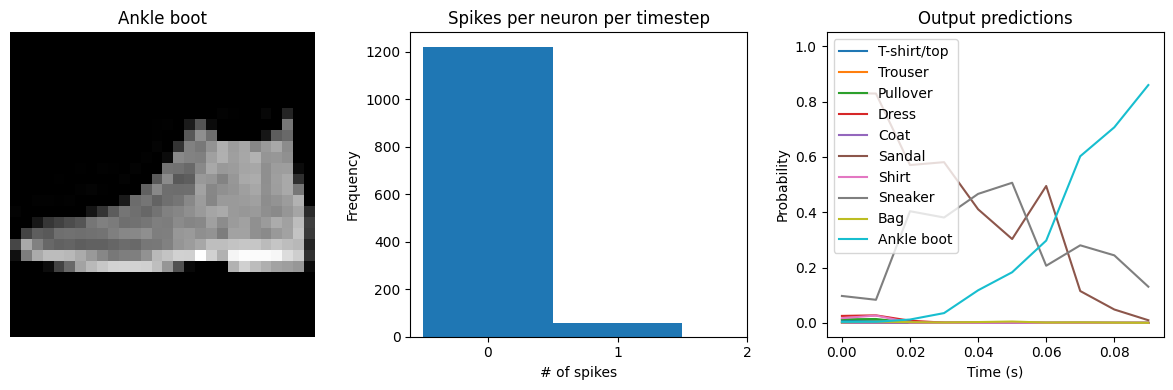

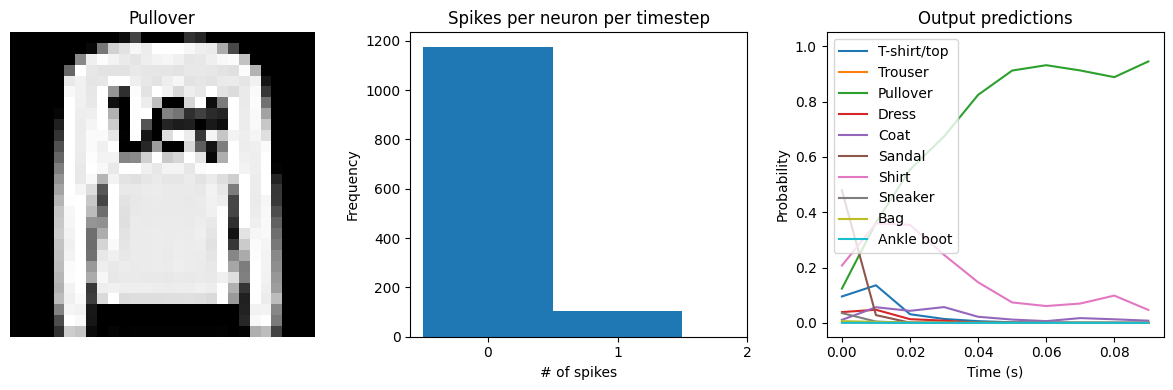

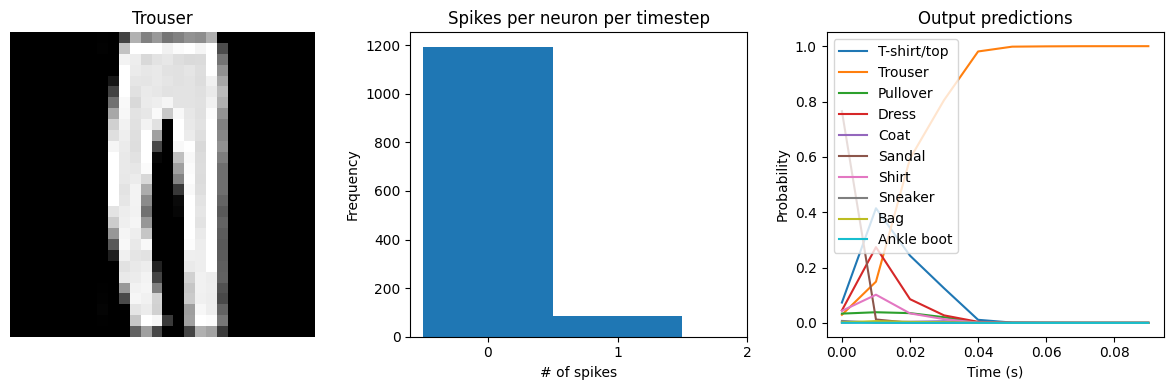

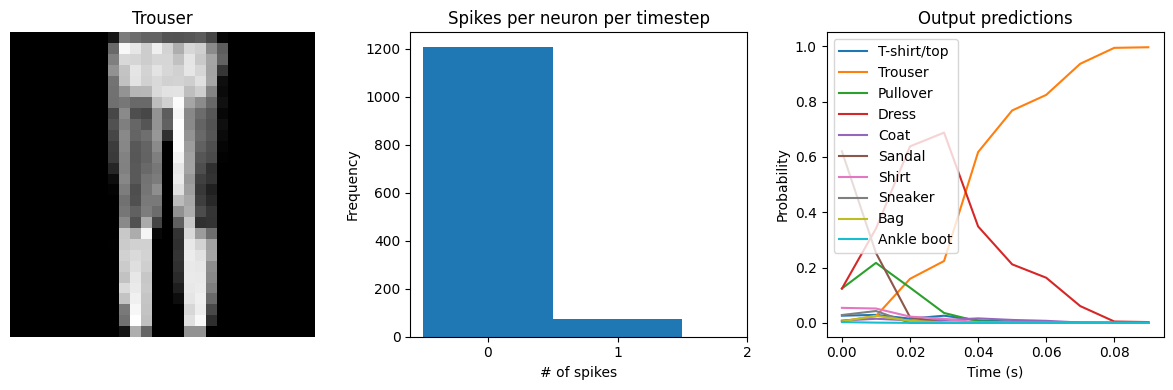

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time